# Load the libraries

In [1]:
library(tidyverse)
library(patchwork)

-- Attaching core tidyverse packages -------------------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.0     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.0
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts -------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Load the data

In [2]:
py.subs.geq1 <- read_csv(file = "./Supplementary Files/subs_only/subs_1per.csv")
dim(py.subs.geq1)

py.subs.geqpt1 <- read_csv(file = "./Supplementary Files/subs_only/subs_pt1per.csv")
dim(py.subs.geqpt1)

py.subs.geqpt01 <- read_csv(file = "./Supplementary Files/subs_only/subs_pt01per.csv")
dim(py.subs.geqpt01)

Rows: 281 Columns: 10
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): mutation_name, mutation_str, ref, alt
dbl  (5): pos, count_of_seqs, fraction, fraction_corrected, per_abundance
date (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 281  10

Rows: 1556 Columns: 10
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): mutation_name, mutation_str, ref, alt
dbl  (5): pos, count_of_seqs, fraction, fraction_corrected, per_abundance
date (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1556   10

Rows: 9157 Columns: 10
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): mutation_name, mutation_str, ref, alt
dbl  (5): pos, count_of_seqs, fraction, fraction_corrected, per_abundance
date (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 9157   10

In [3]:
r.subs.geq1 <- read_csv(file = "./r_analysis/csv_files/DF.subs.geq1.csv") |> select(-"...1")
dim(r.subs.geq1)

r.subs.geqpt1 <- read_csv(file = "./r_analysis/csv_files/DF.subs.geqpt1.csv") |> select(-"...1")
dim(r.subs.geqpt1)

r.subs.geqpt01 <- read_csv(file = "./r_analysis/csv_files/DF.subs.geqpt01.csv") |> select(-"...1")
dim(r.subs.geqpt01)

New names:
* `` -> `...1`
Rows: 190 Columns: 17
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 190  16

New names:
* `` -> `...1`
Rows: 851 Columns: 17
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 851  16

New names:
* `` -> `...1`
Rows: 5211 Columns: 17
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 5211   16

In [4]:
head(py.subs.geq1)

collection_date mutation_name mutation_str pos   ref alt count_of_seqs
1 2020-01-01      A23403G       1|23403|A|G  23403 A   G   11692133     
2 2020-01-01      C3037T        1|3037|C|T    3037 C   T   11670729     
3 2020-01-01      C14408T       1|14408|C|T  14408 C   T   11669447     
4 2020-01-01      C241T         1|241|C|T      241 C   T   11499166     
5 2020-03-12      C22995A       1|22995|C|A  22995 C   A    9139297     
6 2020-01-27      C10029T       1|10029|C|T  10029 C   T    9106039     
  fraction fraction_corrected per_abundance
1 1.829007 0.9958765          99.58765     
2 1.825659 0.9940534          99.40534     
3 1.825458 0.9939442          99.39442     
4 1.798821 0.9794406          97.94406     
5 1.429666 0.7784389          77.84389     
6 1.424463 0.7756062          77.56062

In [5]:
head(r.subs.geq1)

aa_subs collection_date accession_id    
1 E_T11A  2020-04-21      EPI_ISL_644275  
2 E_T9I   2020-01-27      EPI_ISL_17121378
3 M_A63T  2020-01-27      EPI_ISL_17121378
4 M_D3G   2020-02-19      EPI_ISL_6951243 
5 M_D3N   2020-03-31      EPI_ISL_14471084
6 M_I82T  2020-03-10      EPI_ISL_3458197 
  location                                 counts  region mutation_name
1 Europe/Ireland/Longford                   374240 E      T11A         
2 North America/USA/Oklahoma/Oklahoma City 5433742 E      T9I          
3 North America/USA/Oklahoma/Oklahoma City 5437134 M      A63T         
4 Asia/China/Guangxi/Nanning               1782009 M      D3G          
5 Europe/Slovakia/Ilava                    1379957 M      D3N          
6 North America/Canada/Quebec              3851201 M      I82T         
  fraction   per_abundance ref pos alt continent     country  state   
1 0.03223673  3.223673     T   11  A   Europe        Ireland  Longford
2 0.46805808 46.805808     T    9  I   North America USA      Oklahoma
3 0.46835027 46.835027     A   63  T   North America USA      Oklahoma
4 0.15350080 15.350080     D    3  G   Asia          China    Guangxi 
5 0.11886837 11.886837     D    3  N   Europe        Slovakia Ilava   
6 0.33173930 33.173930     I   82  T   North America Canada   Quebec  
  city         
1 NA           
2 Oklahoma City
3 Oklahoma City
4 Nanning      
5 NA           
6 NA

In [6]:
infections <- read_csv("./raw_data/owid/world_data_owid.csv") |>
                mutate(TimelineLabel = format(date, format = "%b-%y"))
head(infections)
range(infections$date)

Rows: 1265 Columns: 3
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
dbl  (2): total_cases, new_cases
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


date       total_cases new_cases TimelineLabel
1 2019-12-08 1           1         Dec-19       
2 2019-12-09 1           0         Dec-19       
3 2019-12-10 2           1         Dec-19       
4 2019-12-11 2           0         Dec-19       
5 2019-12-12 2           0         Dec-19       
6 2019-12-13 4           2         Dec-19

[1] "2019-12-08" "2023-05-25"

In [7]:
sample_n(infections, 10)

date       total_cases new_cases TimelineLabel
1  2023-05-14 766564494    184977   May-23       
2  2021-01-09  89110608    801207   Jan-21       
3  2023-05-12 766332931     45483   May-23       
4  2021-05-23 166443224    566837   May-21       
5  2020-12-25  79598696    664742   Dec-20       
6  2021-01-25  99493455    523732   Jan-21       
7  2022-09-10 605692585    397125   Sep-22       
8  2020-12-03  65582807    649661   Dec-20       
9  2021-08-16 207887351    589118   Aug-21       
10 2022-01-15 324565598   3173059   Jan-22

In [8]:
monthLevels <- c(
    "Dec-19",
    "Jan-20",
    "Feb-20",
    "Mar-20",
    "Apr-20",
    "May-20",
    "Jun-20",
    "Jul-20",
    "Aug-20",
    "Sep-20",
    "Oct-20",
    "Nov-20",
    "Dec-20",
    "Jan-21",
    "Feb-21",
    "Mar-21",
    "Apr-21",
    "May-21",
    "Jun-21",
    "Jul-21",
    "Aug-21",
    "Sep-21",
    "Oct-21",
    "Nov-21",
    "Dec-21",
    "Jan-22",
    "Feb-22",
    "Mar-22",
    "Apr-22",
    "May-22",
    "Jun-22",
    "Jul-22",
    "Aug-22",
    "Sep-22",
    "Oct-22",
    "Nov-22",
    "Dec-22",
    "Jan-23",
    "Feb-23",
    "Mar-23",
    "Apr-23",
    "May-23"
)

In [9]:
infections.count <- infections |>
    group_by(TimelineLabel) |>
    summarise(newCases = sum(new_cases)) |>
    mutate(TimelineLabel = factor(TimelineLabel, levels = monthLevels))

levels(infections.count$TimelineLabel)
head(infections.count)

[1] "Dec-19" "Jan-20" "Feb-20" "Mar-20" "Apr-20" "May-20" "Jun-20" "Jul-20"
 [9] "Aug-20" "Sep-20" "Oct-20" "Nov-20" "Dec-20" "Jan-21" "Feb-21" "Mar-21"
[17] "Apr-21" "May-21" "Jun-21" "Jul-21" "Aug-21" "Sep-21" "Oct-21" "Nov-21"
[25] "Dec-21" "Jan-22" "Feb-22" "Mar-22" "Apr-22" "May-22" "Jun-22" "Jul-22"
[33] "Aug-22" "Sep-22" "Oct-22" "Nov-22" "Dec-22" "Jan-23" "Feb-23" "Mar-23"
[41] "Apr-23" "May-23"

TimelineLabel newCases
1 Apr-20         2317242
2 Apr-21        22029330
3 Apr-22        24980826
4 Apr-23         3184598
5 Aug-20         8305055
6 Aug-21        19827567

# Panel 1

In [10]:
# # default 6 colors used:
# red: "#F8766D" #1
# golden: "#B79F00" #2
# green: "#00BA38" #3
# sky: "#00BFC4" #4
# blue: "#619CFF" #5
# purple: "#F564E3" #6
# peacock blue: "#69b3a2" # from r-graph gallery


In [11]:
dir.create("./r_analysis/plots/figures/", recursive = T)

Warning message in dir.create("./r_analysis/plots/figures/", recursive = T):
"'./r_analysis/plots/figures' already exists"


In [12]:
startDate <- as_date("2019-12-01")
endDate <- as_date("2023-05-25")

In [13]:
# Create a function to summarize and merge dataframes
summarizeAndMerge <- function(df, col_name, start_date, end_date) {
    df <- df |>
            filter(collection_date >= start_date & collection_date <= end_date) |>
            group_by(collection_date) |>
            summarize(!!sym(col_name) := n())

    return(df)
}

In [14]:
# List of dataframes to process
dfsList <- list(
    r.subs.geq1, 
    r.subs.geqpt1, 
    r.subs.geqpt01, 
    py.subs.geq1, 
    py.subs.geqpt1, 
    py.subs.geqpt01
)

# Column names corresponding to the dataframes
colNames <- c(
    "r.geq1", 
    "r.geqpt1",
    "r.geqpt01",
    "py.geq1",
    "py.geqpt1",
    "py.geqpt01"
)


In [15]:
# Initialize the result dataframe
DF <- tibble(Timeline = seq(startDate, endDate, by = "1 day"))

# Loop through the dataframes and column names
for (i in seq_along(dfsList)) {
    df <- dfsList[[i]]
    colName <- colNames[i]
    df.out <- summarizeAndMerge(df, colName, startDate, endDate)
    DF <- merge(DF, df.out, by.x = "Timeline", by.y = "collection_date", all.x = TRUE) |>
                mutate(!!colName := if_else(is.na(!!sym(colName)), 0, !!sym(colName)))
#     DF <- replace_na(DF, list(!!sym(colName) := 0))
}

# sanity checks
sum(DF$r.geq1)
sum(DF$r.geqpt1)
sum(DF$r.geqpt01)
sum(DF$py.geq1)
sum(DF$py.geqpt1)
sum(DF$py.geqpt01)

[1] 190

[1] 851

[1] 5211

[1] 281

[1] 1556

[1] 9157

In [16]:
sample_n(DF, 10)

Timeline   r.geq1 r.geqpt1 r.geqpt01 py.geq1 py.geqpt1 py.geqpt01
1  2020-11-03 0      0        1         0       0         2         
2  2023-02-21 0      0        0         0       0         0         
3  2023-02-09 0      0        0         0       0         0         
4  2021-08-19 0      0        0         0       0         0         
5  2021-02-06 0      0        0         0       0         0         
6  2022-05-23 0      0        0         0       0         0         
7  2021-06-27 0      0        0         0       0         0         
8  2022-05-21 0      0        0         0       0         0         
9  2022-01-01 0      0        0         0       0         0         
10 2023-01-14 0      0        0         0       0         0

## Figure 1

### Figure 1A

In [17]:
# Convert Timeline to a formatted month-year label
DF$TimelineLabel <- format(DF$Timeline, format = "%b-%y")
sample_n(DF, 10)

Timeline   r.geq1 r.geqpt1 r.geqpt01 py.geq1 py.geqpt1 py.geqpt01
1  2020-11-24 0      0        1         0       0         0         
2  2021-12-13 0      0        0         0       0         0         
3  2020-08-27 0      0        2         0       0         3         
4  2021-06-28 0      0        1         0       0         0         
5  2019-12-14 0      0        0         0       0         0         
6  2021-07-07 0      0        0         0       0         0         
7  2021-08-14 0      0        0         0       0         0         
8  2021-04-18 0      0        0         0       0         0         
9  2022-06-07 0      0        0         0       0         0         
10 2022-10-05 0      0        0         0       0         0         
   TimelineLabel
1  Nov-20       
2  Dec-21       
3  Aug-20       
4  Jun-21       
5  Dec-19       
6  Jul-21       
7  Aug-21       
8  Apr-21       
9  Jun-22       
10 Oct-22

In [18]:
labeller2 <- list(
    "r.geq1" = "AA >=1%", 
    "r.geqpt1" = "AA >=0.1%", 
    "r.geqpt01" = "AA >=0.01%", 
    "py.geq1" = "NT >=1%", 
    "py.geqpt1" = "NT >=0.1%", 
    "py.geqpt01" = "NT >=0.01%"
)

In [19]:
mutTypeLevels2 <- c(
    "py.geq1", 
    "py.geqpt1", 
    "py.geqpt01",
    "r.geq1", 
    "r.geqpt1", 
    "r.geqpt01"
)

In [20]:
DF |>
    pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
    mutate(name = factor(name, levels = mutTypeLevels2))

Timeline   TimelineLabel name       value
1    2019-12-01 Dec-19        r.geq1     0    
2    2019-12-01 Dec-19        r.geqpt1   0    
3    2019-12-01 Dec-19        r.geqpt01  0    
4    2019-12-01 Dec-19        py.geq1    0    
5    2019-12-01 Dec-19        py.geqpt1  0    
6    2019-12-01 Dec-19        py.geqpt01 0    
7    2019-12-02 Dec-19        r.geq1     0    
8    2019-12-02 Dec-19        r.geqpt1   0    
9    2019-12-02 Dec-19        r.geqpt01  0    
10   2019-12-02 Dec-19        py.geq1    0    
11   2019-12-02 Dec-19        py.geqpt1  0    
12   2019-12-02 Dec-19        py.geqpt01 0    
13   2019-12-03 Dec-19        r.geq1     0    
14   2019-12-03 Dec-19        r.geqpt1   0    
15   2019-12-03 Dec-19        r.geqpt01  0    
16   2019-12-03 Dec-19        py.geq1    0    
17   2019-12-03 Dec-19        py.geqpt1  0    
18   2019-12-03 Dec-19        py.geqpt01 0    
19   2019-12-04 Dec-19        r.geq1     0    
20   2019-12-04 Dec-19        r.geqpt1   0    
21   2019-12-04 Dec-19        r.geqpt01  0    
22   2019-12-04 Dec-19        py.geq1    0    
23   2019-12-04 Dec-19        py.geqpt1  0    
24   2019-12-04 Dec-19        py.geqpt01 0    
25   2019-12-05 Dec-19        r.geq1     0    
26   2019-12-05 Dec-19        r.geqpt1   0    
27   2019-12-05 Dec-19        r.geqpt01  0    
28   2019-12-05 Dec-19        py.geq1    0    
29   2019-12-05 Dec-19        py.geqpt1  0    
30   2019-12-05 Dec-19        py.geqpt01 0    
...  ...        ...           ...        ...  
7603 2023-05-21 May-23        r.geq1     0    
7604 2023-05-21 May-23        r.geqpt1   0    
7605 2023-05-21 May-23        r.geqpt01  0    
7606 2023-05-21 May-23        py.geq1    0    
7607 2023-05-21 May-23        py.geqpt1  0    
7608 2023-05-21 May-23        py.geqpt01 0    
7609 2023-05-22 May-23        r.geq1     0    
7610 2023-05-22 May-23        r.geqpt1   0    
7611 2023-05-22 May-23        r.geqpt01  0    
7612 2023-05-22 May-23        py.geq1    0    
7613 2023-05-22 May-23        py.geqpt1  0    
7614 2023-05-22 May-23        py.geqpt01 0    
7615 2023-05-23 May-23        r.geq1     0    
7616 2023-05-23 May-23        r.geqpt1   0    
7617 2023-05-23 May-23        r.geqpt01  0    
7618 2023-05-23 May-23        py.geq1    0    
7619 2023-05-23 May-23        py.geqpt1  0    
7620 2023-05-23 May-23        py.geqpt01 0    
7621 2023-05-24 May-23        r.geq1     0    
7622 2023-05-24 May-23        r.geqpt1   0    
7623 2023-05-24 May-23        r.geqpt01  0    
7624 2023-05-24 May-23        py.geq1    0    
7625 2023-05-24 May-23        py.geqpt1  0    
7626 2023-05-24 May-23        py.geqpt01 0    
7627 2023-05-25 May-23        r.geq1     0    
7628 2023-05-25 May-23        r.geqpt1   0    
7629 2023-05-25 May-23        r.geqpt01  0    
7630 2023-05-25 May-23        py.geq1    0    
7631 2023-05-25 May-23        py.geqpt1  0    
7632 2023-05-25 May-23        py.geqpt01 0

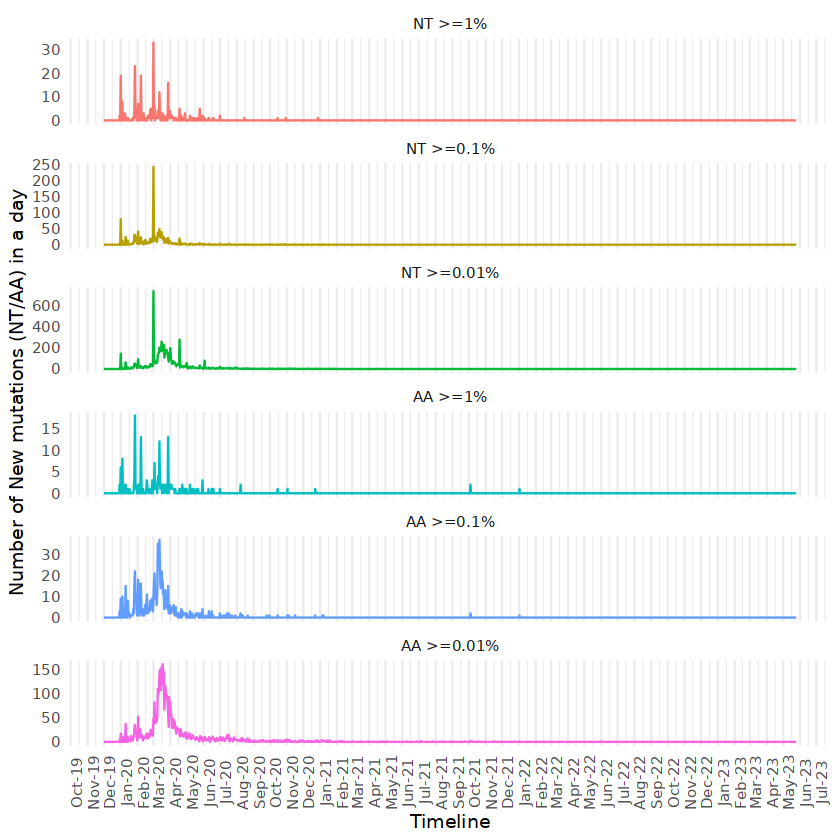

In [21]:
# free Y, nrow6
p1 <- DF |>
        pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
        mutate(name = factor(name, levels = mutTypeLevels2)) |>
        ggplot(aes(x = Timeline, y = value, group = name, color = name)) +
        geom_line() +
        scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(
          panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none"
        ) +
#         coord_flip() +
        labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a day") +
        facet_wrap(~name, drop = F, scales = "free_y", labeller = as_labeller(function(x){labeller2[x]}), nrow = 6)

# ggsave("./r_analysis/plots/figures/fig1.facetwrap.multiColor.freeY.nrow6.pdf", plot = p1, width = 6, height = 8)

p1

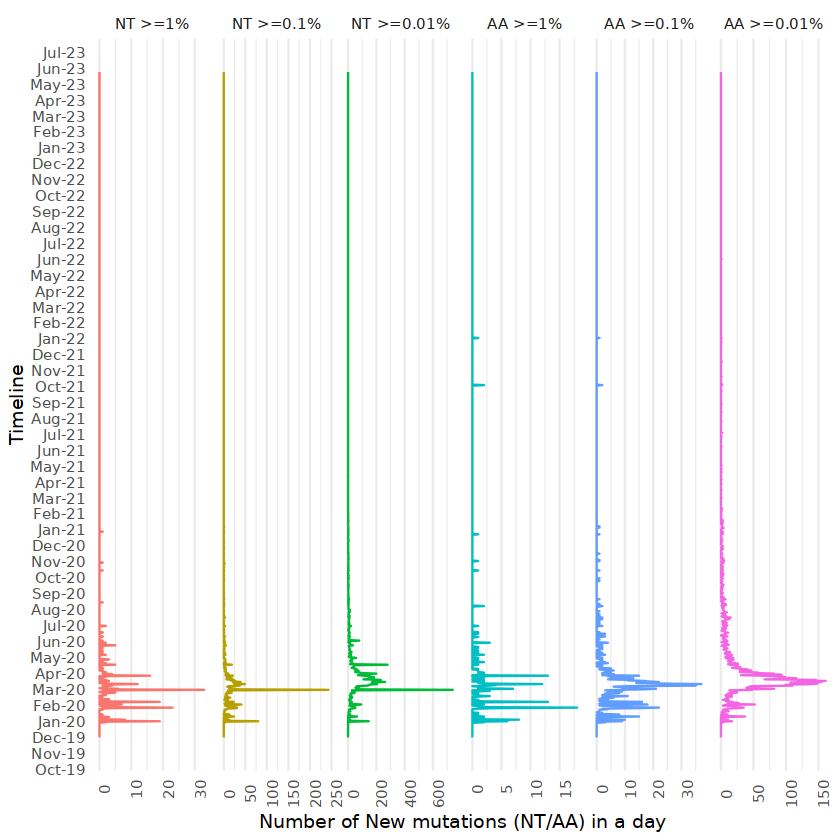

In [22]:
# free X, ncol6
p1 <- DF |>
        pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
        mutate(name = factor(name, levels = mutTypeLevels2)) |>
        ggplot(aes(x = Timeline, y = value, group = name, color = name)) +
        geom_line() +
        scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(
          panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none"
        ) +
        coord_flip() +
        labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a day") +
        facet_wrap(~name, drop = F, scales = "free_x", labeller = as_labeller(function(x){labeller2[x]}), ncol = 6)

# ggsave("./r_analysis/plots/figures/fig1.facetwrap.multiColor.freeX.ncol6.pdf", plot = p1, width = 10, height = 8)

p1

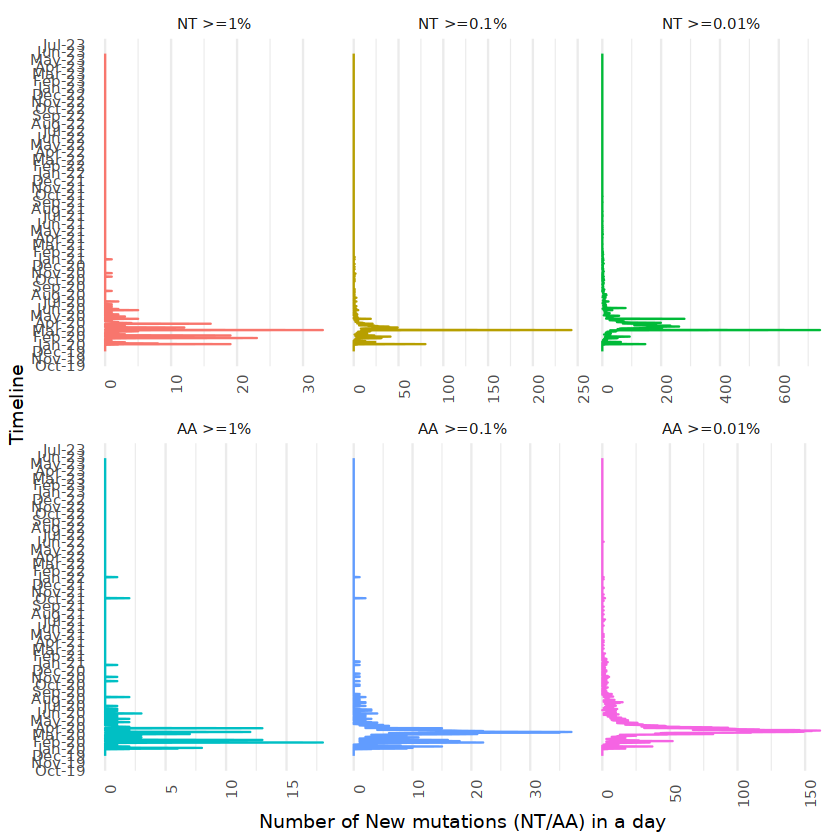

In [23]:
# free X, ncol3
p1 <- DF |>
        pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
        mutate(name = factor(name, levels = mutTypeLevels2)) |>
        ggplot(aes(x = Timeline, y = value, group = name, color = name)) +
        geom_line() +
#         scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        scale_x_date(
            date_breaks = "1 month", 
            date_labels = "%b-%y"
        ) +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(
          panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none"
        ) +
        coord_flip() +
        labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a day") +
        facet_wrap(~name, drop = F, scales = "free_x", labeller = as_labeller(function(x){labeller2[x]}), ncol = 3)

# ggsave("./r_analysis/plots/figures/fig1.facetwrap.multiColor.freeX.ncol3nrow2.pdf", plot = p1, width = 8, height = 12)

p1

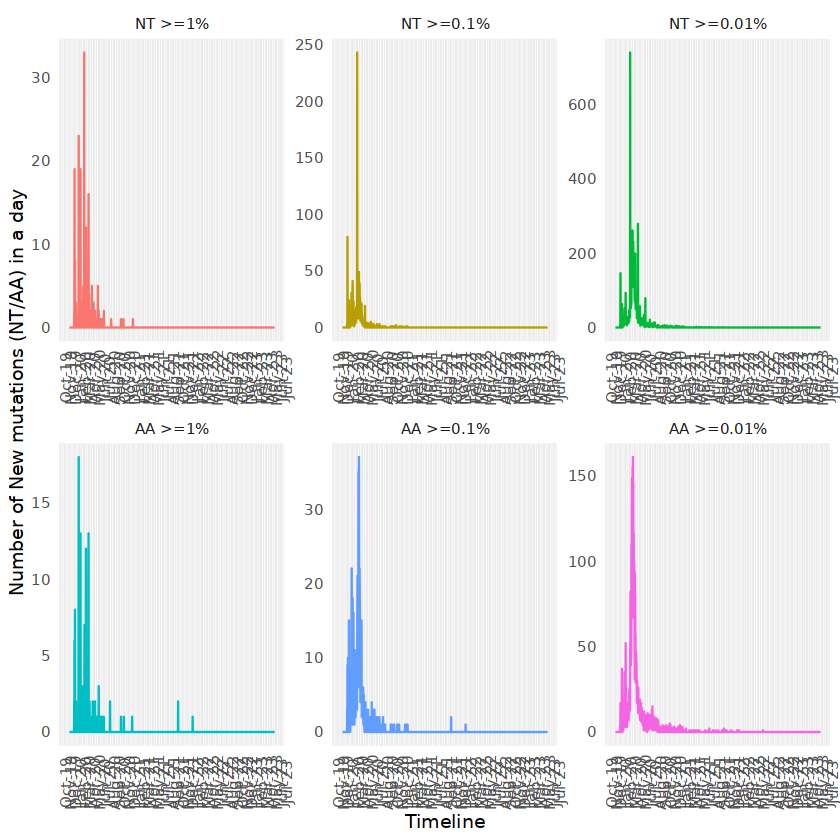

In [24]:
# free scale
p1 <- DF |>
        pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
        mutate(name = factor(name, levels = mutTypeLevels2)) |>
        ggplot(aes(x = Timeline, y = value, group = name, color = name)) +
        geom_line() +
        scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(
          panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none"
        ) +
        labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a day") +
        facet_wrap(~name, drop = F, scales = "free", labeller = as_labeller(function(x){labeller2[x]}))

# ggsave("./r_analysis/plots/figures/fig1.facetwrap.multiColor.free.pdf", plot = p1, width = 16, height = 6)

p1

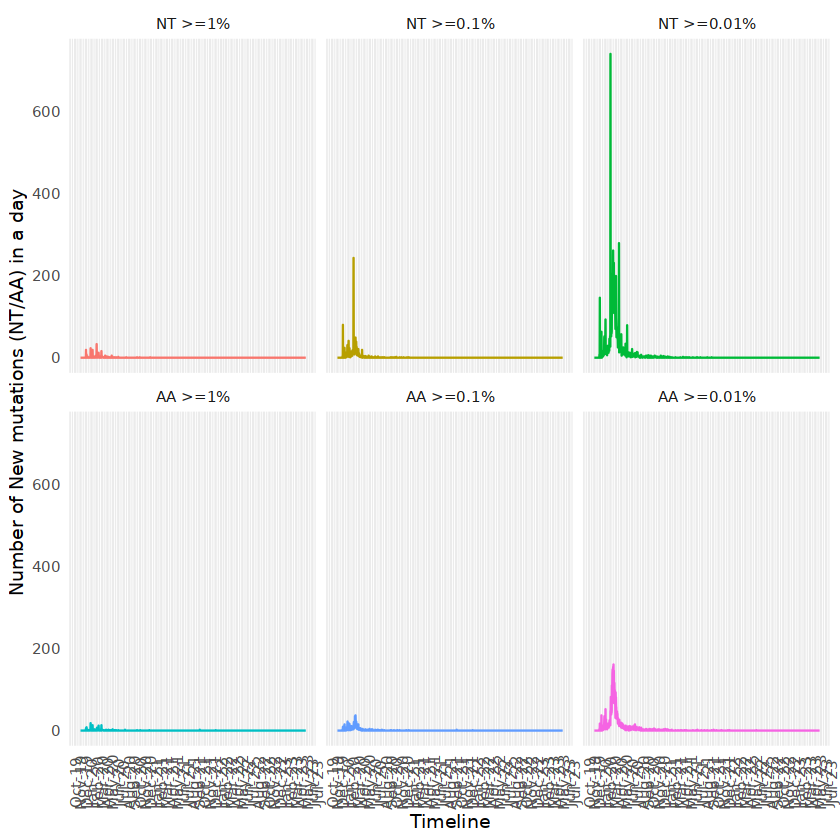

In [25]:
# fixedX, fixedY
p1 <- DF |>
        pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
        mutate(name = factor(name, levels = mutTypeLevels2)) |>
        ggplot(aes(x = Timeline, y = value, group = name, color = name)) +
        geom_line() +
        scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(
          panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none"
        ) +
        labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a day") +
        facet_wrap(~name, drop = F, scales = "fixed", labeller = as_labeller(function(x){labeller2[x]}))

# ggsave("./r_analysis/plots/figures/fig1.facetwrap.multiColor.fixedXfixedY.pdf", plot = p1, width = 16, height = 6)

p1

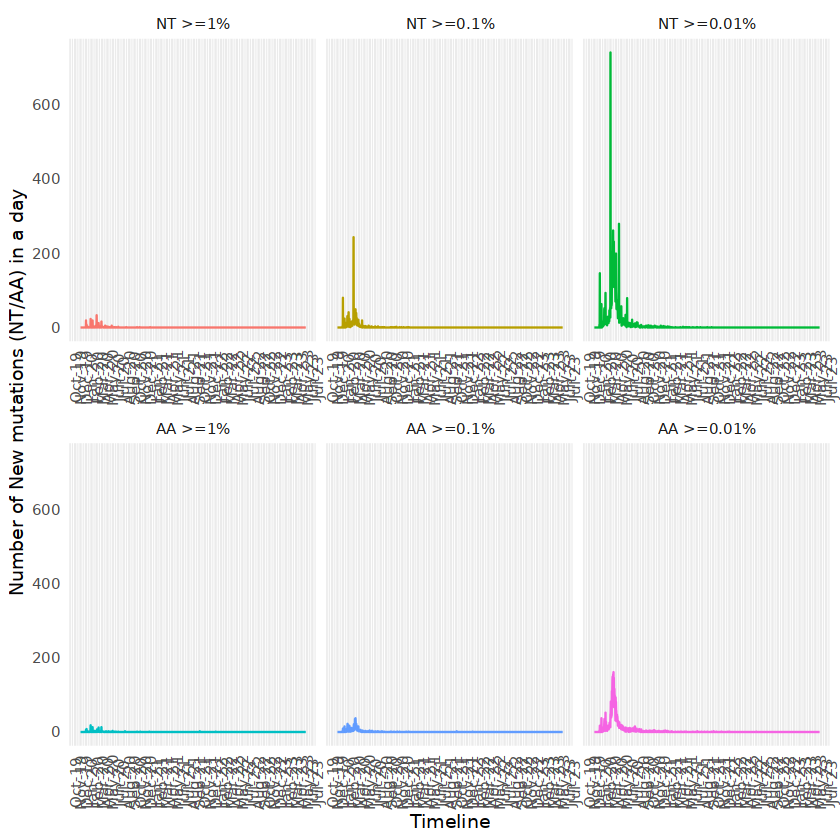

In [26]:
# fixed Y
p1 <- DF |>
        pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
        mutate(name = factor(name, levels = mutTypeLevels2)) |>
        ggplot(aes(x = Timeline, y = value, group = name, color = name)) +
        geom_line() +
        scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(
          panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none"
        ) +
        labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a day") +
        facet_wrap(~name, drop = F, scales = "free_x", labeller = as_labeller(function(x){labeller2[x]}))

# ggsave("./r_analysis/plots/figures/fig1.facetwrap.multiColor.fixedY.pdf", plot = p1, width = 16, height = 6)

p1

### Figure 1B

In [27]:
mutTypeLevels1 <- c(
    "py.geq1.total", 
    "py.geqpt1.total", 
    "py.geqpt01.total",
    "r.geq1.total", 
    "r.geqpt1.total", 
    "r.geqpt01.total"
)

labeller1 <- list(
    "py.geq1.total" = "NT >=1%", 
    "py.geqpt1.total" = "NT >=0.1%", 
    "py.geqpt01.total" = "NT >=0.01%",
    "r.geq1.total" = "AA >=1%", 
    "r.geqpt1.total" = "AA >=0.1%", 
    "r.geqpt01.total" = "AA >=0.01%"
)

In [28]:
DF.lollipop <- DF |>
                group_by(TimelineLabel) |>
                summarize(
                    r.geq1.total = sum(r.geq1),
                    r.geqpt1.total = sum(r.geqpt1),
                    r.geqpt01.total = sum(r.geqpt01),
                    py.geq1.total = sum(py.geq1),
                    py.geqpt1.total = sum(py.geqpt1),
                    py.geqpt01.total = sum(py.geqpt01)
                ) |>
                mutate(TimelineLabel = factor(TimelineLabel, levels = rev(monthLevels)))
DF.lollipop

TimelineLabel r.geq1.total r.geqpt1.total r.geqpt01.total py.geq1.total
1  Apr-20        17            60             821             26          
2  Apr-21         0             0               3              0          
3  Apr-22         0             0               0              0          
4  Apr-23         0             0               0              0          
5  Aug-20         2             7              80              1          
6  Aug-21         0             0               2              0          
7  Aug-22         0             0               0              0          
8  Dec-19         2             3               4              2          
9  Dec-20         1             1              22              1          
10 Dec-21         0             0               1              0          
11 Dec-22         0             0               0              0          
12 Feb-20        33           159             422             61          
13 Feb-21         0             0               5              0          
14 Feb-22         0             0               0              0          
15 Feb-23         0             0               0              0          
16 Jan-20        47           125             257             66          
17 Jan-21         0             3              28              0          
18 Jan-22         1             1               1              0          
19 Jan-23         0             0               0              0          
20 Jul-20         1            14             186              2          
21 Jul-21         0             0               3              0          
22 Jul-22         0             0               0              0          
23 Jun-20         4            10             160              5          
24 Jun-21         0             0               2              0          
25 Jun-22         0             0               1              0          
26 Mar-20        68           432            2841            102          
27 Mar-21         0             0               3              0          
28 Mar-22         0             0               0              0          
29 Mar-23         0             0               0              0          
30 May-20        10            28             255             13          
31 May-21         0             0               1              0          
32 May-22         0             0               0              0          
33 May-23         0             0               0              0          
34 Nov-20         1             3              34              0          
35 Nov-21         0             0               2              0          
36 Nov-22         0             0               0              0          
37 Oct-20         1             1              38              2          
38 Oct-21         2             2               4              0          
39 Oct-22         0             0               0              0          
40 Sep-20         0             2              34              0          
41 Sep-21         0             0               1              0          
42 Sep-22         0             0               0              0          
   py.geqpt1.total py.geqpt01.total
1  101             1643            
2    0                4            
3    0                0            
4    0                0            
5    5               92            
6    0                1            
7    0                0            
8    4                8            
9    2               33            
10   0                0            
11   0                0            
12 293              741            
13   0                3            
14   0                0            
15   0                0            
16 275              553            
17   2               29            
18   0                0            
19   0                0            
20  12              203            
21   0                

In [29]:
DF.lollipop |>
    select(TimelineLabel, r.geq1.total, r.geqpt1.total, r.geqpt01.total) |>
    pivot_longer(cols = c(r.geq1.total, r.geqpt1.total, r.geqpt01.total))

TimelineLabel name            value
1   Apr-20        r.geq1.total     17  
2   Apr-20        r.geqpt1.total   60  
3   Apr-20        r.geqpt01.total 821  
4   Apr-21        r.geq1.total      0  
5   Apr-21        r.geqpt1.total    0  
6   Apr-21        r.geqpt01.total   3  
7   Apr-22        r.geq1.total      0  
8   Apr-22        r.geqpt1.total    0  
9   Apr-22        r.geqpt01.total   0  
10  Apr-23        r.geq1.total      0  
11  Apr-23        r.geqpt1.total    0  
12  Apr-23        r.geqpt01.total   0  
13  Aug-20        r.geq1.total      2  
14  Aug-20        r.geqpt1.total    7  
15  Aug-20        r.geqpt01.total  80  
16  Aug-21        r.geq1.total      0  
17  Aug-21        r.geqpt1.total    0  
18  Aug-21        r.geqpt01.total   2  
19  Aug-22        r.geq1.total      0  
20  Aug-22        r.geqpt1.total    0  
21  Aug-22        r.geqpt01.total   0  
22  Dec-19        r.geq1.total      2  
23  Dec-19        r.geqpt1.total    3  
24  Dec-19        r.geqpt01.total   4  
25  Dec-20        r.geq1.total      1  
26  Dec-20        r.geqpt1.total    1  
27  Dec-20        r.geqpt01.total  22  
28  Dec-21        r.geq1.total      0  
29  Dec-21        r.geqpt1.total    0  
30  Dec-21        r.geqpt01.total   1  
... ...           ...             ...  
97  May-23        r.geq1.total     0   
98  May-23        r.geqpt1.total   0   
99  May-23        r.geqpt01.total  0   
100 Nov-20        r.geq1.total     1   
101 Nov-20        r.geqpt1.total   3   
102 Nov-20        r.geqpt01.total 34   
103 Nov-21        r.geq1.total     0   
104 Nov-21        r.geqpt1.total   0   
105 Nov-21        r.geqpt01.total  2   
106 Nov-22        r.geq1.total     0   
107 Nov-22        r.geqpt1.total   0   
108 Nov-22        r.geqpt01.total  0   
109 Oct-20        r.geq1.total     1   
110 Oct-20        r.geqpt1.total   1   
111 Oct-20        r.geqpt01.total 38   
112 Oct-21        r.geq1.total     2   
113 Oct-21        r.geqpt1.total   2   
114 Oct-21        r.geqpt01.total  4   
115 Oct-22        r.geq1.total     0   
116 Oct-22        r.geqpt1.total   0   
117 Oct-22        r.geqpt01.total  0   
118 Sep-20        r.geq1.total     0   
119 Sep-20        r.geqpt1.total   2   
120 Sep-20        r.geqpt01.total 34   
121 Sep-21        r.geq1.total     0   
122 Sep-21        r.geqpt1.total   0   
123 Sep-21        r.geqpt01.total  1   
124 Sep-22        r.geq1.total     0   
125 Sep-22        r.geqpt1.total   0   
126 Sep-22        r.geqpt01.total  0

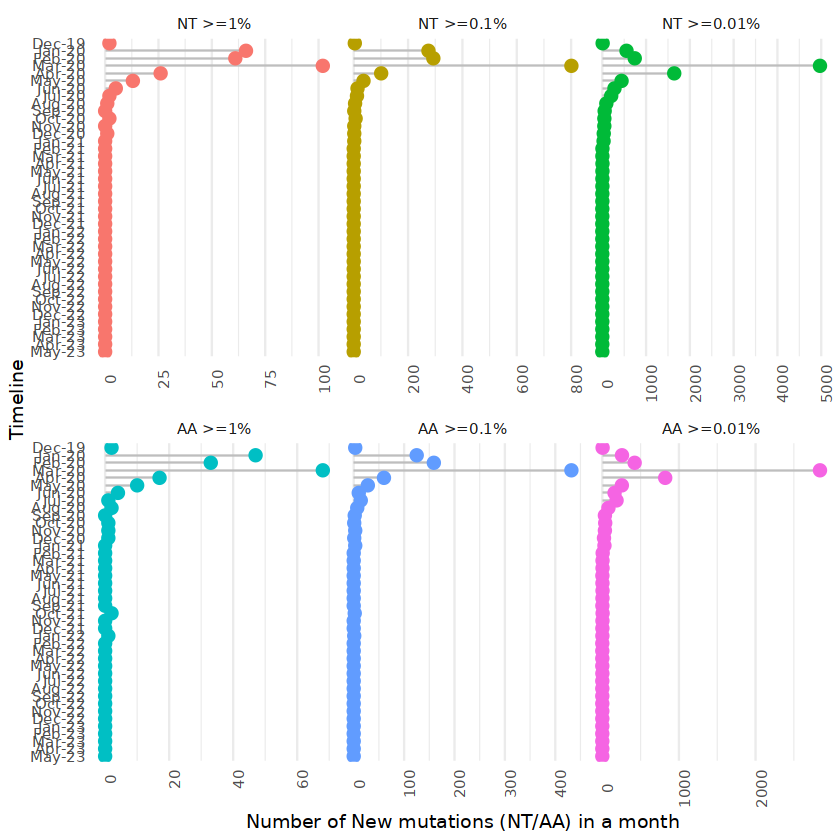

In [30]:
p2 <- DF.lollipop |>
    pivot_longer(cols = c(r.geq1.total, r.geqpt1.total, r.geqpt01.total, py.geq1.total, py.geqpt1.total, py.geqpt01.total)) |>
    mutate(name = factor(name, levels = mutTypeLevels1)) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_point(size = 3) +
    coord_flip() +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position = "none"
    ) +
    labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a month") +
    facet_wrap(~name, drop = F, scales = "free_x", labeller = as_labeller(function(x){labeller1[x]}))

# ggsave("./r_analysis/plots/figures/fig2.facetwrap.multiColor.pdf", plot = p2, width = 8, height = 12)

p2

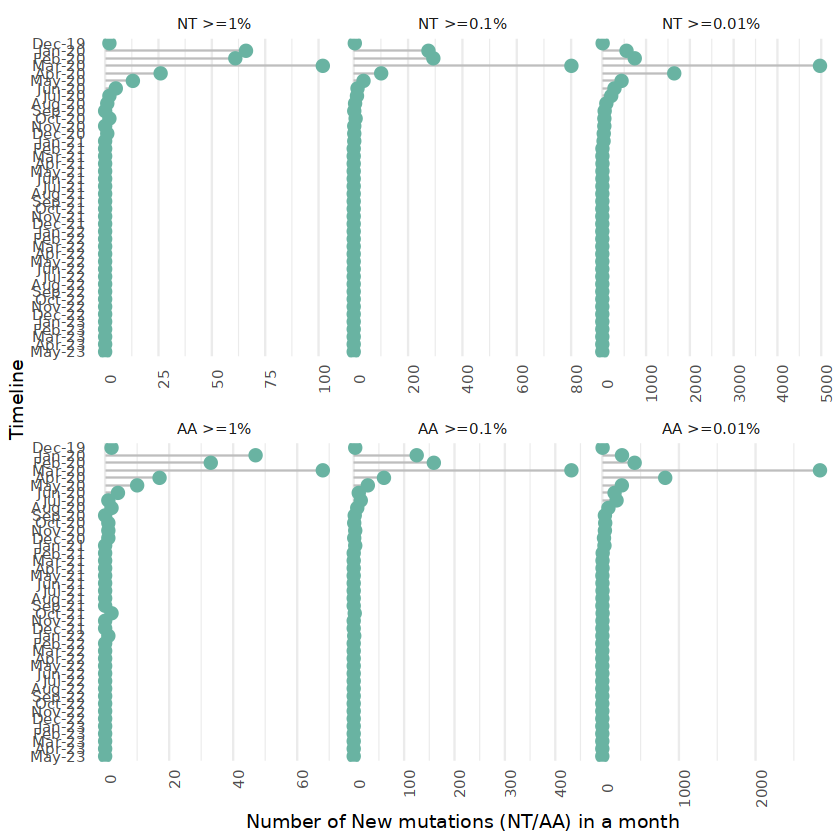

In [31]:
p2 <- DF.lollipop |>
    pivot_longer(cols = c(r.geq1.total, r.geqpt1.total, r.geqpt01.total, py.geq1.total, py.geqpt1.total, py.geqpt01.total)) |>
    mutate(name = factor(name, levels = mutTypeLevels1)) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_point(size = 3, color = "#69b3a2") +
    coord_flip() +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position = "none"
    ) +
    labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a month") +
    facet_wrap(~name, drop = F, scales = "free_x", labeller = as_labeller(function(x){labeller1[x]}))

# ggsave("./r_analysis/plots/figures/fig2.facetwrap.singleColor.pdf", plot = p2, width = 8, height = 12)

p2

### Figure 1C

In [32]:
ratios <- DF.lollipop |> 
    mutate(TimelineLabel = factor(TimelineLabel, levels = monthLevels)) |>
    select(TimelineLabel, py.geqpt01.total, r.geqpt01.total)
head(ratios)
head(infections.count)

TimelineLabel py.geqpt01.total r.geqpt01.total
1 Apr-20        1643             821            
2 Apr-21           4               3            
3 Apr-22           0               0            
4 Apr-23           0               0            
5 Aug-20          92              80            
6 Aug-21           1               2

TimelineLabel newCases
1 Apr-20         2317242
2 Apr-21        22029330
3 Apr-22        24980826
4 Apr-23         3184598
5 Aug-20         8305055
6 Aug-21        19827567

In [33]:
ratios <- merge(x = infections.count, y = ratios, by = "TimelineLabel") |>
            mutate(
                "NT >=0.01%" = py.geqpt01.total / newCases,
                "AA >=0.01%" = r.geqpt01.total / newCases
            ) |>
            select(all_of(c("TimelineLabel", "NT >=0.01%", "AA >=0.01%")))
head(ratios)

TimelineLabel NT >=0.01%   AA >=0.01%  
1 Apr-20        7.090325e-04 3.543005e-04
2 Apr-21        1.815761e-07 1.361821e-07
3 Apr-22        0.000000e+00 0.000000e+00
4 Apr-23        0.000000e+00 0.000000e+00
5 Aug-20        1.107759e-05 9.632688e-06
6 Aug-21        5.043483e-08 1.008697e-07

In [34]:
# # default 6 colors used:
# red: "#F8766D" #1
# golden: "#B79F00" #2
# green: "#00BA38" #3
# sky: "#00BFC4" #4
# blue: "#619CFF" #5
# purple: "#F564E3" #6
# peacock blue: "#69b3a2" # from r-graph gallery


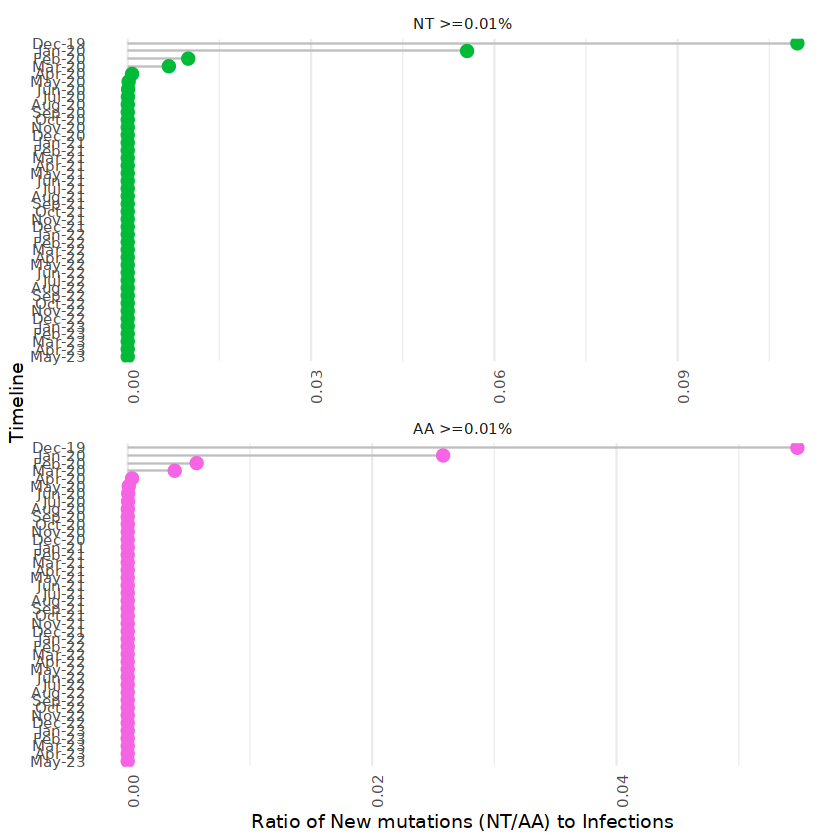

In [35]:
p3 <- ratios |>
    pivot_longer(cols = c("NT >=0.01%", "AA >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%", "AA >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = rev(monthLevels))
    ) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_point(size = 3) +
    scale_color_manual(values = c("#00BA38", "#F564E3")) +
    coord_flip() +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position = "none"
    ) +
    labs(x = "Timeline", y = "Ratio of New mutations (NT/AA) to Infections") +
    facet_wrap(~name, drop = F, scales = "free_x", ncol = 1)

# ggsave("./r_analysis/plots/figures/fig3.facetwrap.multiColor.nrow2.pdf", plot = p3, width = 8 / 3, height = 12)

p3


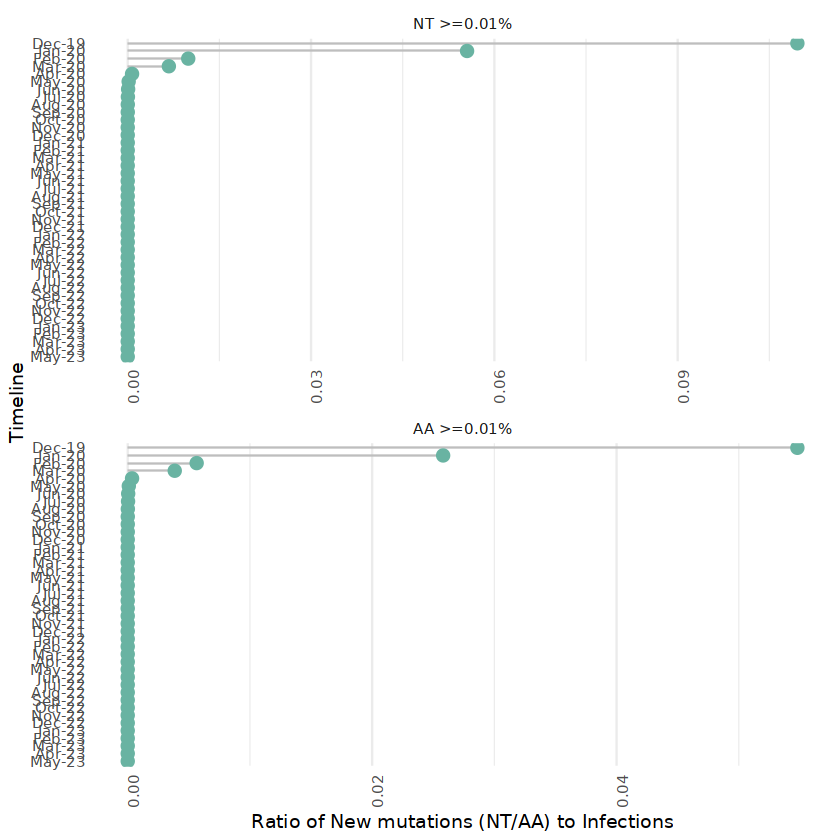

In [36]:
p3 <- ratios |>
    pivot_longer(cols = c("NT >=0.01%", "AA >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%", "AA >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = rev(monthLevels))
    ) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_point(size = 3, color = "#69b3a2") +
    coord_flip() +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position = "none"
    ) +
    labs(x = "Timeline", y = "Ratio of New mutations (NT/AA) to Infections") +
    facet_wrap(~name, drop = F, scales = "free_x", ncol = 1)

# ggsave("./r_analysis/plots/figures/fig3.facetwrap.singleColor.nrow2.pdf", plot = p3, width = 8 / 3, height = 12)

p3


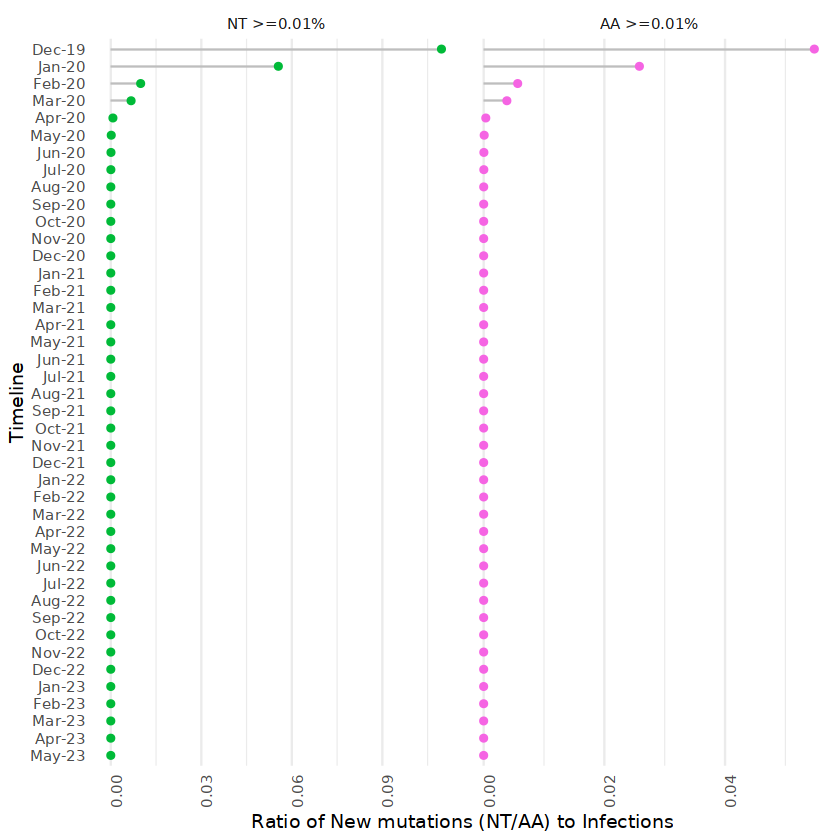

In [37]:
p3 <- ratios |>
    pivot_longer(cols = c("NT >=0.01%", "AA >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%", "AA >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = rev(monthLevels))
    ) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_point() +
    scale_color_manual(values = c("#00BA38", "#F564E3")) +
    coord_flip() +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position = "none"
    ) +
    labs(x = "Timeline", y = "Ratio of New mutations (NT/AA) to Infections") +
    facet_wrap(~name, drop = F, scales = "free_x", ncol = 2)

# ggsave("./r_analysis/plots/figures/fig3.facetwrap.multiColor.ncol2.pdf", plot = p3, width = 8 / 2, height = 12 / 2)

p3


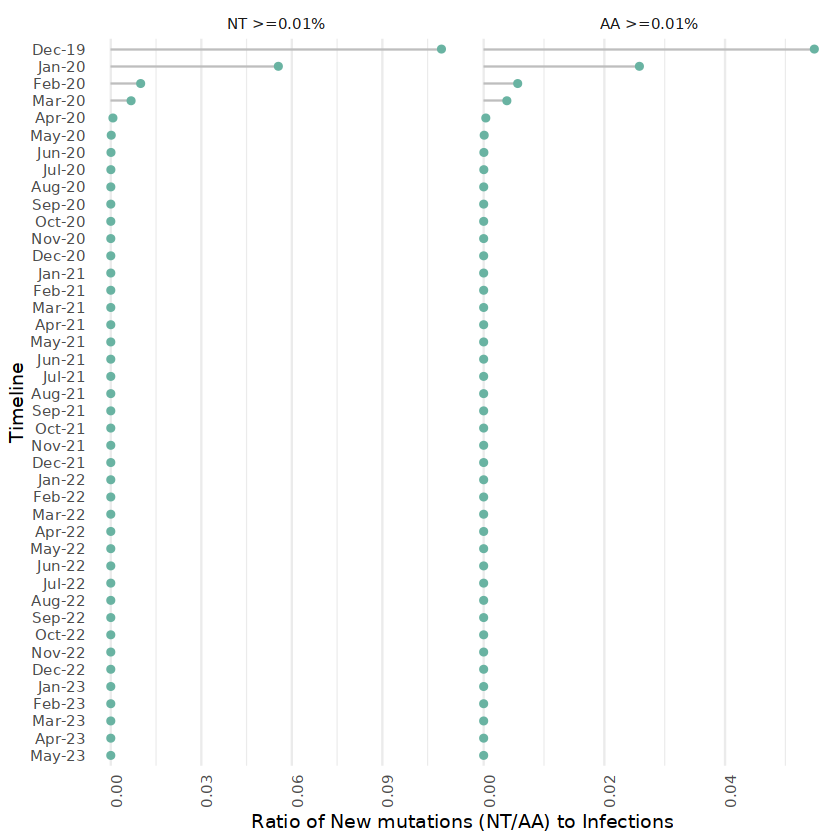

In [38]:
p3 <- ratios |>
    pivot_longer(cols = c("NT >=0.01%", "AA >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%", "AA >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = rev(monthLevels))
    ) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_point(color = "#69b3a2") +
    coord_flip() +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position = "none"
    ) +
    labs(x = "Timeline", y = "Ratio of New mutations (NT/AA) to Infections") +
    facet_wrap(~name, drop = F, scales = "free_x", ncol = 2)

# ggsave("./r_analysis/plots/figures/fig3.facetwrap.singleColor.ncol2.pdf", plot = p3, width = 8 / 2, height = 12 / 2)

p3


### patchwork

In [39]:
# # default 6 colors used:
# red: "#F8766D" #1
# golden: "#B79F00" #2
# green: "#00BA38" #3
# sky: "#00BFC4" #4
# blue: "#619CFF" #5
# purple: "#F564E3" #6
# peacock blue: "#69b3a2" # from r-graph gallery


$data
$data[[1]]
     x y xend yend group PANEL colour linewidth linetype alpha
1   38 0   38   17     4     4   grey       0.5        1    NA
2   38 0   38   60     5     5   grey       0.5        1    NA
3   38 0   38  821     6     6   grey       0.5        1    NA
4   38 0   38   26     1     1   grey       0.5        1    NA
5   38 0   38  101     2     2   grey       0.5        1    NA
6   38 0   38 1643     3     3   grey       0.5        1    NA
7   26 0   26    0     4     4   grey       0.5        1    NA
8   26 0   26    0     5     5   grey       0.5        1    NA
9   26 0   26    3     6     6   grey       0.5        1    NA
10  26 0   26    0     1     1   grey       0.5        1    NA
11  26 0   26    0     2     2   grey       0.5        1    NA
12  26 0   26    4     3     3   grey       0.5        1    NA
13  14 0   14    0     4     4   grey       0.5        1    NA
14  14 0   14    0     5     5   grey       0.5        1    NA
15  14 0   14    0     6     6   grey 

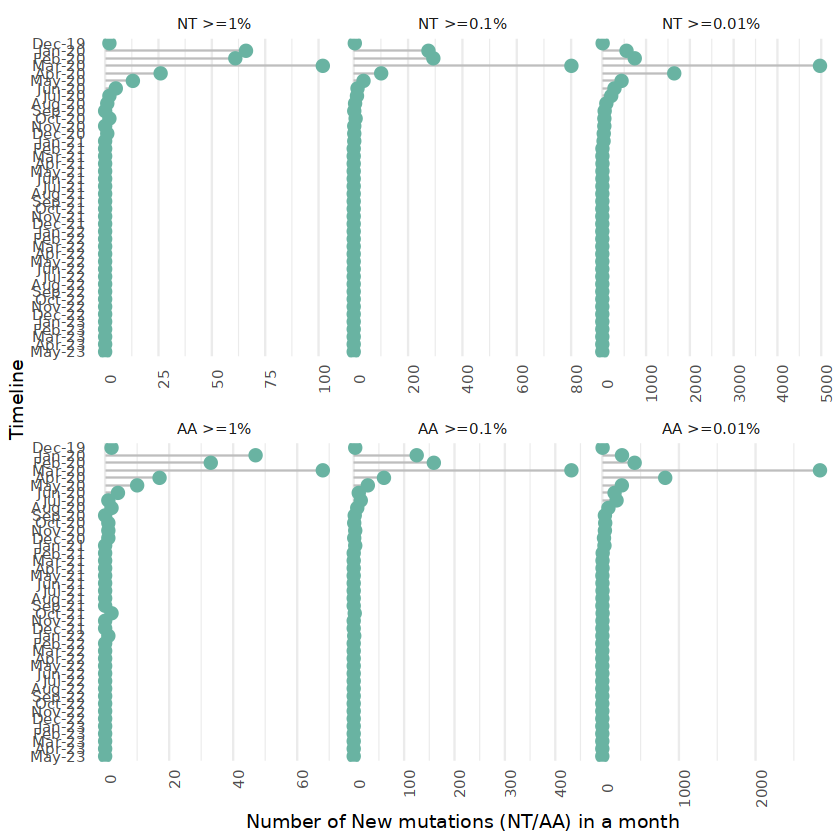

In [40]:
plot_data <- ggplot_build(p2)
plot_data

In [41]:
plot_data$data

[[1]]
     x y xend yend group PANEL colour linewidth linetype alpha
1   38 0   38   17     4     4   grey       0.5        1    NA
2   38 0   38   60     5     5   grey       0.5        1    NA
3   38 0   38  821     6     6   grey       0.5        1    NA
4   38 0   38   26     1     1   grey       0.5        1    NA
5   38 0   38  101     2     2   grey       0.5        1    NA
6   38 0   38 1643     3     3   grey       0.5        1    NA
7   26 0   26    0     4     4   grey       0.5        1    NA
8   26 0   26    0     5     5   grey       0.5        1    NA
9   26 0   26    3     6     6   grey       0.5        1    NA
10  26 0   26    0     1     1   grey       0.5        1    NA
11  26 0   26    0     2     2   grey       0.5        1    NA
12  26 0   26    4     3     3   grey       0.5        1    NA
13  14 0   14    0     4     4   grey       0.5        1    NA
14  14 0   14    0     5     5   grey       0.5        1    NA
15  14 0   14    0     6     6   grey       0.5        1    NA
16  14 0   14    0     1     1   grey       0.5        1    NA
17  14 0   14    0     2     2   grey       0.5        1    NA
18  14 0   14    0     3     3   grey       0.5        1    NA
19   2 0    2    0     4     4   grey       0.5        1    NA
20   2 0    2    0     5     5   grey       0.5        1    NA
21   2 0    2    0     6     6   grey       0.5        1    NA
22   2 0    2    0     1     1   grey       0.5        1    NA
23   2 0    2    0     2     2   grey       0.5        1    NA
24   2 0    2    0     3     3   grey       0.5        1    NA
25  34 0   34    2     4     4   grey       0.5        1    NA
26  34 0   34    7     5     5   grey       0.5        1    NA
27  34 0   34   80     6     6   grey       0.5        1    NA
28  34 0   34    1     1     1   grey       0.5        1    NA
29  34 0   34    5     2     2   grey       0.5        1    NA
30  34 0   34   92     3     3   grey       0.5        1    NA
31  22 0   22    0     4     4   grey       0.5        1    NA
32  22 0   22    0     5     5   grey       0.5        1    NA
33  22 0   22    2     6     6   grey       0.5        1    NA
34  22 0   22    0     1     1   grey       0.5        1    NA
35  22 0   22    0     2     2   grey       0.5        1    NA
36  22 0   22    1     3     3   grey       0.5        1    NA
37  10 0   10    0     4     4   grey       0.5        1    NA
38  10 0   10    0     5     5   grey       0.5        1    NA
39  10 0   10    0     6     6   grey       0.5        1    NA
40  10 0   10    0     1     1   grey       0.5        1    NA
41  10 0   10    0     2     2   grey       0.5        1    NA
42  10 0   10    0     3     3   grey       0.5        1    NA
43  42 0   42    2     4     4   grey       0.5        1    NA
44  42 0   42    3     5     5   grey       0.5        1    NA
45  42 0   42    4     6     6   grey       0.5        1    NA
46  42 0   42    2     1     1   grey       0.5        1    NA
47  42 0   42    4     2     2   grey       0.5        1    NA
48  42 0   42    8     3     3   grey       0.5        1    NA
49  30 0   30    1     4     4   grey       0.5        1    NA
50  30 0   30    1     5     5   grey       0.5        1    NA
51  30 0   30   22     6     6   grey       0.5        1    NA
52  30 0   30    1     1     1   grey       0.5        1    NA
53  30 0   30    2     2     2   grey       0.5        1    NA
54  30 0   30   33     3     3   grey       0.5        1    NA
55  18 0   18    0     4     4   grey       0.5        1    NA
56  18 0   18    0     5     5   grey       0.5        1    NA
57  18 0   18    1     6     6   grey       0.5        1    NA
58  18 0   18    0     1     1   grey       0.5        1    NA
59  18 0   18    0     2     2   grey       0.5        1    NA
60  18 0   18    0     3     3   grey       0.5        1    NA
61   6 0    6    0     4     4   grey       0.5        1    NA
62   6 0    6    0     5     5   grey       0.5        1    NA
63   6 0    6    0     6 

In [42]:
unique(plot_data$data[[2]]$colour)

[1] "#69b3a2"

In [43]:
mutTypeLevels2

[1] "py.geq1"    "py.geqpt1"  "py.geqpt01" "r.geq1"     "r.geqpt1"  
[6] "r.geqpt01"

In [44]:
mutTypeLevels.plot <- c(
    'py.geq1', 
    'r.geq1',
    'py.geqpt1',
    'r.geqpt1',
    'py.geqpt01',
    'r.geqpt01'
    
)

In [45]:
DF |>
        pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
        mutate(name = factor(name, levels = mutTypeLevels.plot))

Timeline   TimelineLabel name       value
1    2019-12-01 Dec-19        r.geq1     0    
2    2019-12-01 Dec-19        r.geqpt1   0    
3    2019-12-01 Dec-19        r.geqpt01  0    
4    2019-12-01 Dec-19        py.geq1    0    
5    2019-12-01 Dec-19        py.geqpt1  0    
6    2019-12-01 Dec-19        py.geqpt01 0    
7    2019-12-02 Dec-19        r.geq1     0    
8    2019-12-02 Dec-19        r.geqpt1   0    
9    2019-12-02 Dec-19        r.geqpt01  0    
10   2019-12-02 Dec-19        py.geq1    0    
11   2019-12-02 Dec-19        py.geqpt1  0    
12   2019-12-02 Dec-19        py.geqpt01 0    
13   2019-12-03 Dec-19        r.geq1     0    
14   2019-12-03 Dec-19        r.geqpt1   0    
15   2019-12-03 Dec-19        r.geqpt01  0    
16   2019-12-03 Dec-19        py.geq1    0    
17   2019-12-03 Dec-19        py.geqpt1  0    
18   2019-12-03 Dec-19        py.geqpt01 0    
19   2019-12-04 Dec-19        r.geq1     0    
20   2019-12-04 Dec-19        r.geqpt1   0    
21   2019-12-04 Dec-19        r.geqpt01  0    
22   2019-12-04 Dec-19        py.geq1    0    
23   2019-12-04 Dec-19        py.geqpt1  0    
24   2019-12-04 Dec-19        py.geqpt01 0    
25   2019-12-05 Dec-19        r.geq1     0    
26   2019-12-05 Dec-19        r.geqpt1   0    
27   2019-12-05 Dec-19        r.geqpt01  0    
28   2019-12-05 Dec-19        py.geq1    0    
29   2019-12-05 Dec-19        py.geqpt1  0    
30   2019-12-05 Dec-19        py.geqpt01 0    
...  ...        ...           ...        ...  
7603 2023-05-21 May-23        r.geq1     0    
7604 2023-05-21 May-23        r.geqpt1   0    
7605 2023-05-21 May-23        r.geqpt01  0    
7606 2023-05-21 May-23        py.geq1    0    
7607 2023-05-21 May-23        py.geqpt1  0    
7608 2023-05-21 May-23        py.geqpt01 0    
7609 2023-05-22 May-23        r.geq1     0    
7610 2023-05-22 May-23        r.geqpt1   0    
7611 2023-05-22 May-23        r.geqpt01  0    
7612 2023-05-22 May-23        py.geq1    0    
7613 2023-05-22 May-23        py.geqpt1  0    
7614 2023-05-22 May-23        py.geqpt01 0    
7615 2023-05-23 May-23        r.geq1     0    
7616 2023-05-23 May-23        r.geqpt1   0    
7617 2023-05-23 May-23        r.geqpt01  0    
7618 2023-05-23 May-23        py.geq1    0    
7619 2023-05-23 May-23        py.geqpt1  0    
7620 2023-05-23 May-23        py.geqpt01 0    
7621 2023-05-24 May-23        r.geq1     0    
7622 2023-05-24 May-23        r.geqpt1   0    
7623 2023-05-24 May-23        r.geqpt01  0    
7624 2023-05-24 May-23        py.geq1    0    
7625 2023-05-24 May-23        py.geqpt1  0    
7626 2023-05-24 May-23        py.geqpt01 0    
7627 2023-05-25 May-23        r.geq1     0    
7628 2023-05-25 May-23        r.geqpt1   0    
7629 2023-05-25 May-23        r.geqpt01  0    
7630 2023-05-25 May-23        py.geq1    0    
7631 2023-05-25 May-23        py.geqpt1  0    
7632 2023-05-25 May-23        py.geqpt01 0

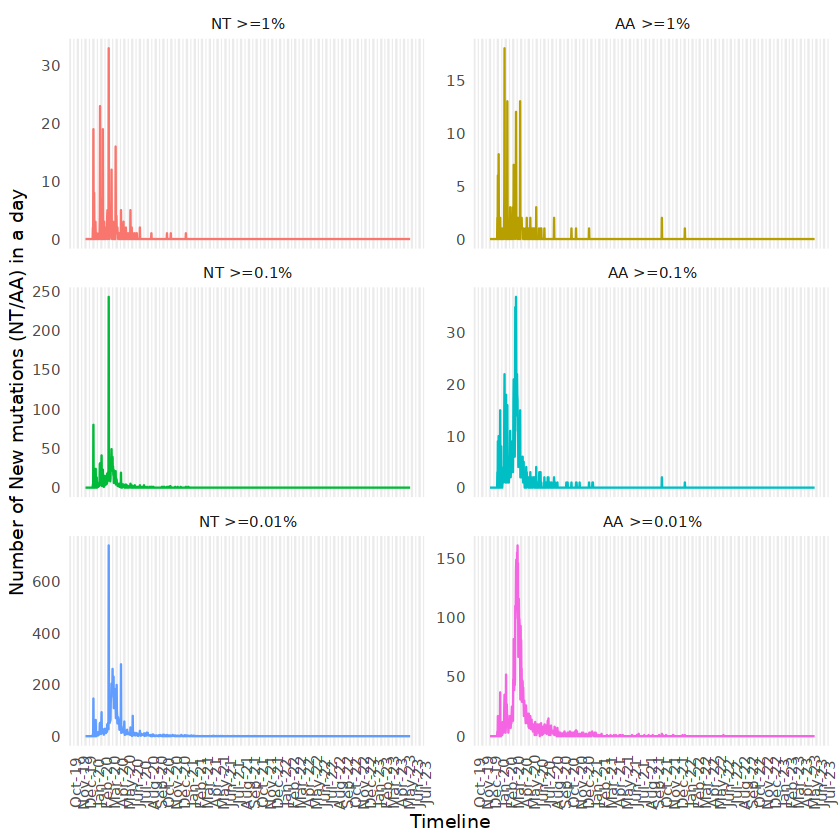

In [46]:
# free scale
p1 <- DF |>
        pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
        mutate(name = factor(name, levels = mutTypeLevels.plot)) |>
        ggplot(aes(x = Timeline, y = value, group = name, color = name)) +
        geom_line() +
        scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(
          panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none"
        ) +
        labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a day") +
        facet_wrap(~name, ncol = 2, drop = F, scales = "free_y", labeller = as_labeller(function(x){labeller2[x]}))

p1

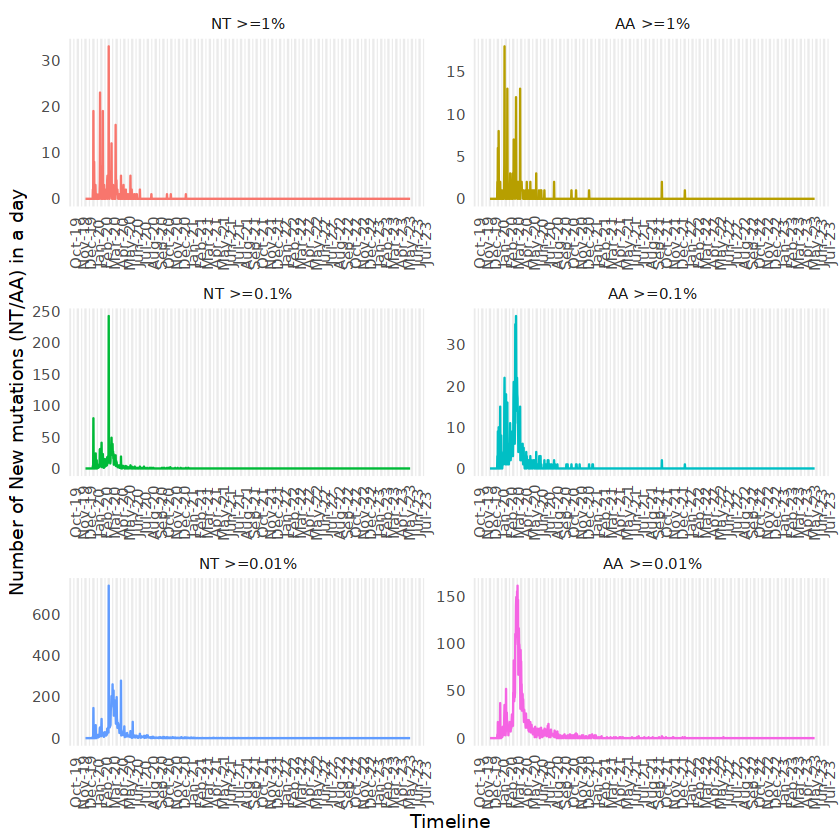

In [47]:
# free scale
p1 <- DF |>
        pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
        mutate(name = factor(name, levels = mutTypeLevels.plot)) |>
        ggplot(aes(x = Timeline, y = value, group = name, color = name)) +
        geom_line() +
        scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(
          panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none"
        ) +
        labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a day") +
        facet_wrap(~name, ncol = 2, drop = F, scales = "free", labeller = as_labeller(function(x){labeller2[x]}))

p1

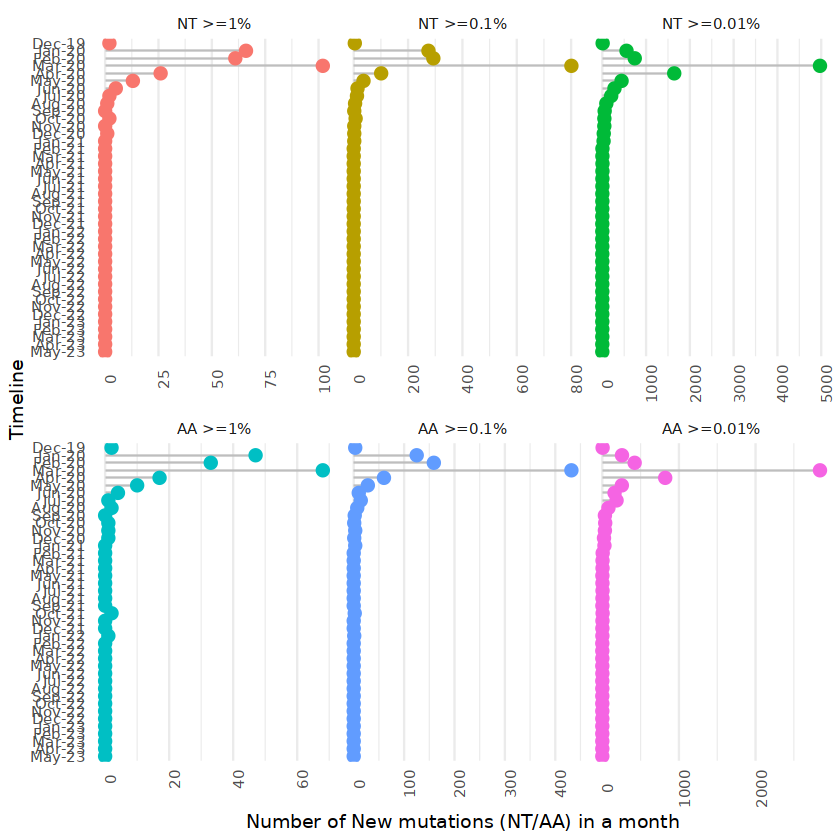

In [48]:
p2 <- DF.lollipop |>
    pivot_longer(cols = c(r.geq1.total, r.geqpt1.total, r.geqpt01.total, py.geq1.total, py.geqpt1.total, py.geqpt01.total)) |>
    mutate(name = factor(name, levels = mutTypeLevels1)) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_point(size = 3) +
    coord_flip() +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position = "none"
    ) +
    labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a month") +
    facet_wrap(~name, drop = F, scales = "free_x", labeller = as_labeller(function(x){labeller1[x]}))

p2

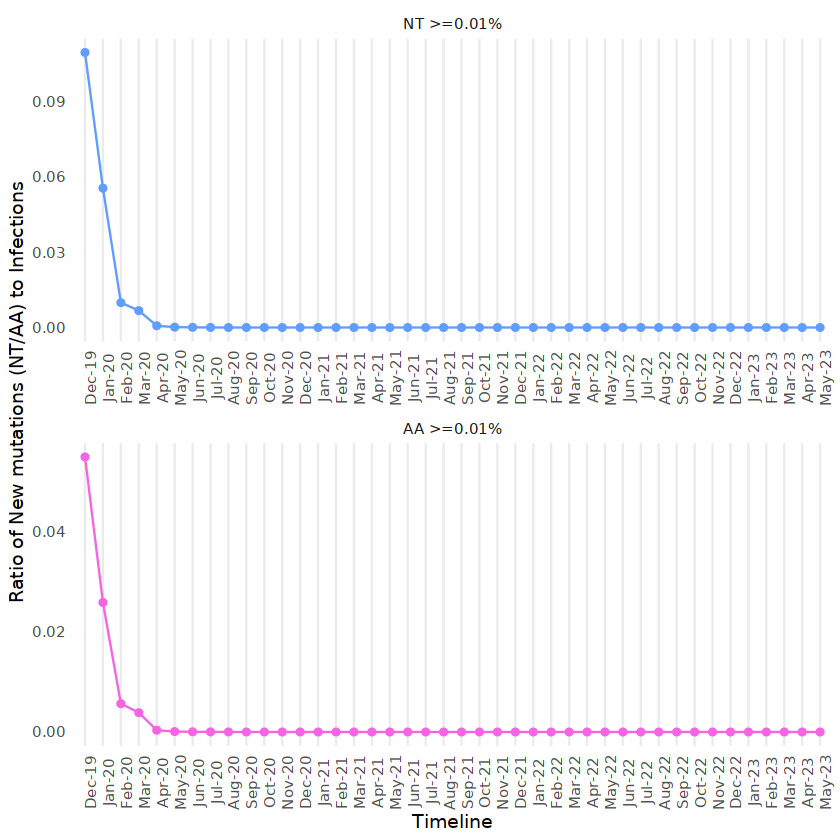

In [49]:
p3 <- ratios |>
    pivot_longer(cols = c("NT >=0.01%", "AA >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%", "AA >=0.01%")),
#         TimelineLabel = factor(TimelineLabel, levels = rev(monthLevels))
    ) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
#     geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_line() +
    geom_point() +
    scale_color_manual(values = c("#619CFF", "#F564E3")) +
#     coord_flip() +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position = "none"
    ) +
    labs(x = "Timeline", y = "Ratio of New mutations (NT/AA) to Infections") +
    facet_wrap(~name, drop = F, scales = "free", ncol = 1)

p3

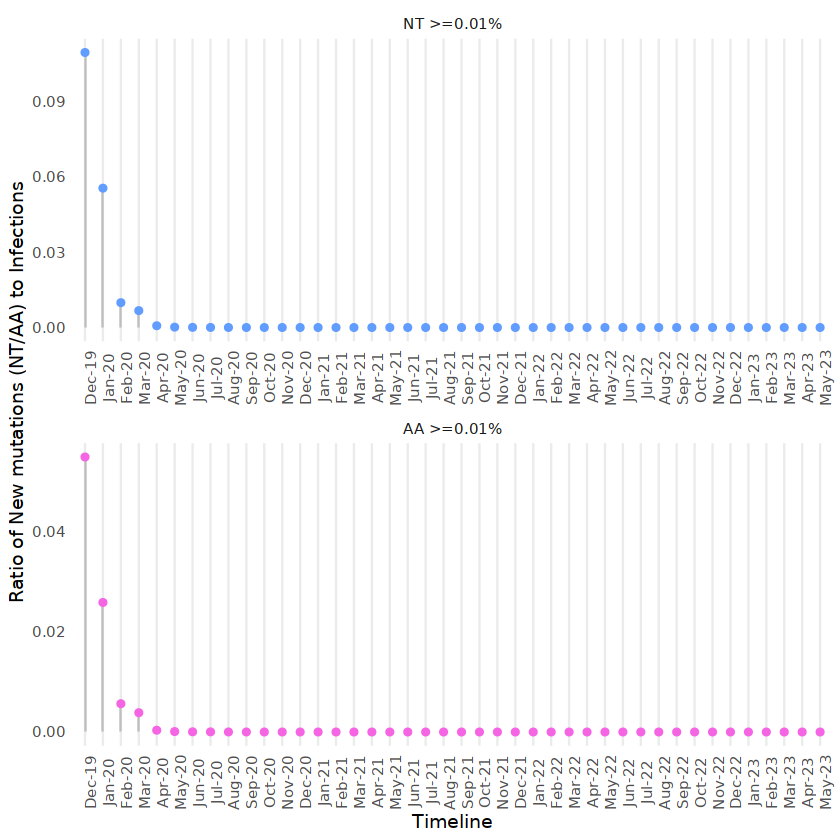

In [50]:
p3 <- ratios |>
    pivot_longer(cols = c("NT >=0.01%", "AA >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%", "AA >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = monthLevels)
    ) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_point() +
    scale_color_manual(values = c("#619CFF", "#F564E3")) +
    # coord_flip() +

    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position = "none"
    ) +
    labs(x = "Timeline", y = "Ratio of New mutations (NT/AA) to Infections") +
    facet_wrap(~name, drop = F, scales = "free", ncol = 1)
p3


In [51]:
design <-  "
    AAAAAAAA
    AAAAAAAA
    BBBBBBCC
    BBBBBBCC
    BBBBBBCC
    BBBBBBCC
"

In [52]:
DF.pie <- DF |>
    pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
    mutate(
        name = factor(name, levels = mutTypeLevels.plot),
        bins = ifelse(
            Timeline >= as_date("2019-12-01") & Timeline <= as_date("2020-04-01"),
            "Dec-19 to Mar-20",
            "Rest"
        )
    ) |>
    group_by(bins, name) |>
    summarize(countMutations = sum(value))
DF.pie

`summarise()` has grouped output by 'bins'. You can override using the `.groups` argument.


bins             name       countMutations
1  Dec-19 to Mar-20 py.geq1     233          
2  Dec-19 to Mar-20 r.geq1      151          
3  Dec-19 to Mar-20 py.geqpt1  1383          
4  Dec-19 to Mar-20 r.geqpt1    721          
5  Dec-19 to Mar-20 py.geqpt01 6473          
6  Dec-19 to Mar-20 r.geqpt01  3605          
7  Rest             py.geq1      48          
8  Rest             r.geq1       39          
9  Rest             py.geqpt1   173          
10 Rest             r.geqpt1    130          
11 Rest             py.geqpt01 2684          
12 Rest             r.geqpt01  1606

In [53]:
DF.pie <- DF |>
    pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
    mutate(
        TimelineLabel = factor(TimelineLabel, levels = monthLevels),
        name = factor(name, levels = mutTypeLevels.plot),
        bins = ifelse(
            Timeline >= as_date("2019-12-01") & Timeline <= as_date("2020-04-01"),
            "Dec-19 to Mar-20",
            "Rest"
        )
    ) |>
    group_by(TimelineLabel, name, bins) |>
    summarize(countMutations = sum(value))
DF.pie

`summarise()` has grouped output by 'TimelineLabel', 'name'. You can override using the `.groups` argument.


TimelineLabel name       bins             countMutations
1   Dec-19        py.geq1    Dec-19 to Mar-20    2          
2   Dec-19        r.geq1     Dec-19 to Mar-20    2          
3   Dec-19        py.geqpt1  Dec-19 to Mar-20    4          
4   Dec-19        r.geqpt1   Dec-19 to Mar-20    3          
5   Dec-19        py.geqpt01 Dec-19 to Mar-20    8          
6   Dec-19        r.geqpt01  Dec-19 to Mar-20    4          
7   Jan-20        py.geq1    Dec-19 to Mar-20   66          
8   Jan-20        r.geq1     Dec-19 to Mar-20   47          
9   Jan-20        py.geqpt1  Dec-19 to Mar-20  275          
10  Jan-20        r.geqpt1   Dec-19 to Mar-20  125          
11  Jan-20        py.geqpt01 Dec-19 to Mar-20  553          
12  Jan-20        r.geqpt01  Dec-19 to Mar-20  257          
13  Feb-20        py.geq1    Dec-19 to Mar-20   61          
14  Feb-20        r.geq1     Dec-19 to Mar-20   33          
15  Feb-20        py.geqpt1  Dec-19 to Mar-20  293          
16  Feb-20        r.geqpt1   Dec-19 to Mar-20  159          
17  Feb-20        py.geqpt01 Dec-19 to Mar-20  741          
18  Feb-20        r.geqpt01  Dec-19 to Mar-20  422          
19  Mar-20        py.geq1    Dec-19 to Mar-20  102          
20  Mar-20        r.geq1     Dec-19 to Mar-20   68          
21  Mar-20        py.geqpt1  Dec-19 to Mar-20  801          
22  Mar-20        r.geqpt1   Dec-19 to Mar-20  432          
23  Mar-20        py.geqpt01 Dec-19 to Mar-20 4972          
24  Mar-20        r.geqpt01  Dec-19 to Mar-20 2841          
25  Apr-20        py.geq1    Dec-19 to Mar-20    2          
26  Apr-20        py.geq1    Rest               24          
27  Apr-20        r.geq1     Dec-19 to Mar-20    1          
28  Apr-20        r.geq1     Rest               16          
29  Apr-20        py.geqpt1  Dec-19 to Mar-20   10          
30  Apr-20        py.geqpt1  Rest               91          
... ...           ...        ...              ...           
229 Jan-23        py.geq1    Rest             0             
230 Jan-23        r.geq1     Rest             0             
231 Jan-23        py.geqpt1  Rest             0             
232 Jan-23        r.geqpt1   Rest             0             
233 Jan-23        py.geqpt01 Rest             0             
234 Jan-23        r.geqpt01  Rest             0             
235 Feb-23        py.geq1    Rest             0             
236 Feb-23        r.geq1     Rest             0             
237 Feb-23        py.geqpt1  Rest             0             
238 Feb-23        r.geqpt1   Rest             0             
239 Feb-23        py.geqpt01 Rest             0             
240 Feb-23        r.geqpt01  Rest             0             
241 Mar-23        py.geq1    Rest             0             
242 Mar-23        r.geq1     Rest             0             
243 Mar-23        py.geqpt1  Rest             0             
244 Mar-23        r.geqpt1   Rest             0             
245 Mar-23        py.geqpt01 Rest             0             
246 Mar-23        r.geqpt01  Rest             0             
247 Apr-23        py.geq1    Rest             0             
248 Apr-23        r.geq1     Rest             0             
249 Apr-23        py.geqpt1  Rest             0             
250 Apr-23        r.geqpt1   Rest             0             
251 Apr-23        py.geqpt01 Rest             0             
252 Apr-23        r.geqpt01  Rest             0             
253 May-23        py.geq1    Rest             0             
254 May-23        r.geq1     Rest             0             
255 May-23        py.geqpt1  Rest             0             
256 May-23        r.geqpt1   Rest             0             
257 May-23        py.geqpt01 Rest             0             
258 May-23        r.geqpt01  Rest             0

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4."


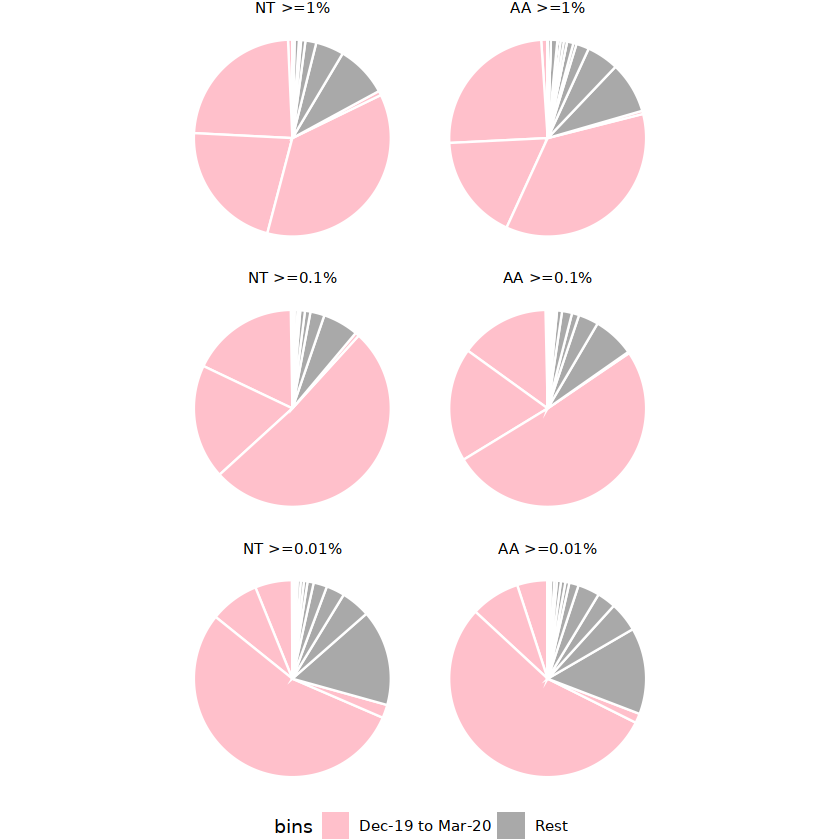

In [54]:
p2 <- DF.pie |>
    group_by(name) |>
    mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
    ggplot(aes(x = "", y = normalizedCountMutations, fill = bins, color = TimelineLabel)) +
    geom_bar(stat = "identity") +
    coord_polar(theta = "y") +
    scale_fill_manual(values = c("Dec-19 to Mar-20" = "pink", "Rest" = "darkgrey")) +
    scale_color_manual(values = sapply(monthLevels, function (x) {"white"})) +
#     scale_color_manual(values = c(
#         "Dec-19" = "white", 
#         "Rest" = "white",
#          "Mar-20" = ""
#     ))
    theme_void() +
#     facet_wrap(~ factor(name, levels = mutTypeLevels.plot), ncol = 2) +  # Facet by the "name" column
    facet_wrap(~factor(name, levels = mutTypeLevels.plot), ncol = 2, labeller = as_labeller(function(x){labeller2[x]})) +
    labs(title = NULL, color = NULL) +
    theme(legend.position = "bottom") +
    guides(color = FALSE)
p2

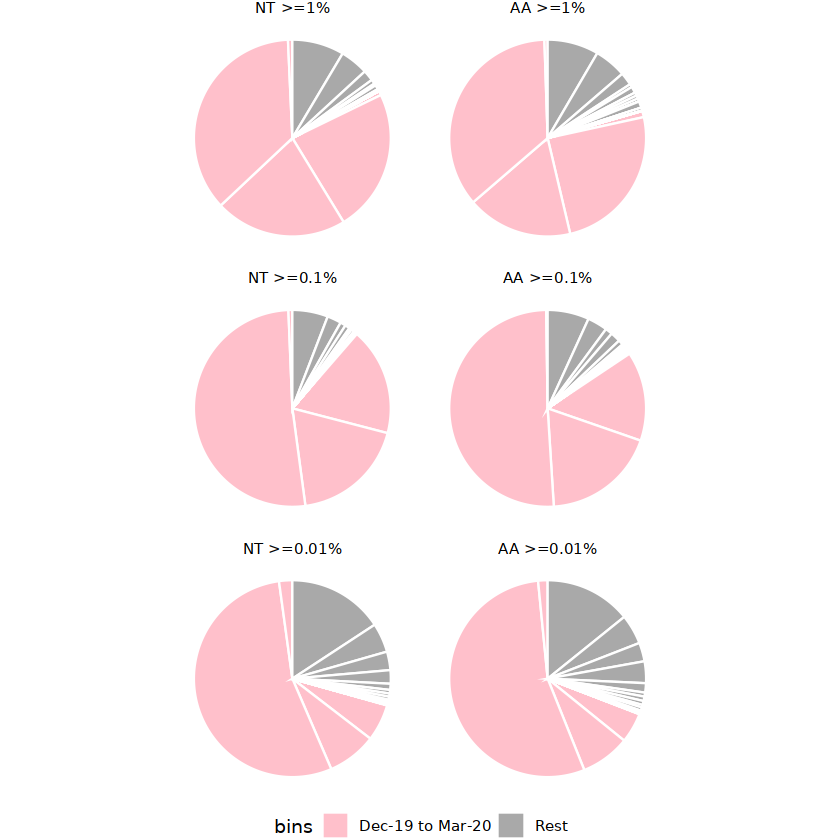

In [55]:
p2 <- DF.pie |>
    group_by(name) |>
    mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
    ggplot(aes(x = "", y = normalizedCountMutations, fill = bins, color = bins)) +
    geom_bar(stat = "identity") +
    coord_polar(theta = "y") +
    scale_fill_manual(values = c("Dec-19 to Mar-20" = "pink", "Rest" = "darkgrey")) +
    scale_color_manual(values = c("Dec-19 to Mar-20" = "white", "Rest" = "white")) +
    theme_void() +
#     facet_wrap(~ factor(name, levels = mutTypeLevels.plot), ncol = 2) +  # Facet by the "name" column
    facet_wrap(~factor(name, levels = mutTypeLevels.plot), ncol = 2, labeller = as_labeller(function(x){labeller2[x]})) +
    labs(title = NULL) +
    theme(legend.position = "bottom")
p2

In [56]:
DF |>
    pivot_longer(cols = c(py.geq1)) |>
    mutate(name = factor(name, levels = mutTypeLevels.plot)) 

Timeline   r.geq1 r.geqpt1 r.geqpt01 py.geqpt1 py.geqpt01 TimelineLabel
1    2019-12-01 0      0        0         0         0          Dec-19       
2    2019-12-02 0      0        0         0         0          Dec-19       
3    2019-12-03 0      0        0         0         0          Dec-19       
4    2019-12-04 0      0        0         0         0          Dec-19       
5    2019-12-05 0      0        0         0         0          Dec-19       
6    2019-12-06 0      0        0         0         0          Dec-19       
7    2019-12-07 0      0        0         0         0          Dec-19       
8    2019-12-08 0      0        0         0         0          Dec-19       
9    2019-12-09 0      0        0         0         0          Dec-19       
10   2019-12-10 0      0        0         0         0          Dec-19       
11   2019-12-11 0      0        0         0         0          Dec-19       
12   2019-12-12 0      0        0         0         0          Dec-19       
13   2019-12-13 0      0        0         0         0          Dec-19       
14   2019-12-14 0      0        0         0         0          Dec-19       
15   2019-12-15 0      0        0         0         0          Dec-19       
16   2019-12-16 0      0        0         0         0          Dec-19       
17   2019-12-17 0      0        0         0         0          Dec-19       
18   2019-12-18 0      0        0         0         0          Dec-19       
19   2019-12-19 0      0        0         0         0          Dec-19       
20   2019-12-20 0      0        0         0         0          Dec-19       
21   2019-12-21 0      0        0         0         0          Dec-19       
22   2019-12-22 0      0        0         0         0          Dec-19       
23   2019-12-23 0      0        0         0         0          Dec-19       
24   2019-12-24 0      0        0         0         0          Dec-19       
25   2019-12-25 0      0        0         0         0          Dec-19       
26   2019-12-26 0      0        0         0         0          Dec-19       
27   2019-12-27 0      0        0         0         0          Dec-19       
28   2019-12-28 0      0        0         0         0          Dec-19       
29   2019-12-29 0      0        0         0         0          Dec-19       
30   2019-12-30 2      3        4         4         8          Dec-19       
...  ...        ...    ...      ...       ...       ...        ...          
1243 2023-04-26 0      0        0         0         0          Apr-23       
1244 2023-04-27 0      0        0         0         0          Apr-23       
1245 2023-04-28 0      0        0         0         0          Apr-23       
1246 2023-04-29 0      0        0         0         0          Apr-23       
1247 2023-04-30 0      0        0         0         0          Apr-23       
1248 2023-05-01 0      0        0         0         0          May-23       
1249 2023-05-02 0      0        0         0         0          May-23       
1250 2023-05-03 0      0        0         0         0          May-23       
1251 2023-05-04 0      0        0         0         0          May-23       
1252 2023-05-05 0      0        0         0         0          May-23       
1253 2023-05-06 0      0        0         0         0          May-23       
1254 2023-05-07 0      0        0         0         0          May-23       
1255 2023-05-08 0      0        0         0         0          May-23       
1256 2023-05-09 0      0        0         0         0          May-23       
1257 2023-05-10 0      0        0         0         0          May-23       
1258 2023-05-11 0      0        0         0         0          May-23       
1259 2023-05-12 0      0        0         0         0          May-23       
1260 2023-05-13 0      0        0         0         0          May-23       
1261 2023-05-14 0      0        0         0         0          May-23       
1262 2023-05-15 0      0        0         0         0          May-23       
1

In [57]:
DF |>
    pivot_longer(cols = c(py.geq1)) |>
    mutate(name = factor(name, levels = mutTypeLevels.plot)) |>
    mutate(DecToMar = ifelse(Timeline >= as.Date("2019-12-01") & Timeline <= as.Date("2020-03-31"), "Dec-19 to Mar-20", "Other"))

Timeline   r.geq1 r.geqpt1 r.geqpt01 py.geqpt1 py.geqpt01 TimelineLabel
1    2019-12-01 0      0        0         0         0          Dec-19       
2    2019-12-02 0      0        0         0         0          Dec-19       
3    2019-12-03 0      0        0         0         0          Dec-19       
4    2019-12-04 0      0        0         0         0          Dec-19       
5    2019-12-05 0      0        0         0         0          Dec-19       
6    2019-12-06 0      0        0         0         0          Dec-19       
7    2019-12-07 0      0        0         0         0          Dec-19       
8    2019-12-08 0      0        0         0         0          Dec-19       
9    2019-12-09 0      0        0         0         0          Dec-19       
10   2019-12-10 0      0        0         0         0          Dec-19       
11   2019-12-11 0      0        0         0         0          Dec-19       
12   2019-12-12 0      0        0         0         0          Dec-19       
13   2019-12-13 0      0        0         0         0          Dec-19       
14   2019-12-14 0      0        0         0         0          Dec-19       
15   2019-12-15 0      0        0         0         0          Dec-19       
16   2019-12-16 0      0        0         0         0          Dec-19       
17   2019-12-17 0      0        0         0         0          Dec-19       
18   2019-12-18 0      0        0         0         0          Dec-19       
19   2019-12-19 0      0        0         0         0          Dec-19       
20   2019-12-20 0      0        0         0         0          Dec-19       
21   2019-12-21 0      0        0         0         0          Dec-19       
22   2019-12-22 0      0        0         0         0          Dec-19       
23   2019-12-23 0      0        0         0         0          Dec-19       
24   2019-12-24 0      0        0         0         0          Dec-19       
25   2019-12-25 0      0        0         0         0          Dec-19       
26   2019-12-26 0      0        0         0         0          Dec-19       
27   2019-12-27 0      0        0         0         0          Dec-19       
28   2019-12-28 0      0        0         0         0          Dec-19       
29   2019-12-29 0      0        0         0         0          Dec-19       
30   2019-12-30 2      3        4         4         8          Dec-19       
...  ...        ...    ...      ...       ...       ...        ...          
1243 2023-04-26 0      0        0         0         0          Apr-23       
1244 2023-04-27 0      0        0         0         0          Apr-23       
1245 2023-04-28 0      0        0         0         0          Apr-23       
1246 2023-04-29 0      0        0         0         0          Apr-23       
1247 2023-04-30 0      0        0         0         0          Apr-23       
1248 2023-05-01 0      0        0         0         0          May-23       
1249 2023-05-02 0      0        0         0         0          May-23       
1250 2023-05-03 0      0        0         0         0          May-23       
1251 2023-05-04 0      0        0         0         0          May-23       
1252 2023-05-05 0      0        0         0         0          May-23       
1253 2023-05-06 0      0        0         0         0          May-23       
1254 2023-05-07 0      0        0         0         0          May-23       
1255 2023-05-08 0      0        0         0         0          May-23       
1256 2023-05-09 0      0        0         0         0          May-23       
1257 2023-05-10 0      0        0         0         0          May-23       
1258 2023-05-11 0      0        0         0         0          May-23       
1259 2023-05-12 0      0        0         0         0          May-23       
1260 2023-05-13 0      0        0         0         0          May-23       
1261 2023-05-14 0      0        0         0         0          May-23       
1262 2023-05-15 0      0        0         0         0          May-23       
1

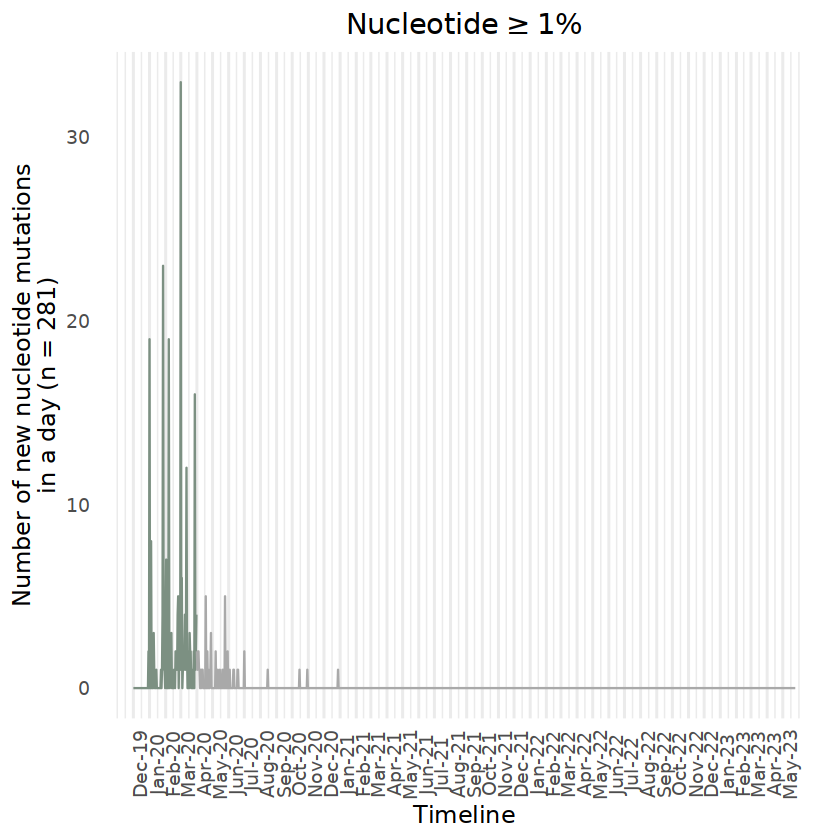

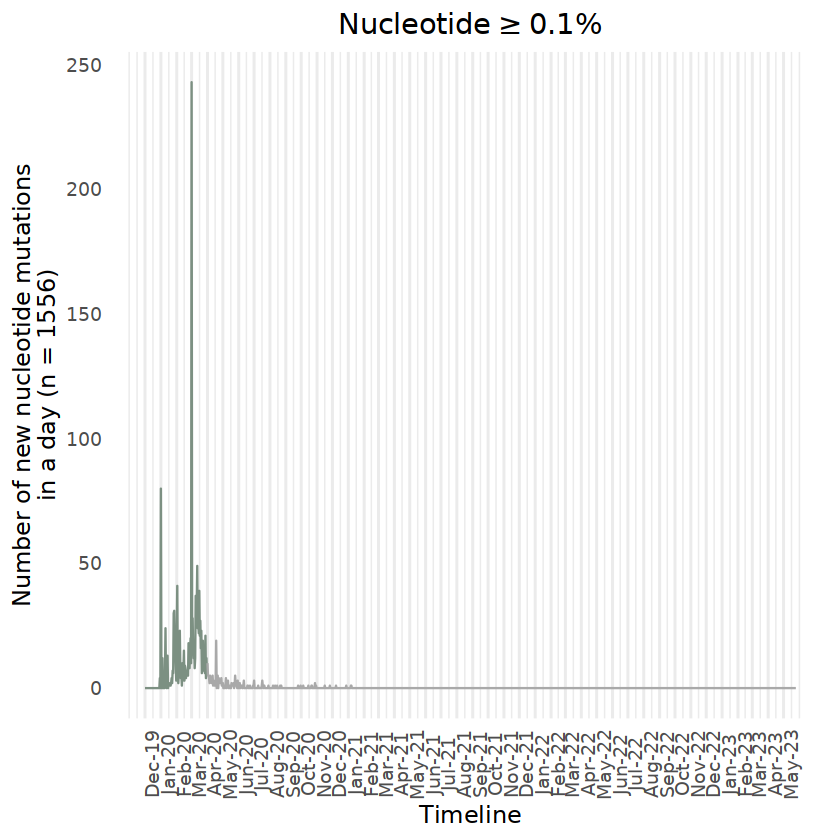

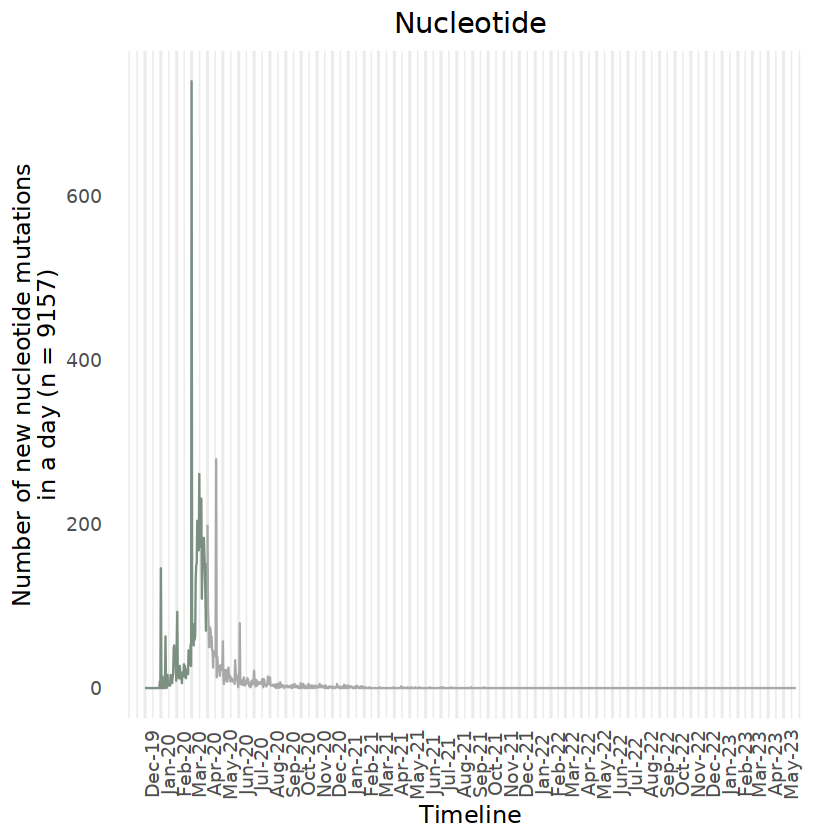

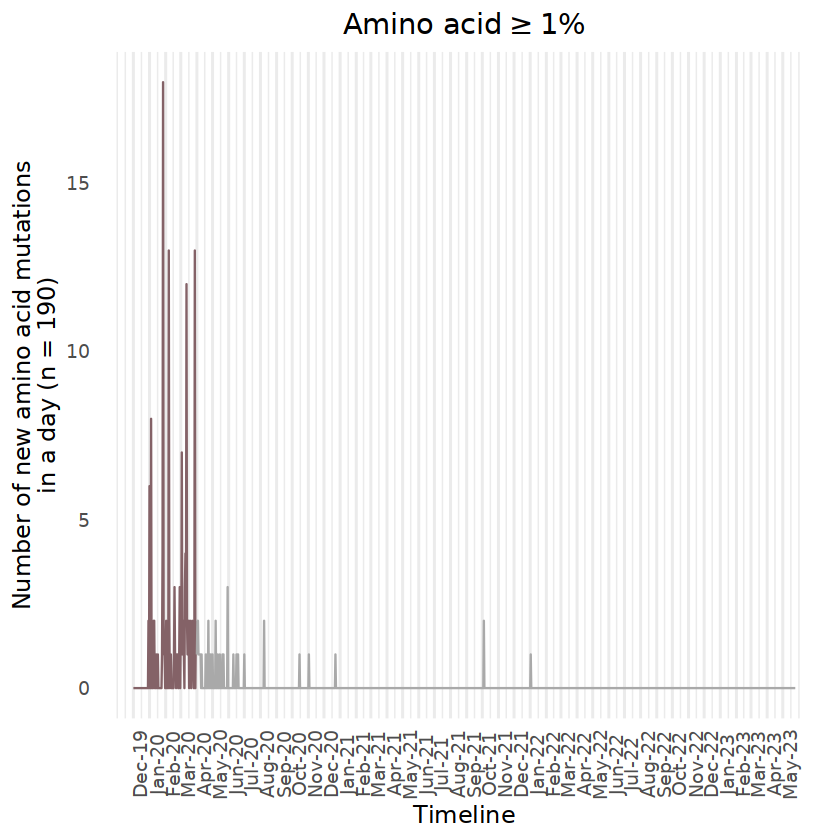

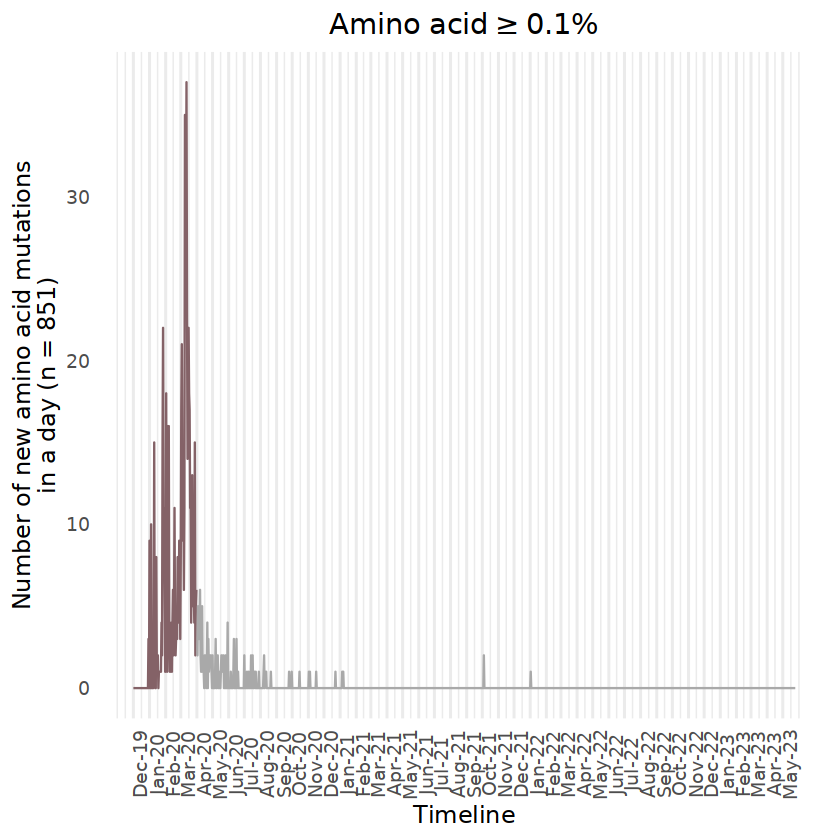

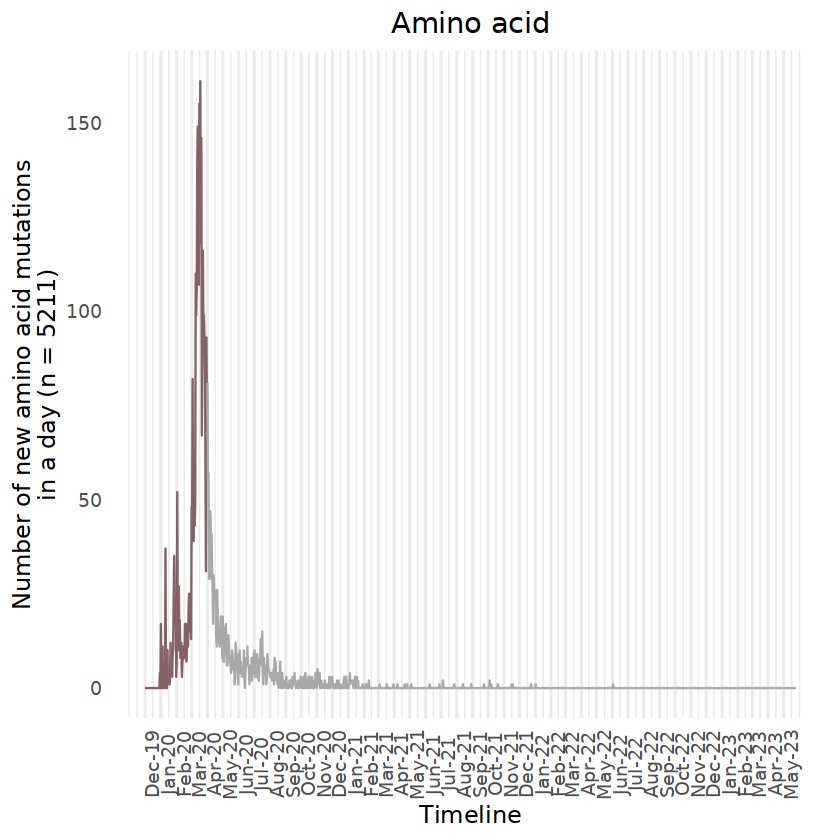

In [58]:
color.NT <- "#7C9082"
color.AA <- "#846267"

# NT
# free scale
p1.a <- DF |>
        pivot_longer(cols = c(py.geq1)) |>
        mutate(
            name = factor(name, levels = mutTypeLevels.plot),
            flag = ifelse(Timeline >= as.Date("2019-12-01 ") & Timeline <= as.Date("2020-03-31"), "Dec-19 to Mar-20", "Rest")
        ) |>
        ggplot(aes(x = Timeline, y = value, group = interaction(name, flag))) +
        geom_path(aes(color = ifelse(flag == "Dec-19 to Mar-20", "Dec-19 to Mar-20", "Rest"))) +
        scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
                     date_labels = "%b-%y") +
        # scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal(base_size = 14) +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(panel.grid.minor.y = element_blank(),
              panel.grid.major.y = element_blank(),
              legend.position = "none",
              plot.title = element_text(hjust = 0.5)) +
        scale_color_manual(values = c(color.NT, "darkgrey"), guide = FALSE)  +
        labs(x = "Timeline", 
             y = paste0("Number of new nucleotide mutations\nin a day (n = ", sum(DF$py.geq1), ")"), 
             title = expression("Nucleotide">="1%"))

p1.a

# free scale
p1.c <- DF |>
        pivot_longer(cols = c(py.geqpt1)) |>
        mutate(
            name = factor(name, levels = mutTypeLevels.plot),
            flag = ifelse(Timeline >= as.Date("2019-12-01 ") & Timeline <= as.Date("2020-03-31"), "Dec-19 to Mar-20", "Rest")
        ) |>
        ggplot(aes(x = Timeline, y = value, group = interaction(name, flag))) +
        geom_path(aes(color = ifelse(flag == "Dec-19 to Mar-20", "Dec-19 to Mar-20", "Rest"))) +
        scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
                     date_labels = "%b-%y") +
        # scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal(base_size = 14) +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(panel.grid.minor.y = element_blank(),
              panel.grid.major.y = element_blank(),
              legend.position = "none",
              plot.title = element_text(hjust = 0.5)) +
        scale_color_manual(values = c(color.NT, "darkgrey"), guide = FALSE)  +
        labs(x = "Timeline", 
             y = paste0("Number of new nucleotide mutations\nin a day (n = ", sum(DF$py.geqpt1), ")"), 
             title = expression("Nucleotide">="0.1%"))

p1.c

# free scale
p1.e <- DF |>
        pivot_longer(cols = c(py.geqpt01)) |>
        mutate(
            name = factor(name, levels = mutTypeLevels.plot),
            flag = ifelse(Timeline >= as.Date("2019-12-01 ") & Timeline <= as.Date("2020-03-31"), "Dec-19 to Mar-20", "Rest")
        ) |>
        ggplot(aes(x = Timeline, y = value, group = interaction(name, flag))) +
        geom_path(aes(color = ifelse(flag == "Dec-19 to Mar-20", "Dec-19 to Mar-20", "Rest"))) +
        scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
                     date_labels = "%b-%y") +
        # scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal(base_size = 14) +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(panel.grid.minor.y = element_blank(),
              panel.grid.major.y = element_blank(),
              legend.position = "none",
              plot.title = element_text(hjust = 0.5)) +
        scale_color_manual(values = c(color.NT, "darkgrey"), guide = FALSE)  +
        labs(x = "Timeline", 
             y = paste0("Number of new nucleotide mutations\nin a day (n = ", sum(DF$py.geqpt01), ")"), 
             title = "Nucleotide")

p1.e

# AA

# free scale
p1.b <- DF |>
        pivot_longer(cols = c(r.geq1)) |>
        mutate(
            name = factor(name, levels = mutTypeLevels.plot),
            flag = ifelse(Timeline >= as.Date("2019-12-01 ") & Timeline <= as.Date("2020-03-31"), "Dec-19 to Mar-20", "Rest")
        ) |>
        ggplot(aes(x = Timeline, y = value, group = interaction(name, flag))) +
        geom_path(aes(color = ifelse(flag == "Dec-19 to Mar-20", "Dec-19 to Mar-20", "Rest"))) +
        scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
                     date_labels = "%b-%y") +
        # scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal(base_size = 14) +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(panel.grid.minor.y = element_blank(),
              panel.grid.major.y = element_blank(),
              legend.position = "none",
              plot.title = element_text(hjust = 0.5)) +
        scale_color_manual(values = c(color.AA, "darkgrey"), guide = FALSE)  +
        labs(x = "Timeline", 
             y = paste0("Number of new amino acid mutations\nin a day (n = ", sum(DF$r.geq1), ")"), 
             title = expression("Amino acid">="1%"))

p1.b

# free scale
p1.d <- DF |>
        pivot_longer(cols = c(r.geqpt1)) |>
        mutate(
            name = factor(name, levels = mutTypeLevels.plot),
            flag = ifelse(Timeline >= as.Date("2019-12-01 ") & Timeline <= as.Date("2020-03-31"), "Dec-19 to Mar-20", "Rest")
        ) |>
        ggplot(aes(x = Timeline, y = value, group = interaction(name, flag))) +
        geom_path(aes(color = ifelse(flag == "Dec-19 to Mar-20", "Dec-19 to Mar-20", "Rest"))) +
        scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
                     date_labels = "%b-%y") +
        # scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal(base_size = 14) +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(panel.grid.minor.y = element_blank(),
              panel.grid.major.y = element_blank(),
              legend.position = "none",
              plot.title = element_text(hjust = 0.5)) +
        scale_color_manual(values = c(color.AA, "darkgrey"), guide = FALSE)  +
        labs(x = "Timeline", 
             y = paste0("Number of new amino acid mutations\nin a day (n = ", sum(DF$r.geqpt1), ")"), 
             title = expression("Amino acid">="0.1%"))

p1.d

# free scale
p1.f <- DF |>
        pivot_longer(cols = c(r.geqpt01)) |>
        mutate(
            name = factor(name, levels = mutTypeLevels.plot),
            flag = ifelse(Timeline >= as.Date("2019-12-01 ") & Timeline <= as.Date("2020-03-31"), "Dec-19 to Mar-20", "Rest")
        ) |>
        ggplot(aes(x = Timeline, y = value, group = interaction(name, flag))) +
        geom_path(aes(color = ifelse(flag == "Dec-19 to Mar-20", "Dec-19 to Mar-20", "Rest"))) +
        scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
                     date_labels = "%b-%y") +
        # scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
        theme_minimal(base_size = 14) +
        theme(axis.text.x = element_text(angle = 90)) +
        theme(panel.grid.minor.y = element_blank(),
              panel.grid.major.y = element_blank(),
              legend.position = "none",
              plot.title = element_text(hjust = 0.5)) +
        scale_color_manual(values = c(color.AA, "darkgrey"), guide = FALSE)  +
        labs(x = "Timeline", 
             y = paste0("Number of new amino acid mutations\nin a day (n = ", sum(DF$r.geqpt01), ")"), 
             title = "Amino acid")

p1.f

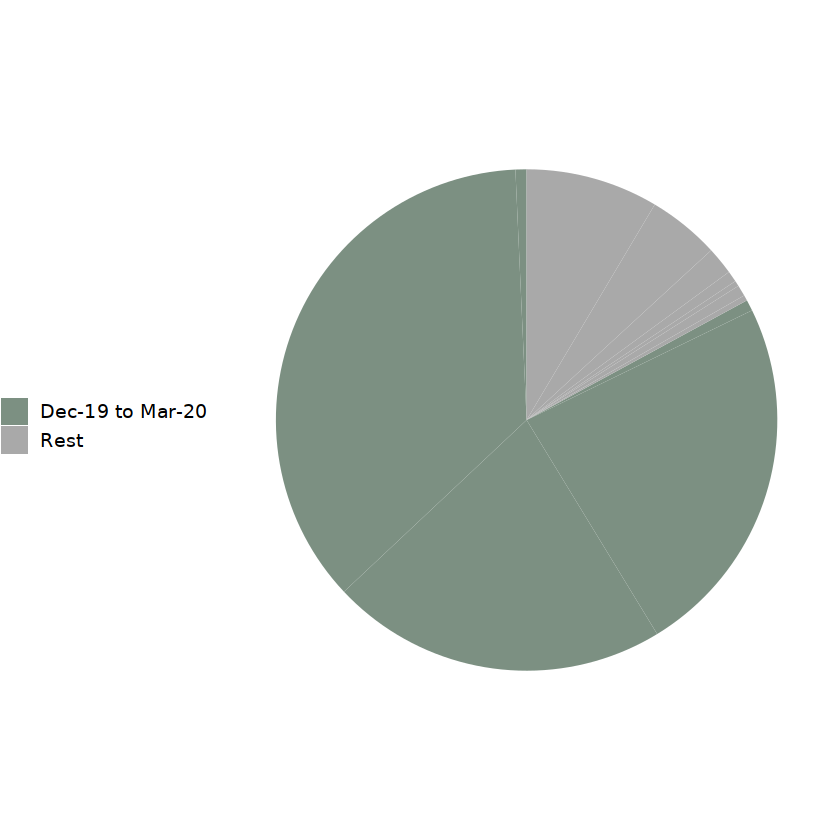

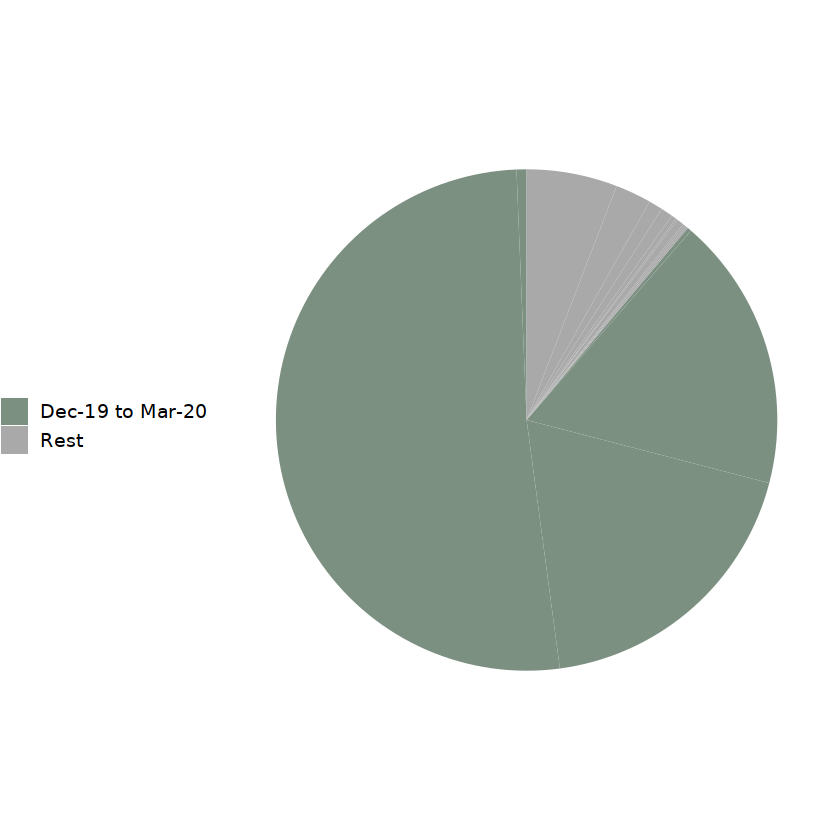

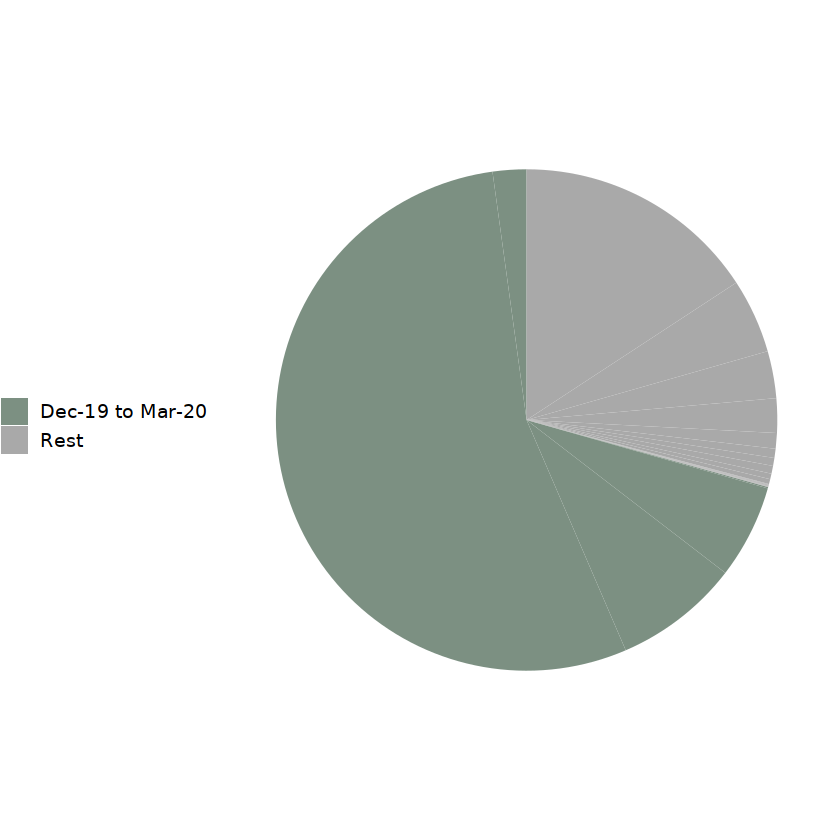

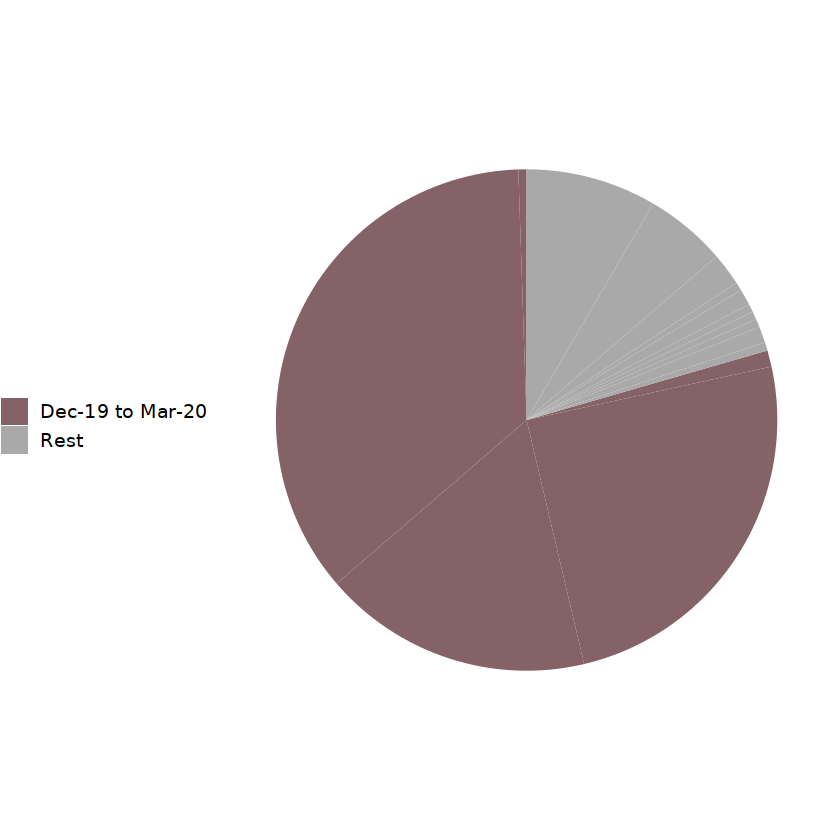

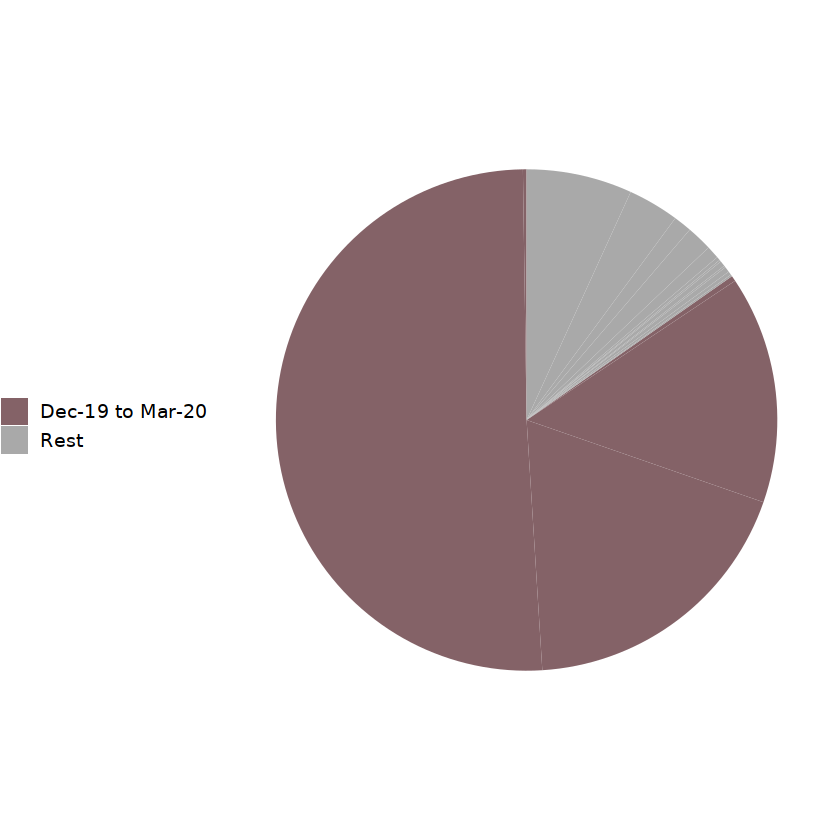

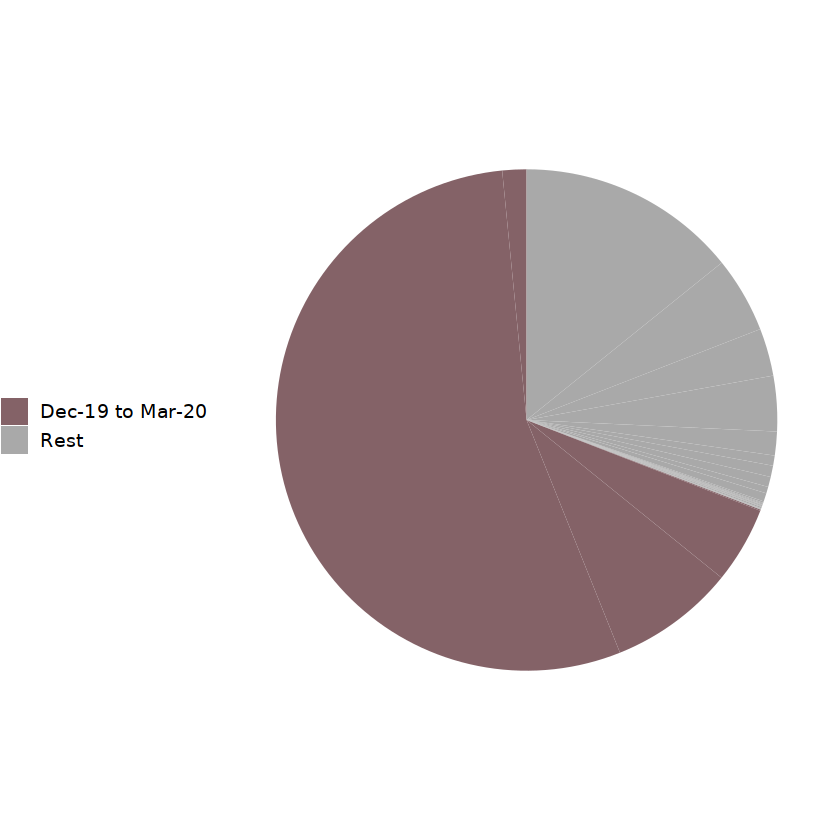

In [59]:
# NT
p2.a <- DF.pie |>
    group_by(name) |>
    mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
    filter(name == "py.geq1") |>
    ggplot(aes(x = "", y = normalizedCountMutations, fill = bins)) +
    geom_bar(stat = "identity") +
    coord_polar(theta = "y") +
    scale_fill_manual(values = c("Dec-19 to Mar-20" = color.NT, "Rest" = "darkgrey")) +
    theme_void(base_size = 14) +
    labs(title = NULL) +
    theme(legend.position = "left", legend.title=element_blank())
p2.a

p2.c <- DF.pie |>
    group_by(name) |>
    mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
    filter(name == "py.geqpt1") |>
    ggplot(aes(x = "", y = normalizedCountMutations, fill = bins)) +
    geom_bar(stat = "identity") +
    coord_polar(theta = "y") +
    scale_fill_manual(values = c("Dec-19 to Mar-20" = color.NT, "Rest" = "darkgrey")) +
    theme_void(base_size = 14) +
    labs(title = NULL) +
    theme(legend.position = "left", legend.title=element_blank())
p2.c

p2.e <- DF.pie |>
    group_by(name) |>
    mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
    filter(name == "py.geqpt01") |>
    ggplot(aes(x = "", y = normalizedCountMutations, fill = bins)) +
    geom_bar(stat = "identity") +
    coord_polar(theta = "y") +
    scale_fill_manual(values = c("Dec-19 to Mar-20" = color.NT, "Rest" = "darkgrey")) +
    theme_void(base_size = 14) +
    labs(title = NULL) +
    theme(legend.position = "left", legend.title=element_blank())
p2.e

# AA
p2.b <- DF.pie |>
    group_by(name) |>
    mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
    filter(name == "r.geq1") |>
    ggplot(aes(x = "", y = normalizedCountMutations, fill = bins)) +
    geom_bar(stat = "identity") +
    coord_polar(theta = "y") +
    scale_fill_manual(values = c("Dec-19 to Mar-20" = color.AA, "Rest" = "darkgrey")) +
    theme_void(base_size = 14) +
    labs(title = NULL) +
    theme(legend.position = "left", legend.title=element_blank())
p2.b

p2.d <- DF.pie |>
    group_by(name) |>
    mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
    filter(name == "r.geqpt1") |>
    ggplot(aes(x = "", y = normalizedCountMutations, fill = bins)) +
    geom_bar(stat = "identity") +
    coord_polar(theta = "y") +
    scale_fill_manual(values = c("Dec-19 to Mar-20" = color.AA, "Rest" = "darkgrey")) +
    theme_void(base_size = 14) +
    labs(title = NULL) +
    theme(legend.position = "left", legend.title=element_blank())
p2.d

p2.f <- DF.pie |>
    group_by(name) |>
    mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
    filter(name == "r.geqpt01") |>
    ggplot(aes(x = "", y = normalizedCountMutations, fill = bins)) +
    geom_bar(stat = "identity") +
    coord_polar(theta = "y") +
    scale_fill_manual(values = c("Dec-19 to Mar-20" = color.AA, "Rest" = "darkgrey")) +
    theme_void(base_size = 14) +
    labs(title = NULL) +
    theme(legend.position = "left", legend.title=element_blank())
p2.f

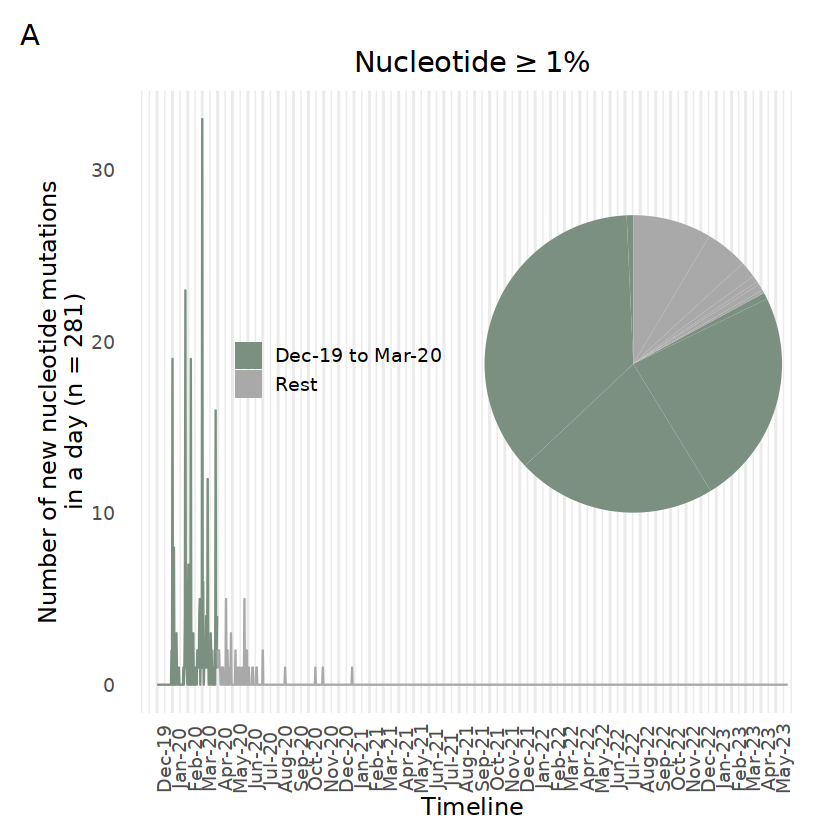

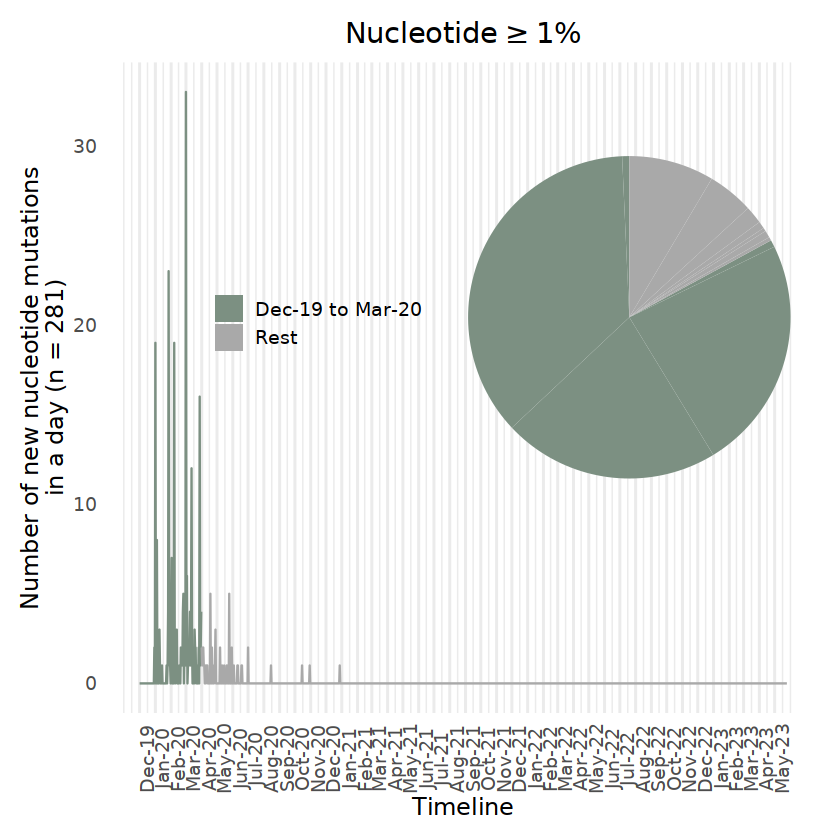

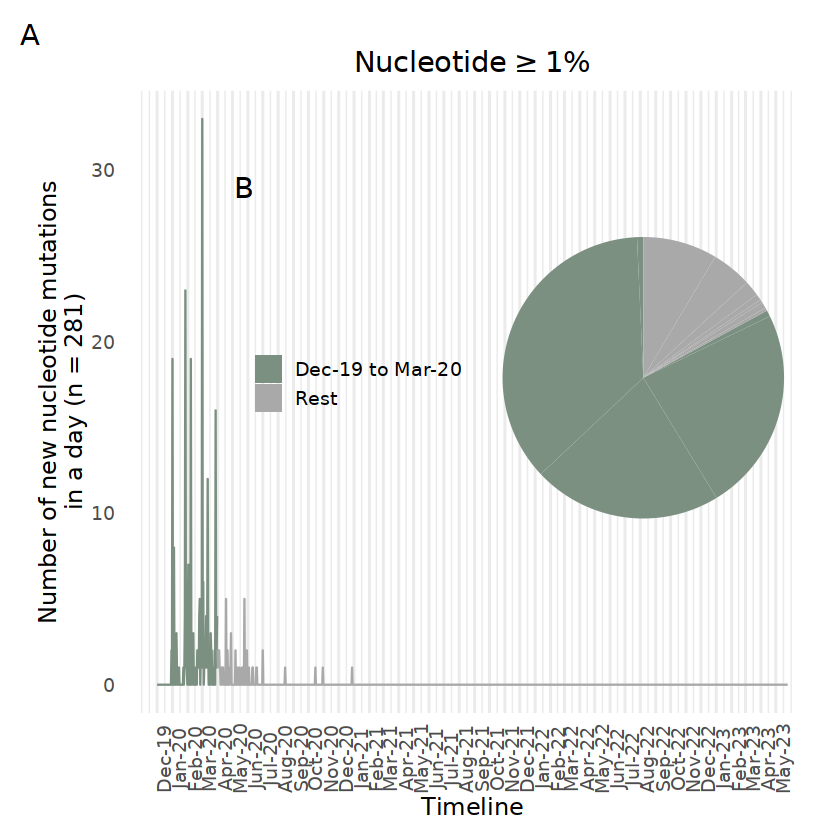

In [60]:
p1.a + inset_element(p2.a, left = 0.25, bottom = 0.25, right = 1, top = 1, align_to = "plot", ignore_tag = T) + plot_annotation(tag_levels = 'A')
p1.a + inset_element(p2.a, left = 0.25, bottom = 0.25, right = 1, top = 1, align_to = "full") 
p1.a + inset_element(p2.a, left = 0.25, bottom = 0.25, right = 1, top = 1, align_to = "plot") + plot_annotation(tag_levels = 'A')

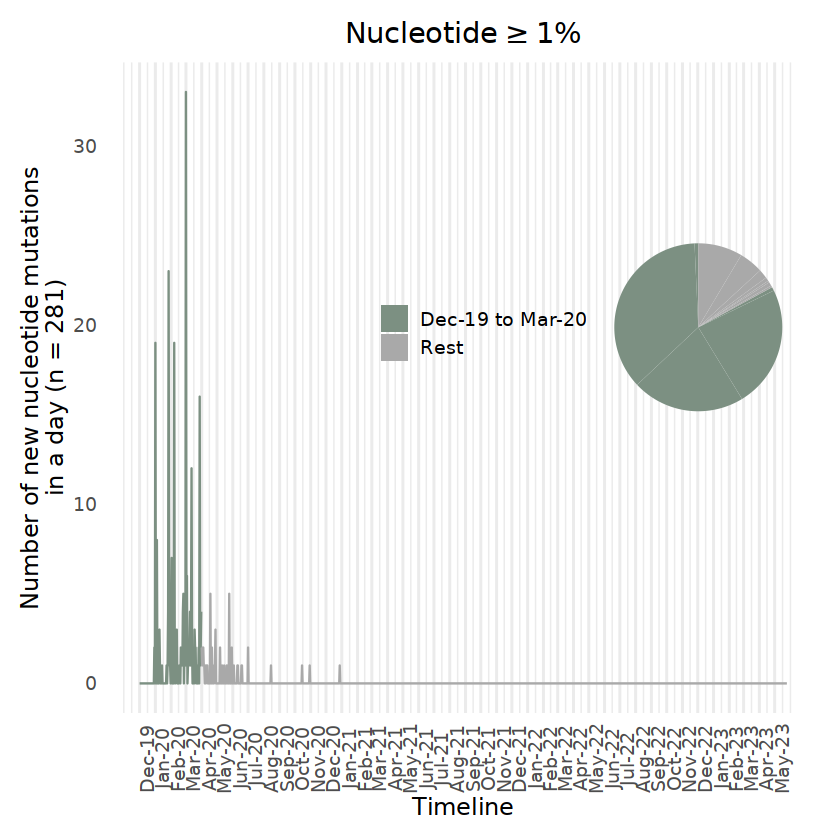

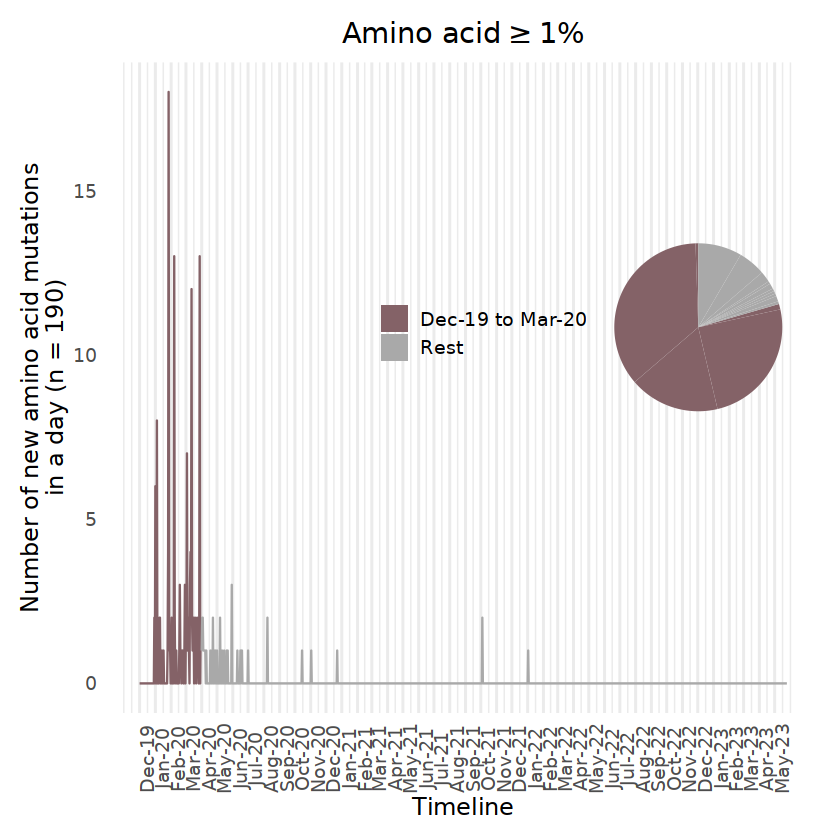

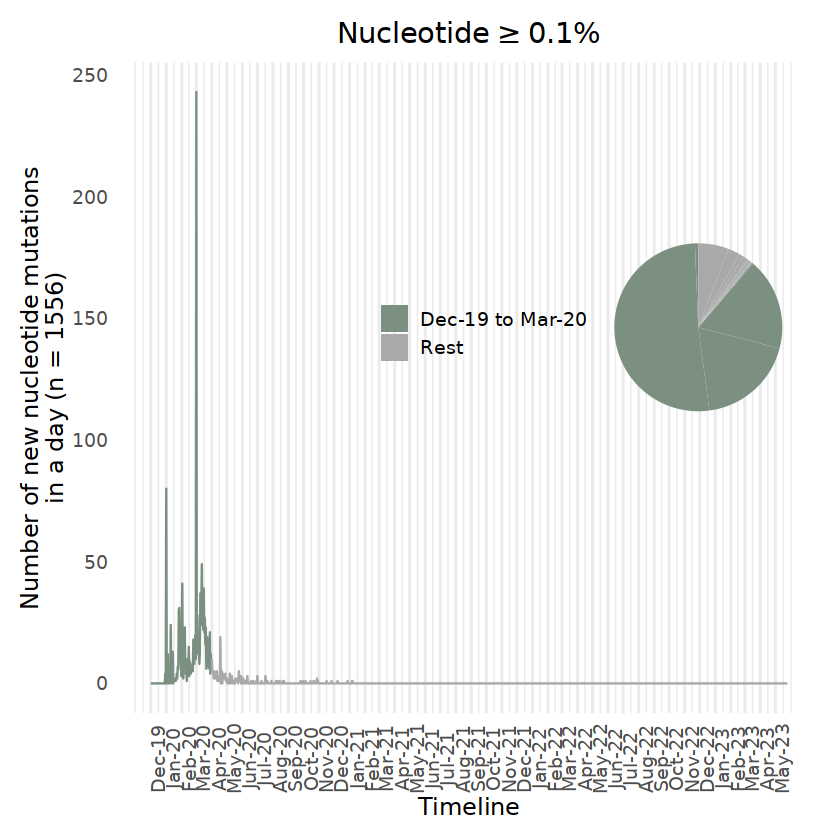

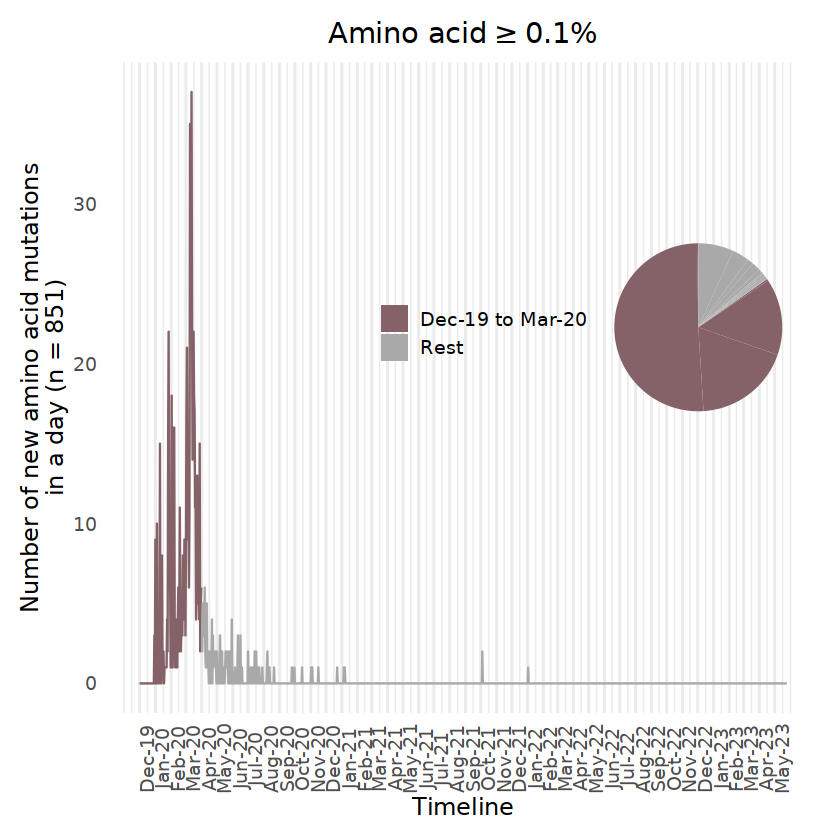

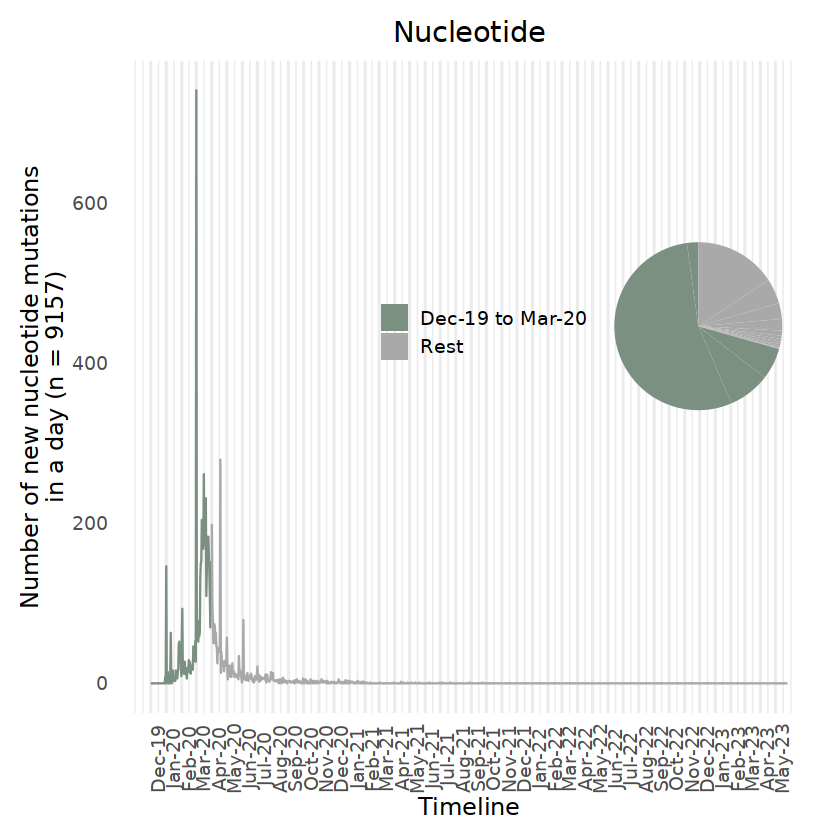

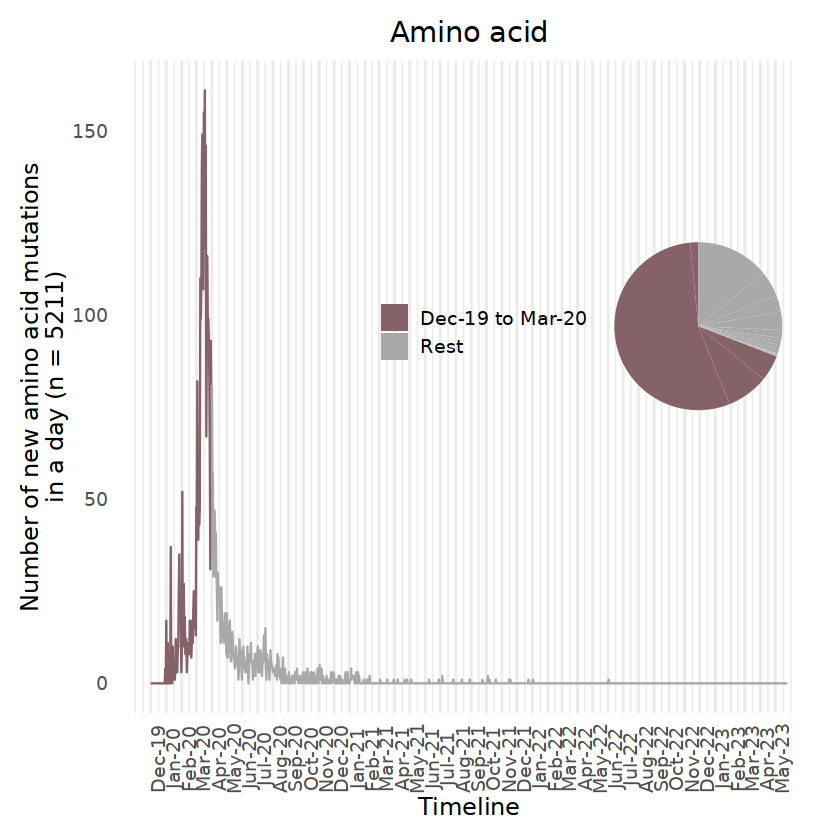

In [61]:
p1.A <- p1.a + inset_element(p2.a, left = 0.45, bottom = 0.3, right = 0.98, top = 1, align_to = "plot")
p1.A
p1.B <- p1.b + inset_element(p2.b, left = 0.45, bottom = 0.3, right = 0.98, top = 1, align_to = "plot")
p1.B
p1.C <- p1.c + inset_element(p2.c, left = 0.45, bottom = 0.3, right = 0.98, top = 1, align_to = "plot")
p1.C
p1.D <- p1.d + inset_element(p2.d, left = 0.45, bottom = 0.3, right = 0.98, top = 1, align_to = "plot")
p1.D
p1.E <- p1.e + inset_element(p2.e, left = 0.45, bottom = 0.3, right = 0.98, top = 1, align_to = "plot")
p1.E
p1.F <- p1.f + inset_element(p2.f, left = 0.45, bottom = 0.3, right = 0.98, top = 1, align_to = "plot")
p1.F

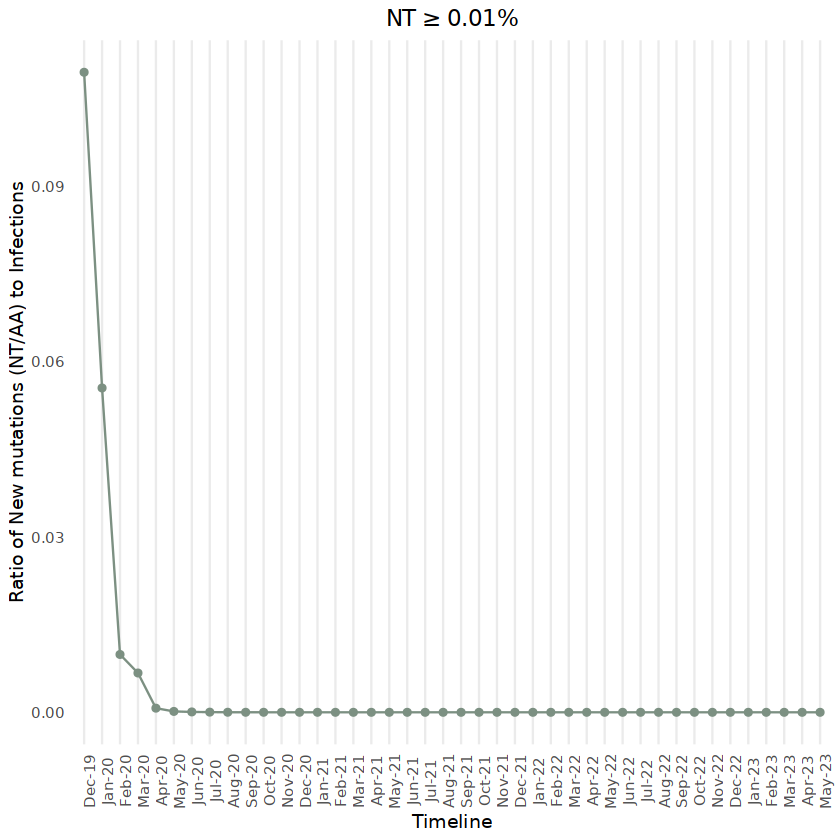

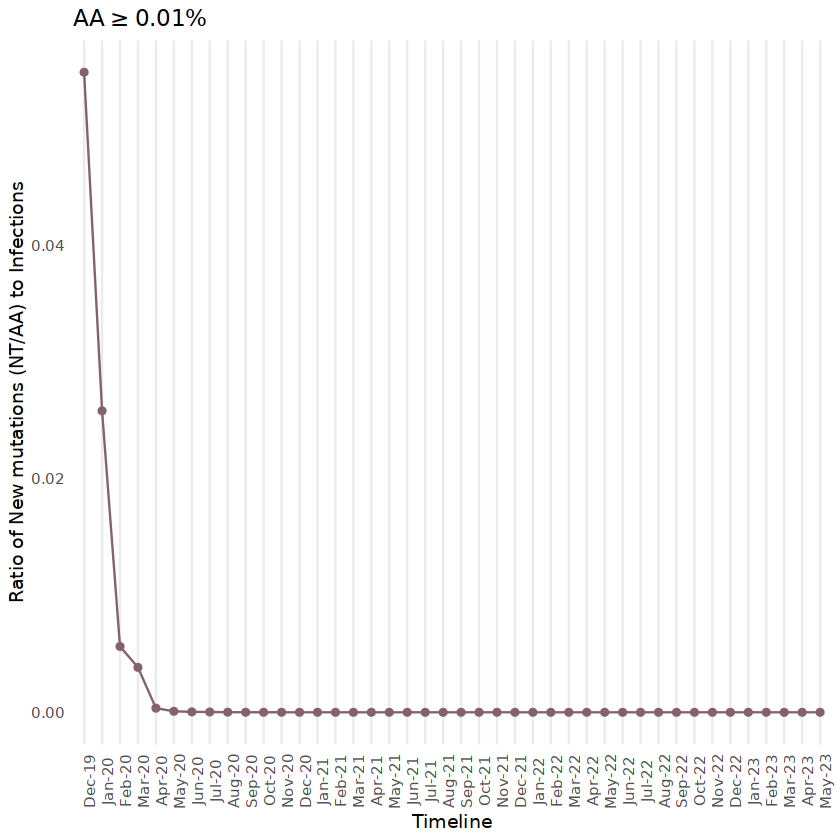

In [62]:
p2.A <- ratios |>
    pivot_longer(cols = c("NT >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%", "AA >=0.01%"))
    ) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_line() +
    geom_point() +
    scale_color_manual(values = c(color.NT)) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none",
          plot.title = element_text(hjust = 0.5)) +
    labs(x = "Timeline", y = "Ratio of New mutations (NT/AA) to Infections", title = expression("NT">="0.01%"))
p2.A

p2.B <- ratios |>
    pivot_longer(cols = c("AA >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%", "AA >=0.01%"))
    ) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_line() +
    geom_point() +
    scale_color_manual(values = c(color.AA)) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none") +
    labs(x = "Timeline", y = "Ratio of New mutations (NT/AA) to Infections", title = expression("AA">="0.01%"))
p2.B

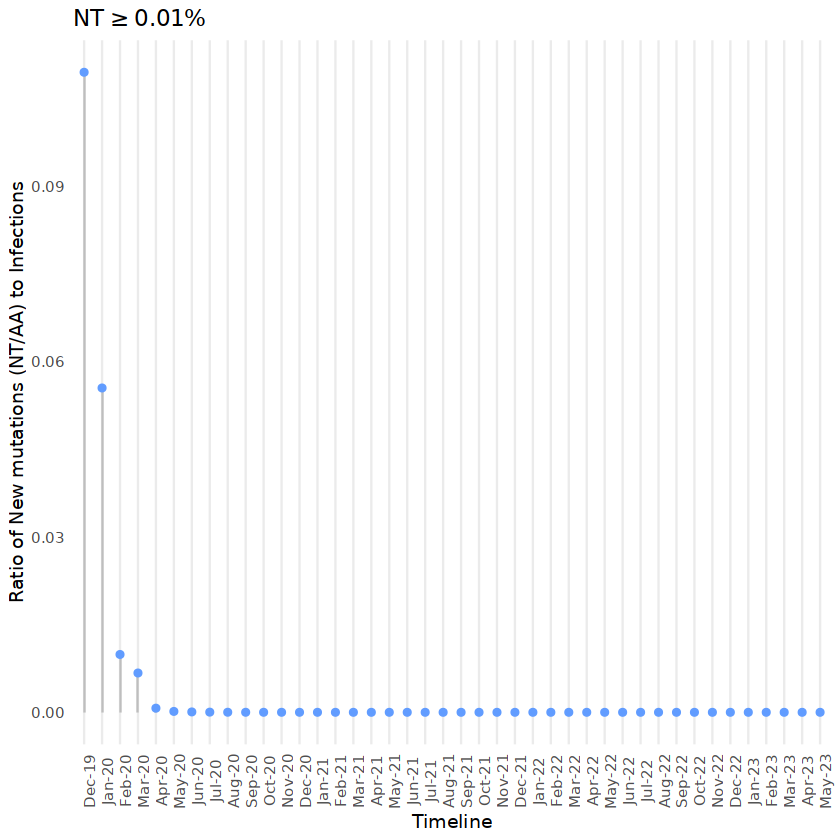

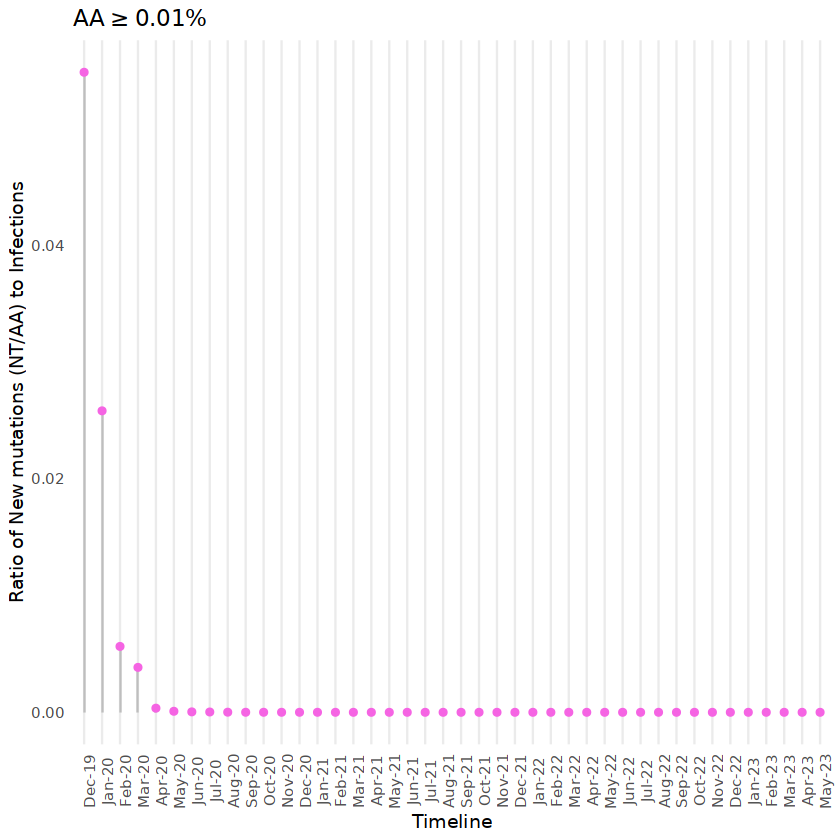

In [63]:
p2.A <- ratios |>
    pivot_longer(cols = c("NT >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%", "AA >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = monthLevels)
    ) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_point() +
    scale_color_manual(values = c("#619CFF")) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position = "none"
    ) +
    labs(x = "Timeline", y = "Ratio of New mutations (NT/AA) to Infections", title = expression("NT">="0.01%"))
p2.A

p2.B <- ratios |>
    pivot_longer(cols = c("AA >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%", "AA >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = monthLevels)
    ) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_point() +
    scale_color_manual(values = c("#F564E3")) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position = "none"
    ) +
    labs(x = "Timeline", y = "Ratio of New mutations (NT/AA) to Infections", title = expression("AA">="0.01%"))
p2.B

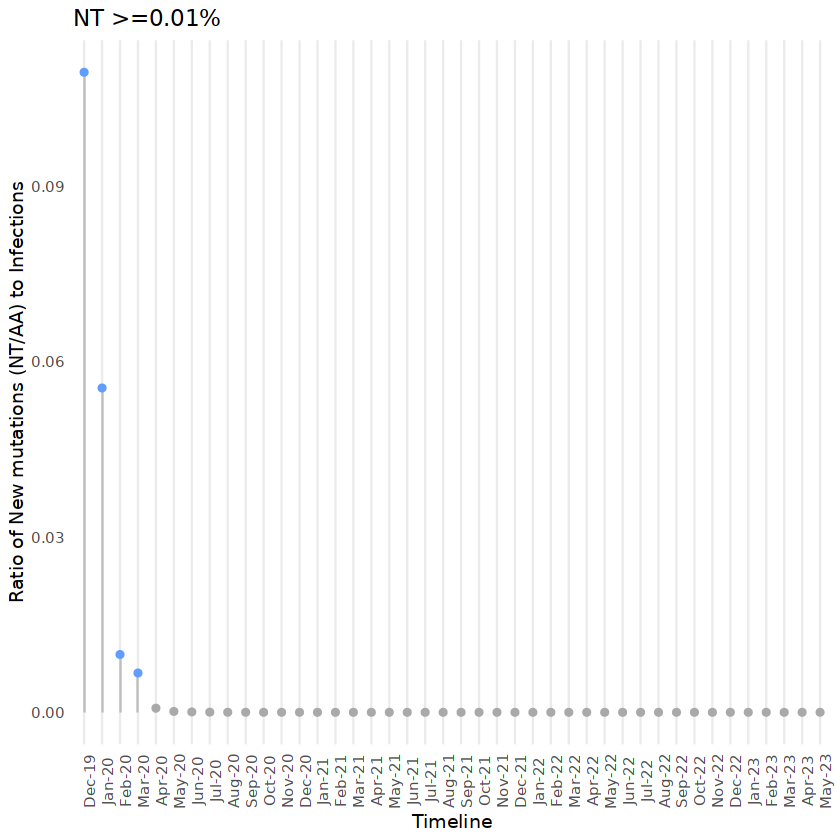

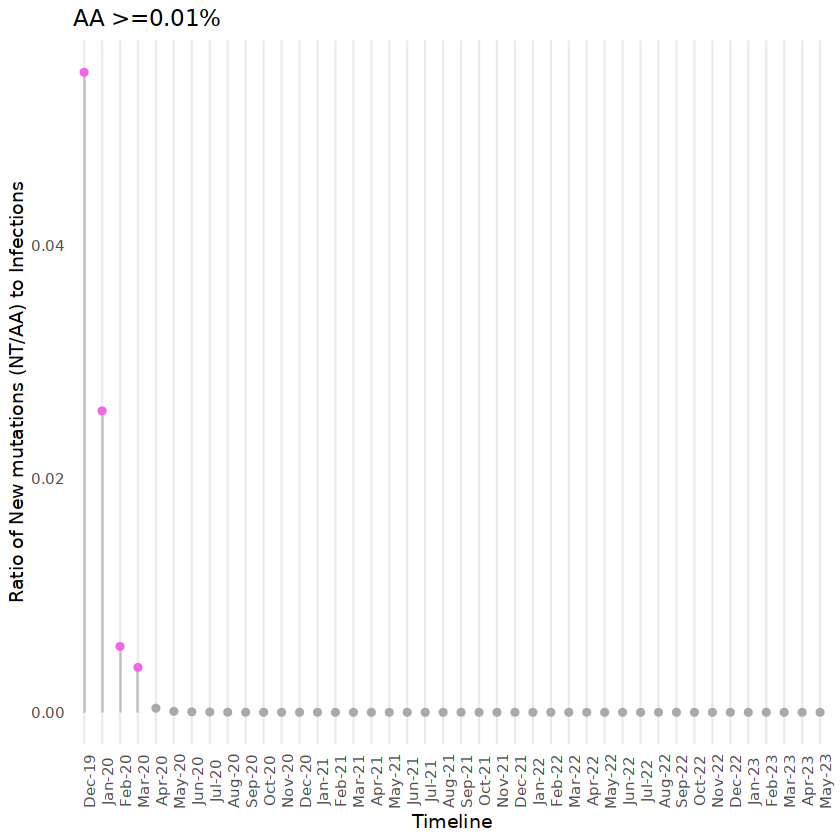

In [64]:
p2.A <- ratios |>
    pivot_longer(cols = c("NT >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = monthLevels),
        flag = ifelse(TimelineLabel %in% c("Dec-19", "Jan-20", "Feb-20", "Mar-20"), "Dec-19 to Mar-20", "Rest")
    ) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_point(aes(color = flag)) +
    # scale_color_manual(values = c("#619CFF")) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none") +
    scale_color_manual(values = c("#619CFF", "darkgrey"), guide = FALSE)  +
    labs(x = "Timeline", y = "Ratio of New mutations (NT/AA) to Infections", title = "NT >=0.01%")
p2.A

p2.B <- ratios |>
    pivot_longer(cols = c("AA >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("AA >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = monthLevels),
        flag = ifelse(TimelineLabel %in% c("Dec-19", "Jan-20", "Feb-20", "Mar-20"), "Dec-19 to Mar-20", "Rest")
    ) |>
    ggplot(aes(x = TimelineLabel, y = value, group = name, color = name) ) +
    geom_segment(aes(x = TimelineLabel, xend = TimelineLabel, y = 0, yend = value), color = "grey") +
    geom_point(aes(color = flag)) +
    # scale_color_manual(values = c("#F564E3")) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none") +
    scale_color_manual(values = c("#F564E3", "darkgrey"), guide = FALSE)  +
    labs(x = "Timeline", y = "Ratio of New mutations (NT/AA) to Infections", title = "AA >=0.01%")
p2.B

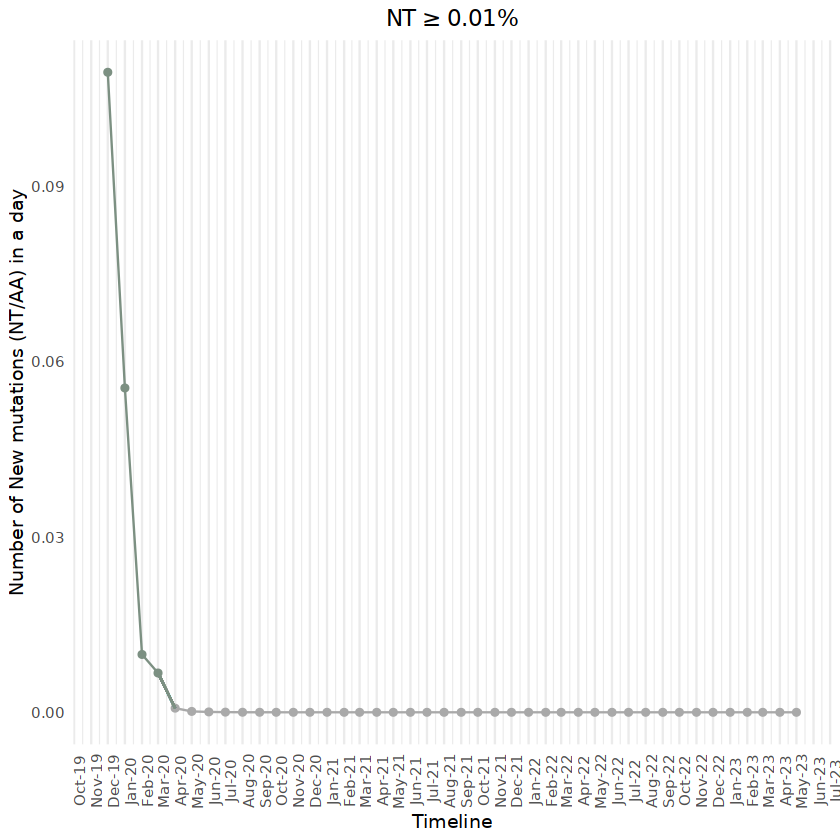

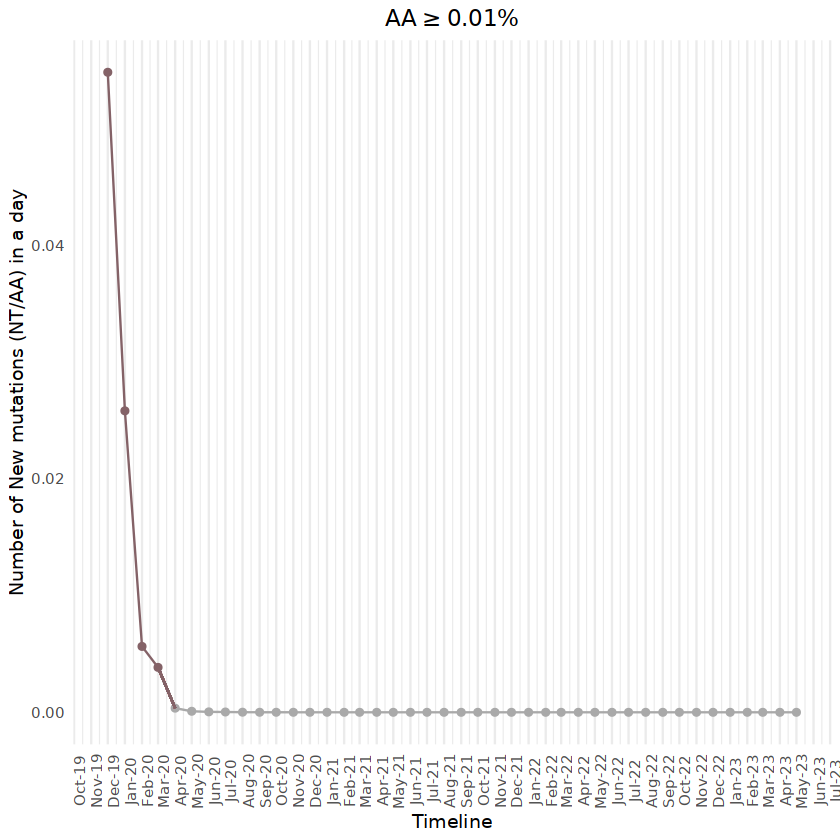

In [65]:
p2.A <- ratios |>
    pivot_longer(cols = c("NT >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = monthLevels),
        flag = ifelse(TimelineLabel %in% c("Dec-19", "Jan-20", "Feb-20", "Mar-20"), "Dec-19 to Mar-20", "Rest"),
        Timeline = as.Date(paste0("01-", TimelineLabel), format = "%d-%b-%y")
    ) |>
    arrange(Timeline) |>
    ggplot(aes(x = Timeline, y = value, group = interaction(name, flag))) +
    geom_path(aes(color = flag)) +
    geom_point(aes(color = flag)) +
    scale_color_manual(values = c(color.NT, "darkgrey"), guide = FALSE)  +
    geom_segment(aes(x = as.Date("2020-03-01"), 
                     xend = as.Date("2020-04-01"), 
                     y = filter(pivot_longer(ratios, cols = c("NT >=0.01%")), TimelineLabel == "Mar-20")[["value"]], 
                     yend = filter(pivot_longer(ratios, cols = c("NT >=0.01%")), TimelineLabel == "Apr-20")[["value"]]), 
                 color = color.NT) +
    scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none",
          plot.title = element_text(hjust = 0.5)) +
    labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a day", title = expression("NT">="0.01%"))

p2.A

p2.B <- ratios |>
    pivot_longer(cols = c("AA >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("AA >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = monthLevels),
        flag = ifelse(TimelineLabel %in% c("Dec-19", "Jan-20", "Feb-20", "Mar-20"), "Dec-19 to Mar-20", "Rest"),
        Timeline = as.Date(paste0("01-", TimelineLabel), format = "%d-%b-%y")
    ) |>
    arrange(Timeline) |>
    ggplot(aes(x = Timeline, y = value, group = interaction(name, flag))) +
    geom_path(aes(color = flag)) +
    geom_point(aes(color = flag)) +
    scale_color_manual(values = c(color.AA, "darkgrey"), guide = FALSE)  +
    geom_segment(aes(x = as.Date("2020-03-01"), 
                     xend = as.Date("2020-04-01"), 
                     y = filter(pivot_longer(ratios, cols = c("AA >=0.01%")), TimelineLabel == "Mar-20")[["value"]], 
                     yend = filter(pivot_longer(ratios, cols = c("AA >=0.01%")), TimelineLabel == "Apr-20")[["value"]]), 
                 color = color.AA) +
    scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          legend.position = "none",
          plot.title = element_text(hjust = 0.5)) +
    labs(x = "Timeline", y = "Number of New mutations (NT/AA) in a day", title = expression("AA">="0.01%"))

p2.B

In [66]:
ratios2 <- DF.lollipop |> 
    mutate(TimelineLabel = factor(TimelineLabel, levels = monthLevels)) |>
    select(TimelineLabel, py.geqpt01.total, r.geqpt01.total)
head(ratios2)
head(infections.count)

ratios2 <- merge(x = infections.count, y = ratios2, by = "TimelineLabel") |>
            mutate(
                "NT >=0.01%" = py.geqpt01.total / (newCases / 1000),
                "AA >=0.01%" = r.geqpt01.total / (newCases / 1000)
            ) |>
            select(all_of(c("TimelineLabel", "NT >=0.01%", "AA >=0.01%")))
head(ratios2)

TimelineLabel py.geqpt01.total r.geqpt01.total
1 Apr-20        1643             821            
2 Apr-21           4               3            
3 Apr-22           0               0            
4 Apr-23           0               0            
5 Aug-20          92              80            
6 Aug-21           1               2

TimelineLabel newCases
1 Apr-20         2317242
2 Apr-21        22029330
3 Apr-22        24980826
4 Apr-23         3184598
5 Aug-20         8305055
6 Aug-21        19827567

TimelineLabel NT >=0.01%   AA >=0.01%  
1 Apr-20        7.090325e-01 0.3543005003
2 Apr-21        1.815761e-04 0.0001361821
3 Apr-22        0.000000e+00 0.0000000000
4 Apr-23        0.000000e+00 0.0000000000
5 Aug-20        1.107759e-02 0.0096326876
6 Aug-21        5.043483e-05 0.0001008697

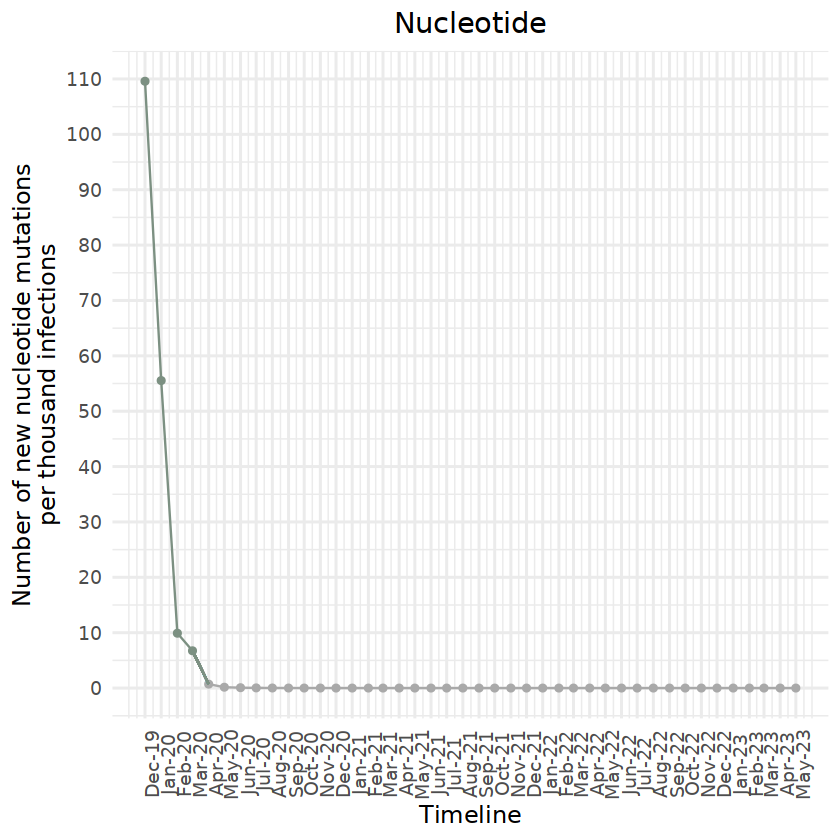

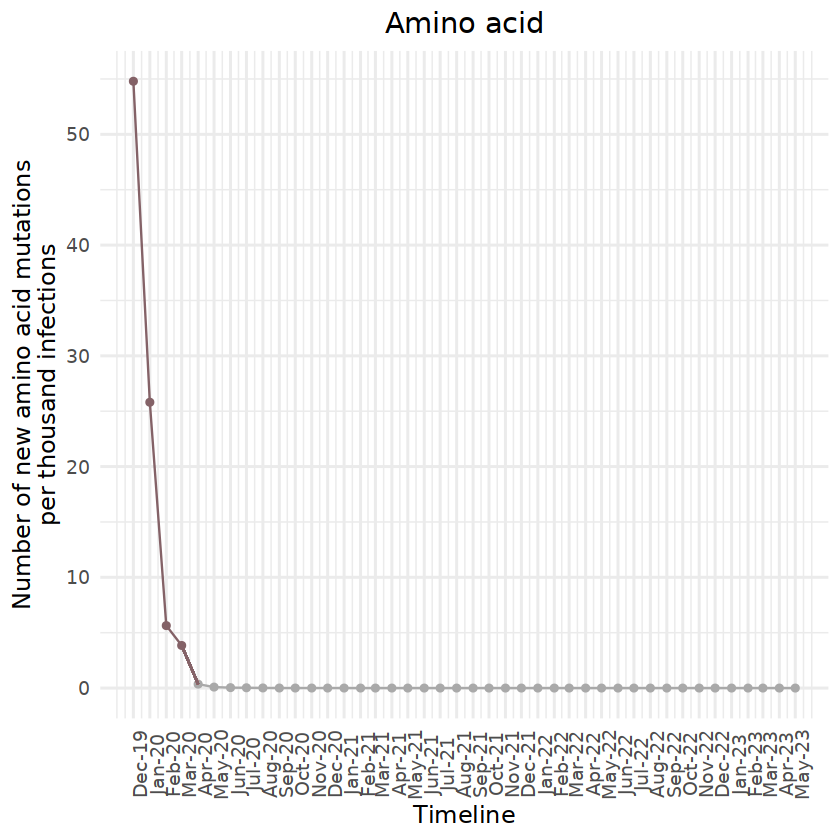

In [67]:
p2.A <- ratios2 |>
    pivot_longer(cols = c("NT >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("NT >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = monthLevels),
        flag = ifelse(TimelineLabel %in% c("Dec-19", "Jan-20", "Feb-20", "Mar-20"), "Dec-19 to Mar-20", "Rest"),
        Timeline = as.Date(paste0("01-", TimelineLabel), format = "%d-%b-%y")
    ) |>
    arrange(Timeline) |>
    ggplot(aes(x = Timeline, y = value, group = interaction(name, flag))) +
    geom_path(aes(color = flag)) +
    geom_point(aes(color = flag)) +
    scale_color_manual(values = c(color.NT, "darkgrey"), guide = FALSE)  +
    geom_segment(aes(x = as.Date("2020-03-01"), 
                     xend = as.Date("2020-04-01"), 
                     y = filter(pivot_longer(ratios2, cols = c("NT >=0.01%")), TimelineLabel == "Mar-20")[["value"]], 
                     yend = filter(pivot_longer(ratios2, cols = c("NT >=0.01%")), TimelineLabel == "Apr-20")[["value"]]), 
                 color = color.NT) +
    scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
                     date_labels = "%b-%y") +
        # scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
    theme_minimal(base_size = 14) +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(#panel.grid.minor.y = element_blank(),
          #panel.grid.major.y = element_blank(),
          legend.position = "none",
          plot.title = element_text(hjust = 0.5)) +
    labs(x = "Timeline", y = "Number of new nucleotide mutations\nper thousand infections", title = "Nucleotide") + 
    scale_y_continuous(breaks = seq(0, 120, by = 10))

p2.A

p2.B <- ratios2 |>
    pivot_longer(cols = c("AA >=0.01%")) |>
    mutate(
        name = factor(name, levels = c("AA >=0.01%")),
        TimelineLabel = factor(TimelineLabel, levels = monthLevels),
        flag = ifelse(TimelineLabel %in% c("Dec-19", "Jan-20", "Feb-20", "Mar-20"), "Dec-19 to Mar-20", "Rest"),
        Timeline = as.Date(paste0("01-", TimelineLabel), format = "%d-%b-%y")
    ) |>
    arrange(Timeline) |>
    ggplot(aes(x = Timeline, y = value, group = interaction(name, flag))) +
    geom_path(aes(color = flag)) +
    geom_point(aes(color = flag)) +
    scale_color_manual(values = c(color.AA, "darkgrey"), guide = FALSE)  +
    geom_segment(aes(x = as.Date("2020-03-01"), 
                     xend = as.Date("2020-04-01"), 
                     y = filter(pivot_longer(ratios2, cols = c("AA >=0.01%")), TimelineLabel == "Mar-20")[["value"]], 
                     yend = filter(pivot_longer(ratios2, cols = c("AA >=0.01%")), TimelineLabel == "Apr-20")[["value"]]), 
                 color = color.AA) +
    scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
                     date_labels = "%b-%y") +
        # scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
    theme_minimal(base_size = 14) +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(#panel.grid.minor.y = element_blank(),
          #panel.grid.major.y = element_blank(),
          legend.position = "none",
          plot.title = element_text(hjust = 0.5)) +
    labs(x = "Timeline", y = "Number of new amino acid mutations\nper thousand infections", title = "Amino acid") + 
    scale_y_continuous(breaks = seq(0, 100, by = 10))

p2.B

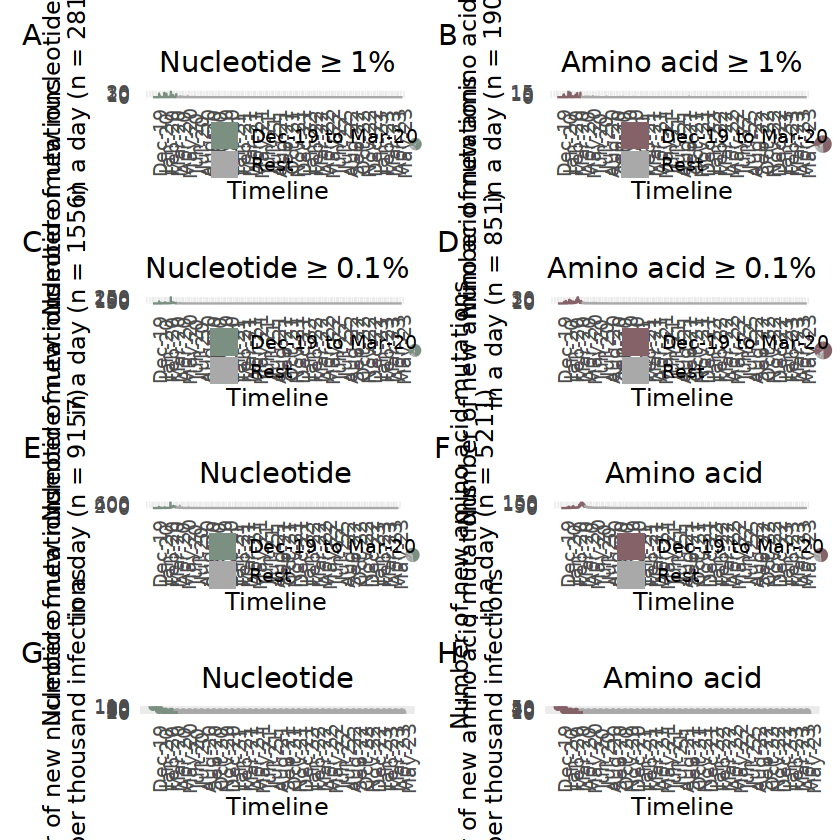

In [68]:
p.fig1 <- (p1.A | p1.B) / (p1.C | p1.D) / (p1.E | p1.F) / (p2.A | p2.B) +
    plot_annotation(tag_levels = list(c("A", "", "B", "", "C", "", "D", "", "E", "", "F", "", "G", "H")))

# # this adds annotation to the insets as well
# p.fig1 <- (p1.A | p1.B) / (p1.C | p1.D) / (p1.E | p1.F) / (p2.A | p2.B) +
#             plot_annotation(tag_levels = 'A') #+ 
# #             plot_layout(guides = 'collect') & theme(legend.position = "bottom")
p.fig1

# ggsave("./r_analysis/plots/figures/patchwork.fig1.pdf", plot = p.fig1, width = 15, height = 15)

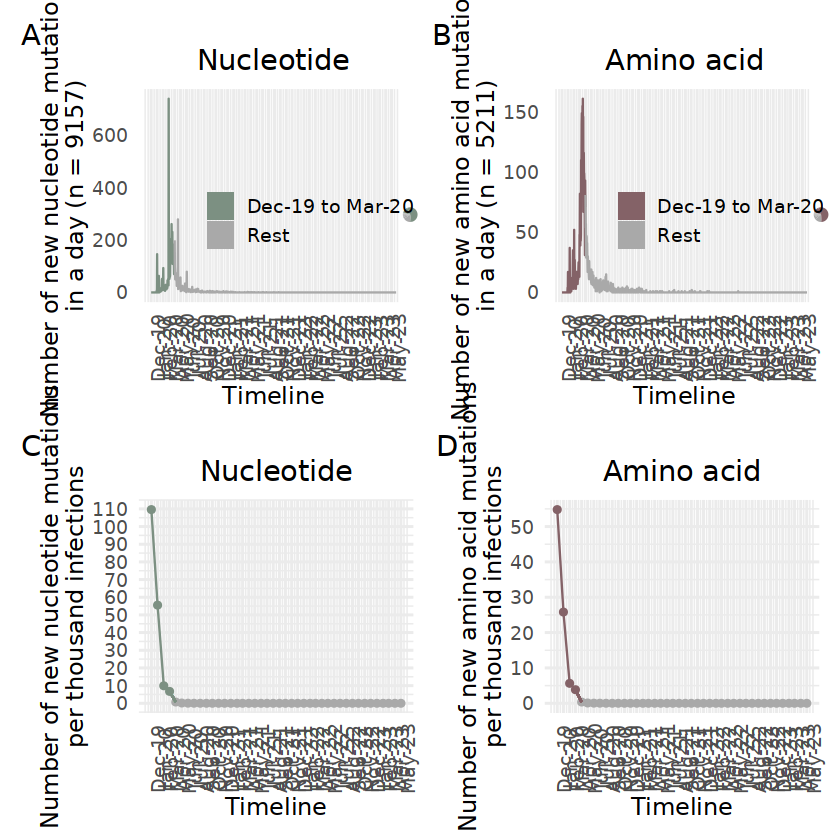

In [69]:
p.fig1 <- (p1.E | p1.F) / (p2.A | p2.B) +
    plot_annotation(tag_levels = list(c("A", "", "B", "", "C", "D")))

# # this adds annotation to the insets as well
# p.fig1 <- (p1.A | p1.B) / (p1.C | p1.D) / (p1.E | p1.F) / (p2.A | p2.B) +
#             plot_annotation(tag_levels = 'A') #+ 
# #             plot_layout(guides = 'collect') & theme(legend.position = "bottom")
p.fig1

# ggsave("./r_analysis/plots/figures/patchwork.fig1.pdf", 
#        plot = p.fig1, 
#        width = 15, 
#        height = 10)

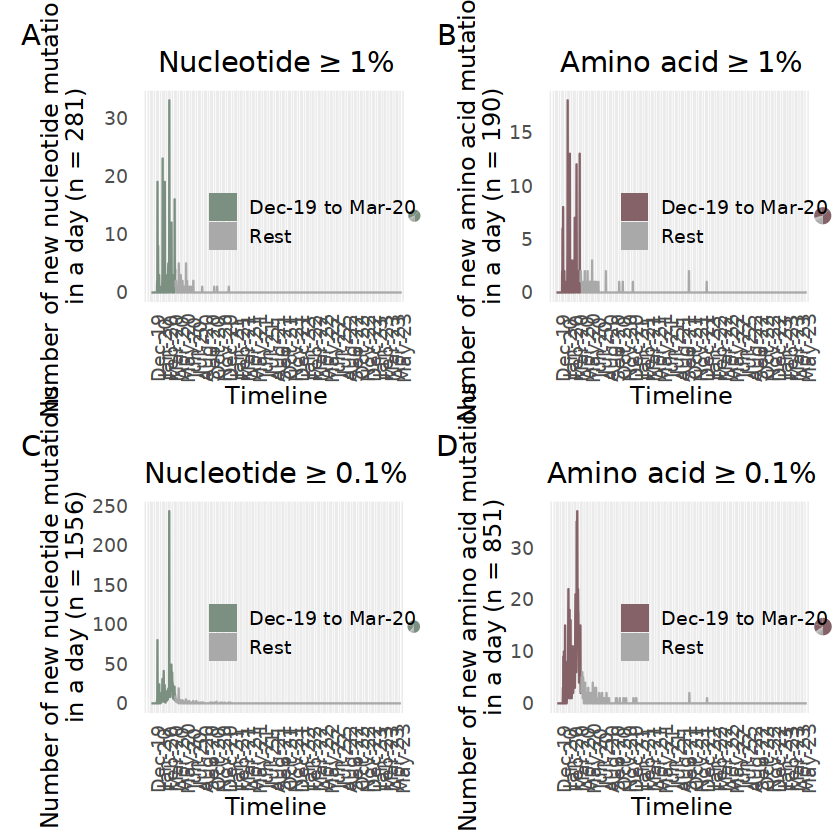

In [70]:
p.supp2 <- (p1.A | p1.B) / (p1.C | p1.D) +
    plot_annotation(tag_levels = list(c("A", "", "B", "", "C", "", "D", "")))
p.supp2

ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig2.pdf", 
       plot = p.supp2, 
       width = 16, 
       height = 16 * (2/3))

ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig2.jpeg", 
       plot = p.supp2, 
       dpi = "print",
       width = 16.5, 
       height = 16.5 * (2/3))

In [71]:
# p2p3 <- (p2 | p3) +
#             plot_annotation(tag_levels = 'A') # +
#             # plot_layout(widths = c(1, 1.25))

# p.fig1 <- (p1 / p2p3) + 
#     plot_annotation(tag_levels = 'A') +
#     plot_layout(heights = c(3, 2))

# p.fig1

# ggsave("./r_analysis/plots/figures/patchwork.fig1.pdf", plot = p.fig1, width = 12, height = 10)

In [72]:
# p2p3 <- (p2 | p3) +
#             plot_annotation(tag_levels = 'A') +
#             plot_layout(widths = c(2, 1))
# p2p3

# p.fig1 <- p1 / p2p3 + 
#     plot_annotation(tag_levels = 'A') +
#     plot_layout(heights = c(1, 2))

# p.fig1

# ggsave("./r_analysis/plots/figures/patchwork.fig1.pdf", plot = p.fig1, width = 18, height = 18)

### Scatter plot: collection_date vs per_abundance

#### scatter AA

In [73]:
DF.subs.geqpt01 <- read_csv("/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.subs.geqpt01.csv") |> 
    select(-"...1")
DF.subs.geqpt01

DF.subs.top100 <- read_csv("/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.subs.top100.csv") |> 
    select(-"...1")
DF.subs.top100

DF.aa.subs.geqpt01 <- read_csv("/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.subs.geqpt01.csv") |> 
    select(-"...1")
DF.aa.subs.geqpt01

DF.aa.subs.top100 <- read_csv("/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.subs.top100.csv") |> 
    select(-"...1")
DF.aa.subs.top100

New names:
* `` -> `...1`
Rows: 5211 Columns: 17
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


aa_subs     collection_date accession_id    
1    E_A41V      2020-04-07      EPI_ISL_442779  
2    E_D72G      2020-03-06      EPI_ISL_644684  
3    E_F26L      2020-04-04      EPI_ISL_450174  
4    E_L18I      2020-12-28      EPI_ISL_6699035 
5    E_L21F      2020-03-03      EPI_ISL_542279  
6    E_L21V      2020-09-02      EPI_ISL_2321501 
7    E_L51I      2020-08-25      EPI_ISL_8904553 
8    E_L73F      2020-03-01      EPI_ISL_2758212 
9    E_P71L      2020-02-18      EPI_ISL_10980369
10   E_P71S      2020-03-15      EPI_ISL_660339  
11   E_R61C      2020-03-24      EPI_ISL_480036  
12   E_R61L      2020-03-20      EPI_ISL_10716749
13   E_S50G      2020-03-15      EPI_ISL_499765  
14   E_S55F      2020-03-20      EPI_ISL_17578145
15   E_S68F      2020-01-01      EPI_ISL_3804266 
16   E_T11A      2020-04-21      EPI_ISL_644275  
17   E_T9I       2020-01-27      EPI_ISL_17121378
18   E_V24L      2020-03-20      EPI_ISL_10716749
19   E_V24M      2020-03-14      EPI_ISL_604556  
20   E_V49L      2020-03-15      EPI_ISL_572166  
21   E_V58F      2020-03-12      EPI_ISL_474925  
22   E_V58I      2020-05-02      EPI_ISL_2790003 
23   E_V5I       2020-04-12      EPI_ISL_1311716 
24   E_V62F      2020-03-18      EPI_ISL_422854  
25   M_A104V     2020-03-26      EPI_ISL_421787  
26   M_A142V     2020-03-17      EPI_ISL_604474  
27   M_A2S       2020-01-29      EPI_ISL_430722  
28   M_A2T       2020-03-16      EPI_ISL_831975  
29   M_A2V       2020-03-08      EPI_ISL_537861  
30   M_A38S      2020-03-28      EPI_ISL_605080  
...  ...         ...             ...             
5182 Spike_V90F  2020-03-01      EPI_ISL_417217  
5183 Spike_V90I  2020-07-28      EPI_ISL_1855410 
5184 Spike_W152C 2020-01-26      EPI_ISL_7946128 
5185 Spike_W152L 2020-01-14      EPI_ISL_2716627 
5186 Spike_W152R 2020-03-24      EPI_ISL_457761  
5187 Spike_W258L 2020-03-07      EPI_ISL_15026408
5188 Spike_W258R 2020-04-03      EPI_ISL_778698  
5189 Spike_W64L  2020-03-23      EPI_ISL_819307  
5190 Spike_W64R  2020-03-30      EPI_ISL_489039  
5191 Spike_Y144F 2020-03-29      EPI_ISL_481644  
5192 Spike_Y144L 2020-04-01      EPI_ISL_763351  
5193 Spike_Y144S 2020-04-24      EPI_ISL_648638  
5194 Spike_Y145D 2020-09-20      EPI_ISL_1018299 
5195 Spike_Y145H 2020-03-13      EPI_ISL_571985  
5196 Spike_Y145N 2020-05-07      EPI_ISL_13597012
5197 Spike_Y145P 2020-04-01      EPI_ISL_763351  
5198 Spike_Y145S 2020-11-30      EPI_ISL_1896112 
5199 Spike_Y145T 2020-03-01      EPI_ISL_464255  
5200 Spike_Y160F 2021-02-05      EPI_ISL_1503060 
5201 Spike_Y200C 2020-05-04      EPI_ISL_481046  
5202 Spike_Y248D 2020-04-05      EPI_ISL_1166095 
5203 Spike_Y248H 2020-03-14      EPI_ISL_17578063
5204 Spike_Y248N 2020-08-08      EPI_ISL_16941578
5205 Spike_Y248S 2020-03-27      EPI_ISL_420726  
5206 Spike_Y28H  2020-02-07      EPI_ISL_582609  
5207 Spike_Y449H 2020-08-21      EPI_ISL_1731545 
5208 Spike_Y449N 2020-03-14      EPI_ISL_417919  
5209 Spike_Y453F 2020-06-07      EPI_ISL_8194874 
5210 Spike_Y505H 2020-03-28      EPI_ISL_12269393
5211 Spike_Y508H 2020-03-05      EPI_ISL_416507  
     location                                         counts  region
1    Europe/United Kingdom/England                       2426 E     
2    Europe/France/Occitanie/Montpellier                15706 E     
3    North America/USA/Louisiana/New Orleans             1278 E     
4    North America/USA/Nebraska                          1782 E     
5    Europe/Italy/Lombardy                              10281 E     
6    North America/USA/Georgia                           2052 E     
7    Europe/Russia/Saint-Petersburg/Saint-Petersburg     1171 E     
8    Asia/India                                          8315 E     
9    Africa/Zambia/Choma/Macha                          39114 E     
10   Europe/France/Auvergne-Rhone-Alpes/Saint-Etienne    8437 E     
11   Asia/Japan/Kanto                                    1374 E     
12   Asia/India/Chhattisgarh/Raipur                      5087 E     
13   Eur

New names:
* `` -> `...1`
Rows: 100 Columns: 17
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


aa_subs      collection_date accession_id    
1   Spike_D614G  2020-01-01      EPI_ISL_4405694 
2   NSP12_P323L  2020-01-01      EPI_ISL_4405694 
3   Spike_T478K  2020-03-12      EPI_ISL_6661895 
4   NSP4_T492I   2020-01-27      EPI_ISL_17121378
5   Spike_G142D  2020-03-03      EPI_ISL_2758215 
6   N_R203K      2020-01-09      EPI_ISL_2671842 
7   N_G204R      2020-01-09      EPI_ISL_2671842 
8   Spike_P681H  2020-01-01      EPI_ISL_3804266 
9   Spike_N501Y  2020-02-07      EPI_ISL_1603195 
10  Spike_H655Y  2020-01-27      EPI_ISL_17121378
11  Spike_L452R  2020-01-26      EPI_ISL_7946128 
12  Spike_N969K  2020-01-27      EPI_ISL_17121378
13  N_P13L       2020-01-27      EPI_ISL_17121378
14  Spike_N679K  2020-03-18      EPI_ISL_421580  
15  Spike_Q954H  2020-01-27      EPI_ISL_17121378
16  Spike_D796Y  2020-01-27      EPI_ISL_17121378
17  NSP5_P132H   2020-01-27      EPI_ISL_17121378
18  M_A63T       2020-01-27      EPI_ISL_17121378
19  E_T9I        2020-01-27      EPI_ISL_17121378
20  NSP14_I42V   2020-01-27      EPI_ISL_17121378
21  Spike_S477N  2020-01-10      EPI_ISL_8317205 
22  Spike_N764K  2020-01-27      EPI_ISL_17121378
23  M_Q19E       2020-01-27      EPI_ISL_17121378
24  Spike_E484A  2020-03-03      EPI_ISL_578200  
25  Spike_S373P  2020-03-28      EPI_ISL_12269393
26  Spike_S375F  2020-03-28      EPI_ISL_12269393
27  Spike_Y505H  2020-03-28      EPI_ISL_12269393
28  Spike_Q498R  2020-03-28      EPI_ISL_12269393
29  Spike_G339D  2020-03-05      EPI_ISL_420138  
30  Spike_K417N  2020-02-18      EPI_ISL_10980369
... ...          ...             ...             
71  NSP4_L438F   2020-03-13      EPI_ISL_430895  
72  NSP6_I189V   2020-01-27      EPI_ISL_17121378
73  Spike_T547K  2020-01-27      EPI_ISL_17121378
74  NSP3_A1892T  2020-01-27      EPI_ISL_17121378
75  Spike_N856K  2020-01-25      EPI_ISL_493155  
76  Spike_L981F  2020-01-27      EPI_ISL_17121378
77  Spike_A67V   2020-03-12      EPI_ISL_779718  
78  NSP3_L1266I  2020-01-27      EPI_ISL_17121378
79  NSP3_K38R    2020-01-27      EPI_ISL_17121378
80  M_D3G        2020-02-19      EPI_ISL_6951243 
81  Spike_G446S  2020-04-04      EPI_ISL_440772  
82  Spike_L212I  2020-04-02      EPI_ISL_433695  
83  Spike_G496S  2020-05-30      EPI_ISL_13597467
84  Spike_S371L  2020-05-30      EPI_ISL_13597467
85  Spike_F486V  2020-03-31      EPI_ISL_14471084
86  M_D3N        2020-03-31      EPI_ISL_14471084
87  NS8_Q27stop  2020-02-07      EPI_ISL_1603195 
88  NSP3_T183I   2020-02-07      EPI_ISL_1603195 
89  Spike_T716I  2020-02-07      EPI_ISL_1603195 
90  NS8_R52I     2020-02-07      EPI_ISL_1603195 
91  Spike_A570D  2020-02-07      EPI_ISL_1603195 
92  NSP3_A890D   2020-03-15      EPI_ISL_2103488 
93  N_S235F      2020-02-07      EPI_ISL_1603195 
94  Spike_S982A  2020-02-07      EPI_ISL_1603195 
95  Spike_D1118H 2020-02-07      EPI_ISL_1603195 
96  NS8_Y73C     2020-02-07      EPI_ISL_1603195 
97  NSP3_I1412T  2020-02-07      EPI_ISL_1603195 
98  N_D3L        2020-02-07      EPI_ISL_1603195 
99  Spike_R346K  2020-03-23      EPI_ISL_15026478
100 NSP3_A1711V  2020-03-12      EPI_ISL_465061  
    location                                                          counts  
1   South America/Argentina/Buenos Aires/Exaltaci<U+00F3>n de la Cruz 11551573
2   South America/Argentina/Buenos Aires/Exaltaci<U+00F3>n de la Cruz 11513173
3   North America/USA/New York/Westchester County                      9024745
4   North America/USA/Oklahoma/Oklahoma City                           8993496
5   Asia/India                                                         7847034
6   Asia/Japan/Tokyo                                                   6758704
7   Asia/Japan/Tokyo                                                   6691624
8   Africa/Niger/Niamey                                                6555302
9   Europe/Spain/Castilla y Leon                                       6279437
10  North America/USA/Oklahoma/Oklahoma City                           5601471
11  North America/USA/California/Sa

New names:
* `` -> `...1`
Rows: 5211 Columns: 17
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


aa_subs     collection_date accession_id    
1    E_A41V      2020-04-07      EPI_ISL_442779  
2    E_D72G      2020-03-06      EPI_ISL_644684  
3    E_F26L      2020-04-04      EPI_ISL_450174  
4    E_L18I      2020-12-28      EPI_ISL_6699035 
5    E_L21F      2020-03-03      EPI_ISL_542279  
6    E_L21V      2020-09-02      EPI_ISL_2321501 
7    E_L51I      2020-08-25      EPI_ISL_8904553 
8    E_L73F      2020-03-01      EPI_ISL_2758212 
9    E_P71L      2020-02-18      EPI_ISL_10980369
10   E_P71S      2020-03-15      EPI_ISL_660339  
11   E_R61C      2020-03-24      EPI_ISL_480036  
12   E_R61L      2020-03-20      EPI_ISL_10716749
13   E_S50G      2020-03-15      EPI_ISL_499765  
14   E_S55F      2020-03-20      EPI_ISL_17578145
15   E_S68F      2020-01-01      EPI_ISL_3804266 
16   E_T11A      2020-04-21      EPI_ISL_644275  
17   E_T9I       2020-01-27      EPI_ISL_17121378
18   E_V24L      2020-03-20      EPI_ISL_10716749
19   E_V24M      2020-03-14      EPI_ISL_604556  
20   E_V49L      2020-03-15      EPI_ISL_572166  
21   E_V58F      2020-03-12      EPI_ISL_474925  
22   E_V58I      2020-05-02      EPI_ISL_2790003 
23   E_V5I       2020-04-12      EPI_ISL_1311716 
24   E_V62F      2020-03-18      EPI_ISL_422854  
25   M_A104V     2020-03-26      EPI_ISL_421787  
26   M_A142V     2020-03-17      EPI_ISL_604474  
27   M_A2S       2020-01-29      EPI_ISL_430722  
28   M_A2T       2020-03-16      EPI_ISL_831975  
29   M_A2V       2020-03-08      EPI_ISL_537861  
30   M_A38S      2020-03-28      EPI_ISL_605080  
...  ...         ...             ...             
5182 Spike_V90F  2020-03-01      EPI_ISL_417217  
5183 Spike_V90I  2020-07-28      EPI_ISL_1855410 
5184 Spike_W152C 2020-01-26      EPI_ISL_7946128 
5185 Spike_W152L 2020-01-14      EPI_ISL_2716627 
5186 Spike_W152R 2020-03-24      EPI_ISL_457761  
5187 Spike_W258L 2020-03-07      EPI_ISL_15026408
5188 Spike_W258R 2020-04-03      EPI_ISL_778698  
5189 Spike_W64L  2020-03-23      EPI_ISL_819307  
5190 Spike_W64R  2020-03-30      EPI_ISL_489039  
5191 Spike_Y144F 2020-03-29      EPI_ISL_481644  
5192 Spike_Y144L 2020-04-01      EPI_ISL_763351  
5193 Spike_Y144S 2020-04-24      EPI_ISL_648638  
5194 Spike_Y145D 2020-09-20      EPI_ISL_1018299 
5195 Spike_Y145H 2020-03-13      EPI_ISL_571985  
5196 Spike_Y145N 2020-05-07      EPI_ISL_13597012
5197 Spike_Y145P 2020-04-01      EPI_ISL_763351  
5198 Spike_Y145S 2020-11-30      EPI_ISL_1896112 
5199 Spike_Y145T 2020-03-01      EPI_ISL_464255  
5200 Spike_Y160F 2021-02-05      EPI_ISL_1503060 
5201 Spike_Y200C 2020-05-04      EPI_ISL_481046  
5202 Spike_Y248D 2020-04-05      EPI_ISL_1166095 
5203 Spike_Y248H 2020-03-14      EPI_ISL_17578063
5204 Spike_Y248N 2020-08-08      EPI_ISL_16941578
5205 Spike_Y248S 2020-03-27      EPI_ISL_420726  
5206 Spike_Y28H  2020-02-07      EPI_ISL_582609  
5207 Spike_Y449H 2020-08-21      EPI_ISL_1731545 
5208 Spike_Y449N 2020-03-14      EPI_ISL_417919  
5209 Spike_Y453F 2020-06-07      EPI_ISL_8194874 
5210 Spike_Y505H 2020-03-28      EPI_ISL_12269393
5211 Spike_Y508H 2020-03-05      EPI_ISL_416507  
     location                                         counts  region
1    Europe/United Kingdom/England                       2426 E     
2    Europe/France/Occitanie/Montpellier                15706 E     
3    North America/USA/Louisiana/New Orleans             1278 E     
4    North America/USA/Nebraska                          1782 E     
5    Europe/Italy/Lombardy                              10281 E     
6    North America/USA/Georgia                           2052 E     
7    Europe/Russia/Saint-Petersburg/Saint-Petersburg     1171 E     
8    Asia/India                                          8315 E     
9    Africa/Zambia/Choma/Macha                          39114 E     
10   Europe/France/Auvergne-Rhone-Alpes/Saint-Etienne    8437 E     
11   Asia/Japan/Kanto                                    1374 E     
12   Asia/India/Chhattisgarh/Raipur                      5087 E     
13   Eur

New names:
* `` -> `...1`
Rows: 100 Columns: 17
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


aa_subs      collection_date accession_id    
1   Spike_D614G  2020-01-01      EPI_ISL_4405694 
2   NSP12_P323L  2020-01-01      EPI_ISL_4405694 
3   Spike_T478K  2020-03-12      EPI_ISL_6661895 
4   NSP4_T492I   2020-01-27      EPI_ISL_17121378
5   Spike_G142D  2020-03-03      EPI_ISL_2758215 
6   N_R203K      2020-01-09      EPI_ISL_2671842 
7   N_G204R      2020-01-09      EPI_ISL_2671842 
8   Spike_P681H  2020-01-01      EPI_ISL_3804266 
9   Spike_N501Y  2020-02-07      EPI_ISL_1603195 
10  Spike_H655Y  2020-01-27      EPI_ISL_17121378
11  Spike_L452R  2020-01-26      EPI_ISL_7946128 
12  Spike_N969K  2020-01-27      EPI_ISL_17121378
13  N_P13L       2020-01-27      EPI_ISL_17121378
14  Spike_N679K  2020-03-18      EPI_ISL_421580  
15  Spike_Q954H  2020-01-27      EPI_ISL_17121378
16  Spike_D796Y  2020-01-27      EPI_ISL_17121378
17  NSP5_P132H   2020-01-27      EPI_ISL_17121378
18  M_A63T       2020-01-27      EPI_ISL_17121378
19  E_T9I        2020-01-27      EPI_ISL_17121378
20  NSP14_I42V   2020-01-27      EPI_ISL_17121378
21  Spike_S477N  2020-01-10      EPI_ISL_8317205 
22  Spike_N764K  2020-01-27      EPI_ISL_17121378
23  M_Q19E       2020-01-27      EPI_ISL_17121378
24  Spike_E484A  2020-03-03      EPI_ISL_578200  
25  Spike_S373P  2020-03-28      EPI_ISL_12269393
26  Spike_S375F  2020-03-28      EPI_ISL_12269393
27  Spike_Y505H  2020-03-28      EPI_ISL_12269393
28  Spike_Q498R  2020-03-28      EPI_ISL_12269393
29  Spike_G339D  2020-03-05      EPI_ISL_420138  
30  Spike_K417N  2020-02-18      EPI_ISL_10980369
... ...          ...             ...             
71  NSP4_L438F   2020-03-13      EPI_ISL_430895  
72  NSP6_I189V   2020-01-27      EPI_ISL_17121378
73  Spike_T547K  2020-01-27      EPI_ISL_17121378
74  NSP3_A1892T  2020-01-27      EPI_ISL_17121378
75  Spike_N856K  2020-01-25      EPI_ISL_493155  
76  Spike_L981F  2020-01-27      EPI_ISL_17121378
77  Spike_A67V   2020-03-12      EPI_ISL_779718  
78  NSP3_L1266I  2020-01-27      EPI_ISL_17121378
79  NSP3_K38R    2020-01-27      EPI_ISL_17121378
80  M_D3G        2020-02-19      EPI_ISL_6951243 
81  Spike_G446S  2020-04-04      EPI_ISL_440772  
82  Spike_L212I  2020-04-02      EPI_ISL_433695  
83  Spike_G496S  2020-05-30      EPI_ISL_13597467
84  Spike_S371L  2020-05-30      EPI_ISL_13597467
85  Spike_F486V  2020-03-31      EPI_ISL_14471084
86  M_D3N        2020-03-31      EPI_ISL_14471084
87  NS8_Q27stop  2020-02-07      EPI_ISL_1603195 
88  NSP3_T183I   2020-02-07      EPI_ISL_1603195 
89  Spike_T716I  2020-02-07      EPI_ISL_1603195 
90  NS8_R52I     2020-02-07      EPI_ISL_1603195 
91  Spike_A570D  2020-02-07      EPI_ISL_1603195 
92  NSP3_A890D   2020-03-15      EPI_ISL_2103488 
93  N_S235F      2020-02-07      EPI_ISL_1603195 
94  Spike_S982A  2020-02-07      EPI_ISL_1603195 
95  Spike_D1118H 2020-02-07      EPI_ISL_1603195 
96  NS8_Y73C     2020-02-07      EPI_ISL_1603195 
97  NSP3_I1412T  2020-02-07      EPI_ISL_1603195 
98  N_D3L        2020-02-07      EPI_ISL_1603195 
99  Spike_R346K  2020-03-23      EPI_ISL_15026478
100 NSP3_A1711V  2020-03-12      EPI_ISL_465061  
    location                                                          counts  
1   South America/Argentina/Buenos Aires/Exaltaci<U+00F3>n de la Cruz 11551573
2   South America/Argentina/Buenos Aires/Exaltaci<U+00F3>n de la Cruz 11513173
3   North America/USA/New York/Westchester County                      9024745
4   North America/USA/Oklahoma/Oklahoma City                           8993496
5   Asia/India                                                         7847034
6   Asia/Japan/Tokyo                                                   6758704
7   Asia/Japan/Tokyo                                                   6691624
8   Africa/Niger/Niamey                                                6555302
9   Europe/Spain/Castilla y Leon                                       6279437
10  North America/USA/Oklahoma/Oklahoma City                           5601471
11  North America/USA/California/Sa

[1] "running..."


[1] "(0.01,0.1]" "(0.1,1]"    "(1,10]"     "(10,100]"

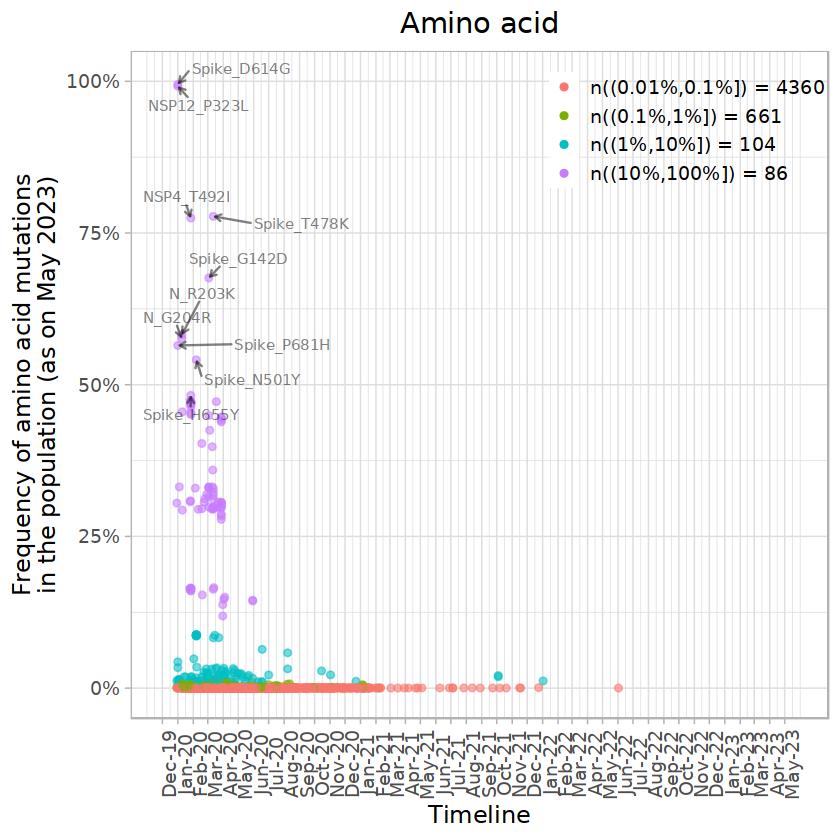

In [74]:
print("running...")
# reference: ggplot2.tidyverse.org/reference/labs.html

plotDF.scatterAA <- DF.aa.subs.geqpt01
plotDF.scatterAA$bins <- cut(x = plotDF.scatterAA$per_abundance, breaks = c(0.01, 0.1, 1, 10, 100))

levels(plotDF.scatterAA$bins)

countDF <- plotDF.scatterAA %>%
    group_by(bins) %>%
    summarise(Count = n())

# A basic scatterplot with color depending on Species
p.scatterAA <- ggplot(plotDF.scatterAA, aes(x = collection_date, y = per_abundance, color = bins, alpha = 0.05)) + 
    geom_point() + # , colour = "black", pch = 21 # , size = 2
    theme_light(base_size = 14) +
    ggtitle("Amino acid") +
    scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")),
                 date_labels = "%b-%y",
                 limits = c(startDate, endDate)) +
    # scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month", limits = c(startDate, endDate))), 
    #                  date_labels = "%b-%y") +
    # scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
    # scale_x_date(date_breaks = "1 month", 
    #              date_labels = "%b %d, %Y",
    #              limits = c(startDate, endDate)) +
    # scale_x_date(date_breaks = "1 week", date_labels =  "%b %d, %Y") +
    theme(axis.text.x = element_text(angle = 90)) +
    ggrepel::geom_text_repel(
        aes(label = aa_subs), 
        data = filter(plotDF.scatterAA, aa_subs %in% head(x = DF.aa.subs.top100$aa_subs, n = 10)),
        # family = "Poppins",
        size = 3,
        min.segment.length = 0, 
        seed = 42, 
        box.padding = 0.5,
        max.overlaps = Inf,
        arrow = arrow(length = unit(0.010, "npc")),
        nudge_x = .15,
        nudge_y = .5,
        color = "grey10"
    ) +
    guides(colour = guide_legend(override.aes = list(alpha = 1)), alpha = "none") +
    scale_color_discrete(breaks = levels(countDF$bins), 
                         labels = paste0("n(", 
                                         gsub("([0-9.]+)","\\1%", levels(countDF$bins)), 
                                         ") = ", 
                                         countDF$Count)) +
    theme(
        plot.title = element_text(hjust = 0.5),
        legend.position = c(1, 1),
        legend.justification = c("right", "top"),
        legend.box.just = "right",
        legend.title = element_blank(),
        legend.margin = margin(6, 6, 6, 6),
        legend.background = element_rect(fill = "transparent") , #transparent legend bg
#         legend.box.background = element_rect(fill='transparent') #transparent legend panel
    ) +
    labs(x = "Timeline", y = "Frequency of amino acid mutations\nin the population (as on May 2023)") +
    scale_y_continuous(labels = function(x) paste0(x, "%"))
p.scatterAA
                       
# ggsave("./r_analysis/plots/figures/scatterAA.pdf", plot = p.scatterAA, width = 10, height = 4)

#### scatter NT

In [75]:
DF.nt.subs.geqpt01 <- read_csv(file = "./Supplementary Files/subs_only/subs_pt01per.csv")
dim(DF.nt.subs.geqpt01)

DF.nt.subs.top100 <- read_csv(file = "./Supplementary Files/subs_only/subs_1per.csv") |>
    top_n(n = 100, wt = per_abundance)
dim(DF.nt.subs.top100)

Rows: 9157 Columns: 10
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): mutation_name, mutation_str, ref, alt
dbl  (5): pos, count_of_seqs, fraction, fraction_corrected, per_abundance
date (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 9157   10

Rows: 281 Columns: 10
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): mutation_name, mutation_str, ref, alt
dbl  (5): pos, count_of_seqs, fraction, fraction_corrected, per_abundance
date (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 100  10

[1] "running..."


[1] "(0.01,0.1]" "(0.1,1]"    "(1,10]"     "(10,100]"

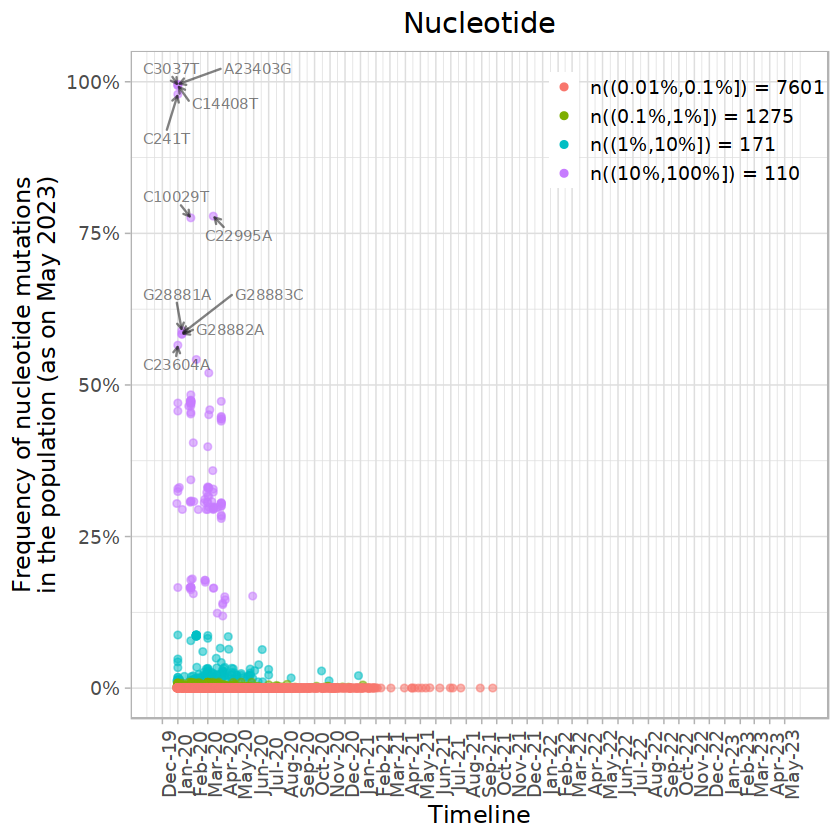

In [76]:
print("running...")
# reference: ggplot2.tidyverse.org/reference/labs.html

plotDF.scatterNT <- DF.nt.subs.geqpt01
plotDF.scatterNT$bins <- cut(x = plotDF.scatterNT$per_abundance, breaks = c(0.01, 0.1, 1, 10, 100))

levels(plotDF.scatterNT$bins)

countDF <- plotDF.scatterNT %>%
    group_by(bins) %>%
    summarise(Count = n())

# A basic scatterplot with color depending on Species
p.scatterNT <- ggplot(plotDF.scatterNT, aes(x = collection_date, y = per_abundance, color = bins, alpha = 0.05)) + 
    geom_point() + # , colour = "black", pch = 21 # , size = 2
    theme_light(base_size = 14) +
    ggtitle("Nucleotide") +
    scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")),
                 date_labels = "%b-%y",
                 limits = c(startDate, endDate)) +
    # scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
    #                  date_labels = "%b-%y") +
    # scale_x_date(date_breaks = "1 month", 
    #              date_labels = "%b %d, %Y",
    #              limits = as.Date(c('2019-12-01','2023-05-31'))) +
    # scale_x_date(date_breaks = "1 week", date_labels =  "%b %d, %Y") +
    theme(axis.text.x = element_text(angle = 90)) +
    ggrepel::geom_text_repel(
        aes(label = mutation_name), 
        data = filter(plotDF.scatterNT, mutation_name %in% head(x = DF.nt.subs.top100$mutation_name, n = 10)),
        # family = "Poppins",
        size = 3,
        min.segment.length = 0, 
        seed = 42, 
        box.padding = 0.5,
        max.overlaps = Inf,
        arrow = arrow(length = unit(0.010, "npc")),
        nudge_x = .15,
        nudge_y = .5,
        color = "grey10"
    ) +
    guides(colour = guide_legend(override.aes = list(alpha = 1)), alpha = "none") +
    scale_color_discrete(breaks = levels(countDF$bins), 
                         labels = paste0("n(", 
                                         gsub("([0-9.]+)","\\1%", levels(countDF$bins)), 
                                         ") = ", 
                                         countDF$Count)) +
    theme(
        plot.title = element_text(hjust = 0.5),
        legend.position = c(1, 1),
        legend.justification = c("right", "top"),
        legend.box.just = "right",
        legend.title = element_blank(),
        legend.margin = margin(6, 6, 6, 6),
        # legend.text=element_text(size=rel(1)),
        legend.background = element_rect(fill = "transparent") , #transparent legend bg
#         legend.box.background = element_rect(fill='transparent') #transparent legend panel
    ) +
    labs(x = "Timeline", y = "Frequency of nucleotide mutations\nin the population (as on May 2023)") +
    scale_y_continuous(labels = function(x) paste0(x, "%"))
p.scatterNT
                       
# ggsave("./r_analysis/plots/figures/scatterNT.pdf", plot = p.scatterNT, width = 10, height = 4)

## Patchwork (Panel 1)

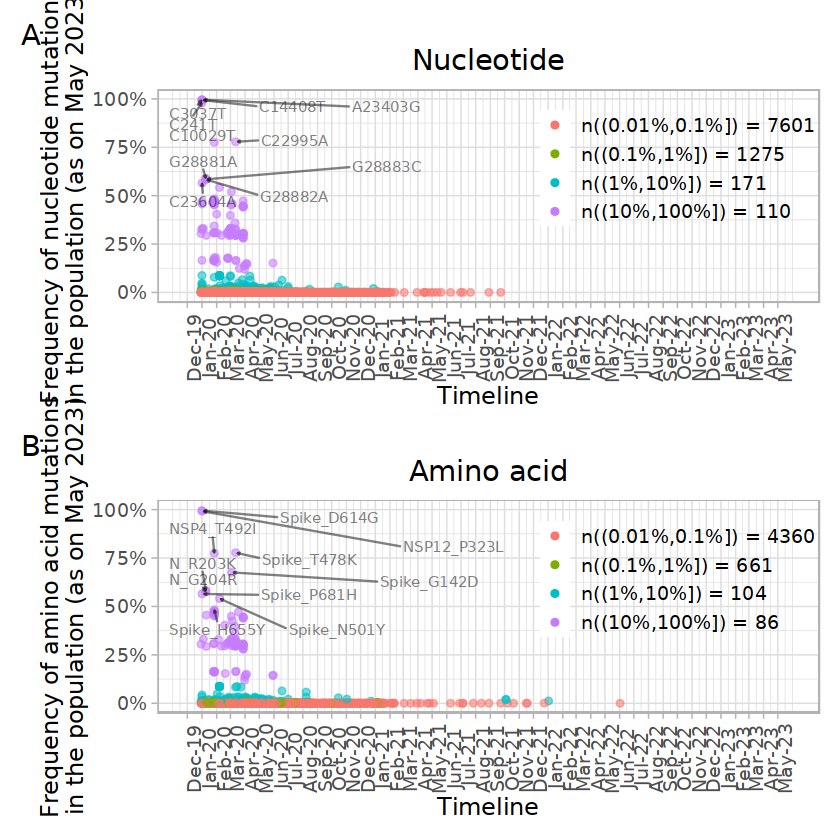

In [77]:
p.fig <- p.scatterNT / p.scatterAA +
    plot_annotation(tag_levels = 'A')

p.fig

# ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig3.pdf", 
#        plot = p.fig, 
#        width = 8.5, 
#        height = 10)

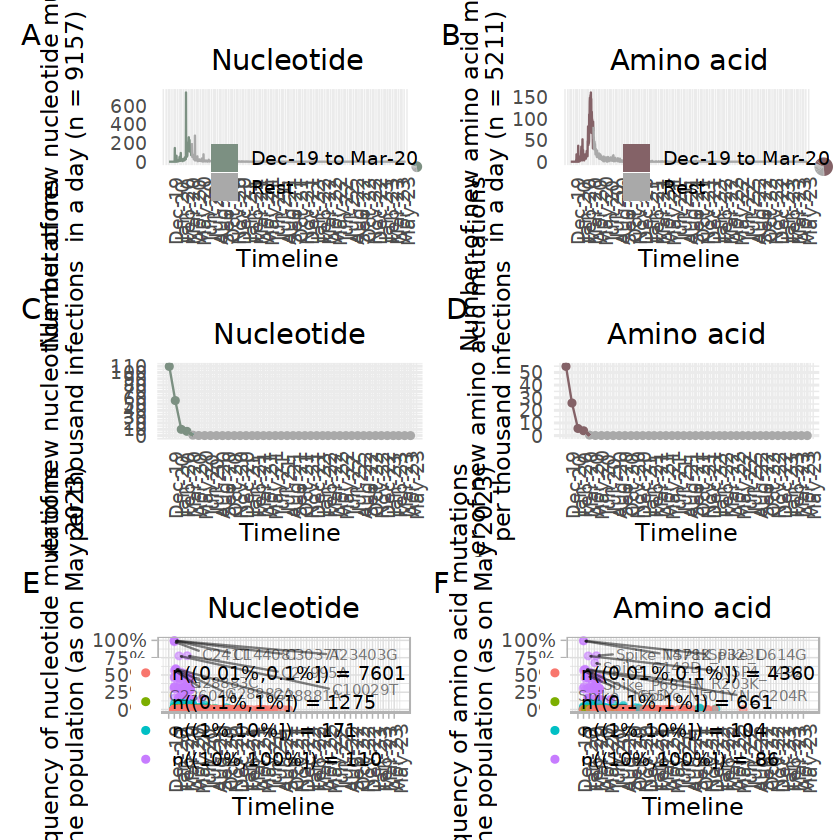

In [78]:
p.fig1 <- (p1.E | p1.F) / (p2.A | p2.B) / (p.scatterNT | p.scatterAA) +
    plot_annotation(tag_levels = list(c("A", "", "B", "", "C", "D", "E", "F")))

# # this adds annotation to the insets as well
# p.fig1 <- (p1.A | p1.B) / (p1.C | p1.D) / (p1.E | p1.F) / (p2.A | p2.B) +
#             plot_annotation(tag_levels = 'A') #+ 
# #             plot_layout(guides = 'collect') & theme(legend.position = "bottom")
p.fig1

ggsave("./r_analysis/plots/figures/patchwork.fig1.pdf", 
       plot = p.fig1, 
       width = 16, 
       height = 16)

ggsave("./r_analysis/plots/figures/patchwork.fig1.jpeg", 
       plot = p.fig1, 
       dpi = "print",
       width = 16.5, 
       height = 16.5)

## Figure 2

### Figure 2D

In [79]:
# vacc <- read_csv("./raw_data/owid/vaccination_data_owid.csv") |> 
#     filter(location == "World" & (date <= as_date("2023-05-25"))) |>
#     select(location, date, total_cases, new_cases, matches(match = "vaccinat", ignore.case = T))
# vacc
# write.csv(vacc, "./raw_data/owid/vaccination_data_owid_processed.csv", row.names = F)

vacc <- read_csv("./raw_data/owid/vaccination_data_owid_processed.csv")
vacc

Rows: 1239 Columns: 15
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr   (1): location
dbl  (13): total_cases, new_cases, total_vaccinations, people_vaccinated, pe...
date  (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


location date       total_cases new_cases total_vaccinations
1    World    2020-01-03    NA          0      NA                
2    World    2020-01-04     3          3      NA                
3    World    2020-01-05     2          0      NA                
4    World    2020-01-06     5          3      NA                
5    World    2020-01-07     5          0      NA                
6    World    2020-01-08     6          1      NA                
7    World    2020-01-09     6          0      NA                
8    World    2020-01-10     6          0      NA                
9    World    2020-01-11     6          0      NA                
10   World    2020-01-12    47         41      NA                
11   World    2020-01-13    48          1      NA                
12   World    2020-01-14    53          5      NA                
13   World    2020-01-15    53          0      NA                
14   World    2020-01-16    53          0      NA                
15   World    2020-01-17    54          4      NA                
16   World    2020-01-18    58          4      NA                
17   World    2020-01-19   137         79      NA                
18   World    2020-01-20   215         78      NA                
19   World    2020-01-21   308         93      NA                
20   World    2020-01-22   456        148      NA                
21   World    2020-01-23   586        133      NA                
22   World    2020-01-24   857        271      NA                
23   World    2020-01-25  1330        473      NA                
24   World    2020-01-26  2032        705      NA                
25   World    2020-01-27  2822        790      NA                
26   World    2020-01-28  4597       1779      NA                
27   World    2020-01-29  6074       1477      NA                
28   World    2020-01-30  7828       1754      NA                
29   World    2020-01-31  9843       2015      NA                
30   World    2020-02-01 11952       2113      NA                
...  ...      ...        ...         ...       ...               
1210 World    2023-04-26 763939562    60253    13403076981       
1211 World    2023-04-27 763996910    57348    13403268160       
1212 World    2023-04-28 764054215    57305    13403502354       
1213 World    2023-04-29 764110201    55986    13403587608       
1214 World    2023-04-30 764410007   299806    13404984966       
1215 World    2023-05-01 764515372   105365    13405101510       
1216 World    2023-05-02 764554278    38906    13430429216       
1217 World    2023-05-03 764610712    56434    13430700565       
1218 World    2023-05-04 764671700    60988    13430975665       
1219 World    2023-05-05 764723947    52247    13431190162       
1220 World    2023-05-06 764764412    40465    13431320013       
1221 World    2023-05-07 765019457   255045    13432376479       
1222 World    2023-05-08 765144414   124957    13432468268       
1223 World    2023-05-09 765191170    46756    13432643997       
1224 World    2023-05-10 765233591    42421    13432692329       
1225 World    2023-05-11 765271444    37853    13432811182       
1226 World    2023-05-12 765310848    39404    13433022155       
1227 World    2023-05-13 765347116    36268    13433055229       
1228 World    2023-05-14 765586356   239240    13434231239       
1229 World    2023-05-15 765699468   113112    13434284865       
1230 World    2023-05-16 765732780    33312    13434511173       
1231 World    2023-05-17 765771004    38224    13434565374       
1232 World    2023-05-18 765805456    34452    13434596236       
1233 World    2023-05-19 765836412    30956    13434782711       
1234 World    2023-05-20 765865784    29372    13434809097       
1235 World    2023-05-21 766013906   148122    13436568810       
1236 World    2023-05-22 766134225   120319    13437335881       
1237 World    2023-05-23 766164038    29813    13437489686       
1238 World    2023-05-24 766198752    34714  

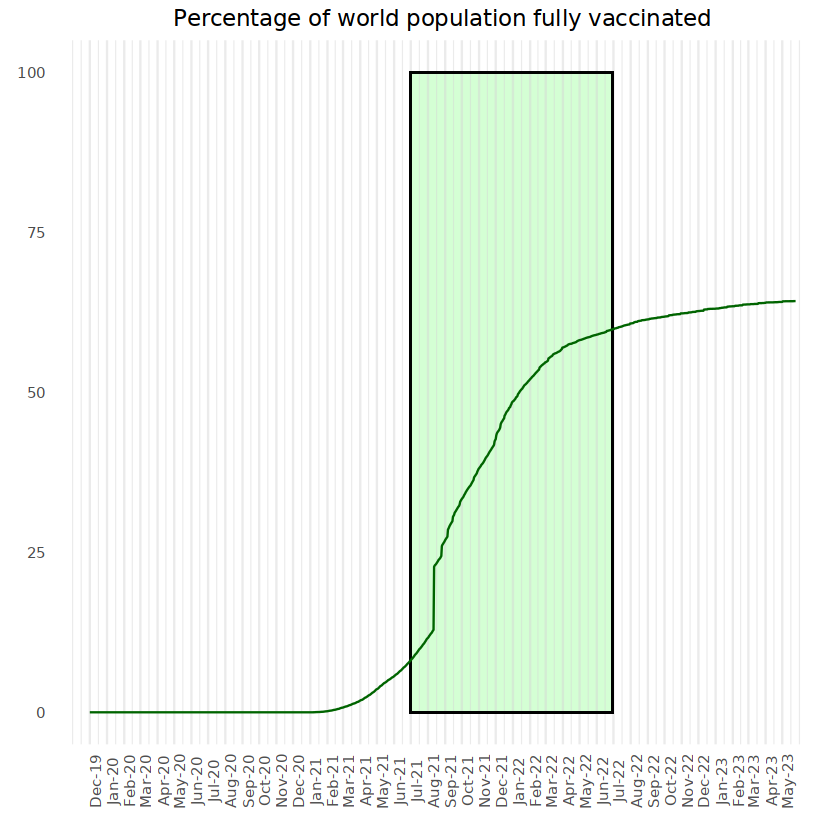

In [80]:
# p2.D <- vacc |>
#     fill(people_vaccinated, .direction = "up") |>
#     mutate(percentage_world_population_vaccinated = 100 * (people_vaccinated / 8000000000)) |>
#     bind_rows(data.frame(date = seq(as.Date("2019-12-01"), as.Date("2019-12-31"), by = "days"),
#                          percentage_world_population_vaccinated = 0)) |>
#     ggplot(aes(x = date, y = percentage_world_population_vaccinated)) +
#     geom_rect(
#         xmin = as.Date("2021-07-01"),
#         xmax = as.Date("2022-06-30"),
#         ymin = 0,
#         ymax = 100,
#         color = "black",
#         fill = "#D1FFBD",
#         alpha = 0.01
#     ) +
#     geom_line(color = "darkgreen") +
#     scale_x_date(
#         date_labels = "%b-%y",
#         date_breaks = "1 month",
#         limits = c(as.Date("2019-12-01"), max(vacc$date, na.rm = TRUE))
#     ) +
#     scale_y_continuous(limits = c(0, 100)) +
#     theme_minimal() +
#     theme(axis.text.x = element_text(angle = 90)) +
#     theme(
#         panel.grid.minor.y = element_blank(),
#         panel.grid.major.y = element_blank(),
#         legend.position = "none"
#     ) +
#     labs(x = "Timeline", y = element_blank(), title = "Percentage of world population vaccinated")
# p2.D

p2.D <- vacc |>
    fill(people_fully_vaccinated, .direction = "up") |>
    mutate(percentage_world_population_vaccinated = 100 * (people_fully_vaccinated / 8000000000)) |>
    bind_rows(data.frame(date = seq(as.Date("2019-12-01"), as.Date("2019-12-31"), by = "days"),
                         percentage_world_population_vaccinated = 0)) |>
    ggplot(aes(x = date, y = percentage_world_population_vaccinated)) +
    geom_rect(
        xmin = as.Date("2021-07-01"),
        xmax = as.Date("2022-06-30"),
        ymin = 0,
        ymax = 100,
        color = "black",
        fill = "#D1FFBD",
        alpha = 0.01
    ) +
    geom_line(color = "darkgreen") +
    scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
                     date_labels = "%b-%y") +
    # scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
    # scale_x_date(
    #     date_labels = "%b-%y",
    #     date_breaks = "1 month",
    #     limits = c(as.Date("2019-12-01"), max(vacc$date, na.rm = TRUE))
    # ) +
    scale_y_continuous(limits = c(0, 100)) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
        panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_blank(),
        legend.position = "none",
        plot.title = element_text(hjust = 0.5)
    ) +
    labs(x = "", y = element_blank(), title = "Percentage of world population fully vaccinated")
p2.D

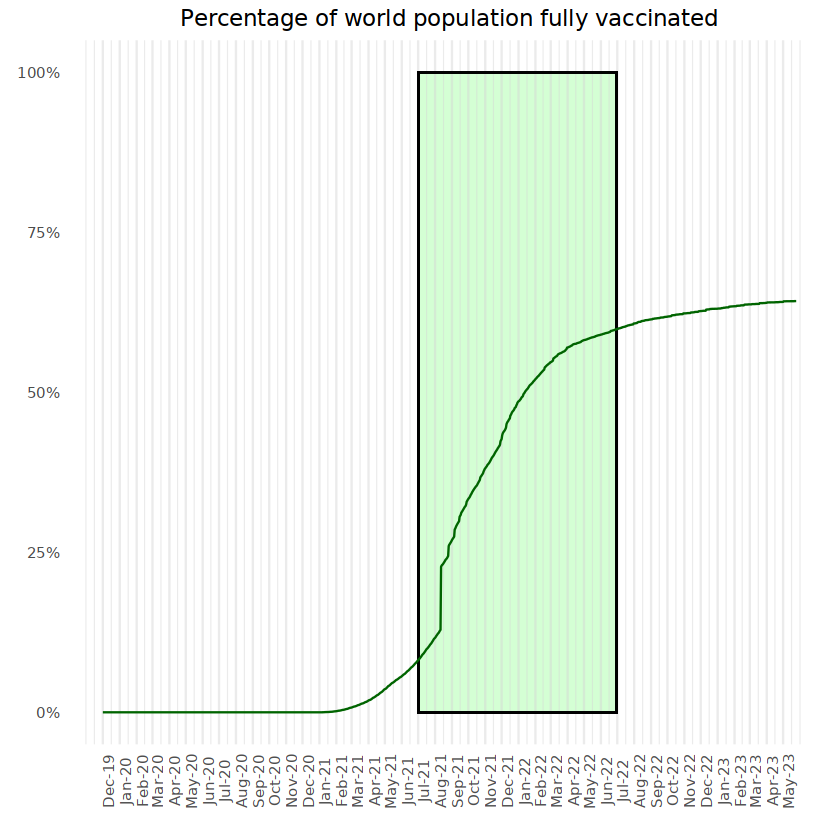

In [81]:
p2.D <- vacc |>
    fill(people_fully_vaccinated, .direction = "up") |>
    mutate(percentage_world_population_vaccinated = (people_fully_vaccinated / 8000000000)) |>
    bind_rows(data.frame(date = seq(as.Date("2019-12-01"), as.Date("2019-12-31"), by = "days"),
                         percentage_world_population_vaccinated = 0)) |>
    ggplot(aes(x = date, y = percentage_world_population_vaccinated)) +
    geom_rect(
        xmin = as.Date("2021-07-01"),
        xmax = as.Date("2022-06-30"),
        ymin = 0,
        ymax = 1,
        color = "black",
        fill = "#D1FFBD",
        alpha = 0.01
    ) +
    geom_line(color = "darkgreen") +
    scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
                     date_labels = "%b-%y") +
    # scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
    # scale_x_date(
    #     date_labels = "%b-%y",
    #     date_breaks = "1 month",
    #     limits = c(as.Date("2019-12-01"), max(vacc$date, na.rm = TRUE))
    # ) +
#     scale_y_continuous(limits = c(0, 100)) +
    scale_y_continuous(labels = scales::percent, limits = c(0, 1)) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90)) +
    theme(
        panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_blank(),
        legend.position = "none",
        plot.title = element_text(hjust = 0.5)
    ) +
    labs(x = "", y = element_blank(), title = "Percentage of world population fully vaccinated")
p2.D

### Figure 2A, 2B

In [82]:
# >= 1%
plotDF <- DF
# plotDF$bins <- cut(
plotDF$TimelineLabel <- cut(
    x = plotDF$Timeline, 
    breaks = c(
        as_date("2019-12-01"), # Dec 19
        as_date("2020-01-01"),  # Jan 20
        as_date("2020-02-01"),  # Feb 20
        as_date("2020-03-01"),  # Mar 20
        as_date("2020-04-01"),  # Apr 20
        as_date("2020-05-01"),  # May 20
        as_date("2020-06-01"),  # Jun 20
        as_date("2020-07-01"),  # Jul 20
        as_date("2021-01-01"),  # Jan 21
        as_date("2021-07-01"),  # July 21
        as_date("2022-01-01"),  # Jan 22
        as_date("2022-07-01"),  # July 22
        as_date("2023-01-01"),  # Jan 23
        as_date("2023-05-31") # Last recorded date
    ),
    labels = c(
        "Dec-19",
        "Jan-20",
        "Feb-20",
        "Mar-20",
        "Apr-20",
        "May-20",
        "Jun-20",
        "Jul-20 to Dec-20",
        "Jan-21 to Jun-21",
        "Jul-21 to Dec-21",
        "Jan-22 to Jun-22",
        "Jul-22 to Dec-22",
        "Jan-23 to May-23"
    )
)

levels(plotDF$TimelineLabel)

plotDF

[1] "Dec-19"           "Jan-20"           "Feb-20"           "Mar-20"          
 [5] "Apr-20"           "May-20"           "Jun-20"           "Jul-20 to Dec-20"
 [9] "Jan-21 to Jun-21" "Jul-21 to Dec-21" "Jan-22 to Jun-22" "Jul-22 to Dec-22"
[13] "Jan-23 to May-23"

Timeline   r.geq1 r.geqpt1 r.geqpt01 py.geq1 py.geqpt1 py.geqpt01
1    2019-12-01 0      0        0         0       0         0         
2    2019-12-02 0      0        0         0       0         0         
3    2019-12-03 0      0        0         0       0         0         
4    2019-12-04 0      0        0         0       0         0         
5    2019-12-05 0      0        0         0       0         0         
6    2019-12-06 0      0        0         0       0         0         
7    2019-12-07 0      0        0         0       0         0         
8    2019-12-08 0      0        0         0       0         0         
9    2019-12-09 0      0        0         0       0         0         
10   2019-12-10 0      0        0         0       0         0         
11   2019-12-11 0      0        0         0       0         0         
12   2019-12-12 0      0        0         0       0         0         
13   2019-12-13 0      0        0         0       0         0         
14   2019-12-14 0      0        0         0       0         0         
15   2019-12-15 0      0        0         0       0         0         
16   2019-12-16 0      0        0         0       0         0         
17   2019-12-17 0      0        0         0       0         0         
18   2019-12-18 0      0        0         0       0         0         
19   2019-12-19 0      0        0         0       0         0         
20   2019-12-20 0      0        0         0       0         0         
21   2019-12-21 0      0        0         0       0         0         
22   2019-12-22 0      0        0         0       0         0         
23   2019-12-23 0      0        0         0       0         0         
24   2019-12-24 0      0        0         0       0         0         
25   2019-12-25 0      0        0         0       0         0         
26   2019-12-26 0      0        0         0       0         0         
27   2019-12-27 0      0        0         0       0         0         
28   2019-12-28 0      0        0         0       0         0         
29   2019-12-29 0      0        0         0       0         0         
30   2019-12-30 2      3        4         2       4         8         
...  ...        ...    ...      ...       ...     ...       ...       
1243 2023-04-26 0      0        0         0       0         0         
1244 2023-04-27 0      0        0         0       0         0         
1245 2023-04-28 0      0        0         0       0         0         
1246 2023-04-29 0      0        0         0       0         0         
1247 2023-04-30 0      0        0         0       0         0         
1248 2023-05-01 0      0        0         0       0         0         
1249 2023-05-02 0      0        0         0       0         0         
1250 2023-05-03 0      0        0         0       0         0         
1251 2023-05-04 0      0        0         0       0         0         
1252 2023-05-05 0      0        0         0       0         0         
1253 2023-05-06 0      0        0         0       0         0         
1254 2023-05-07 0      0        0         0       0         0         
1255 2023-05-08 0      0        0         0       0         0         
1256 2023-05-09 0      0        0         0       0         0         
1257 2023-05-10 0      0        0         0       0         0         
1258 2023-05-11 0      0        0         0       0         0         
1259 2023-05-12 0      0        0         0       0         0         
1260 2023-05-13 0      0        0         0       0         0         
1261 2023-05-14 0      0        0         0       0         0         
1262 2023-05-15 0      0        0         0       0         0         
1263 2023-05-16 0      0        0         0       0         0         
1264 2023-05-17 0      0        0         0       0         0         
1265 2023-05-18 0      0        0         0       0         0         
1266 2023-05-19 0      0        0         0       0         0         
1267 2023-05-20 0      0     

In [83]:
DF.pie <- plotDF |>
    pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
    mutate(name = factor(name, levels = mutTypeLevels.plot)) |>
    group_by(TimelineLabel, name) |>
    summarize(countMutations = sum(value))
DF.pie
# DF.pie <- plotDF |>
#     pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
#     mutate(
#         # TimelineLabel = factor(TimelineLabel, levels = monthLevels),
#         name = factor(name, levels = mutTypeLevels.plot),
#         bins = ifelse(
#             Timeline >= as_date("2019-12-01") & Timeline <= as_date("2020-04-01"),
#             "Dec-19 to Mar-20",
#             "Rest"
#         )
#     ) |>
#     group_by(TimelineLabel, name, bins) |>
#     summarize(countMutations = sum(value))
# DF.pie

`summarise()` has grouped output by 'TimelineLabel'. You can override using the `.groups` argument.


TimelineLabel    name       countMutations
1   Dec-19           py.geq1       2          
2   Dec-19           r.geq1        2          
3   Dec-19           py.geqpt1     4          
4   Dec-19           r.geqpt1      3          
5   Dec-19           py.geqpt01    8          
6   Dec-19           r.geqpt01     4          
7   Jan-20           py.geq1      66          
8   Jan-20           r.geq1       47          
9   Jan-20           py.geqpt1   275          
10  Jan-20           r.geqpt1    125          
11  Jan-20           py.geqpt01  553          
12  Jan-20           r.geqpt01   257          
13  Feb-20           py.geq1      61          
14  Feb-20           r.geq1       33          
15  Feb-20           py.geqpt1   293          
16  Feb-20           r.geqpt1    159          
17  Feb-20           py.geqpt01  741          
18  Feb-20           r.geqpt01   422          
19  Mar-20           py.geq1     102          
20  Mar-20           r.geq1       68          
21  Mar-20           py.geqpt1   801          
22  Mar-20           r.geqpt1    432          
23  Mar-20           py.geqpt01 4972          
24  Mar-20           r.geqpt01  2841          
25  Apr-20           py.geq1      26          
26  Apr-20           r.geq1       17          
27  Apr-20           py.geqpt1   101          
28  Apr-20           r.geqpt1     60          
29  Apr-20           py.geqpt01 1643          
30  Apr-20           r.geqpt01   821          
... ...              ...        ...           
49  Jan-21 to Jun-21 py.geq1     0            
50  Jan-21 to Jun-21 r.geq1      0            
51  Jan-21 to Jun-21 py.geqpt1   2            
52  Jan-21 to Jun-21 r.geqpt1    3            
53  Jan-21 to Jun-21 py.geqpt01 43            
54  Jan-21 to Jun-21 r.geqpt01  42            
55  Jul-21 to Dec-21 py.geq1     0            
56  Jul-21 to Dec-21 r.geq1      2            
57  Jul-21 to Dec-21 py.geqpt1   0            
58  Jul-21 to Dec-21 r.geqpt1    2            
59  Jul-21 to Dec-21 py.geqpt01  4            
60  Jul-21 to Dec-21 r.geqpt01  13            
61  Jan-22 to Jun-22 py.geq1     0            
62  Jan-22 to Jun-22 r.geq1      1            
63  Jan-22 to Jun-22 py.geqpt1   0            
64  Jan-22 to Jun-22 r.geqpt1    1            
65  Jan-22 to Jun-22 py.geqpt01  0            
66  Jan-22 to Jun-22 r.geqpt01   2            
67  Jul-22 to Dec-22 py.geq1     0            
68  Jul-22 to Dec-22 r.geq1      0            
69  Jul-22 to Dec-22 py.geqpt1   0            
70  Jul-22 to Dec-22 r.geqpt1    0            
71  Jul-22 to Dec-22 py.geqpt01  0            
72  Jul-22 to Dec-22 r.geqpt01   0            
73  Jan-23 to May-23 py.geq1     0            
74  Jan-23 to May-23 r.geq1      0            
75  Jan-23 to May-23 py.geqpt1   0            
76  Jan-23 to May-23 r.geqpt1    0            
77  Jan-23 to May-23 py.geqpt01  0            
78  Jan-23 to May-23 r.geqpt01   0

In [84]:
# replace NaNs by 0 after calculating ratios
DF.pie |>
    group_by(name) |>
    mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
    select(-countMutations) |>
#     filter(name %in% c("py.geq1", "py.geqpt1")) |>
    pivot_wider(names_from = "name", values_from = "normalizedCountMutations") |>
    mutate(
        py.geq1_by_py.geqpt01 = py.geq1 / py.geqpt01,
        py.geqpt1_by_py.geqpt01 = py.geqpt1 / py.geqpt01,
        r.geq1_by_r.geqpt01 = r.geq1 / r.geqpt01,
        r.geqpt1_by_r.geqpt01 = r.geqpt1 / r.geqpt01
    ) |>
    pivot_longer(cols = c(py.geq1_by_py.geqpt01, py.geqpt1_by_py.geqpt01, r.geq1_by_r.geqpt01, r.geqpt1_by_r.geqpt01))# |>
    

TimelineLabel    py.geq1     r.geq1      py.geqpt1   r.geqpt1   
1  Dec-19           0.007117438 0.010526316 0.002570694 0.003525264
2  Dec-19           0.007117438 0.010526316 0.002570694 0.003525264
3  Dec-19           0.007117438 0.010526316 0.002570694 0.003525264
4  Dec-19           0.007117438 0.010526316 0.002570694 0.003525264
5  Jan-20           0.234875445 0.247368421 0.176735219 0.146886016
6  Jan-20           0.234875445 0.247368421 0.176735219 0.146886016
7  Jan-20           0.234875445 0.247368421 0.176735219 0.146886016
8  Jan-20           0.234875445 0.247368421 0.176735219 0.146886016
9  Feb-20           0.217081851 0.173684211 0.188303342 0.186839013
10 Feb-20           0.217081851 0.173684211 0.188303342 0.186839013
11 Feb-20           0.217081851 0.173684211 0.188303342 0.186839013
12 Feb-20           0.217081851 0.173684211 0.188303342 0.186839013
13 Mar-20           0.362989324 0.357894737 0.514781491 0.507638073
14 Mar-20           0.362989324 0.357894737 0.514781491 0.507638073
15 Mar-20           0.362989324 0.357894737 0.514781491 0.507638073
16 Mar-20           0.362989324 0.357894737 0.514781491 0.507638073
17 Apr-20           0.092526690 0.089473684 0.064910026 0.070505288
18 Apr-20           0.092526690 0.089473684 0.064910026 0.070505288
19 Apr-20           0.092526690 0.089473684 0.064910026 0.070505288
20 Apr-20           0.092526690 0.089473684 0.064910026 0.070505288
21 May-20           0.046263345 0.052631579 0.023136247 0.032902468
22 May-20           0.046263345 0.052631579 0.023136247 0.032902468
23 May-20           0.046263345 0.052631579 0.023136247 0.032902468
24 May-20           0.046263345 0.052631579 0.023136247 0.032902468
25 Jun-20           0.017793594 0.021052632 0.008997429 0.011750881
26 Jun-20           0.017793594 0.021052632 0.008997429 0.011750881
27 Jun-20           0.017793594 0.021052632 0.008997429 0.011750881
28 Jun-20           0.017793594 0.021052632 0.008997429 0.011750881
29 Jul-20 to Dec-20 0.021352313 0.031578947 0.019280206 0.032902468
30 Jul-20 to Dec-20 0.021352313 0.031578947 0.019280206 0.032902468
31 Jul-20 to Dec-20 0.021352313 0.031578947 0.019280206 0.032902468
32 Jul-20 to Dec-20 0.021352313 0.031578947 0.019280206 0.032902468
33 Jan-21 to Jun-21 0.000000000 0.000000000 0.001285347 0.003525264
34 Jan-21 to Jun-21 0.000000000 0.000000000 0.001285347 0.003525264
35 Jan-21 to Jun-21 0.000000000 0.000000000 0.001285347 0.003525264
36 Jan-21 to Jun-21 0.000000000 0.000000000 0.001285347 0.003525264
37 Jul-21 to Dec-21 0.000000000 0.010526316 0.000000000 0.002350176
38 Jul-21 to Dec-21 0.000000000 0.010526316 0.000000000 0.002350176
39 Jul-21 to Dec-21 0.000000000 0.010526316 0.000000000 0.002350176
40 Jul-21 to Dec-21 0.000000000 0.010526316 0.000000000 0.002350176
41 Jan-22 to Jun-22 0.000000000 0.005263158 0.000000000 0.001175088
42 Jan-22 to Jun-22 0.000000000 0.005263158 0.000000000 0.001175088
43 Jan-22 to Jun-22 0.000000000 0.005263158 0.000000000 0.001175088
44 Jan-22 to Jun-22 0.000000000 0.005263158 0.000000000 0.001175088
45 Jul-22 to Dec-22 0.000000000 0.000000000 0.000000000 0.000000000
46 Jul-22 to Dec-22 0.000000000 0.000000000 0.000000000 0.000000000
47 Jul-22 to Dec-22 0.000000000 0.000000000 0.000000000 0.000000000
48 Jul-22 to Dec-22 0.000000000 0.000000000 0.000000000 0.000000000
49 Jan-23 to May-23 0.000000000 0.000000000 0.000000000 0.000000000
50 Jan-23 to May-23 0.000000000 0.000000000 0.000000000 0.000000000
51 Jan-23 to May-23 0.000000000 0.000000000 0.000000000 0.000000000
52 Jan-23 to May-23 0.000000000 0.000000000 0.000000000 0.000000000
   py.geqpt01   r.geqpt01    name                    value     
1  0.0008736486 0.0007676070 py.geq1_by_py.geqpt01    8.1467972
2  0.0008736486 0.0007676070 py.geqpt1_by_py.geqpt01  2.9424807
3  0.0008736486 0.0007676070 r.geq1_by_r.geqpt01     13.7131579
4  0.0008736486 0.0007676070 r.geqpt1_by_r.geqpt01    4.5925382
5  0.0603909577 0.0493187488 py.geq1_by_py.geqpt01    3.8892486
6  0.0603909577

In [85]:
labeller3 <- list(
    "r.geq1_by_r.geqpt01" = "Percentage of AA >=1% / Percentage of all AA mutations", 
    "r.geqpt1_by_r.geqpt01" = "Percentage of AA >=0.1% / Percentage of all AA mutations", 
    "py.geq1_by_py.geqpt01" = "Percentage of NT >=1% / Percentage of all NT mutations", 
    "py.geqpt1_by_py.geqpt01" = "Percentage of NT >=0.1% / Percentage of all NT mutations"
)
labeller3

$r.geq1_by_r.geqpt01
[1] "Percentage of AA >=1% / Percentage of all AA mutations"

$r.geqpt1_by_r.geqpt01
[1] "Percentage of AA >=0.1% / Percentage of all AA mutations"

$py.geq1_by_py.geqpt01
[1] "Percentage of NT >=1% / Percentage of all NT mutations"

$py.geqpt1_by_py.geqpt01
[1] "Percentage of NT >=0.1% / Percentage of all NT mutations"

In [86]:
labeller3 <- c(
    "r.geq1_by_r.geqpt01" = expression("Percentage of AA">="1% / Percentage of all AA mutations"), 
    "r.geqpt1_by_r.geqpt01" = expression("Percentage of AA">="0.1% / Percentage of all AA mutations"), 
    "py.geq1_by_py.geqpt01" = expression("Percentage of NT">="1% / Percentage of all NT mutations"), 
    "py.geqpt1_by_py.geqpt01" = expression("Percentage of NT">="0.1% / Percentage of all NT mutations")
)
labeller3

expression(r.geq1_by_r.geqpt01 = "Percentage of AA" >= "1% / Percentage of all AA mutations", 
    r.geqpt1_by_r.geqpt01 = "Percentage of AA" >= "0.1% / Percentage of all AA mutations", 
    py.geq1_by_py.geqpt01 = "Percentage of NT" >= "1% / Percentage of all NT mutations", 
    py.geqpt1_by_py.geqpt01 = "Percentage of NT" >= "0.1% / Percentage of all NT mutations")

In [87]:
# # old figures where ratio of normalizedCounts instead of percentages was used
# p2.A <- DF.pie |>
#     group_by(name) |>
#     mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
#     filter(name %in% c("py.geq1", "py.geqpt1")) |>
#     ggplot(aes(x = TimelineLabel, y = normalizedCountMutations, fill = name)) +
#     geom_bar(stat = "identity", position = "dodge") +
#     labs(x = "Timeline", y = "", title = "Ratio of frequently occurring NT mutations to all new NT mutations") +
#     scale_fill_manual(
#         values = c("py.geq1" = "#F8766D", "py.geqpt1" = "#00BA38"),
#         labels = labeller2
#     ) +
#     theme_minimal() +
#     theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position = c(1, 1), legend.justification = c(1,1), legend.title = element_blank())

# p2.A


# p2.B <- DF.pie |>
#     group_by(name) |>
#     mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
#     filter(name %in% c("r.geq1", "r.geqpt1")) |>
#     ggplot(aes(x = TimelineLabel, y = normalizedCountMutations, fill = name)) +
#     geom_bar(stat = "identity", position = "dodge") +
#     labs(x = "Timeline", y = "", title = "Ratio of frequently occurring AA mutations to all new AA mutations") +
#     scale_fill_manual(
#         values = c("r.geq1" = "#B79F00", "r.geqpt1" = "#00BFC4"),
#         labels = labeller2
#     ) +
#     theme_minimal() +
#     theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position = c(1, 1), legend.justification = c(1,1), legend.title = element_blank())

# p2.B

In [88]:
color.barA <- "#BBACC1"
color.barB <- "#80727B"

In [89]:
DF

Timeline   r.geq1 r.geqpt1 r.geqpt01 py.geq1 py.geqpt1 py.geqpt01
1    2019-12-01 0      0        0         0       0         0         
2    2019-12-02 0      0        0         0       0         0         
3    2019-12-03 0      0        0         0       0         0         
4    2019-12-04 0      0        0         0       0         0         
5    2019-12-05 0      0        0         0       0         0         
6    2019-12-06 0      0        0         0       0         0         
7    2019-12-07 0      0        0         0       0         0         
8    2019-12-08 0      0        0         0       0         0         
9    2019-12-09 0      0        0         0       0         0         
10   2019-12-10 0      0        0         0       0         0         
11   2019-12-11 0      0        0         0       0         0         
12   2019-12-12 0      0        0         0       0         0         
13   2019-12-13 0      0        0         0       0         0         
14   2019-12-14 0      0        0         0       0         0         
15   2019-12-15 0      0        0         0       0         0         
16   2019-12-16 0      0        0         0       0         0         
17   2019-12-17 0      0        0         0       0         0         
18   2019-12-18 0      0        0         0       0         0         
19   2019-12-19 0      0        0         0       0         0         
20   2019-12-20 0      0        0         0       0         0         
21   2019-12-21 0      0        0         0       0         0         
22   2019-12-22 0      0        0         0       0         0         
23   2019-12-23 0      0        0         0       0         0         
24   2019-12-24 0      0        0         0       0         0         
25   2019-12-25 0      0        0         0       0         0         
26   2019-12-26 0      0        0         0       0         0         
27   2019-12-27 0      0        0         0       0         0         
28   2019-12-28 0      0        0         0       0         0         
29   2019-12-29 0      0        0         0       0         0         
30   2019-12-30 2      3        4         2       4         8         
...  ...        ...    ...      ...       ...     ...       ...       
1243 2023-04-26 0      0        0         0       0         0         
1244 2023-04-27 0      0        0         0       0         0         
1245 2023-04-28 0      0        0         0       0         0         
1246 2023-04-29 0      0        0         0       0         0         
1247 2023-04-30 0      0        0         0       0         0         
1248 2023-05-01 0      0        0         0       0         0         
1249 2023-05-02 0      0        0         0       0         0         
1250 2023-05-03 0      0        0         0       0         0         
1251 2023-05-04 0      0        0         0       0         0         
1252 2023-05-05 0      0        0         0       0         0         
1253 2023-05-06 0      0        0         0       0         0         
1254 2023-05-07 0      0        0         0       0         0         
1255 2023-05-08 0      0        0         0       0         0         
1256 2023-05-09 0      0        0         0       0         0         
1257 2023-05-10 0      0        0         0       0         0         
1258 2023-05-11 0      0        0         0       0         0         
1259 2023-05-12 0      0        0         0       0         0         
1260 2023-05-13 0      0        0         0       0         0         
1261 2023-05-14 0      0        0         0       0         0         
1262 2023-05-15 0      0        0         0       0         0         
1263 2023-05-16 0      0        0         0       0         0         
1264 2023-05-17 0      0        0         0       0         0         
1265 2023-05-18 0      0        0         0       0         0         
1266 2023-05-19 0      0        0         0       0         0         
1267 2023-05-20 0      0     

Warning message:
"Removed 6 rows containing missing values (`geom_bar()`)."


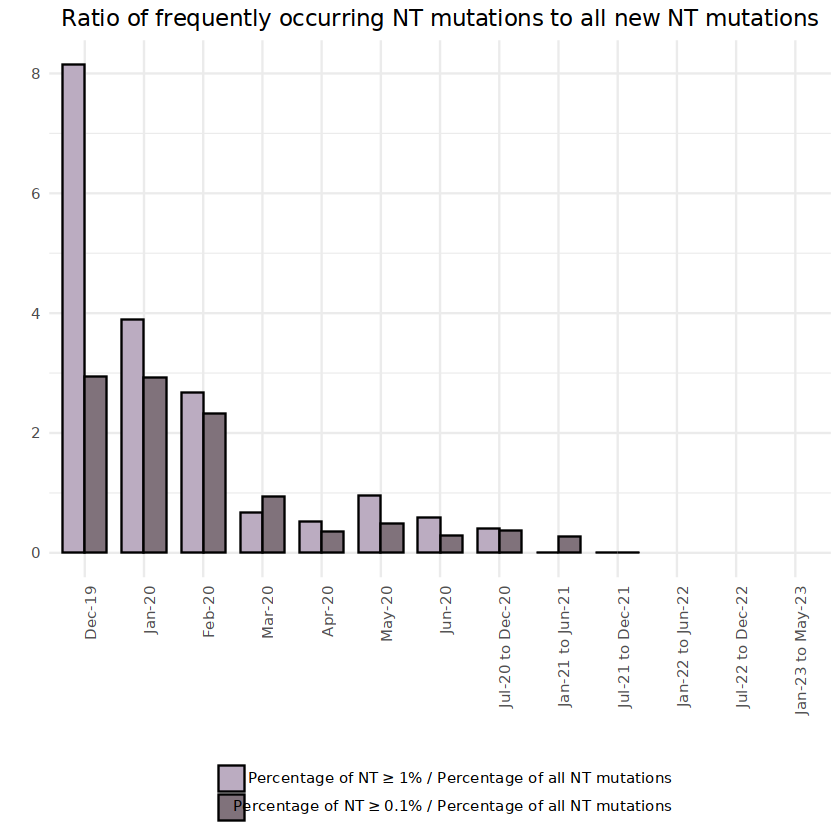

In [90]:
p2.A <- DF.pie |>
    group_by(name) |>
    mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
    select(-countMutations) |>
    pivot_wider(names_from = "name", values_from = "normalizedCountMutations") |>
    mutate(
        py.geq1_by_py.geqpt01 = py.geq1 / py.geqpt01,
        py.geqpt1_by_py.geqpt01 = py.geqpt1 / py.geqpt01,
        r.geq1_by_r.geqpt01 = r.geq1 / r.geqpt01,
        r.geqpt1_by_r.geqpt01 = r.geqpt1 / r.geqpt01
    ) |>
    pivot_longer(cols = c(py.geq1_by_py.geqpt01, py.geqpt1_by_py.geqpt01, r.geq1_by_r.geqpt01, r.geqpt1_by_r.geqpt01)) |>
    filter(name %in% c("py.geq1_by_py.geqpt01", "py.geqpt1_by_py.geqpt01")) |>
    ggplot(aes(x = TimelineLabel, y = value, fill = name)) +
    geom_bar(stat = "identity", position = "dodge", color = "black", width = 0.75) +
    labs(x = "", y = "", title = "Ratio of frequently occurring NT mutations to all new NT mutations") +
    scale_fill_manual(
        values = c("py.geq1_by_py.geqpt01" = color.barA, "py.geqpt1_by_py.geqpt01" = color.barB),
        labels = labeller3
    ) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1), 
          legend.position = "bottom", 
          legend.title = element_blank(),
          plot.title = element_text(hjust = 0.5)) +
    guides(fill = guide_legend(ncol = 1))
p2.A

Warning message:
"Removed 4 rows containing missing values (`geom_bar()`)."


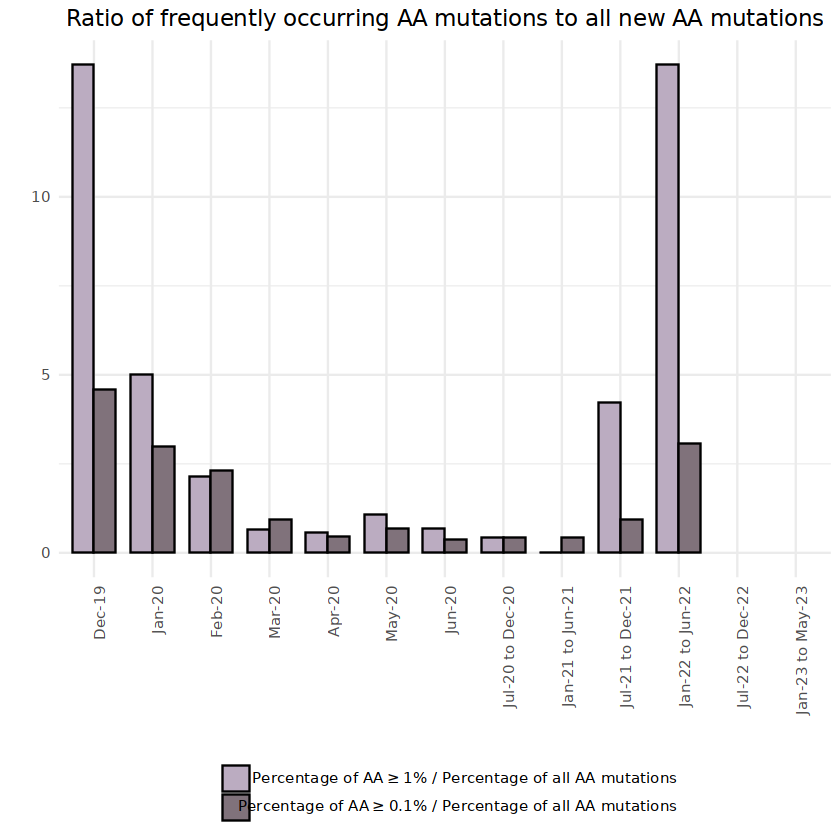

In [91]:
p2.B <- DF.pie |>
    group_by(name) |>
    mutate(normalizedCountMutations = countMutations / sum(countMutations)) |>
    select(-countMutations) |>
    pivot_wider(names_from = "name", values_from = "normalizedCountMutations") |>
    mutate(
        py.geq1_by_py.geqpt01 = py.geq1 / py.geqpt01,
        py.geqpt1_by_py.geqpt01 = py.geqpt1 / py.geqpt01,
        r.geq1_by_r.geqpt01 = r.geq1 / r.geqpt01,
        r.geqpt1_by_r.geqpt01 = r.geqpt1 / r.geqpt01
    ) |>
    pivot_longer(cols = c(py.geq1_by_py.geqpt01, py.geqpt1_by_py.geqpt01, r.geq1_by_r.geqpt01, r.geqpt1_by_r.geqpt01)) |>
    filter(name %in% c("r.geq1_by_r.geqpt01", "r.geqpt1_by_r.geqpt01")) |>
    ggplot(aes(x = TimelineLabel, y = value, fill = name)) +
    geom_bar(stat = "identity", position = "dodge", color = "black", width = 0.75) +
    labs(x = "", y = "", title = "Ratio of frequently occurring AA mutations to all new AA mutations") +
    scale_fill_manual(
        values = c("r.geq1_by_r.geqpt01" = color.barA, "r.geqpt1_by_r.geqpt01" = color.barB),
        labels = labeller3
    ) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1), 
          legend.position = "bottom", 
          legend.title = element_blank(),
          plot.title = element_text(hjust = 0.5)) +
    guides(fill = guide_legend(ncol = 1))
p2.B

In [92]:
DF.pie

TimelineLabel    name       countMutations
1   Dec-19           py.geq1       2          
2   Dec-19           r.geq1        2          
3   Dec-19           py.geqpt1     4          
4   Dec-19           r.geqpt1      3          
5   Dec-19           py.geqpt01    8          
6   Dec-19           r.geqpt01     4          
7   Jan-20           py.geq1      66          
8   Jan-20           r.geq1       47          
9   Jan-20           py.geqpt1   275          
10  Jan-20           r.geqpt1    125          
11  Jan-20           py.geqpt01  553          
12  Jan-20           r.geqpt01   257          
13  Feb-20           py.geq1      61          
14  Feb-20           r.geq1       33          
15  Feb-20           py.geqpt1   293          
16  Feb-20           r.geqpt1    159          
17  Feb-20           py.geqpt01  741          
18  Feb-20           r.geqpt01   422          
19  Mar-20           py.geq1     102          
20  Mar-20           r.geq1       68          
21  Mar-20           py.geqpt1   801          
22  Mar-20           r.geqpt1    432          
23  Mar-20           py.geqpt01 4972          
24  Mar-20           r.geqpt01  2841          
25  Apr-20           py.geq1      26          
26  Apr-20           r.geq1       17          
27  Apr-20           py.geqpt1   101          
28  Apr-20           r.geqpt1     60          
29  Apr-20           py.geqpt01 1643          
30  Apr-20           r.geqpt01   821          
... ...              ...        ...           
49  Jan-21 to Jun-21 py.geq1     0            
50  Jan-21 to Jun-21 r.geq1      0            
51  Jan-21 to Jun-21 py.geqpt1   2            
52  Jan-21 to Jun-21 r.geqpt1    3            
53  Jan-21 to Jun-21 py.geqpt01 43            
54  Jan-21 to Jun-21 r.geqpt01  42            
55  Jul-21 to Dec-21 py.geq1     0            
56  Jul-21 to Dec-21 r.geq1      2            
57  Jul-21 to Dec-21 py.geqpt1   0            
58  Jul-21 to Dec-21 r.geqpt1    2            
59  Jul-21 to Dec-21 py.geqpt01  4            
60  Jul-21 to Dec-21 r.geqpt01  13            
61  Jan-22 to Jun-22 py.geq1     0            
62  Jan-22 to Jun-22 r.geq1      1            
63  Jan-22 to Jun-22 py.geqpt1   0            
64  Jan-22 to Jun-22 r.geqpt1    1            
65  Jan-22 to Jun-22 py.geqpt01  0            
66  Jan-22 to Jun-22 r.geqpt01   2            
67  Jul-22 to Dec-22 py.geq1     0            
68  Jul-22 to Dec-22 r.geq1      0            
69  Jul-22 to Dec-22 py.geqpt1   0            
70  Jul-22 to Dec-22 r.geqpt1    0            
71  Jul-22 to Dec-22 py.geqpt01  0            
72  Jul-22 to Dec-22 r.geqpt01   0            
73  Jan-23 to May-23 py.geq1     0            
74  Jan-23 to May-23 r.geq1      0            
75  Jan-23 to May-23 py.geqpt1   0            
76  Jan-23 to May-23 r.geqpt1    0            
77  Jan-23 to May-23 py.geqpt01  0            
78  Jan-23 to May-23 r.geqpt01   0

In [93]:
plot2ADF <- py.subs.geqpt01 |>
    select(collection_date, per_abundance)

plot2ADF$TimelineLabel <- cut(x = plot2ADF$collection_date, 
                             breaks = c(as_date("2019-12-01"), # Dec 19
                                        as_date("2020-01-01"),  # Jan 20
                                        as_date("2020-02-01"),  # Feb 20
                                        as_date("2020-03-01"),  # Mar 20
                                        as_date("2020-04-01"),  # Apr 20
                                        as_date("2020-05-01"),  # May 20
                                        as_date("2020-06-01"),  # Jun 20
                                        as_date("2020-07-01"),  # Jul 20
                                        as_date("2021-01-01"),  # Jan 21
                                        as_date("2021-07-01"),  # July 21
                                        as_date("2022-01-01"),  # Jan 22
                                        as_date("2022-07-01"),  # July 22
                                        as_date("2023-01-01"),  # Jan 23
                                        as_date("2023-05-31") ), # Last recorded date
                             labels = c("Dec-19",
                                        "Jan-20",
                                        "Feb-20",
                                        "Mar-20",
                                        "Apr-20",
                                        "May-20",
                                        "Jun-20",
                                        "Jul-20 to Dec-20",
                                        "Jan-21 to Jun-21",
                                        "Jul-21 to Dec-21",
                                        "Jan-22 to Jun-22",
                                        "Jul-22 to Dec-22",
                                        "Jan-23 to May-23"))
levels(plot2ADF$TimelineLabel)


plot2ADF$mutationLabel <- cut(x = plot2ADF$per_abundance, 
                             breaks = c(0.01, 0.1, 1, 10, 100))
levels(plot2ADF$mutationLabel)

head(plot2ADF)

[1] "Dec-19"           "Jan-20"           "Feb-20"           "Mar-20"          
 [5] "Apr-20"           "May-20"           "Jun-20"           "Jul-20 to Dec-20"
 [9] "Jan-21 to Jun-21" "Jul-21 to Dec-21" "Jan-22 to Jun-22" "Jul-22 to Dec-22"
[13] "Jan-23 to May-23"

[1] "(0.01,0.1]" "(0.1,1]"    "(1,10]"     "(10,100]"

collection_date per_abundance TimelineLabel mutationLabel
1 2020-01-01      99.58765      Jan-20        (10,100]     
2 2020-01-01      99.40534      Jan-20        (10,100]     
3 2020-01-01      99.39442      Jan-20        (10,100]     
4 2020-01-01      97.94406      Jan-20        (10,100]     
5 2020-03-12      77.84389      Mar-20        (10,100]     
6 2020-01-27      77.56062      Jan-20        (10,100]

In [94]:
table((plot2ADF[, c("TimelineLabel", "mutationLabel")] |>
    group_by(TimelineLabel, mutationLabel) |>
    count(.drop = F))$TimelineLabel)


          Dec-19           Jan-20           Feb-20           Mar-20 
               4                4                4                4 
          Apr-20           May-20           Jun-20 Jul-20 to Dec-20 
               4                4                3                3 
Jan-21 to Jun-21 Jul-21 to Dec-21 Jan-22 to Jun-22 Jul-22 to Dec-22 
               2                1                0                0 
Jan-23 to May-23 
               0 

In [95]:
plot2ADF[, c("TimelineLabel", "mutationLabel")] |>
    group_by(TimelineLabel, mutationLabel) |>
    count(.drop = F)

TimelineLabel    mutationLabel n   
1  Dec-19           (0.01,0.1]       4
2  Dec-19           (0.1,1]          2
3  Dec-19           (1,10]           1
4  Dec-19           (10,100]         1
5  Jan-20           (0.01,0.1]     278
6  Jan-20           (0.1,1]        209
7  Jan-20           (1,10]          22
8  Jan-20           (10,100]        44
9  Feb-20           (0.01,0.1]     448
10 Feb-20           (0.1,1]        232
11 Feb-20           (1,10]          48
12 Feb-20           (10,100]        13
13 Mar-20           (0.01,0.1]    4171
14 Mar-20           (0.1,1]        699
15 Mar-20           (1,10]          53
16 Mar-20           (10,100]        49
17 Apr-20           (0.01,0.1]    1542
18 Apr-20           (0.1,1]         75
19 Apr-20           (1,10]          24
20 Apr-20           (10,100]         2
21 May-20           (0.01,0.1]     404
22 May-20           (0.1,1]         23
23 May-20           (1,10]          12
24 May-20           (10,100]         1
25 Jun-20           (0.01,0.1]     264
26 Jun-20           (0.1,1]          9
27 Jun-20           (1,10]           5
28 Jul-20 to Dec-20 (0.01,0.1]     445
29 Jul-20 to Dec-20 (0.1,1]         24
30 Jul-20 to Dec-20 (1,10]           6
31 Jan-21 to Jun-21 (0.01,0.1]      41
32 Jan-21 to Jun-21 (0.1,1]          2
33 Jul-21 to Dec-21 (0.01,0.1]       4

In [96]:
labellerScatter <- c(
    "(0.01,0.1]" = "(0.01%,0.1%]", 
    "(0.1,1]" = "(0.1%,1%]",
    "(1,10]" = "(1%,10%]",
    "(10,100]" = "(10%,100%]"
)
labellerScatter

(0.01,0.1]        (0.1,1]         (1,10]       (10,100] 
"(0.01%,0.1%]"    "(0.1%,1%]"     "(1%,10%]"   "(10%,100%]"

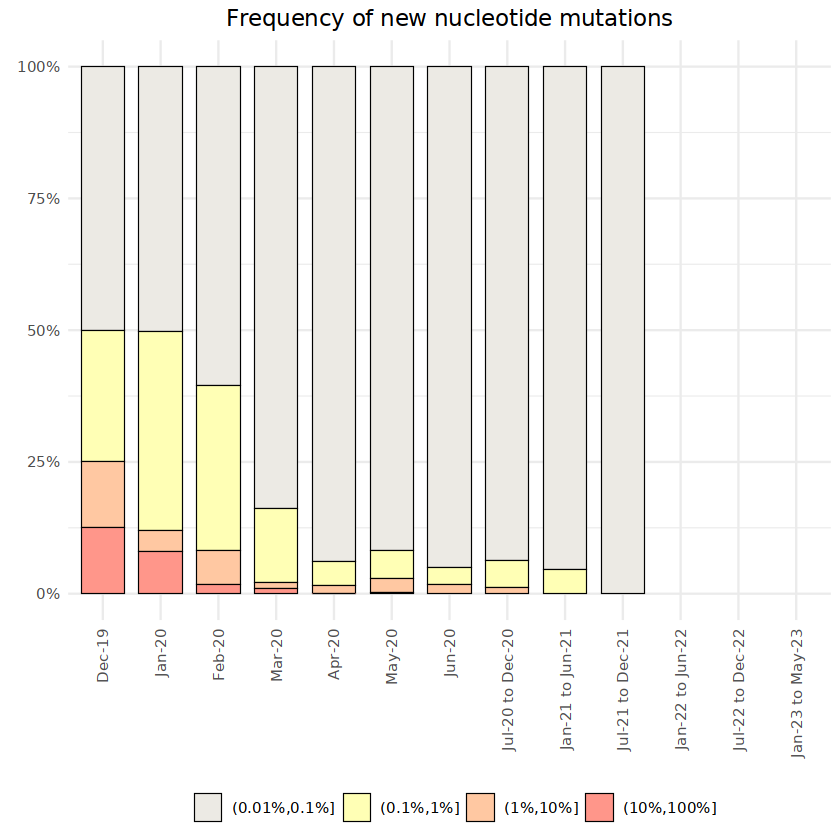

In [97]:
p2.A <- plot2ADF[, c("TimelineLabel", "mutationLabel")] |>
    group_by(TimelineLabel, mutationLabel) |>
    count(.drop = F) |>
    ggplot(aes(x = TimelineLabel, y = n, fill = mutationLabel)) +
    geom_bar(stat = "identity", position = "fill", color = "black", width = 0.75, linewidth = 0.25) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    scale_x_discrete(drop = F) +
    scale_fill_manual(values = rev(c("#FF968A", "#FFC8A2", "#FFFFB5", "#ECEAE4")), 
                      labels = labellerScatter) +
    ggtitle("Frequency of new nucleotide mutations") +
    labs(x = element_blank(), y = element_blank()) +
    scale_y_continuous(labels = scales::percent) +
    theme(legend.position = "bottom", 
          legend.title = element_blank(),
          plot.title = element_text(hjust = 0.5))
    # scale_fill_brewer(palette = "Pastel2")
p2.A

In [98]:
plot2BDF <- r.subs.geqpt01 |>
    select(collection_date, per_abundance)

plot2BDF$TimelineLabel <- cut(x = plot2BDF$collection_date, 
                             breaks = c(as_date("2019-12-01"), # Dec 19
                                        as_date("2020-01-01"),  # Jan 20
                                        as_date("2020-02-01"),  # Feb 20
                                        as_date("2020-03-01"),  # Mar 20
                                        as_date("2020-04-01"),  # Apr 20
                                        as_date("2020-05-01"),  # May 20
                                        as_date("2020-06-01"),  # Jun 20
                                        as_date("2020-07-01"),  # Jul 20
                                        as_date("2021-01-01"),  # Jan 21
                                        as_date("2021-07-01"),  # July 21
                                        as_date("2022-01-01"),  # Jan 22
                                        as_date("2022-07-01"),  # July 22
                                        as_date("2023-01-01"),  # Jan 23
                                        as_date("2023-05-31") ), # Last recorded date
                             labels = c("Dec-19",
                                        "Jan-20",
                                        "Feb-20",
                                        "Mar-20",
                                        "Apr-20",
                                        "May-20",
                                        "Jun-20",
                                        "Jul-20 to Dec-20",
                                        "Jan-21 to Jun-21",
                                        "Jul-21 to Dec-21",
                                        "Jan-22 to Jun-22",
                                        "Jul-22 to Dec-22",
                                        "Jan-23 to May-23"))
levels(plot2BDF$TimelineLabel)


plot2BDF$mutationLabel <- cut(x = plot2BDF$per_abundance, 
                             breaks = c(0.01, 0.1, 1, 10, 100))
levels(plot2BDF$mutationLabel)

head(plot2BDF)

[1] "Dec-19"           "Jan-20"           "Feb-20"           "Mar-20"          
 [5] "Apr-20"           "May-20"           "Jun-20"           "Jul-20 to Dec-20"
 [9] "Jan-21 to Jun-21" "Jul-21 to Dec-21" "Jan-22 to Jun-22" "Jul-22 to Dec-22"
[13] "Jan-23 to May-23"

[1] "(0.01,0.1]" "(0.1,1]"    "(1,10]"     "(10,100]"

collection_date per_abundance TimelineLabel    mutationLabel
1 2020-04-07      0.02089737    Apr-20           (0.01,0.1]   
2 2020-03-06      0.13529020    Mar-20           (0.1,1]      
3 2020-04-04      0.01100859    Apr-20           (0.01,0.1]   
4 2020-12-28      0.01535000    Jul-20 to Dec-20 (0.01,0.1]   
5 2020-03-03      0.08855969    Mar-20           (0.01,0.1]   
6 2020-09-02      0.01767576    Jul-20 to Dec-20 (0.01,0.1]

In [99]:
plot2BDF[, c("TimelineLabel", "mutationLabel")] |>
    group_by(TimelineLabel, mutationLabel) |>
    count(.drop = F)

TimelineLabel    mutationLabel n   
1  Dec-19           (0.01,0.1]       1
2  Dec-19           (0.1,1]          1
3  Dec-19           (1,10]           1
4  Dec-19           (10,100]         1
5  Jan-20           (0.01,0.1]     132
6  Jan-20           (0.1,1]         78
7  Jan-20           (1,10]          17
8  Jan-20           (10,100]        30
9  Feb-20           (0.01,0.1]     263
10 Feb-20           (0.1,1]        126
11 Feb-20           (1,10]          24
12 Feb-20           (10,100]         9
13 Mar-20           (0.01,0.1]    2409
14 Mar-20           (0.1,1]        364
15 Mar-20           (1,10]          26
16 Mar-20           (10,100]        42
17 Apr-20           (0.01,0.1]     761
18 Apr-20           (0.1,1]         43
19 Apr-20           (1,10]          15
20 Apr-20           (10,100]         2
21 May-20           (0.01,0.1]     227
22 May-20           (0.1,1]         18
23 May-20           (1,10]           8
24 May-20           (10,100]         2
25 Jun-20           (0.01,0.1]     150
26 Jun-20           (0.1,1]          6
27 Jun-20           (1,10]           4
28 Jul-20 to Dec-20 (0.01,0.1]     366
29 Jul-20 to Dec-20 (0.1,1]         22
30 Jul-20 to Dec-20 (1,10]           6
31 Jan-21 to Jun-21 (0.01,0.1]      39
32 Jan-21 to Jun-21 (0.1,1]          3
33 Jul-21 to Dec-21 (0.01,0.1]      11
34 Jul-21 to Dec-21 (1,10]           2
35 Jan-22 to Jun-22 (0.01,0.1]       1
36 Jan-22 to Jun-22 (1,10]           1

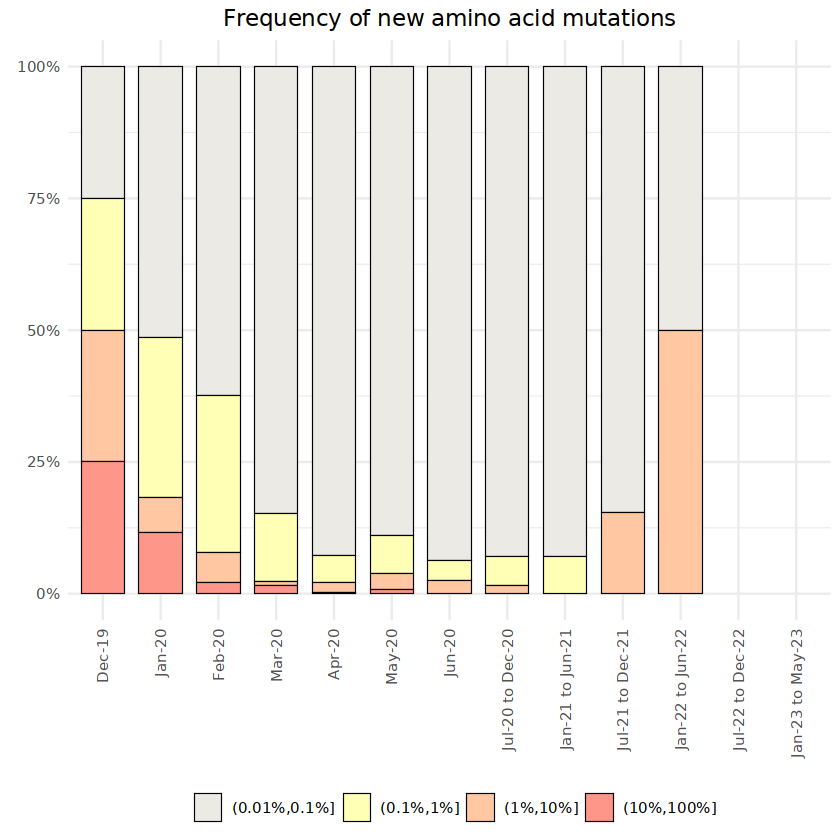

In [100]:
p2.B <- plot2BDF[, c("TimelineLabel", "mutationLabel")] |>
    group_by(TimelineLabel, mutationLabel) |>
    count(.drop = F) |>
    ggplot(aes(x = TimelineLabel, y = n, fill = mutationLabel)) +
    geom_bar(stat = "identity", position = "fill", color = "black", width = 0.75, linewidth = 0.25) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    scale_x_discrete(drop = F) +
    scale_fill_manual(values = rev(c("#FF968A", "#FFC8A2", "#FFFFB5", "#ECEAE4")), 
                      labels = labellerScatter) +
    ggtitle("Frequency of new amino acid mutations") +
    labs(x = element_blank(), y = element_blank()) +
    scale_y_continuous(labels = scales::percent) +
    theme(legend.position = "bottom", 
          legend.title = element_blank(),
          plot.title = element_text(hjust = 0.5))
    # scale_fill_brewer(palette = "Pastel2")
p2.B

### Figure 2C

Warning message:
"Removed 4 rows containing missing values (`geom_bar()`)."


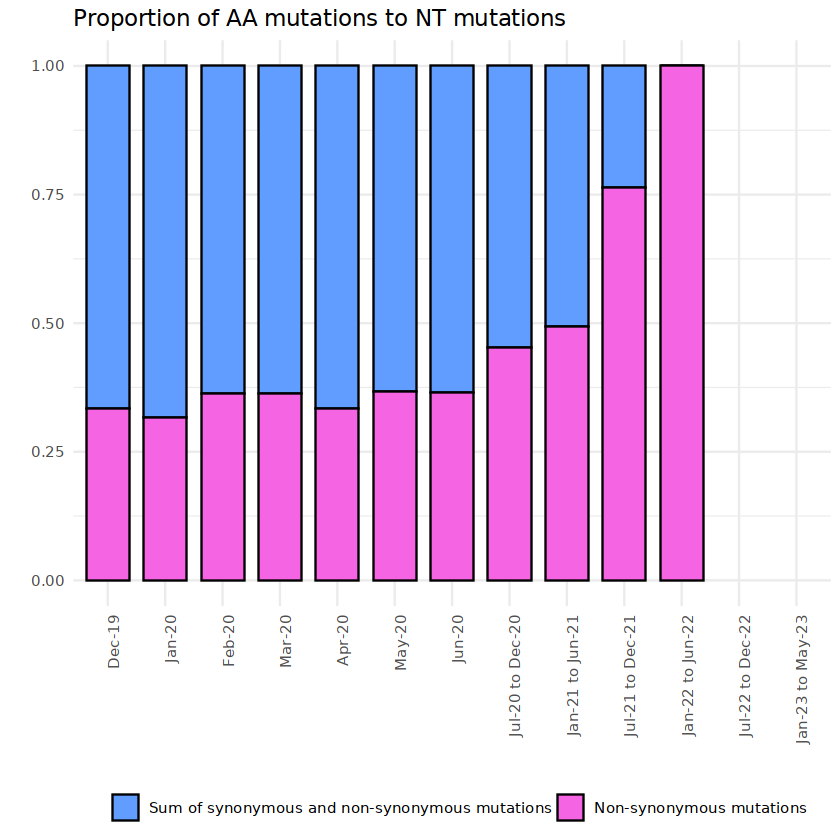

In [101]:
# # default 6 colors used:
# red: "#F8766D" #1
# golden: "#B79F00" #2
# green: "#00BA38" #3
# sky: "#00BFC4" #4
# blue: "#619CFF" #5
# purple: "#F564E3" #6
# peacock blue: "#69b3a2" # from r-graph gallery

# Create the stacked barplot with proportions
p2.C <- DF.pie |>
    filter(name %in% c("py.geqpt01", "r.geqpt01")) |>
    ggplot(aes(x = TimelineLabel, y = countMutations, fill = name)) +
    geom_bar(stat = "identity", position = "fill", color = "black", width = 0.75) +
    labs(x = "", y = "", title = "Proportion of AA mutations to NT mutations") +
    scale_fill_manual(
        values = c("py.geqpt01" = "#619CFF", "r.geqpt01" = "#F564E3"),
        labels = c("py.geqpt01" = "Sum of synonymous and non-synonymous mutations", "r.geqpt01" = "Non-synonymous mutations")
    ) +
    theme_minimal() +
#     theme(axis.text.x = element_text(angle = 45, hjust = 1))
    theme(axis.text.x = element_text(angle = 90, hjust = 1), 
          legend.position = "bottom", 
          legend.title = element_blank())

p2.C

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


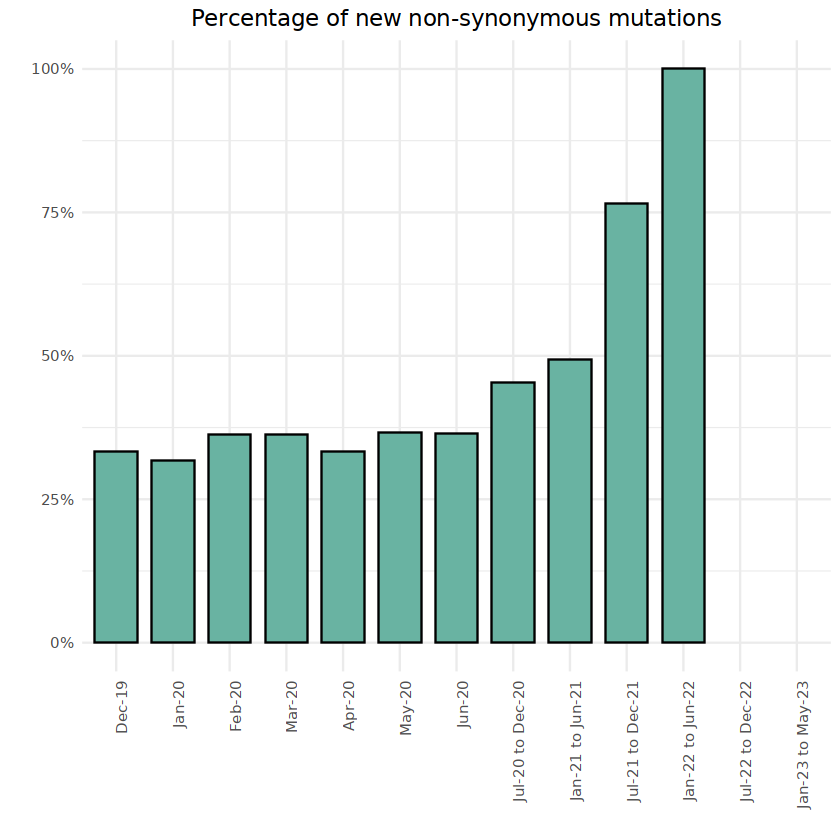

In [102]:
# p2.C <- DF.pie |>
#     filter(name %in% c("py.geqpt01", "r.geqpt01")) |>
#     mutate(prop = countMutations / sum(countMutations), 
#            percentage = 100 * prop) |>
#     filter(name %in% c("r.geqpt01")) |>
#     ggplot(aes(x = TimelineLabel, y = percentage, fill = name)) +
#     geom_bar(stat = "identity", position = "dodge", color = "black", width = 0.75) +
#     labs(x = "", y = "", title = "Percentage of non-synonymous mutations") +
#     scale_fill_manual(
#         values = c("r.geqpt01" = "#69b3a2"),
#         labels = c("r.geqpt01" = "Non-synonymous mutations")
#     ) +
#     theme_minimal() +
#     theme(axis.text.x = element_text(angle = 90, hjust = 1), 
#           legend.position = "None",
#           plot.title = element_text(hjust = 0.5))
# p2.C

p2.C <- DF.pie |>
    filter(name %in% c("py.geqpt01", "r.geqpt01")) |>
    mutate(prop = countMutations / sum(countMutations), 
           percentage = 100 * prop) |>
    filter(name %in% c("r.geqpt01")) |>
    ggplot(aes(x = TimelineLabel, y = prop, fill = name)) +
    geom_bar(stat = "identity", position = "dodge", color = "black", width = 0.75) +
    labs(x = "", y = "", title = "Percentage of new non-synonymous mutations") +
    scale_fill_manual(
        values = c("r.geqpt01" = "#69b3a2"),
        labels = c("r.geqpt01" = "Non-synonymous mutations")
    ) +
    theme_minimal() +
    scale_y_continuous(labels = scales::percent) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1), 
          legend.position = "None",
          plot.title = element_text(hjust = 0.5))
p2.C

### Figure 2E

In [103]:
DF.pie |>
    filter(name %in% c("py.geqpt01", "r.geqpt01")) |>
    select(TimelineLabel, name) |>
    mutate(name = case_when(
        name == "py.geqpt01" ~ "AA >=0.1%",
        name == "r.geqpt01" ~ "AA >=0.01%"
    ))

TimelineLabel    name      
1  Dec-19           AA >=0.1% 
2  Dec-19           AA >=0.01%
3  Jan-20           AA >=0.1% 
4  Jan-20           AA >=0.01%
5  Feb-20           AA >=0.1% 
6  Feb-20           AA >=0.01%
7  Mar-20           AA >=0.1% 
8  Mar-20           AA >=0.01%
9  Apr-20           AA >=0.1% 
10 Apr-20           AA >=0.01%
11 May-20           AA >=0.1% 
12 May-20           AA >=0.01%
13 Jun-20           AA >=0.1% 
14 Jun-20           AA >=0.01%
15 Jul-20 to Dec-20 AA >=0.1% 
16 Jul-20 to Dec-20 AA >=0.01%
17 Jan-21 to Jun-21 AA >=0.1% 
18 Jan-21 to Jun-21 AA >=0.01%
19 Jul-21 to Dec-21 AA >=0.1% 
20 Jul-21 to Dec-21 AA >=0.01%
21 Jan-22 to Jun-22 AA >=0.1% 
22 Jan-22 to Jun-22 AA >=0.01%
23 Jul-22 to Dec-22 AA >=0.1% 
24 Jul-22 to Dec-22 AA >=0.01%
25 Jan-23 to May-23 AA >=0.1% 
26 Jan-23 to May-23 AA >=0.01%

In [104]:
temp1 <- r.subs.geqpt1 |>
    mutate(
        spikeVsRest = case_when(
            region != "Spike" ~ "Rest",
            .default = region
            ),
        flag = "AA >=0.1%",
        TimelineLabel = format(collection_date, format = "%b-%y"),
        TimelineLabel = factor(TimelineLabel, levels = monthLevels),
        spikeVsRest = factor(spikeVsRest, levels = rev(c("Spike", "Rest")))
    )
temp1

aa_subs      collection_date accession_id    
1   E_D72G       2020-03-06      EPI_ISL_644684  
2   E_P71L       2020-02-18      EPI_ISL_10980369
3   E_S55F       2020-03-20      EPI_ISL_17578145
4   E_T11A       2020-04-21      EPI_ISL_644275  
5   E_T9I        2020-01-27      EPI_ISL_17121378
6   E_V62F       2020-03-18      EPI_ISL_422854  
7   M_A2S        2020-01-29      EPI_ISL_430722  
8   M_A63T       2020-01-27      EPI_ISL_17121378
9   M_A81S       2020-03-27      EPI_ISL_582340  
10  M_D3B        2021-01-05      EPI_ISL_838920  
11  M_D3G        2020-02-19      EPI_ISL_6951243 
12  M_D3N        2020-03-31      EPI_ISL_14471084
13  M_F28L       2020-01-14      EPI_ISL_2716627 
14  M_H125Y      2020-01-10      EPI_ISL_8311704 
15  M_I82T       2020-03-10      EPI_ISL_3458197 
16  M_L29F       2020-03-20      EPI_ISL_490511  
17  M_Q19E       2020-01-27      EPI_ISL_17121378
18  M_Q19Z       2020-12-23      EPI_ISL_14320427
19  M_S197N      2020-03-15      EPI_ISL_452406  
20  M_T30I       2020-04-27      EPI_ISL_622514  
21  M_V70L       2020-05-13      EPI_ISL_466847  
22  NS3_A110S    2020-02-14      EPI_ISL_1014733 
23  NS3_A110V    2020-01-29      EPI_ISL_2426018 
24  NS3_A23S     2020-02-12      EPI_ISL_1311093 
25  NS3_A23V     2020-02-07      EPI_ISL_430740  
26  NS3_A31T     2020-03-14      EPI_ISL_427551  
27  NS3_A33S     2020-03-10      EPI_ISL_440476  
28  NS3_A54S     2020-02-14      EPI_ISL_475999  
29  NS3_A54V     2020-02-25      EPI_ISL_414623  
30  NS3_A99V     2020-02-28      EPI_ISL_418206  
... ...          ...             ...             
822 Spike_T478R  2020-06-16      EPI_ISL_525481  
823 Spike_T547I  2020-03-03      EPI_ISL_417070  
824 Spike_T547K  2020-01-27      EPI_ISL_17121378
825 Spike_T572I  2020-03-10      EPI_ISL_1061417 
826 Spike_T716I  2020-02-07      EPI_ISL_1603195 
827 Spike_T719I  2020-03-25      EPI_ISL_536208  
828 Spike_T732A  2020-04-04      EPI_ISL_12416275
829 Spike_T76I   2020-03-06      EPI_ISL_2226159 
830 Spike_T859I  2020-03-06      EPI_ISL_454469  
831 Spike_T859N  2020-04-16      EPI_ISL_3725812 
832 Spike_T95I   2020-01-10      EPI_ISL_8311741 
833 Spike_V1104L 2020-03-14      EPI_ISL_604963  
834 Spike_V1176F 2020-02-10      EPI_ISL_17179369
835 Spike_V1228L 2020-01-24      EPI_ISL_962575  
836 Spike_V1264L 2020-03-12      EPI_ISL_6661895 
837 Spike_V213E  2020-11-02      EPI_ISL_669797  
838 Spike_V213G  2020-03-28      EPI_ISL_12269393
839 Spike_V289I  2020-03-20      EPI_ISL_1383218 
840 Spike_V36F   2020-07-16      EPI_ISL_510460  
841 Spike_V3G    2020-04-03      EPI_ISL_686053  
842 Spike_V445A  2020-03-11      EPI_ISL_455432  
843 Spike_V445P  2021-10-04      EPI_ISL_17532340
844 Spike_V70I   2020-06-16      EPI_ISL_543244  
845 Spike_V83A   2020-05-07      EPI_ISL_805001  
846 Spike_W152C  2020-01-26      EPI_ISL_7946128 
847 Spike_W152L  2020-01-14      EPI_ISL_2716627 
848 Spike_W152R  2020-03-24      EPI_ISL_457761  
849 Spike_W258L  2020-03-07      EPI_ISL_15026408
850 Spike_Y145H  2020-03-13      EPI_ISL_571985  
851 Spike_Y505H  2020-03-28      EPI_ISL_12269393
    location                                      counts  region mutation_name
1   Europe/France/Occitanie/Montpellier             15706 E      D72G         
2   Africa/Zambia/Choma/Macha                       39114 E      P71L         
3   North America/USA/Washington                    14457 E      S55F         
4   Europe/Ireland/Longford                        374240 E      T11A         
5   North America/USA/Oklahoma/Oklahoma City      5433742 E      T9I          
6   Europe/Netherlands                              32247 E      V62F         
7   Asia/China/Beijing                              24539 M      A2S          
8   North America/USA/Oklahoma/Oklahoma City      5437134 M      A63T         
9   North America/Canada/Manitoba                   28602 M      A81S         
10  Europe/United Kingdom/England                   65907 M      D3B          
11  Asia/China/Guangxi/Nanning     

In [105]:
temp2 <- r.subs.geqpt01 |>
    mutate(
        spikeVsRest = case_when(
            region != "Spike" ~ "Rest",
            .default = region
            ),
        flag = "AA >=0.01%",
        TimelineLabel = format(collection_date, format = "%b-%y"),
        TimelineLabel = factor(TimelineLabel, levels = monthLevels),
        spikeVsRest = factor(spikeVsRest, levels = rev(c("Spike", "Rest")))
    )
temp2

aa_subs     collection_date accession_id    
1    E_A41V      2020-04-07      EPI_ISL_442779  
2    E_D72G      2020-03-06      EPI_ISL_644684  
3    E_F26L      2020-04-04      EPI_ISL_450174  
4    E_L18I      2020-12-28      EPI_ISL_6699035 
5    E_L21F      2020-03-03      EPI_ISL_542279  
6    E_L21V      2020-09-02      EPI_ISL_2321501 
7    E_L51I      2020-08-25      EPI_ISL_8904553 
8    E_L73F      2020-03-01      EPI_ISL_2758212 
9    E_P71L      2020-02-18      EPI_ISL_10980369
10   E_P71S      2020-03-15      EPI_ISL_660339  
11   E_R61C      2020-03-24      EPI_ISL_480036  
12   E_R61L      2020-03-20      EPI_ISL_10716749
13   E_S50G      2020-03-15      EPI_ISL_499765  
14   E_S55F      2020-03-20      EPI_ISL_17578145
15   E_S68F      2020-01-01      EPI_ISL_3804266 
16   E_T11A      2020-04-21      EPI_ISL_644275  
17   E_T9I       2020-01-27      EPI_ISL_17121378
18   E_V24L      2020-03-20      EPI_ISL_10716749
19   E_V24M      2020-03-14      EPI_ISL_604556  
20   E_V49L      2020-03-15      EPI_ISL_572166  
21   E_V58F      2020-03-12      EPI_ISL_474925  
22   E_V58I      2020-05-02      EPI_ISL_2790003 
23   E_V5I       2020-04-12      EPI_ISL_1311716 
24   E_V62F      2020-03-18      EPI_ISL_422854  
25   M_A104V     2020-03-26      EPI_ISL_421787  
26   M_A142V     2020-03-17      EPI_ISL_604474  
27   M_A2S       2020-01-29      EPI_ISL_430722  
28   M_A2T       2020-03-16      EPI_ISL_831975  
29   M_A2V       2020-03-08      EPI_ISL_537861  
30   M_A38S      2020-03-28      EPI_ISL_605080  
...  ...         ...             ...             
5182 Spike_V90F  2020-03-01      EPI_ISL_417217  
5183 Spike_V90I  2020-07-28      EPI_ISL_1855410 
5184 Spike_W152C 2020-01-26      EPI_ISL_7946128 
5185 Spike_W152L 2020-01-14      EPI_ISL_2716627 
5186 Spike_W152R 2020-03-24      EPI_ISL_457761  
5187 Spike_W258L 2020-03-07      EPI_ISL_15026408
5188 Spike_W258R 2020-04-03      EPI_ISL_778698  
5189 Spike_W64L  2020-03-23      EPI_ISL_819307  
5190 Spike_W64R  2020-03-30      EPI_ISL_489039  
5191 Spike_Y144F 2020-03-29      EPI_ISL_481644  
5192 Spike_Y144L 2020-04-01      EPI_ISL_763351  
5193 Spike_Y144S 2020-04-24      EPI_ISL_648638  
5194 Spike_Y145D 2020-09-20      EPI_ISL_1018299 
5195 Spike_Y145H 2020-03-13      EPI_ISL_571985  
5196 Spike_Y145N 2020-05-07      EPI_ISL_13597012
5197 Spike_Y145P 2020-04-01      EPI_ISL_763351  
5198 Spike_Y145S 2020-11-30      EPI_ISL_1896112 
5199 Spike_Y145T 2020-03-01      EPI_ISL_464255  
5200 Spike_Y160F 2021-02-05      EPI_ISL_1503060 
5201 Spike_Y200C 2020-05-04      EPI_ISL_481046  
5202 Spike_Y248D 2020-04-05      EPI_ISL_1166095 
5203 Spike_Y248H 2020-03-14      EPI_ISL_17578063
5204 Spike_Y248N 2020-08-08      EPI_ISL_16941578
5205 Spike_Y248S 2020-03-27      EPI_ISL_420726  
5206 Spike_Y28H  2020-02-07      EPI_ISL_582609  
5207 Spike_Y449H 2020-08-21      EPI_ISL_1731545 
5208 Spike_Y449N 2020-03-14      EPI_ISL_417919  
5209 Spike_Y453F 2020-06-07      EPI_ISL_8194874 
5210 Spike_Y505H 2020-03-28      EPI_ISL_12269393
5211 Spike_Y508H 2020-03-05      EPI_ISL_416507  
     location                                         counts  region
1    Europe/United Kingdom/England                       2426 E     
2    Europe/France/Occitanie/Montpellier                15706 E     
3    North America/USA/Louisiana/New Orleans             1278 E     
4    North America/USA/Nebraska                          1782 E     
5    Europe/Italy/Lombardy                              10281 E     
6    North America/USA/Georgia                           2052 E     
7    Europe/Russia/Saint-Petersburg/Saint-Petersburg     1171 E     
8    Asia/India                                          8315 E     
9    Africa/Zambia/Choma/Macha                          39114 E     
10   Europe/France/Auvergne-Rhone-Alpes/Saint-Etienne    8437 E     
11   Asia/Japan/Kanto                                    1374 E     
12   Asia/India/Chhattisgarh/Raipur                      5087 E     
13   Eur

In [106]:
# # old
# temp <- rbind(
#     select(temp1, c("TimelineLabel", "spikeVsRest", "flag", "mutation_name")),
#     select(temp2, c("TimelineLabel", "spikeVsRest", "flag", "mutation_name"))
# )
# temp

In [107]:
# >= 1%
plotDF2A <- temp1
# plotDF2$bins <- cut(
plotDF2A$TimelineLabel <- cut(
    x = plotDF2A$collection_date, 
    breaks = c(
        as_date("2019-12-01"), # Dec 19
        as_date("2020-01-01"),  # Jan 20
        as_date("2020-02-01"),  # Feb 20
        as_date("2020-03-01"),  # Mar 20
        as_date("2020-04-01"),  # Apr 20
        as_date("2020-05-01"),  # May 20
        as_date("2020-06-01"),  # Jun 20
        as_date("2020-07-01"),  # Jul 20
        as_date("2021-01-01"),  # Jan 21
        as_date("2021-07-01"),  # July 21
        as_date("2022-01-01"),  # Jan 22
        as_date("2022-07-01"),  # July 22
        as_date("2023-01-01"),  # Jan 23
        as_date("2023-05-31") # Last recorded date
    ),
    labels = c(
        "Dec-19",
        "Jan-20",
        "Feb-20",
        "Mar-20",
        "Apr-20",
        "May-20",
        "Jun-20",
        "Jul-20 to Dec-20",
        "Jan-21 to Jun-21",
        "Jul-21 to Dec-21",
        "Jan-22 to Jun-22",
        "Jul-22 to Dec-22",
        "Jan-23 to May-23"
    )
)

levels(plotDF2A$TimelineLabel)

plotDF2A


# >= 1%
plotDF2B <- temp2
# plotDF2$bins <- cut(
plotDF2B$TimelineLabel <- cut(
    x = plotDF2B$collection_date, 
    breaks = c(
        as_date("2019-12-01"), # Dec 19
        as_date("2020-01-01"),  # Jan 20
        as_date("2020-02-01"),  # Feb 20
        as_date("2020-03-01"),  # Mar 20
        as_date("2020-04-01"),  # Apr 20
        as_date("2020-05-01"),  # May 20
        as_date("2020-06-01"),  # Jun 20
        as_date("2020-07-01"),  # Jul 20
        as_date("2021-01-01"),  # Jan 21
        as_date("2021-07-01"),  # July 21
        as_date("2022-01-01"),  # Jan 22
        as_date("2022-07-01"),  # July 22
        as_date("2023-01-01"),  # Jan 23
        as_date("2023-05-31") # Last recorded date
    ),
    labels = c(
        "Dec-19",
        "Jan-20",
        "Feb-20",
        "Mar-20",
        "Apr-20",
        "May-20",
        "Jun-20",
        "Jul-20 to Dec-20",
        "Jan-21 to Jun-21",
        "Jul-21 to Dec-21",
        "Jan-22 to Jun-22",
        "Jul-22 to Dec-22",
        "Jan-23 to May-23"
    )
)

levels(plotDF2B$TimelineLabel)

plotDF2B

[1] "Dec-19"           "Jan-20"           "Feb-20"           "Mar-20"          
 [5] "Apr-20"           "May-20"           "Jun-20"           "Jul-20 to Dec-20"
 [9] "Jan-21 to Jun-21" "Jul-21 to Dec-21" "Jan-22 to Jun-22" "Jul-22 to Dec-22"
[13] "Jan-23 to May-23"

aa_subs      collection_date accession_id    
1   E_D72G       2020-03-06      EPI_ISL_644684  
2   E_P71L       2020-02-18      EPI_ISL_10980369
3   E_S55F       2020-03-20      EPI_ISL_17578145
4   E_T11A       2020-04-21      EPI_ISL_644275  
5   E_T9I        2020-01-27      EPI_ISL_17121378
6   E_V62F       2020-03-18      EPI_ISL_422854  
7   M_A2S        2020-01-29      EPI_ISL_430722  
8   M_A63T       2020-01-27      EPI_ISL_17121378
9   M_A81S       2020-03-27      EPI_ISL_582340  
10  M_D3B        2021-01-05      EPI_ISL_838920  
11  M_D3G        2020-02-19      EPI_ISL_6951243 
12  M_D3N        2020-03-31      EPI_ISL_14471084
13  M_F28L       2020-01-14      EPI_ISL_2716627 
14  M_H125Y      2020-01-10      EPI_ISL_8311704 
15  M_I82T       2020-03-10      EPI_ISL_3458197 
16  M_L29F       2020-03-20      EPI_ISL_490511  
17  M_Q19E       2020-01-27      EPI_ISL_17121378
18  M_Q19Z       2020-12-23      EPI_ISL_14320427
19  M_S197N      2020-03-15      EPI_ISL_452406  
20  M_T30I       2020-04-27      EPI_ISL_622514  
21  M_V70L       2020-05-13      EPI_ISL_466847  
22  NS3_A110S    2020-02-14      EPI_ISL_1014733 
23  NS3_A110V    2020-01-29      EPI_ISL_2426018 
24  NS3_A23S     2020-02-12      EPI_ISL_1311093 
25  NS3_A23V     2020-02-07      EPI_ISL_430740  
26  NS3_A31T     2020-03-14      EPI_ISL_427551  
27  NS3_A33S     2020-03-10      EPI_ISL_440476  
28  NS3_A54S     2020-02-14      EPI_ISL_475999  
29  NS3_A54V     2020-02-25      EPI_ISL_414623  
30  NS3_A99V     2020-02-28      EPI_ISL_418206  
... ...          ...             ...             
822 Spike_T478R  2020-06-16      EPI_ISL_525481  
823 Spike_T547I  2020-03-03      EPI_ISL_417070  
824 Spike_T547K  2020-01-27      EPI_ISL_17121378
825 Spike_T572I  2020-03-10      EPI_ISL_1061417 
826 Spike_T716I  2020-02-07      EPI_ISL_1603195 
827 Spike_T719I  2020-03-25      EPI_ISL_536208  
828 Spike_T732A  2020-04-04      EPI_ISL_12416275
829 Spike_T76I   2020-03-06      EPI_ISL_2226159 
830 Spike_T859I  2020-03-06      EPI_ISL_454469  
831 Spike_T859N  2020-04-16      EPI_ISL_3725812 
832 Spike_T95I   2020-01-10      EPI_ISL_8311741 
833 Spike_V1104L 2020-03-14      EPI_ISL_604963  
834 Spike_V1176F 2020-02-10      EPI_ISL_17179369
835 Spike_V1228L 2020-01-24      EPI_ISL_962575  
836 Spike_V1264L 2020-03-12      EPI_ISL_6661895 
837 Spike_V213E  2020-11-02      EPI_ISL_669797  
838 Spike_V213G  2020-03-28      EPI_ISL_12269393
839 Spike_V289I  2020-03-20      EPI_ISL_1383218 
840 Spike_V36F   2020-07-16      EPI_ISL_510460  
841 Spike_V3G    2020-04-03      EPI_ISL_686053  
842 Spike_V445A  2020-03-11      EPI_ISL_455432  
843 Spike_V445P  2021-10-04      EPI_ISL_17532340
844 Spike_V70I   2020-06-16      EPI_ISL_543244  
845 Spike_V83A   2020-05-07      EPI_ISL_805001  
846 Spike_W152C  2020-01-26      EPI_ISL_7946128 
847 Spike_W152L  2020-01-14      EPI_ISL_2716627 
848 Spike_W152R  2020-03-24      EPI_ISL_457761  
849 Spike_W258L  2020-03-07      EPI_ISL_15026408
850 Spike_Y145H  2020-03-13      EPI_ISL_571985  
851 Spike_Y505H  2020-03-28      EPI_ISL_12269393
    location                                      counts  region mutation_name
1   Europe/France/Occitanie/Montpellier             15706 E      D72G         
2   Africa/Zambia/Choma/Macha                       39114 E      P71L         
3   North America/USA/Washington                    14457 E      S55F         
4   Europe/Ireland/Longford                        374240 E      T11A         
5   North America/USA/Oklahoma/Oklahoma City      5433742 E      T9I          
6   Europe/Netherlands                              32247 E      V62F         
7   Asia/China/Beijing                              24539 M      A2S          
8   North America/USA/Oklahoma/Oklahoma City      5437134 M      A63T         
9   North America/Canada/Manitoba                   28602 M      A81S         
10  Europe/United Kingdom/England                   65907 M      D3B          
11  Asia/China/Guangxi/Nanning     

[1] "Dec-19"           "Jan-20"           "Feb-20"           "Mar-20"          
 [5] "Apr-20"           "May-20"           "Jun-20"           "Jul-20 to Dec-20"
 [9] "Jan-21 to Jun-21" "Jul-21 to Dec-21" "Jan-22 to Jun-22" "Jul-22 to Dec-22"
[13] "Jan-23 to May-23"

aa_subs     collection_date accession_id    
1    E_A41V      2020-04-07      EPI_ISL_442779  
2    E_D72G      2020-03-06      EPI_ISL_644684  
3    E_F26L      2020-04-04      EPI_ISL_450174  
4    E_L18I      2020-12-28      EPI_ISL_6699035 
5    E_L21F      2020-03-03      EPI_ISL_542279  
6    E_L21V      2020-09-02      EPI_ISL_2321501 
7    E_L51I      2020-08-25      EPI_ISL_8904553 
8    E_L73F      2020-03-01      EPI_ISL_2758212 
9    E_P71L      2020-02-18      EPI_ISL_10980369
10   E_P71S      2020-03-15      EPI_ISL_660339  
11   E_R61C      2020-03-24      EPI_ISL_480036  
12   E_R61L      2020-03-20      EPI_ISL_10716749
13   E_S50G      2020-03-15      EPI_ISL_499765  
14   E_S55F      2020-03-20      EPI_ISL_17578145
15   E_S68F      2020-01-01      EPI_ISL_3804266 
16   E_T11A      2020-04-21      EPI_ISL_644275  
17   E_T9I       2020-01-27      EPI_ISL_17121378
18   E_V24L      2020-03-20      EPI_ISL_10716749
19   E_V24M      2020-03-14      EPI_ISL_604556  
20   E_V49L      2020-03-15      EPI_ISL_572166  
21   E_V58F      2020-03-12      EPI_ISL_474925  
22   E_V58I      2020-05-02      EPI_ISL_2790003 
23   E_V5I       2020-04-12      EPI_ISL_1311716 
24   E_V62F      2020-03-18      EPI_ISL_422854  
25   M_A104V     2020-03-26      EPI_ISL_421787  
26   M_A142V     2020-03-17      EPI_ISL_604474  
27   M_A2S       2020-01-29      EPI_ISL_430722  
28   M_A2T       2020-03-16      EPI_ISL_831975  
29   M_A2V       2020-03-08      EPI_ISL_537861  
30   M_A38S      2020-03-28      EPI_ISL_605080  
...  ...         ...             ...             
5182 Spike_V90F  2020-03-01      EPI_ISL_417217  
5183 Spike_V90I  2020-07-28      EPI_ISL_1855410 
5184 Spike_W152C 2020-01-26      EPI_ISL_7946128 
5185 Spike_W152L 2020-01-14      EPI_ISL_2716627 
5186 Spike_W152R 2020-03-24      EPI_ISL_457761  
5187 Spike_W258L 2020-03-07      EPI_ISL_15026408
5188 Spike_W258R 2020-04-03      EPI_ISL_778698  
5189 Spike_W64L  2020-03-23      EPI_ISL_819307  
5190 Spike_W64R  2020-03-30      EPI_ISL_489039  
5191 Spike_Y144F 2020-03-29      EPI_ISL_481644  
5192 Spike_Y144L 2020-04-01      EPI_ISL_763351  
5193 Spike_Y144S 2020-04-24      EPI_ISL_648638  
5194 Spike_Y145D 2020-09-20      EPI_ISL_1018299 
5195 Spike_Y145H 2020-03-13      EPI_ISL_571985  
5196 Spike_Y145N 2020-05-07      EPI_ISL_13597012
5197 Spike_Y145P 2020-04-01      EPI_ISL_763351  
5198 Spike_Y145S 2020-11-30      EPI_ISL_1896112 
5199 Spike_Y145T 2020-03-01      EPI_ISL_464255  
5200 Spike_Y160F 2021-02-05      EPI_ISL_1503060 
5201 Spike_Y200C 2020-05-04      EPI_ISL_481046  
5202 Spike_Y248D 2020-04-05      EPI_ISL_1166095 
5203 Spike_Y248H 2020-03-14      EPI_ISL_17578063
5204 Spike_Y248N 2020-08-08      EPI_ISL_16941578
5205 Spike_Y248S 2020-03-27      EPI_ISL_420726  
5206 Spike_Y28H  2020-02-07      EPI_ISL_582609  
5207 Spike_Y449H 2020-08-21      EPI_ISL_1731545 
5208 Spike_Y449N 2020-03-14      EPI_ISL_417919  
5209 Spike_Y453F 2020-06-07      EPI_ISL_8194874 
5210 Spike_Y505H 2020-03-28      EPI_ISL_12269393
5211 Spike_Y508H 2020-03-05      EPI_ISL_416507  
     location                                         counts  region
1    Europe/United Kingdom/England                       2426 E     
2    Europe/France/Occitanie/Montpellier                15706 E     
3    North America/USA/Louisiana/New Orleans             1278 E     
4    North America/USA/Nebraska                          1782 E     
5    Europe/Italy/Lombardy                              10281 E     
6    North America/USA/Georgia                           2052 E     
7    Europe/Russia/Saint-Petersburg/Saint-Petersburg     1171 E     
8    Asia/India                                          8315 E     
9    Africa/Zambia/Choma/Macha                          39114 E     
10   Europe/France/Auvergne-Rhone-Alpes/Saint-Etienne    8437 E     
11   Asia/Japan/Kanto                                    1374 E     
12   Asia/India/Chhattisgarh/Raipur                      5087 E     
13   Eur

In [108]:
temp <- rbind(
    select(plotDF2A, c("TimelineLabel", "spikeVsRest", "flag", "mutation_name")),
    select(plotDF2B, c("TimelineLabel", "spikeVsRest", "flag", "mutation_name"))
)
temp

TimelineLabel    spikeVsRest flag       mutation_name
1    Mar-20           Rest        AA >=0.1%  D72G         
2    Feb-20           Rest        AA >=0.1%  P71L         
3    Mar-20           Rest        AA >=0.1%  S55F         
4    Apr-20           Rest        AA >=0.1%  T11A         
5    Jan-20           Rest        AA >=0.1%  T9I          
6    Mar-20           Rest        AA >=0.1%  V62F         
7    Jan-20           Rest        AA >=0.1%  A2S          
8    Jan-20           Rest        AA >=0.1%  A63T         
9    Mar-20           Rest        AA >=0.1%  A81S         
10   Jan-21 to Jun-21 Rest        AA >=0.1%  D3B          
11   Feb-20           Rest        AA >=0.1%  D3G          
12   Mar-20           Rest        AA >=0.1%  D3N          
13   Jan-20           Rest        AA >=0.1%  F28L         
14   Jan-20           Rest        AA >=0.1%  H125Y        
15   Mar-20           Rest        AA >=0.1%  I82T         
16   Mar-20           Rest        AA >=0.1%  L29F         
17   Jan-20           Rest        AA >=0.1%  Q19E         
18   Jul-20 to Dec-20 Rest        AA >=0.1%  Q19Z         
19   Mar-20           Rest        AA >=0.1%  S197N        
20   Apr-20           Rest        AA >=0.1%  T30I         
21   May-20           Rest        AA >=0.1%  V70L         
22   Feb-20           Rest        AA >=0.1%  A110S        
23   Jan-20           Rest        AA >=0.1%  A110V        
24   Feb-20           Rest        AA >=0.1%  A23S         
25   Feb-20           Rest        AA >=0.1%  A23V         
26   Mar-20           Rest        AA >=0.1%  A31T         
27   Mar-20           Rest        AA >=0.1%  A33S         
28   Feb-20           Rest        AA >=0.1%  A54S         
29   Feb-20           Rest        AA >=0.1%  A54V         
30   Feb-20           Rest        AA >=0.1%  A99V         
...  ...              ...         ...        ...          
6033 Mar-20           Spike       AA >=0.01% V90F         
6034 Jul-20 to Dec-20 Spike       AA >=0.01% V90I         
6035 Jan-20           Spike       AA >=0.01% W152C        
6036 Jan-20           Spike       AA >=0.01% W152L        
6037 Mar-20           Spike       AA >=0.01% W152R        
6038 Mar-20           Spike       AA >=0.01% W258L        
6039 Apr-20           Spike       AA >=0.01% W258R        
6040 Mar-20           Spike       AA >=0.01% W64L         
6041 Mar-20           Spike       AA >=0.01% W64R         
6042 Mar-20           Spike       AA >=0.01% Y144F        
6043 Apr-20           Spike       AA >=0.01% Y144L        
6044 Apr-20           Spike       AA >=0.01% Y144S        
6045 Jul-20 to Dec-20 Spike       AA >=0.01% Y145D        
6046 Mar-20           Spike       AA >=0.01% Y145H        
6047 May-20           Spike       AA >=0.01% Y145N        
6048 Apr-20           Spike       AA >=0.01% Y145P        
6049 Jul-20 to Dec-20 Spike       AA >=0.01% Y145S        
6050 Mar-20           Spike       AA >=0.01% Y145T        
6051 Jan-21 to Jun-21 Spike       AA >=0.01% Y160F        
6052 May-20           Spike       AA >=0.01% Y200C        
6053 Apr-20           Spike       AA >=0.01% Y248D        
6054 Mar-20           Spike       AA >=0.01% Y248H        
6055 Jul-20 to Dec-20 Spike       AA >=0.01% Y248N        
6056 Mar-20           Spike       AA >=0.01% Y248S        
6057 Feb-20           Spike       AA >=0.01% Y28H         
6058 Jul-20 to Dec-20 Spike       AA >=0.01% Y449H        
6059 Mar-20           Spike       AA >=0.01% Y449N        
6060 Jun-20           Spike       AA >=0.01% Y453F        
6061 Mar-20           Spike       AA >=0.01% Y505H        
6062 Mar-20           Spike       AA >=0.01% Y508H

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


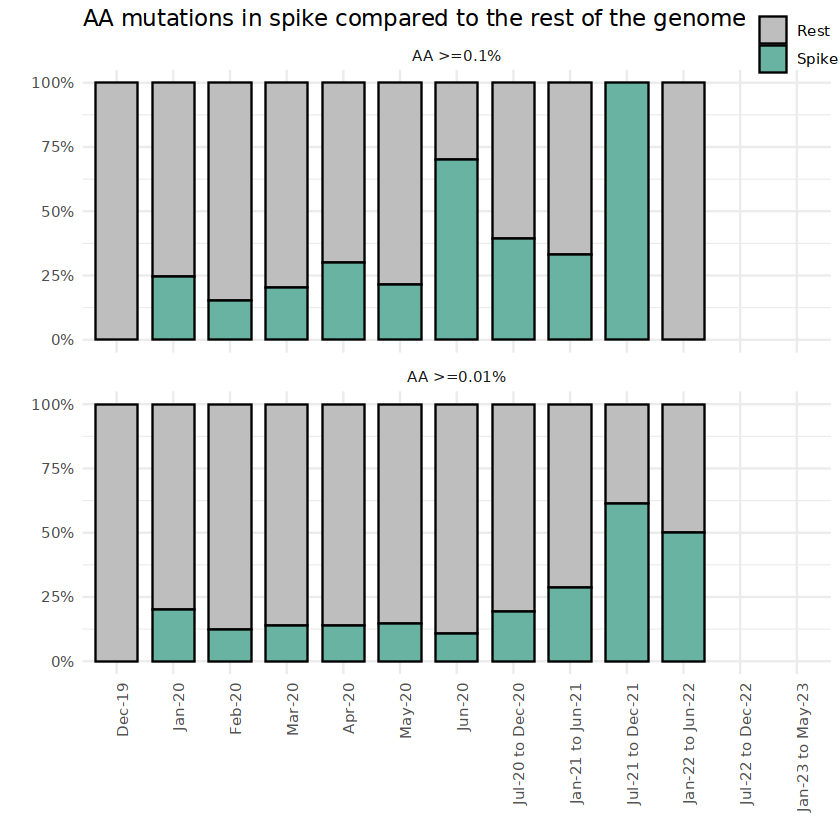

In [109]:
p2.E <- temp |>
#     mutate(TimelineLabel = factor(TimelineLabel, levels = monthLevels)) |>
    group_by(TimelineLabel, flag, spikeVsRest) |>
    count() |>
    ggplot(aes(x = TimelineLabel, y = n, fill = spikeVsRest)) +
    geom_bar(stat = "identity", position = "fill", color = "black", width = 0.75) +
    labs(x = "", y = "", title = "AA mutations in spike compared to the rest of the genome") +
    scale_fill_discrete(drop=FALSE) +
    scale_x_discrete(drop=FALSE) +
    scale_fill_manual(
        values = c("Spike" = "#69b3a2", "Rest" = "grey")
    ) +
    theme_minimal() +
    scale_y_continuous(labels = scales::percent) +
#     theme(axis.text.x = element_text(angle = 45, hjust = 1))
    theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position = c(1.02, 1.12), legend.justification = c(1,1), legend.title = element_blank()) +
    facet_wrap(~factor(flag, levels = c("AA >=0.1%", "AA >=0.01%")), ncol = 1, scales = "fixed")  # Create two stacked bars for each flag

p2.E

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


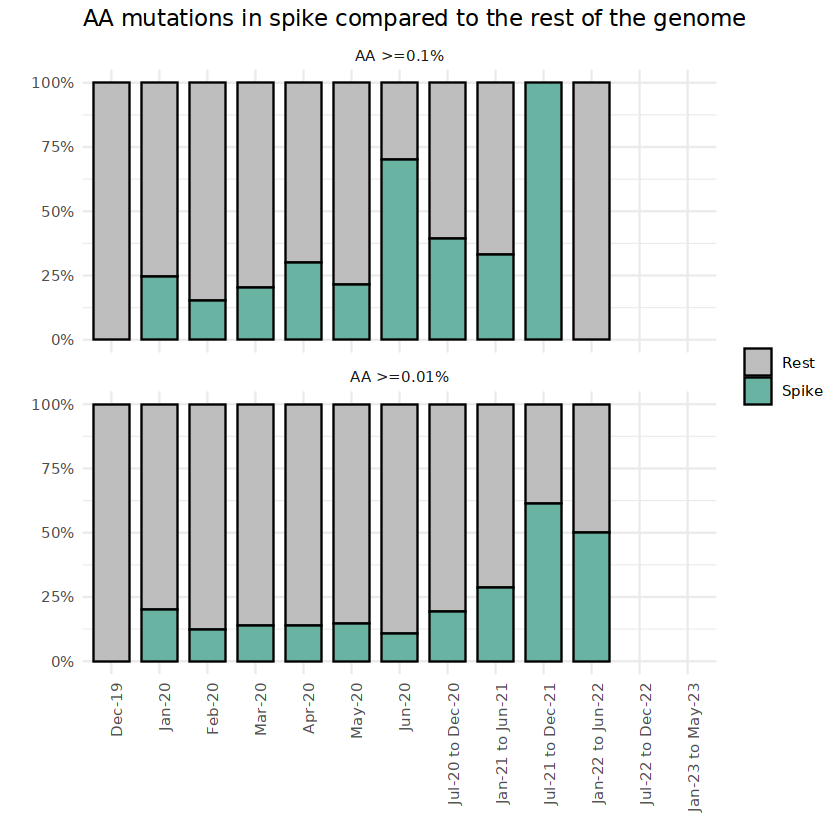

In [110]:
p2.E <- temp |>
#     mutate(TimelineLabel = factor(TimelineLabel, levels = monthLevels)) |>
    group_by(TimelineLabel, flag, spikeVsRest) |>
    count() |>
    ggplot(aes(x = TimelineLabel, y = n, fill = spikeVsRest)) +
    geom_bar(stat = "identity", position = "fill", color = "black", width = 0.75) +
    labs(x = "", y = "", title = "AA mutations in spike compared to the rest of the genome") +
    scale_fill_discrete(drop=FALSE) +
    scale_x_discrete(drop=FALSE) +
    scale_fill_manual(
        values = c("Spike" = "#69b3a2", "Rest" = "grey")
    ) +
    theme_minimal() +
    scale_y_continuous(labels = scales::percent) +
#     theme(axis.text.x = element_text(angle = 45, hjust = 1))
    theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.title = element_blank()) +
    facet_wrap(~factor(flag, levels = c("AA >=0.1%", "AA >=0.01%")), ncol = 1, scales = "fixed")  # Create two stacked bars for each flag
p2.E

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


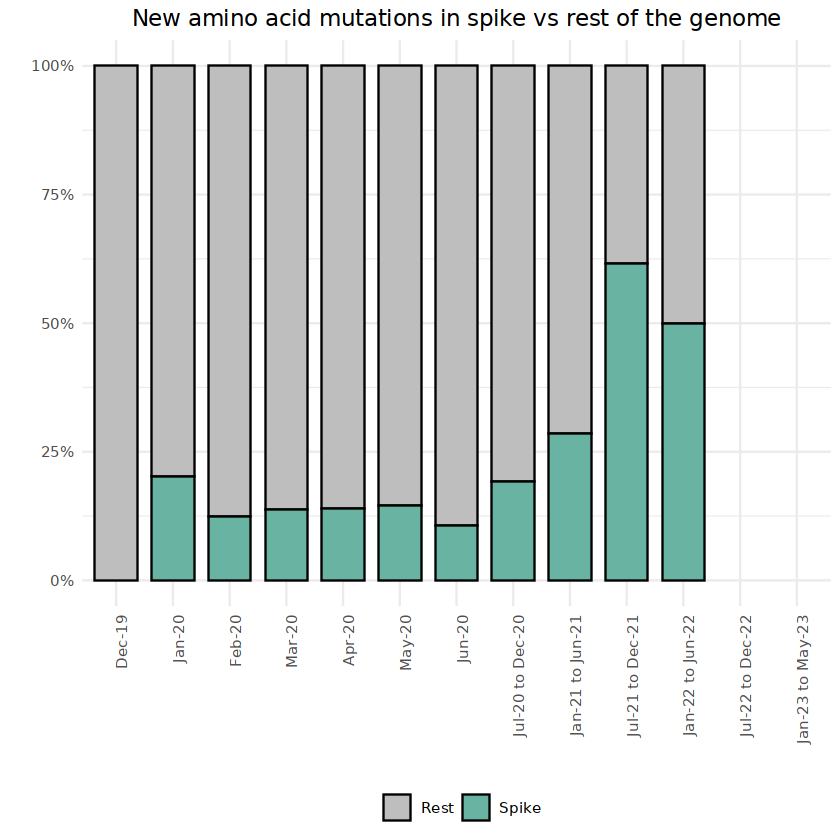

In [111]:
p2.E <- plotDF2B |>
#     mutate(TimelineLabel = factor(TimelineLabel, levels = monthLevels)) |>
    group_by(TimelineLabel, flag, spikeVsRest) |>
    count() |>
    ggplot(aes(x = TimelineLabel, y = n, fill = spikeVsRest)) +
    geom_bar(stat = "identity", position = "fill", color = "black", width = 0.75) +
    labs(x = "", y = "", title = "New amino acid mutations in spike vs rest of the genome") +
    scale_fill_discrete(drop=FALSE) +
    scale_x_discrete(drop=FALSE) +
    scale_fill_manual(
        values = c("Spike" = "#69b3a2", "Rest" = "grey")
    ) +
    theme_minimal() +
    scale_y_continuous(labels = scales::percent) +
#     theme(axis.text.x = element_text(angle = 45, hjust = 1))
    theme(axis.text.x = element_text(angle = 90, hjust = 1), 
          legend.position = "bottom", 
          legend.title = element_blank(), 
          plot.title = element_text(hjust = 0.5))
#     theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.title = element_blank()) #+
#     facet_wrap(~factor(flag, levels = c("AA >=0.1%", "AA >=0.01%")), ncol = 1, scales = "fixed")  # Create two stacked bars for each flag
p2.E

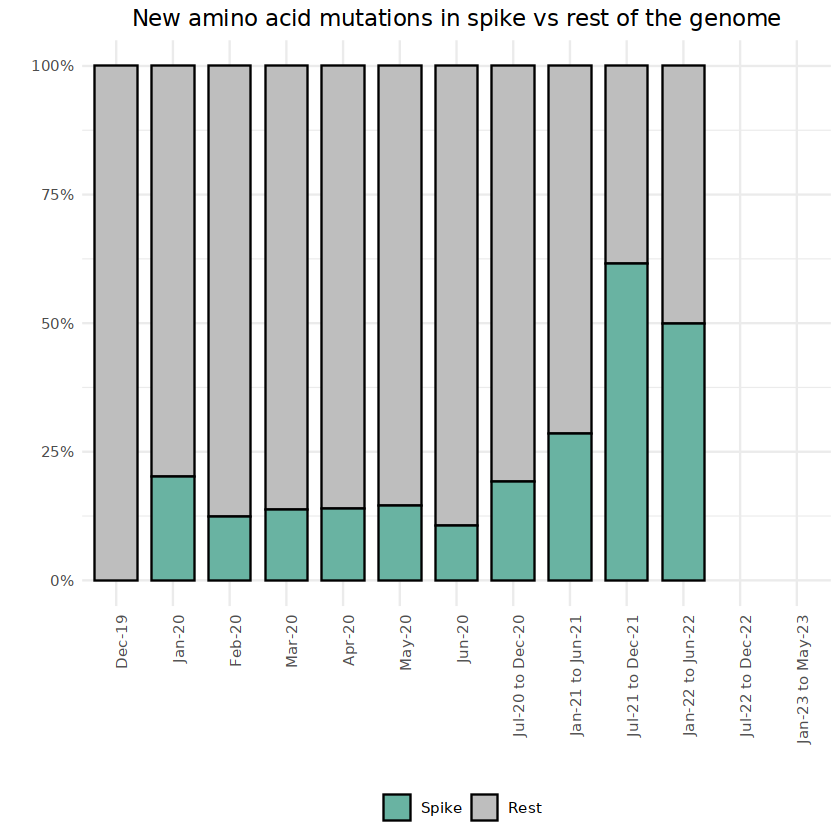

In [112]:
p2.E <- p2.E + guides(fill = guide_legend(reverse=TRUE))
p2.E

### Figure 2F

In [113]:
plotDF2F.spike <- temp |>
    group_by(TimelineLabel, flag, spikeVsRest) |>
    count() |>
    filter(spikeVsRest == "Spike" & flag == "AA >=0.01%") |>
    rename(n.spike = n)
plotDF2F.spike

TimelineLabel    flag       spikeVsRest n.spike
1  Jan-20           AA >=0.01% Spike        52    
2  Feb-20           AA >=0.01% Spike        52    
3  Mar-20           AA >=0.01% Spike       390    
4  Apr-20           AA >=0.01% Spike       114    
5  May-20           AA >=0.01% Spike        37    
6  Jun-20           AA >=0.01% Spike        17    
7  Jul-20 to Dec-20 AA >=0.01% Spike        76    
8  Jan-21 to Jun-21 AA >=0.01% Spike        12    
9  Jul-21 to Dec-21 AA >=0.01% Spike         8    
10 Jan-22 to Jun-22 AA >=0.01% Spike         1

In [114]:
plotDF2F.all <- temp |>
    group_by(TimelineLabel, flag) |>
    count() |>
    filter(flag == "AA >=0.01%") |>
    rename(n.all = n)
plotDF2F.all

TimelineLabel    flag       n.all
1  Dec-19           AA >=0.01%    4 
2  Jan-20           AA >=0.01%  257 
3  Feb-20           AA >=0.01%  422 
4  Mar-20           AA >=0.01% 2841 
5  Apr-20           AA >=0.01%  821 
6  May-20           AA >=0.01%  255 
7  Jun-20           AA >=0.01%  160 
8  Jul-20 to Dec-20 AA >=0.01%  394 
9  Jan-21 to Jun-21 AA >=0.01%   42 
10 Jul-21 to Dec-21 AA >=0.01%   13 
11 Jan-22 to Jun-22 AA >=0.01%    2

In [115]:
plotDF2F <- left_join(plotDF2F.all, plotDF2F.spike) |>
    select(-spikeVsRest) |>
    mutate(
        n.spike = case_when(is.na(n.spike) ~ 0, .default = n.spike),
        percent.spikeMutations = 100 * (n.spike / n.all)
    )
plotDF2F

Joining with `by = join_by(TimelineLabel, flag)`


TimelineLabel    flag       n.all n.spike percent.spikeMutations
1  Dec-19           AA >=0.01%    4    0      0.00000              
2  Jan-20           AA >=0.01%  257   52     20.23346              
3  Feb-20           AA >=0.01%  422   52     12.32227              
4  Mar-20           AA >=0.01% 2841  390     13.72756              
5  Apr-20           AA >=0.01%  821  114     13.88551              
6  May-20           AA >=0.01%  255   37     14.50980              
7  Jun-20           AA >=0.01%  160   17     10.62500              
8  Jul-20 to Dec-20 AA >=0.01%  394   76     19.28934              
9  Jan-21 to Jun-21 AA >=0.01%   42   12     28.57143              
10 Jul-21 to Dec-21 AA >=0.01%   13    8     61.53846              
11 Jan-22 to Jun-22 AA >=0.01%    2    1     50.00000

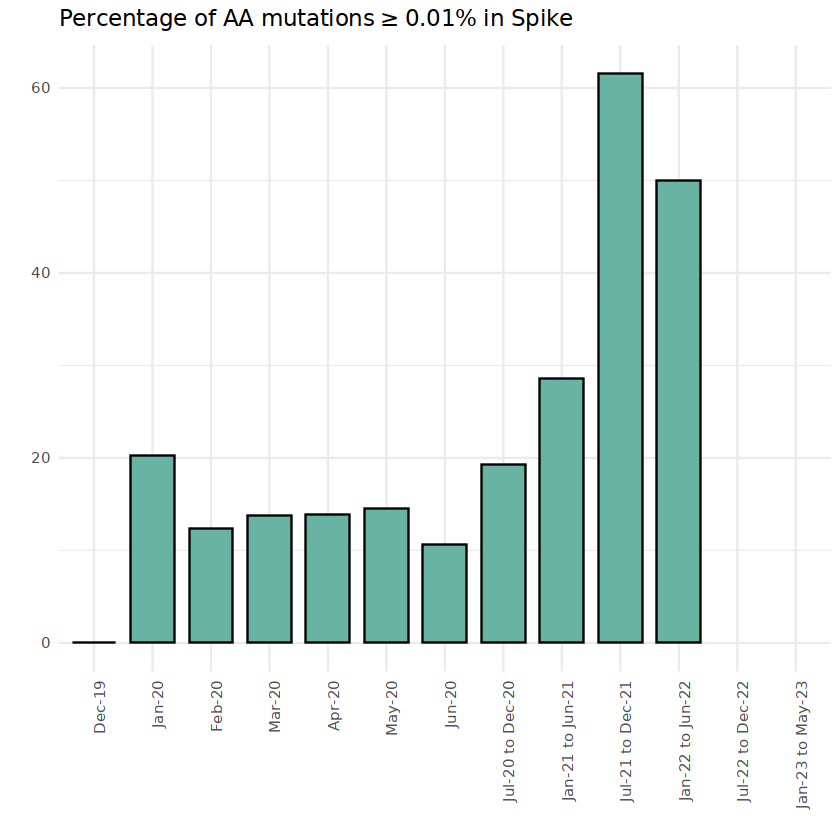

In [116]:
p2.F <- plotDF2F |>
    ggplot(aes(x = TimelineLabel, y = percent.spikeMutations)) +
    geom_bar(stat = "identity", color = "black", fill = "#69b3a2", width = 0.75) +
    labs(x = "", y = "", title = expression("Percentage of AA mutations">="0.01% in Spike")) +
    scale_fill_discrete(drop=FALSE) +
    scale_x_discrete(drop=FALSE) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

p2.F

In [117]:
# # old
# p2.D <- temp |>
# #     mutate(TimelineLabel = factor(TimelineLabel, levels = monthLevels)) |>
#     group_by(TimelineLabel, flag, spikeVsRest) |>
#     count() |>
#     ggplot(aes(x = TimelineLabel, y = n, fill = spikeVsRest)) +
#     geom_bar(stat = "identity", position = "fill") +
#     labs(x = "Timeline", y = "", title = "AA mutations in Spike compared to the rest of the genome") +
#     scale_fill_manual(
#         values = c("Spike" = "#69b3a2", "Rest" = "grey")
#     ) +
#     theme_minimal() +
# #     theme(axis.text.x = element_text(angle = 45, hjust = 1))
#     theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position = c(1.02, 1.12), legend.justification = c(1,1), legend.title = element_blank()) +
#     facet_wrap(~factor(flag, levels = c("AA >=0.1%", "AA >=0.01%")), ncol = 1, scales = "fixed")  # Create two stacked bars for each flag

# p2.D

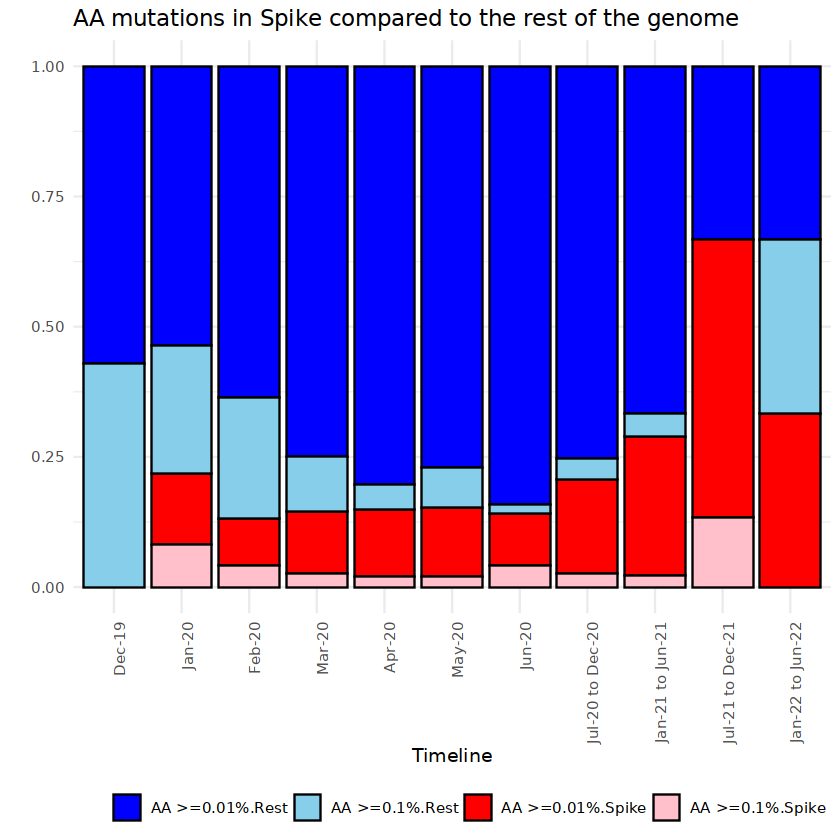

In [118]:
temp |>
#     mutate(TimelineLabel = factor(TimelineLabel, levels = monthLevels)) %>%
    group_by(TimelineLabel, flag, spikeVsRest) %>%
    count() %>%
    ggplot(aes(x = TimelineLabel, y = n, fill = interaction(flag, spikeVsRest))) +  # Use interaction for fill
    geom_bar(stat = "identity", position = 'fill', color = "black") +
    labs(x = "Timeline", y = "", title = "AA mutations in Spike compared to the rest of the genome") +
    scale_fill_manual(
    values = c(
      "AA >=0.01%.Rest" = "blue", 
      "AA >=0.01%.Spike" = "red", 
      "AA >=0.1%.Rest" = "skyblue", 
      "AA >=0.1%.Spike" = "pink"
    )
    ) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1), 
        legend.position = "bottom", 
        legend.justification = c(1, 1), 
        legend.title = element_blank())


In [119]:
# # old
# temp |>
#     mutate(TimelineLabel = factor(TimelineLabel, levels = monthLevels)) %>%
#     group_by(TimelineLabel, flag, spikeVsRest) %>%
#     count() %>%
#     ggplot(aes(x = TimelineLabel, y = n, fill = interaction(flag, spikeVsRest))) +  # Use interaction for fill
#     geom_bar(stat = "identity", position = 'fill') +
#     labs(x = "Timeline", y = "", title = "AA mutations in Spike compared to the rest of the genome") +
#     scale_fill_manual(
#     values = c(
#       "AA >=0.01%.Rest" = "blue", 
#       "AA >=0.01%.Spike" = "red", 
#       "AA >=0.1%.Rest" = "skyblue", 
#       "AA >=0.1%.Spike" = "pink"
#     )
#     ) +
#     theme_minimal() +
#     theme(axis.text.x = element_text(angle = 90, hjust = 1), 
#         legend.position = "bottom", 
#         legend.justification = c(1, 1), 
#         legend.title = element_blank())


In [120]:
totalCounts <- temp2 |>
    select(c("TimelineLabel", "spikeVsRest", "flag", "mutation_name")) |>
    group_by(TimelineLabel) |>
    count()
totalCounts

TimelineLabel n   
1  Dec-19           4
2  Jan-20         257
3  Feb-20         422
4  Mar-20        2841
5  Apr-20         821
6  May-20         255
7  Jun-20         160
8  Jul-20         186
9  Aug-20          80
10 Sep-20          34
11 Oct-20          38
12 Nov-20          34
13 Dec-20          22
14 Jan-21          28
15 Feb-21           5
16 Mar-21           3
17 Apr-21           3
18 May-21           1
19 Jun-21           2
20 Jul-21           3
21 Aug-21           2
22 Sep-21           1
23 Oct-21           4
24 Nov-21           2
25 Dec-21           1
26 Jan-22           1
27 Jun-22           1

In [121]:
spikeCounts <- temp2 |>
    select(c("TimelineLabel", "spikeVsRest", "flag", "mutation_name")) |>
    group_by(TimelineLabel, flag, spikeVsRest) |>
    count() |>
    filter(spikeVsRest == "Spike")
spikeCounts

TimelineLabel flag       spikeVsRest n  
1  Jan-20        AA >=0.01% Spike        52
2  Feb-20        AA >=0.01% Spike        52
3  Mar-20        AA >=0.01% Spike       390
4  Apr-20        AA >=0.01% Spike       114
5  May-20        AA >=0.01% Spike        37
6  Jun-20        AA >=0.01% Spike        17
7  Jul-20        AA >=0.01% Spike        34
8  Aug-20        AA >=0.01% Spike        12
9  Sep-20        AA >=0.01% Spike         7
10 Oct-20        AA >=0.01% Spike         9
11 Nov-20        AA >=0.01% Spike        10
12 Dec-20        AA >=0.01% Spike         4
13 Jan-21        AA >=0.01% Spike         9
14 Feb-21        AA >=0.01% Spike         2
15 Apr-21        AA >=0.01% Spike         1
16 Jul-21        AA >=0.01% Spike         2
17 Aug-21        AA >=0.01% Spike         1
18 Oct-21        AA >=0.01% Spike         2
19 Nov-21        AA >=0.01% Spike         2
20 Dec-21        AA >=0.01% Spike         1
21 Jun-22        AA >=0.01% Spike         1

In [122]:
spikePlot <- as.data.frame.character(monthLevels)
spikePlot <- spikePlot |>
    mutate(monthLevels = factor(monthLevels, levels = monthLevels)) |>
    rename(TimelineLabel = monthLevels)
spikePlot

TimelineLabel
1  Dec-19       
2  Jan-20       
3  Feb-20       
4  Mar-20       
5  Apr-20       
6  May-20       
7  Jun-20       
8  Jul-20       
9  Aug-20       
10 Sep-20       
11 Oct-20       
12 Nov-20       
13 Dec-20       
14 Jan-21       
15 Feb-21       
16 Mar-21       
17 Apr-21       
18 May-21       
19 Jun-21       
20 Jul-21       
21 Aug-21       
22 Sep-21       
23 Oct-21       
24 Nov-21       
25 Dec-21       
26 Jan-22       
27 Feb-22       
28 Mar-22       
29 Apr-22       
30 May-22       
31 Jun-22       
32 Jul-22       
33 Aug-22       
34 Sep-22       
35 Oct-22       
36 Nov-22       
37 Dec-22       
38 Jan-23       
39 Feb-23       
40 Mar-23       
41 Apr-23       
42 May-23

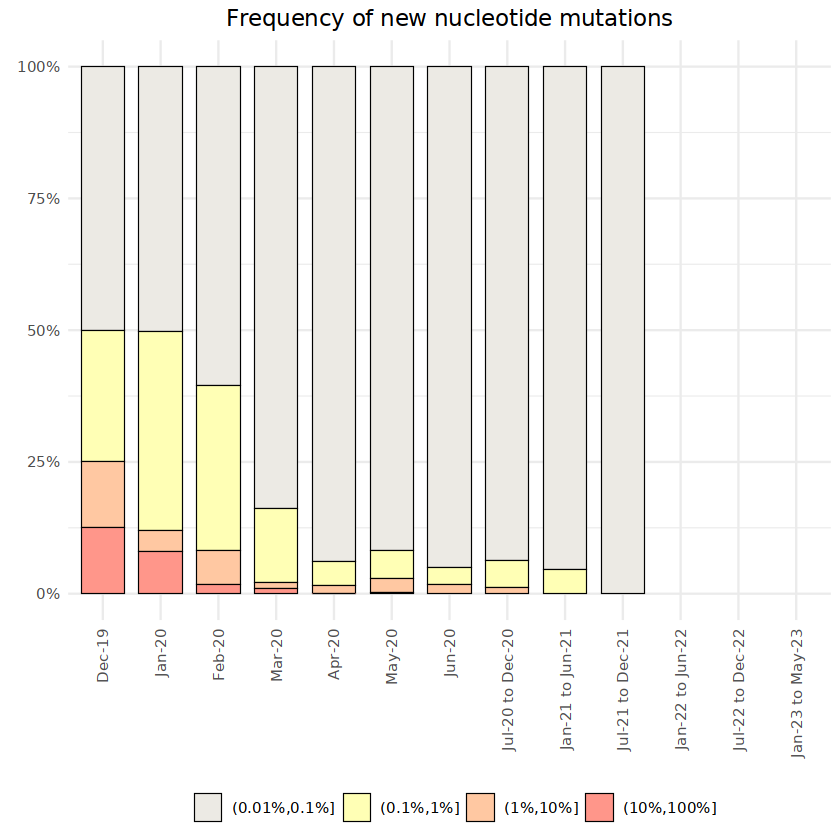

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


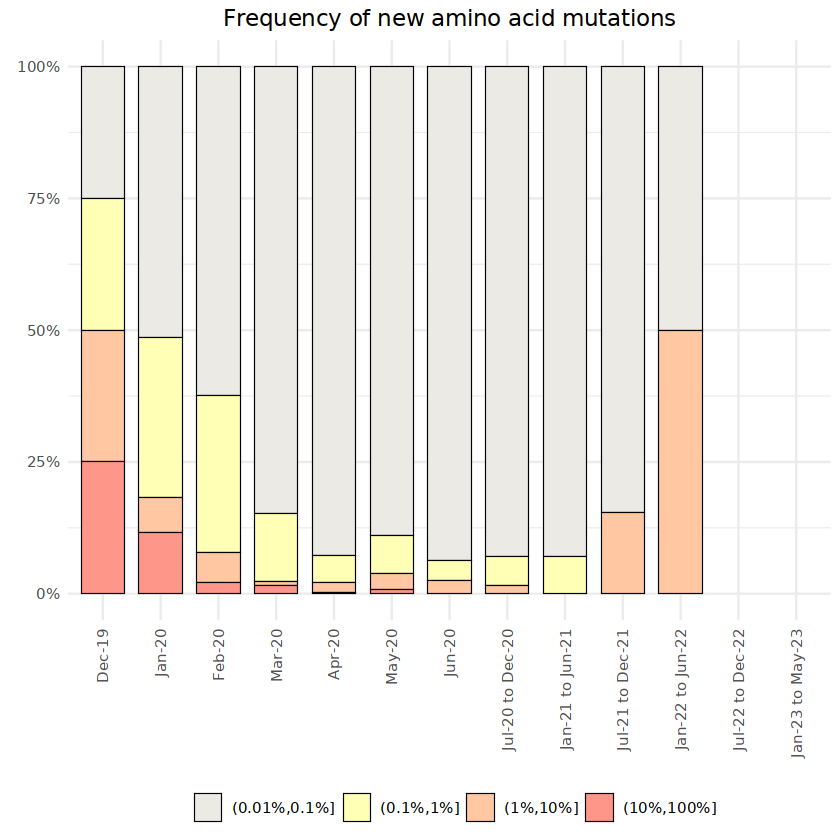

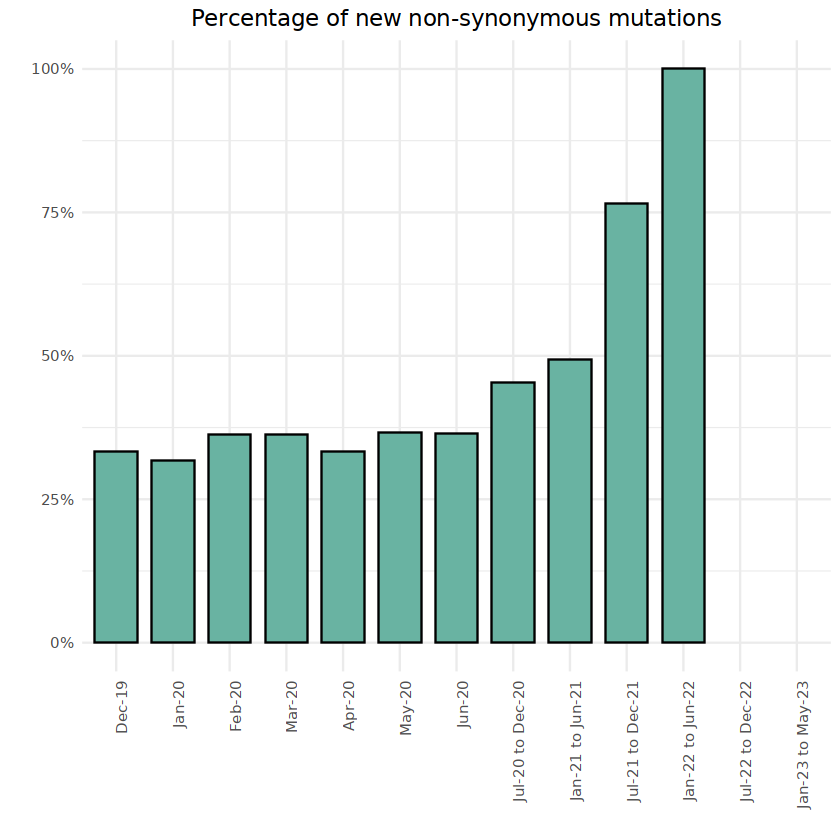

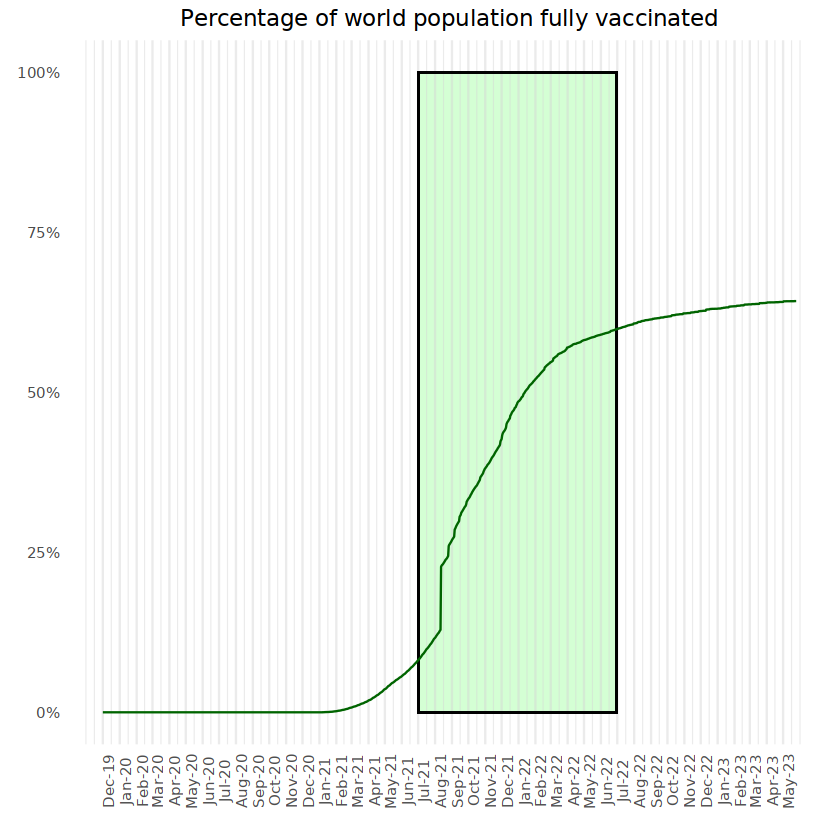

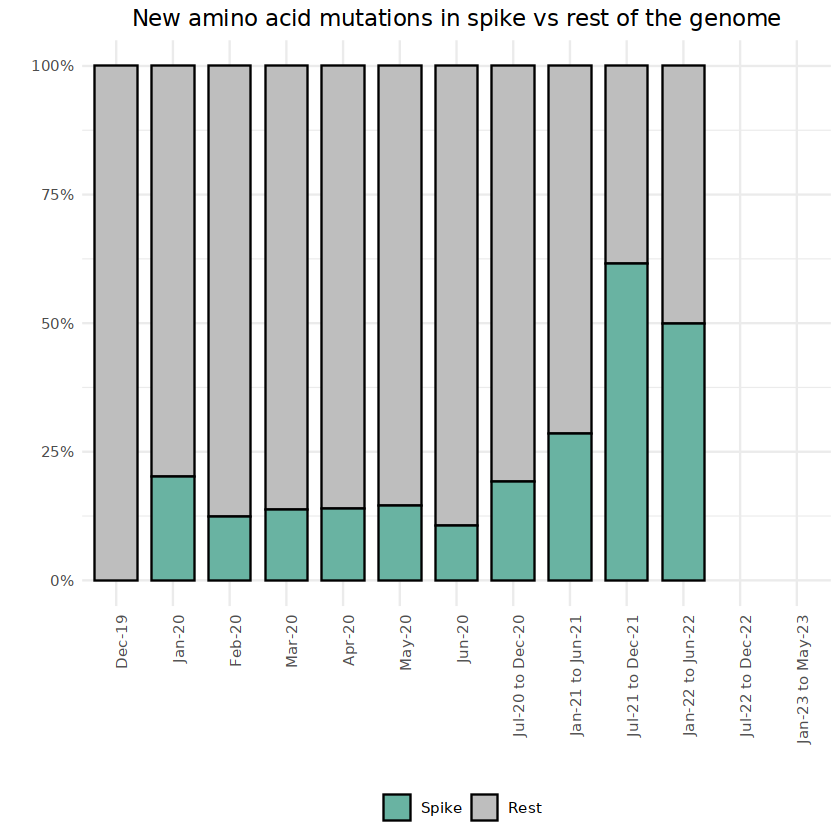

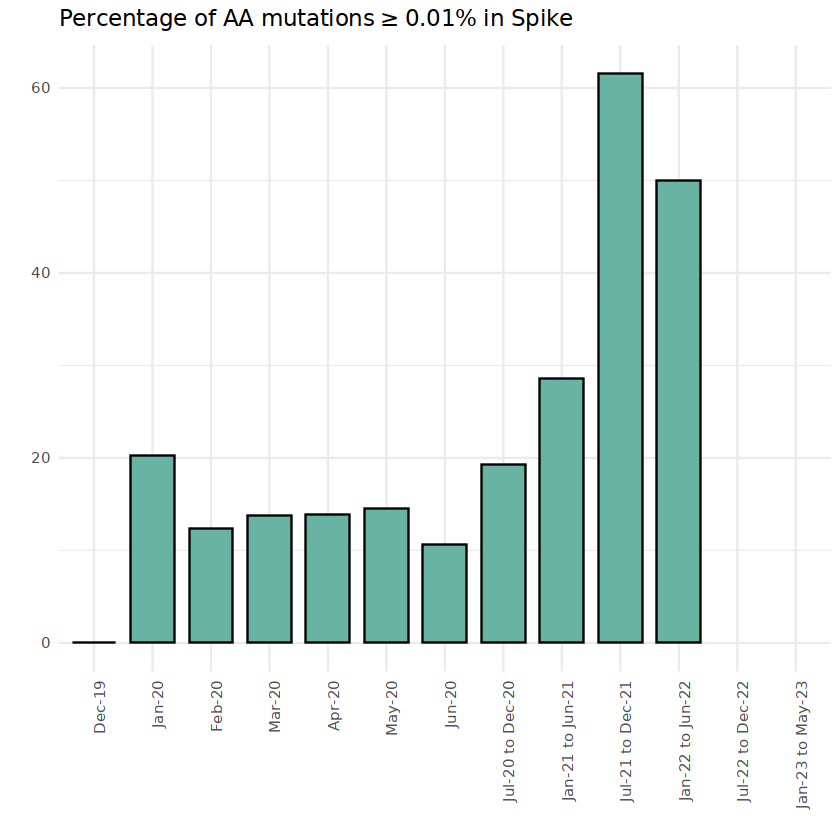

In [123]:
p2.A
p2.B
p2.C
p2.D
p2.E
p2.F

### Patchwork (Panel 2)

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


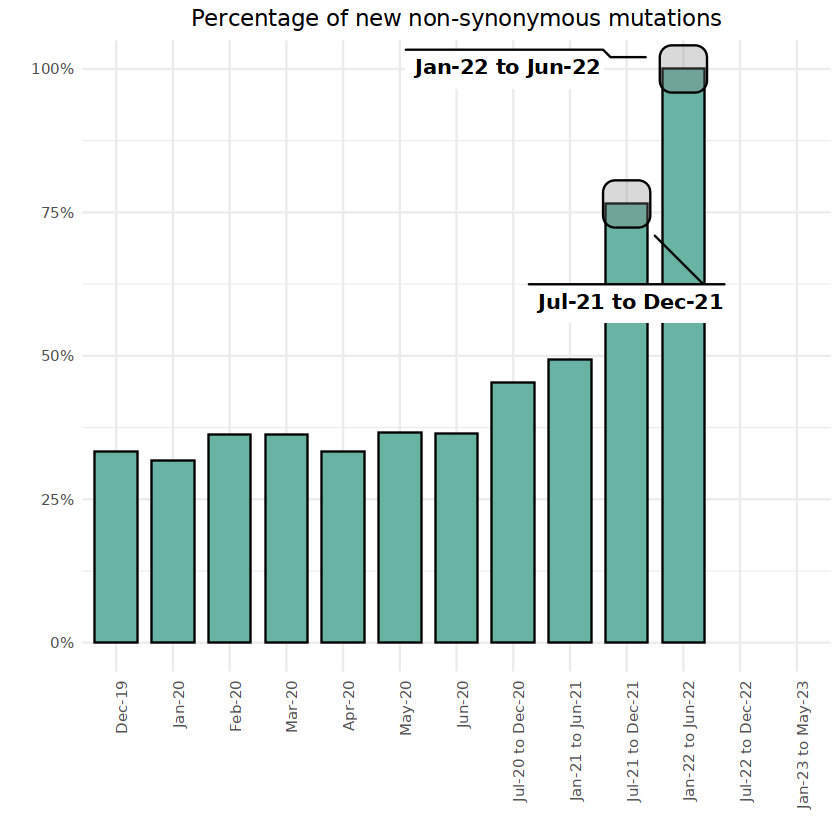

In [124]:
p2.C +
    ggforce::geom_mark_rect(aes(fill = TimelineLabel, 
                                label = TimelineLabel, 
#                                 description = desc,
                                filter = TimelineLabel %in% c("Jul-21 to Dec-21", "Jan-22 to Jun-22")))

Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


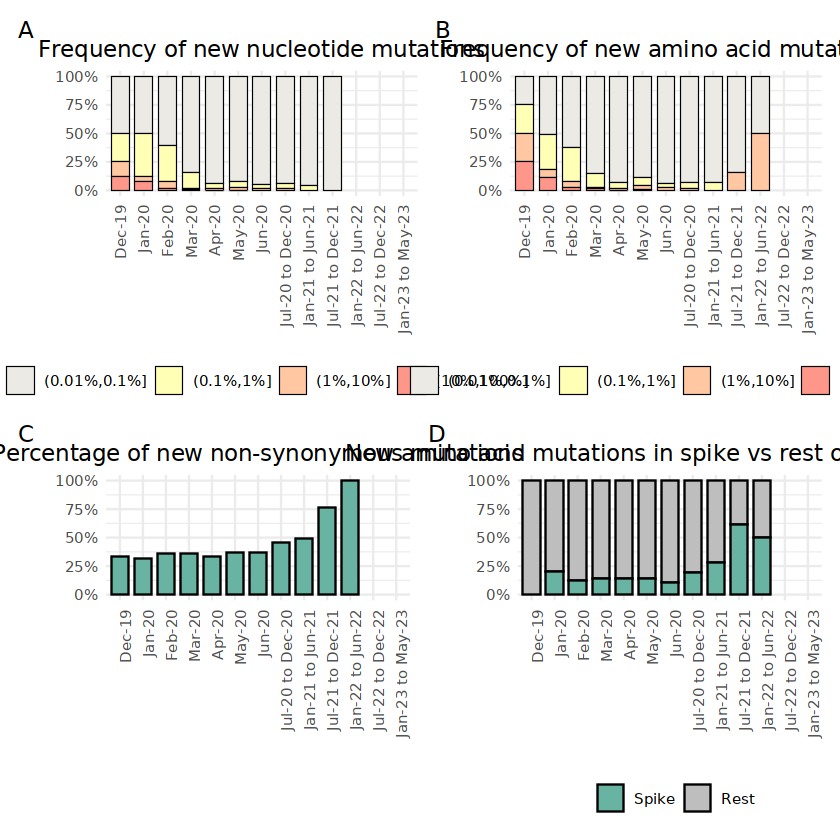

In [125]:
p.fig2 <- (p2.A | p2.B) / (p2.C | p2.E) +
    plot_annotation(tag_levels = 'A')

p.fig2

ggsave("./r_analysis/plots/figures/patchwork.fig2.pdf", 
       plot = p.fig2, 
       width = 12.5, 
       height = 8)

ggsave("./r_analysis/plots/figures/patchwork.fig2.jpeg", 
       plot = p.fig2, 
       dpi = 300,
       width = 12.5, 
       height = 8)

In [126]:
# p.fig2 <- (p2.A | p2.B) / (p2.C | p2.D) / (p2.E | p2.F) +
#     plot_annotation(tag_levels = 'A')

# # # different order of figures in panel
# # p.fig2 <- (p2.A | p2.B) / (p2.C | p2.E) / (p2.F | p2.D) +
# #     plot_annotation(tag_levels = 'A')

# p.fig2

# ggsave("./r_analysis/plots/figures/patchwork.fig2.v01.pdf", plot = p.fig2, width = 12.5, height = 12)

In [127]:
# p.fig2 <- (p2.A | p2.B) / (p2.C | p2.D) + 
#     plot_annotation(tag_levels = 'A')
#     # plot_layout(heights = c(1, 2))

# p.fig2

# ggsave("./r_analysis/plots/figures/patchwork.fig2.pdf", plot = p.fig2, width = 12.5, height = 8)

### Patchwork (Supplementary Panel 1)

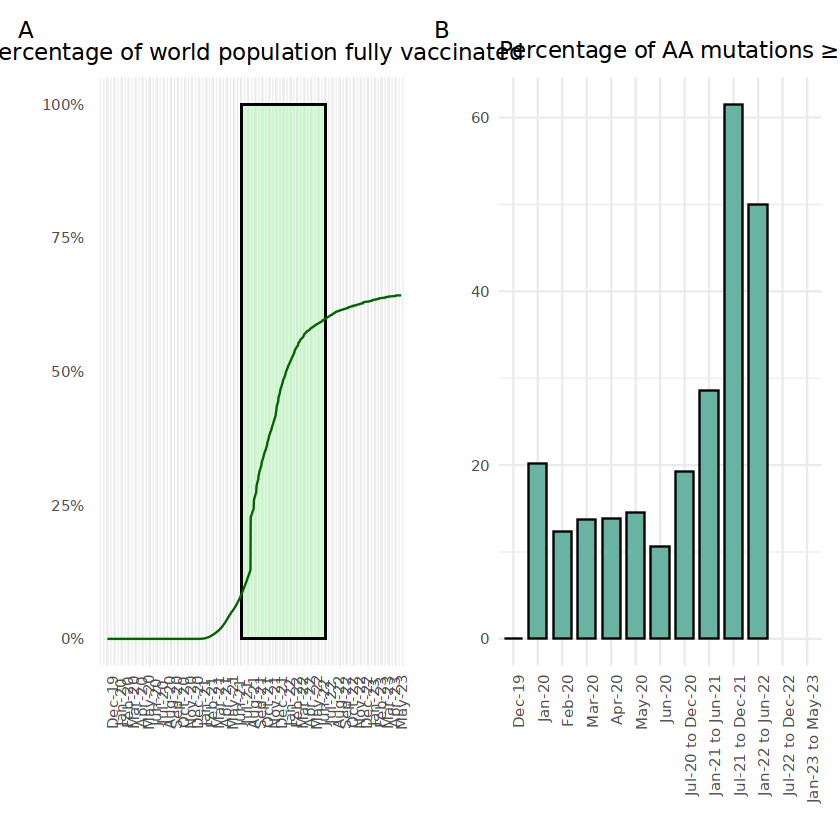

In [128]:
p.supp1 <- (p2.D | p2.F) +
    plot_annotation(tag_levels = 'A')
p.supp1

In [129]:
# ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig1.pdf", plot = p.supp1, width = 12.5, height = 4)
ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig1.pdf", 
       plot = p2.D, 
       width = 6, 
       height = 4)

ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig1.jpeg", 
       plot = p2.D, 
       dpi = 300,
       width = 6, 
       height = 4)

### Infections vs sequences deposited plot with R-squared value

In [130]:
df.supp4 <- read_csv("./raw_data/owid/infection_vs_sequences_data.csv")
df.supp4

Rows: 1265 Columns: 5
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
dbl  (4): total_cases, total_seqs, Cummulative Infections Worldwide (in mill...
date (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


collection_date total_cases total_seqs
1    2019-12-08        1           0       
2    2019-12-09        1           0       
3    2019-12-10        2           0       
4    2019-12-11        2           0       
5    2019-12-12        2           0       
6    2019-12-13        4           0       
7    2019-12-14        4           0       
8    2019-12-15        6           0       
9    2019-12-16        7           0       
10   2019-12-17        9           0       
11   2019-12-18        9           0       
12   2019-12-19       13           0       
13   2019-12-20       20           0       
14   2019-12-21       27           0       
15   2019-12-22       32           0       
16   2019-12-23       39           0       
17   2019-12-24       39           1       
18   2019-12-25       45           1       
19   2019-12-26       47           2       
20   2019-12-27       52           2       
21   2019-12-28       55           2       
22   2019-12-29       63           2       
23   2019-12-30       70          20       
24   2019-12-31       73          20       
25   2020-01-01       87          97       
26   2020-01-02       95          99       
27   2020-01-03      110         100       
28   2020-01-04      124         101       
29   2020-01-05      140         103       
30   2020-01-06      161         103       
...  ...             ...         ...       
1236 2023-04-26      764949361   11729683  
1237 2023-04-27      765016449   11730935  
1238 2023-04-28      765091293   11732180  
1239 2023-04-29      765155266   11732994  
1240 2023-04-30      765379239   11733765  
1241 2023-05-01      765502462   11734997  
1242 2023-05-02      765551924   11736567  
1243 2023-05-03      765612528   11737423  
1244 2023-05-04      765684727   11738188  
1245 2023-05-05      765757042   11738788  
1246 2023-05-06      765804777   11739155  
1247 2023-05-07      765998613   11739484  
1248 2023-05-08      766139014   11740069  
1249 2023-05-09      766195575   11740359  
1250 2023-05-10      766241311   11740459  
1251 2023-05-11      766287448   11740482  
1252 2023-05-12      766332931   11740493  
1253 2023-05-13      766379517   11740509  
1254 2023-05-14      766564494   11740516  
1255 2023-05-15      766692761   11740526  
1256 2023-05-16      766733290   11740544  
1257 2023-05-17      766778278   11740545  
1258 2023-05-18      766818297   11740545  
1259 2023-05-19      766876145   11740545  
1260 2023-05-20      766906847   11740545  
1261 2023-05-21      767007103   11740545  
1262 2023-05-22      767134189   11740545  
1263 2023-05-23      767169321   11740545  
1264 2023-05-24      767211663   11740545  
1265 2023-05-25      767247504   11740545  
     Cummulative Infections Worldwide (in millions)
1    0.000001                                      
2    0.000001                                      
3    0.000002                                      
4    0.000002                                      
5    0.000002                                      
6    0.000004                                      
7    0.000004                                      
8    0.000006                                      
9    0.000007                                      
10   0.000009                                      
11   0.000009                                      
12   0.000013                                      
13   0.000020                                      
14   0.000027                                      
15   0.000032                                      
16   0.000039                                      
17   0.000039                                      
18   0.000045                                      
19   0.000047                                      
20   0.000052                                      
21   0.000055                                      
22   0.000063                                      
23   0.000070                                      
24   0.000073                

Warning message:
"The dot-dot notation (`..rr.label..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(rr.label)` instead."


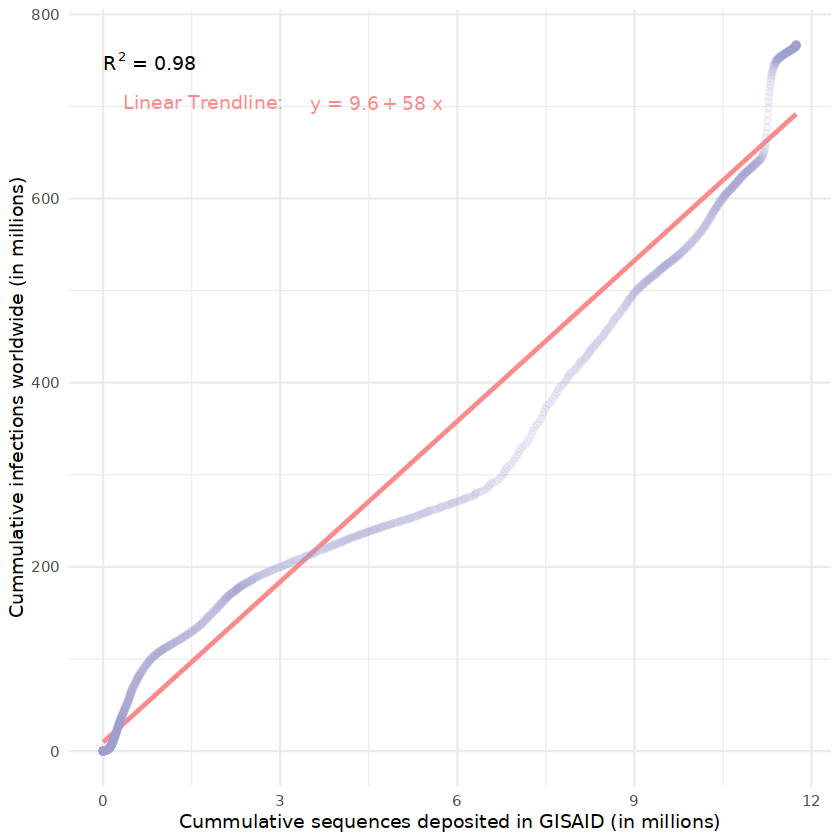

In [131]:
p.supp4 <- df.supp4 |>
    rename("y" = "Cummulative Infections Worldwide (in millions)", 
           "x" = "Cummulative sequences deposited in GISAID (in millions)") |>
    ggplot(aes(x = x, y = y)) +
    geom_smooth(method = "lm", se = F, color = "#FD8A8A", formula = y ~ x) +
    geom_point(color = "#9EA1D4", alpha = 0.1) +
    ggpubr::stat_cor(aes(label =  ..rr.label..)) +
    ggpubr::stat_regline_equation(label.y = 702, label.x = 3.5, color = "#FD8A8A") +
    annotate(x = 1.75, y = 705, label = "Linear Trendline: ", geom = "text", color = "#FD8A8A") +
    theme_minimal() +
    labs(y = "Cummulative infections worldwide (in millions)", 
         x = "Cummulative sequences deposited in GISAID (in millions)")
p.supp4

In [132]:
ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig4.pdf", 
       plot = p.supp4, 
       width = 5, 
       height = 5)

ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig4.jpeg", 
       plot = p.supp4, 
       dpi = 300,
       width = 5, 
       height = 5)

###  monthwise mutations' count tables

#### substitutions

In [133]:
# month-wise
subsCountTable <- (DF |>
    pivot_longer(cols = c(r.geq1, r.geqpt1, r.geqpt01, py.geq1, py.geqpt1, py.geqpt01)) |>
    mutate(name = factor(name, levels = mutTypeLevels.plot)) |>
    group_by(TimelineLabel, name) |>
    summarize(countMutations = sum(value)) |>
    mutate(mutationLabel = case_when(name == "py.geq1" ~ "NT >= 1%", 
                                     name == "r.geq1" ~ "AA >= 1%", 
                                     name == "py.geqpt1" ~ "NT >= 0.1%", 
                                     name == "r.geqpt1" ~ "AA >= 0.1%", 
                                     name == "py.geqpt01" ~ "NT >= 0.01%", 
                                     name == "r.geqpt01" ~ "AA >= 0.01%")) |>
    filter(mutationLabel %in% c("NT >= 0.01%", "AA >= 0.01%"))
)[, c("TimelineLabel", "mutationLabel", "countMutations")]
subsCountTable

# write.csv(subsCountTable, "./r_analysis/csv_files/subsCountTable.csv")

# # timeline breaks wise
# subsCountTable <- (DF.pie |>
#     group_by(name) |>
#     mutate(mutationLabel = case_when(name == "py.geq1" ~ "NT >= 1%", 
#                                      name == "r.geq1" ~ "AA >= 1%", 
#                                      name == "py.geqpt1" ~ "NT >= 0.1%", 
#                                      name == "r.geqpt1" ~ "AA >= 0.1%", 
#                                      name == "py.geqpt01" ~ "NT >= 0.01%", 
#                                      name == "r.geqpt01" ~ "AA >= 0.01%"))
# )[, c("TimelineLabel", "mutationLabel", "countMutations")]

`summarise()` has grouped output by 'TimelineLabel'. You can override using the `.groups` argument.


TimelineLabel mutationLabel countMutations
1   Apr-20        NT >= 0.01%   1643          
2   Apr-20        AA >= 0.01%    821          
3   Apr-21        NT >= 0.01%      4          
4   Apr-21        AA >= 0.01%      3          
5   Apr-22        NT >= 0.01%      0          
6   Apr-22        AA >= 0.01%      0          
7   Apr-23        NT >= 0.01%      0          
8   Apr-23        AA >= 0.01%      0          
9   Aug-20        NT >= 0.01%     92          
10  Aug-20        AA >= 0.01%     80          
11  Aug-21        NT >= 0.01%      1          
12  Aug-21        AA >= 0.01%      2          
13  Aug-22        NT >= 0.01%      0          
14  Aug-22        AA >= 0.01%      0          
15  Dec-19        NT >= 0.01%      8          
16  Dec-19        AA >= 0.01%      4          
17  Dec-20        NT >= 0.01%     33          
18  Dec-20        AA >= 0.01%     22          
19  Dec-21        NT >= 0.01%      0          
20  Dec-21        AA >= 0.01%      1          
21  Dec-22        NT >= 0.01%      0          
22  Dec-22        AA >= 0.01%      0          
23  Feb-20        NT >= 0.01%    741          
24  Feb-20        AA >= 0.01%    422          
25  Feb-21        NT >= 0.01%      3          
26  Feb-21        AA >= 0.01%      5          
27  Feb-22        NT >= 0.01%      0          
28  Feb-22        AA >= 0.01%      0          
29  Feb-23        NT >= 0.01%      0          
30  Feb-23        AA >= 0.01%      0          
... ...           ...           ...           
55  Mar-22        NT >= 0.01%     0           
56  Mar-22        AA >= 0.01%     0           
57  Mar-23        NT >= 0.01%     0           
58  Mar-23        AA >= 0.01%     0           
59  May-20        NT >= 0.01%   440           
60  May-20        AA >= 0.01%   255           
61  May-21        NT >= 0.01%     3           
62  May-21        AA >= 0.01%     1           
63  May-22        NT >= 0.01%     0           
64  May-22        AA >= 0.01%     0           
65  May-23        NT >= 0.01%     0           
66  May-23        AA >= 0.01%     0           
67  Nov-20        NT >= 0.01%    46           
68  Nov-20        AA >= 0.01%    34           
69  Nov-21        NT >= 0.01%     0           
70  Nov-21        AA >= 0.01%     2           
71  Nov-22        NT >= 0.01%     0           
72  Nov-22        AA >= 0.01%     0           
73  Oct-20        NT >= 0.01%    47           
74  Oct-20        AA >= 0.01%    38           
75  Oct-21        NT >= 0.01%     0           
76  Oct-21        AA >= 0.01%     4           
77  Oct-22        NT >= 0.01%     0           
78  Oct-22        AA >= 0.01%     0           
79  Sep-20        NT >= 0.01%    54           
80  Sep-20        AA >= 0.01%    34           
81  Sep-21        NT >= 0.01%     1           
82  Sep-21        AA >= 0.01%     1           
83  Sep-22        NT >= 0.01%     0           
84  Sep-22        AA >= 0.01%     0

#### indels

In [134]:
py.ins.geqpt01 <- read_csv(file = "./Supplementary Files/all_subs_ins_del/ins_pt01per.csv")
dim(py.ins.geqpt01)

py.del.geqpt01 <- read_csv(file = "./Supplementary Files/all_subs_ins_del/dels_pt01per.csv")
dim(py.del.geqpt01)

Rows: 81 Columns: 10
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): mutation_name, mutation_str, ref, alt
dbl  (5): pos, count_of_seqs, fraction, fraction_corrected, per_abundance
date (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 81 10

Rows: 188 Columns: 10
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): mutation_name, mutation_str, ref, alt
dbl  (5): pos, count_of_seqs, fraction, fraction_corrected, per_abundance
date (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 188  10

In [135]:
r.ins.geqpt01 <- read_csv(file = "./r_analysis/csv_files/DF.ins.geqpt01.csv") |> select(-"...1")
dim(r.ins.geqpt01)

r.del.geqpt01 <- read_csv(file = "./r_analysis/csv_files/DF.del.geqpt01.csv") |> select(-"...1")
dim(r.del.geqpt01)

New names:
* `` -> `...1`
Rows: 25 Columns: 17
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 25 16

New names:
* `` -> `...1`
Rows: 216 Columns: 17
-- Column specification ----------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 216  16

In [136]:
# List of dataframes to process
dfsList2 <- list(
    r.ins.geqpt01, 
    py.ins.geqpt01,
    r.del.geqpt01, 
    py.del.geqpt01
)

# Column names corresponding to the dataframes
colNames2 <- c(
    "r.ins.geqpt01", 
    "py.ins.geqpt01",
    "r.del.geqpt01", 
    "py.del.geqpt01"
)


In [137]:
# Initialize the result dataframe
DF2 <- tibble(Timeline = seq(startDate, endDate, by = "1 day"))

# Loop through the dataframes and column names
for (i in seq_along(dfsList2)) {
    df2 <- dfsList2[[i]]
    colName2 <- colNames2[i]
    df.out2 <- summarizeAndMerge(df2, colName2, startDate, endDate)
    DF2 <- merge(DF2, df.out2, by.x = "Timeline", by.y = "collection_date", all.x = TRUE) |>
                mutate(!!colName2 := if_else(is.na(!!sym(colName2)), 0, !!sym(colName2)))
#     DF <- replace_na(DF, list(!!sym(colName) := 0))
}

# sanity checks
sum(DF2$r.ins.geqpt01)
sum(DF2$py.ins.geqpt01)
sum(DF2$r.del.geqpt01)
sum(DF2$py.del.geqpt01)

[1] 25

[1] 81

[1] 216

[1] 188

In [138]:
sample_n(DF2, 10)

Timeline   r.ins.geqpt01 py.ins.geqpt01 r.del.geqpt01 py.del.geqpt01
1  2021-05-16 0             0              0             0             
2  2022-08-07 0             0              0             0             
3  2021-03-14 0             0              0             0             
4  2021-12-27 0             0              0             0             
5  2022-05-21 0             0              0             0             
6  2021-03-29 0             0              0             0             
7  2022-01-04 0             0              0             0             
8  2021-12-24 0             0              0             0             
9  2023-02-11 0             0              0             0             
10 2022-02-14 0             0              0             0

In [139]:
# Convert Timeline to a formatted month-year label
DF2$TimelineLabel <- format(DF2$Timeline, format = "%b-%y")
sample_n(DF2, 10)

Timeline   r.ins.geqpt01 py.ins.geqpt01 r.del.geqpt01 py.del.geqpt01
1  2020-04-07 0             1              0             0             
2  2021-02-10 0             0              0             0             
3  2022-04-08 0             0              0             0             
4  2020-05-28 0             0              0             1             
5  2020-09-22 0             0              0             0             
6  2020-02-11 0             0              0             2             
7  2020-04-30 0             0              0             1             
8  2022-02-19 0             0              0             0             
9  2020-02-12 0             0              0             0             
10 2020-10-21 0             0              0             0             
   TimelineLabel
1  Apr-20       
2  Feb-21       
3  Apr-22       
4  May-20       
5  Sep-20       
6  Feb-20       
7  Apr-20       
8  Feb-22       
9  Feb-20       
10 Oct-20

In [140]:
mutTypeLevels3 <- c(
    "py.ins.geqpt01",
    "py.del.geqpt01",
    "r.ins.geqpt01", 
    "r.del.geqpt01"
)
mutTypeLevels3

[1] "py.ins.geqpt01" "py.del.geqpt01" "r.ins.geqpt01"  "r.del.geqpt01"

In [141]:
delsCountTable <- (DF2 |>
    pivot_longer(cols = all_of(mutTypeLevels3)) |>
    mutate(name = factor(name, levels = mutTypeLevels3)) |>
    group_by(TimelineLabel, name) |>
    summarize(countMutations = sum(value)) |>
    mutate(mutationLabel = case_when(name == "py.ins.geqpt01" ~ "Ins | NT >= 0.01%", 
                                     name == "py.del.geqpt01" ~ "Del | NT >= 0.01%", 
                                     name == "r.ins.geqpt01" ~ "Ins | AA >= 0.01%", 
                                     name == "r.del.geqpt01" ~ "Del | AA >= 0.01%")) |>
    filter(mutationLabel %in% c("Del | NT >= 0.01%", "Del | AA >= 0.01%"))
)[, c("TimelineLabel", "mutationLabel", "countMutations")]
delsCountTable

# write.csv(delsCountTable, "./r_analysis/csv_files/delsCountTable.csv")

`summarise()` has grouped output by 'TimelineLabel'. You can override using the `.groups` argument.


TimelineLabel mutationLabel     countMutations
1   Apr-20        Del | NT >= 0.01% 22            
2   Apr-20        Del | AA >= 0.01% 29            
3   Apr-21        Del | NT >= 0.01%  6            
4   Apr-21        Del | AA >= 0.01%  0            
5   Apr-22        Del | NT >= 0.01%  0            
6   Apr-22        Del | AA >= 0.01%  0            
7   Apr-23        Del | NT >= 0.01%  0            
8   Apr-23        Del | AA >= 0.01%  0            
9   Aug-20        Del | NT >= 0.01%  6            
10  Aug-20        Del | AA >= 0.01%  7            
11  Aug-21        Del | NT >= 0.01%  1            
12  Aug-21        Del | AA >= 0.01%  0            
13  Aug-22        Del | NT >= 0.01%  0            
14  Aug-22        Del | AA >= 0.01%  0            
15  Dec-19        Del | NT >= 0.01%  0            
16  Dec-19        Del | AA >= 0.01%  0            
17  Dec-20        Del | NT >= 0.01%  1            
18  Dec-20        Del | AA >= 0.01%  1            
19  Dec-21        Del | NT >= 0.01%  3            
20  Dec-21        Del | AA >= 0.01%  0            
21  Dec-22        Del | NT >= 0.01%  0            
22  Dec-22        Del | AA >= 0.01%  0            
23  Feb-20        Del | NT >= 0.01% 14            
24  Feb-20        Del | AA >= 0.01% 27            
25  Feb-21        Del | NT >= 0.01%  4            
26  Feb-21        Del | AA >= 0.01%  0            
27  Feb-22        Del | NT >= 0.01%  0            
28  Feb-22        Del | AA >= 0.01%  0            
29  Feb-23        Del | NT >= 0.01%  0            
30  Feb-23        Del | AA >= 0.01%  0            
... ...           ...               ...           
55  Mar-22        Del | NT >= 0.01%  0            
56  Mar-22        Del | AA >= 0.01%  0            
57  Mar-23        Del | NT >= 0.01%  0            
58  Mar-23        Del | AA >= 0.01%  0            
59  May-20        Del | NT >= 0.01% 11            
60  May-20        Del | AA >= 0.01%  2            
61  May-21        Del | NT >= 0.01%  2            
62  May-21        Del | AA >= 0.01%  0            
63  May-22        Del | NT >= 0.01%  0            
64  May-22        Del | AA >= 0.01%  0            
65  May-23        Del | NT >= 0.01%  0            
66  May-23        Del | AA >= 0.01%  0            
67  Nov-20        Del | NT >= 0.01%  8            
68  Nov-20        Del | AA >= 0.01%  2            
69  Nov-21        Del | NT >= 0.01%  0            
70  Nov-21        Del | AA >= 0.01%  0            
71  Nov-22        Del | NT >= 0.01%  0            
72  Nov-22        Del | AA >= 0.01%  0            
73  Oct-20        Del | NT >= 0.01%  2            
74  Oct-20        Del | AA >= 0.01%  3            
75  Oct-21        Del | NT >= 0.01%  1            
76  Oct-21        Del | AA >= 0.01%  0            
77  Oct-22        Del | NT >= 0.01%  0            
78  Oct-22        Del | AA >= 0.01%  0            
79  Sep-20        Del | NT >= 0.01%  5            
80  Sep-20        Del | AA >= 0.01%  0            
81  Sep-21        Del | NT >= 0.01%  0            
82  Sep-21        Del | AA >= 0.01%  0            
83  Sep-22        Del | NT >= 0.01%  1            
84  Sep-22        Del | AA >= 0.01%  0

In [142]:
insCountTable <- (DF2 |>
    pivot_longer(cols = all_of(mutTypeLevels3)) |>
    mutate(name = factor(name, levels = mutTypeLevels3)) |>
    group_by(TimelineLabel, name) |>
    summarize(countMutations = sum(value)) |>
    mutate(mutationLabel = case_when(name == "py.ins.geqpt01" ~ "Ins | NT >= 0.01%", 
                                     name == "py.del.geqpt01" ~ "Del | NT >= 0.01%", 
                                     name == "r.ins.geqpt01" ~ "Ins | AA >= 0.01%", 
                                     name == "r.del.geqpt01" ~ "Del | AA >= 0.01%")) |>
    filter(mutationLabel %in% c("Ins | NT >= 0.01%", "Ins | AA >= 0.01%"))
)[, c("TimelineLabel", "mutationLabel", "countMutations")]
insCountTable

# write.csv(insCountTable, "./r_analysis/csv_files/insCountTable.csv")

`summarise()` has grouped output by 'TimelineLabel'. You can override using the `.groups` argument.


TimelineLabel mutationLabel     countMutations
1   Apr-20        Ins | NT >= 0.01% 14            
2   Apr-20        Ins | AA >= 0.01%  1            
3   Apr-21        Ins | NT >= 0.01%  0            
4   Apr-21        Ins | AA >= 0.01%  0            
5   Apr-22        Ins | NT >= 0.01%  0            
6   Apr-22        Ins | AA >= 0.01%  0            
7   Apr-23        Ins | NT >= 0.01%  0            
8   Apr-23        Ins | AA >= 0.01%  0            
9   Aug-20        Ins | NT >= 0.01%  2            
10  Aug-20        Ins | AA >= 0.01%  0            
11  Aug-21        Ins | NT >= 0.01%  0            
12  Aug-21        Ins | AA >= 0.01%  0            
13  Aug-22        Ins | NT >= 0.01%  0            
14  Aug-22        Ins | AA >= 0.01%  0            
15  Dec-19        Ins | NT >= 0.01%  0            
16  Dec-19        Ins | AA >= 0.01%  0            
17  Dec-20        Ins | NT >= 0.01%  1            
18  Dec-20        Ins | AA >= 0.01%  0            
19  Dec-21        Ins | NT >= 0.01%  0            
20  Dec-21        Ins | AA >= 0.01%  1            
21  Dec-22        Ins | NT >= 0.01%  0            
22  Dec-22        Ins | AA >= 0.01%  0            
23  Feb-20        Ins | NT >= 0.01%  4            
24  Feb-20        Ins | AA >= 0.01%  1            
25  Feb-21        Ins | NT >= 0.01%  1            
26  Feb-21        Ins | AA >= 0.01%  0            
27  Feb-22        Ins | NT >= 0.01%  0            
28  Feb-22        Ins | AA >= 0.01%  0            
29  Feb-23        Ins | NT >= 0.01%  0            
30  Feb-23        Ins | AA >= 0.01%  0            
... ...           ...               ...           
55  Mar-22        Ins | NT >= 0.01% 0             
56  Mar-22        Ins | AA >= 0.01% 0             
57  Mar-23        Ins | NT >= 0.01% 0             
58  Mar-23        Ins | AA >= 0.01% 0             
59  May-20        Ins | NT >= 0.01% 3             
60  May-20        Ins | AA >= 0.01% 2             
61  May-21        Ins | NT >= 0.01% 0             
62  May-21        Ins | AA >= 0.01% 0             
63  May-22        Ins | NT >= 0.01% 0             
64  May-22        Ins | AA >= 0.01% 0             
65  May-23        Ins | NT >= 0.01% 0             
66  May-23        Ins | AA >= 0.01% 0             
67  Nov-20        Ins | NT >= 0.01% 2             
68  Nov-20        Ins | AA >= 0.01% 1             
69  Nov-21        Ins | NT >= 0.01% 2             
70  Nov-21        Ins | AA >= 0.01% 4             
71  Nov-22        Ins | NT >= 0.01% 0             
72  Nov-22        Ins | AA >= 0.01% 0             
73  Oct-20        Ins | NT >= 0.01% 1             
74  Oct-20        Ins | AA >= 0.01% 0             
75  Oct-21        Ins | NT >= 0.01% 0             
76  Oct-21        Ins | AA >= 0.01% 0             
77  Oct-22        Ins | NT >= 0.01% 0             
78  Oct-22        Ins | AA >= 0.01% 0             
79  Sep-20        Ins | NT >= 0.01% 2             
80  Sep-20        Ins | AA >= 0.01% 0             
81  Sep-21        Ins | NT >= 0.01% 0             
82  Sep-21        Ins | AA >= 0.01% 0             
83  Sep-22        Ins | NT >= 0.01% 0             
84  Sep-22        Ins | AA >= 0.01% 0

#### >= 10% substitutions

In [143]:
py.subs.geq10 <- py.subs.geqpt01 |>
    filter(per_abundance >= 10)
py.subs.geq10

collection_date mutation_name mutation_str pos   ref alt count_of_seqs
1   2020-01-01      A23403G       1|23403|A|G  23403 A   G   11692133     
2   2020-01-01      C3037T        1|3037|C|T    3037 C   T   11670729     
3   2020-01-01      C14408T       1|14408|C|T  14408 C   T   11669447     
4   2020-01-01      C241T         1|241|C|T      241 C   T   11499166     
5   2020-03-12      C22995A       1|22995|C|A  22995 C   A    9139297     
6   2020-01-27      C10029T       1|10029|C|T  10029 C   T    9106039     
7   2020-01-09      G28881A       1|28881|G|A  28881 G   A    6920541     
8   2020-01-09      G28883C       1|28883|G|C  28883 G   C    6861817     
9   2020-01-09      G28882A       1|28882|G|A  28882 G   A    6848258     
10  2020-01-01      C23604A       1|23604|C|A  23604 C   A    6640605     
11  2020-02-07      A23063T       1|23063|A|T  23063 A   T    6363684     
12  2020-03-03      G21987A       1|21987|G|A  21987 G   A    6103063     
13  2020-01-27      C23525T       1|23525|C|T  23525 C   T    5679603     
14  2020-01-27      C28311T       1|28311|C|T  28311 C   T    5577590     
15  2020-01-27      C25584T       1|25584|C|T  25584 C   T    5563902     
16  2020-01-26      T22917G       1|22917|T|G  22917 T   G    5560536     
17  2020-01-27      T24469A       1|24469|T|A  24469 T   A    5559323     
18  2020-01-27      A24424T       1|24424|A|T  24424 A   T    5555567     
19  2020-01-27      A28271T       1|28271|A|T  28271 A   T    5555272     
20  2020-03-28      T23599G       1|23599|T|G  23599 T   G    5552408     
21  2020-01-27      G23948T       1|23948|G|T  23948 G   T    5532430     
22  2020-01-27      C27807T       1|27807|C|T  27807 C   T    5521982     
23  2020-01-01      C26270T       1|26270|C|T  26270 C   T    5520616     
24  2020-01-27      C10449A       1|10449|C|A  10449 C   A    5517242     
25  2020-01-27      G26709A       1|26709|G|A  26709 G   A    5505011     
26  2020-01-27      A18163G       1|18163|A|G  18163 A   G    5463295     
27  2020-01-23      C25000T       1|25000|C|T  25000 C   T    5460121     
28  2020-03-05      G22578A       1|22578|G|A  22578 G   A    5389122     
29  2020-01-01      G22992A       1|22992|G|A  22992 G   A    5365262     
30  2020-01-27      C23854A       1|23854|C|A  23854 C   A    5339697     
... ...             ...           ...          ...   ... ... ...          
81  2020-03-01      C6402T        1|6402|C|T    6402 C   T   3458713      
82  2020-02-11      C27874T       1|27874|C|T  27874 C   T   3457174      
83  2020-03-12      C7124T        1|7124|C|T    7124 C   T   3456600      
84  2020-02-27      A20055G       1|20055|A|G  20055 A   G   3456541      
85  2020-03-28      A22786C       1|22786|A|C  22786 A   C   3349195      
86  2020-03-28      T22200G       1|22200|T|G  22200 T   G   3328094      
87  2020-03-28      A23040G       1|23040|A|G  23040 A   G   3283744      
88  2020-01-30      T27384C       1|27384|T|C  27384 T   C   2115550      
89  2020-01-27      C15240T       1|15240|C|T  15240 C   T   2096269      
90  2020-02-24      C26858T       1|26858|C|T  26858 C   T   2088954      
91  2020-02-25      G27382C       1|27382|G|C  27382 G   C   2088232      
92  2020-02-25      A27383T       1|27383|A|T  27383 A   T   2048897      
93  2020-01-27      A11537G       1|11537|A|G  11537 A   G   1961043      
94  2020-01-27      T5386G        1|5386|T|G    5386 T   G   1950665      
95  2020-01-27      C23202A       1|23202|C|A  23202 C   A   1950432      
96  2020-01-01      T13195C       1|13195|T|C  13195 T   C   1947833      
97  2020-01-27      G8393A        1|8393|G|A    8393 G   A   1945084      
98  2020-01-25      C24130A       1|24130|C|A  24130 C   A   1944255      
99  2020-01-27      C24503T       1|24503|C|T  24503 C   T   1943280      
100 2020-03-13      C9866T        1|9866|C|T    9866 C   T   1937414      
101 2020-03-12      C21762T       1|21762|C|T  21762 C   T   1934305      
102 2020-01-27      A2832G   

In [144]:
r.subs.geq10 <- r.subs.geqpt01 |>
    filter(per_abundance >= 10)
r.subs.geq10

aa_subs     collection_date accession_id    
1   E_T9I       2020-01-27      EPI_ISL_17121378
2   M_A63T      2020-01-27      EPI_ISL_17121378
3   M_D3G       2020-02-19      EPI_ISL_6951243 
4   M_D3N       2020-03-31      EPI_ISL_14471084
5   M_I82T      2020-03-10      EPI_ISL_3458197 
6   M_Q19E      2020-01-27      EPI_ISL_17121378
7   NS3_S26L    2020-03-03      EPI_ISL_2758215 
8   NS3_T223I   2020-02-24      EPI_ISL_2099688 
9   NS7a_T120I  2020-02-28      EPI_ISL_693387  
10  NS7a_V82A   2020-03-03      EPI_ISL_2758215 
11  NS7b_T40I   2020-02-11      EPI_ISL_451342  
12  NSP12_G671S 2020-03-11      EPI_ISL_852796  
13  NSP12_P323L 2020-01-01      EPI_ISL_4405694 
14  NSP13_P77L  2020-02-05      EPI_ISL_455462  
15  NSP13_R392C 2020-01-26      EPI_ISL_493181  
16  NSP14_A394V 2020-03-12      EPI_ISL_6661895 
17  NSP14_I42V  2020-01-27      EPI_ISL_17121378
18  NSP15_T112I 2020-03-19      EPI_ISL_1379452 
19  NSP1_S135R  2020-03-28      EPI_ISL_12269393
20  NSP3_A1892T 2020-01-27      EPI_ISL_17121378
21  NSP3_A488S  2020-03-12      EPI_ISL_6661895 
22  NSP3_G489S  2020-01-26      EPI_ISL_428466  
23  NSP3_K38R   2020-01-27      EPI_ISL_17121378
24  NSP3_L1266I 2020-01-27      EPI_ISL_17121378
25  NSP3_P1228L 2020-03-09      EPI_ISL_454479  
26  NSP3_P1469S 2020-03-12      EPI_ISL_6661895 
27  NSP3_T24I   2020-03-28      EPI_ISL_12269393
28  NSP4_L264F  2020-02-23      EPI_ISL_542227  
29  NSP4_L438F  2020-03-13      EPI_ISL_430895  
30  NSP4_T327I  2019-12-30      EPI_ISL_402130  
... ...         ...             ...             
57  Spike_H655Y 2020-01-27      EPI_ISL_17121378
58  Spike_K417N 2020-02-18      EPI_ISL_10980369
59  Spike_L212I 2020-04-02      EPI_ISL_433695  
60  Spike_L452R 2020-01-26      EPI_ISL_7946128 
61  Spike_L981F 2020-01-27      EPI_ISL_17121378
62  Spike_N440K 2020-03-10      EPI_ISL_3458197 
63  Spike_N501Y 2020-02-07      EPI_ISL_1603195 
64  Spike_N679K 2020-03-18      EPI_ISL_421580  
65  Spike_N764K 2020-01-27      EPI_ISL_17121378
66  Spike_N856K 2020-01-25      EPI_ISL_493155  
67  Spike_N969K 2020-01-27      EPI_ISL_17121378
68  Spike_P681H 2020-01-01      EPI_ISL_3804266 
69  Spike_P681R 2020-03-03      EPI_ISL_2758215 
70  Spike_Q493R 2020-03-28      EPI_ISL_12269393
71  Spike_Q498R 2020-03-28      EPI_ISL_12269393
72  Spike_Q954H 2020-01-27      EPI_ISL_17121378
73  Spike_R408S 2020-03-28      EPI_ISL_12269393
74  Spike_S371F 2020-03-28      EPI_ISL_12269393
75  Spike_S371L 2020-05-30      EPI_ISL_13597467
76  Spike_S373P 2020-03-28      EPI_ISL_12269393
77  Spike_S375F 2020-03-28      EPI_ISL_12269393
78  Spike_S477N 2020-01-10      EPI_ISL_8317205 
79  Spike_T19I  2020-03-22      EPI_ISL_462265  
80  Spike_T19R  2020-03-12      EPI_ISL_6661895 
81  Spike_T376A 2020-03-28      EPI_ISL_12269393
82  Spike_T478K 2020-03-12      EPI_ISL_6661895 
83  Spike_T547K 2020-01-27      EPI_ISL_17121378
84  Spike_T95I  2020-01-10      EPI_ISL_8311741 
85  Spike_V213G 2020-03-28      EPI_ISL_12269393
86  Spike_Y505H 2020-03-28      EPI_ISL_12269393
    location                                                          counts  
1   North America/USA/Oklahoma/Oklahoma City                           5433742
2   North America/USA/Oklahoma/Oklahoma City                           5437134
3   Asia/China/Guangxi/Nanning                                         1782009
4   Europe/Slovakia/Ilava                                              1379957
5   North America/Canada/Quebec                                        3851201
6   North America/USA/Oklahoma/Oklahoma City                           5233720
7   Asia/India                                                         3841643
8   Asia/India/Himachal Pradesh                                        3622136
9   Europe/France/Provence-Alpes-Cote d'Azur/Nice                      3708791
10  Asia/India                                                         3671185
11  Asia/China/Sichuan                                                 3420155
12  Europe/Germany

In [145]:
# List of dataframes to process
dfsList3 <- list(
    r.subs.geq10, 
    py.subs.geq10
)

# Column names corresponding to the dataframes
colNames3 <- c(
    "r.subs.geq10", 
    "py.subs.geq10"
)


In [146]:
# Initialize the result dataframe
DF3 <- tibble(Timeline = seq(startDate, endDate, by = "1 day"))

# Loop through the dataframes and column names
for (i in seq_along(dfsList3)) {
    df3 <- dfsList3[[i]]
    colName3 <- colNames3[i]
    df.out3 <- summarizeAndMerge(df3, colName3, startDate, endDate)
    DF3 <- merge(DF3, df.out3, by.x = "Timeline", by.y = "collection_date", all.x = TRUE) |>
                mutate(!!colName3 := if_else(is.na(!!sym(colName3)), 0, !!sym(colName3)))
}

# sanity checks
sum(DF3$r.subs.geq10)
sum(DF3$py.subs.geq10)

[1] 86

[1] 110

In [147]:
sample_n(DF3, 10)

Timeline   r.subs.geq10 py.subs.geq10
1  2022-07-08 0            0            
2  2021-02-14 0            0            
3  2020-05-31 0            0            
4  2022-03-29 0            0            
5  2020-05-16 0            0            
6  2022-07-26 0            0            
7  2022-11-02 0            0            
8  2021-05-26 0            0            
9  2023-01-22 0            0            
10 2021-03-14 0            0

In [148]:
# Convert Timeline to a formatted month-year label
DF3$TimelineLabel <- format(DF3$Timeline, format = "%b-%y")
sample_n(DF3, 10)

Timeline   r.subs.geq10 py.subs.geq10 TimelineLabel
1  2022-11-17 0            0             Nov-22       
2  2021-04-16 0            0             Apr-21       
3  2020-08-23 0            0             Aug-20       
4  2022-04-14 0            0             Apr-22       
5  2021-11-15 0            0             Nov-21       
6  2023-04-09 0            0             Apr-23       
7  2020-04-12 0            0             Apr-20       
8  2021-05-24 0            0             May-21       
9  2020-12-03 0            0             Dec-20       
10 2021-04-25 0            0             Apr-21

In [149]:
mutTypeLevels4 <- c(
    "r.subs.geq10", 
    "py.subs.geq10"
)
mutTypeLevels4

[1] "r.subs.geq10"  "py.subs.geq10"

In [150]:
subsCountTable.geq10 <- (DF3 |>
    pivot_longer(cols = all_of(mutTypeLevels4)) |>
    mutate(name = factor(name, levels = mutTypeLevels4)) |>
    group_by(TimelineLabel, name) |>
    summarize(countMutations = sum(value)) |>
    mutate(mutationLabel = case_when(name == "py.subs.geq10" ~ "NT >= 10%", 
                                     name == "r.subs.geq10" ~ "AA >= 10%"))
)[, c("TimelineLabel", "mutationLabel", "countMutations")]
subsCountTable.geq10

# write.csv(subsCountTable.geq10, "./r_analysis/csv_files/subsCountTable.geq10.csv")

`summarise()` has grouped output by 'TimelineLabel'. You can override using the `.groups` argument.


TimelineLabel mutationLabel countMutations
1   Apr-20        AA >= 10%      2            
2   Apr-20        NT >= 10%      2            
3   Apr-21        AA >= 10%      0            
4   Apr-21        NT >= 10%      0            
5   Apr-22        AA >= 10%      0            
6   Apr-22        NT >= 10%      0            
7   Apr-23        AA >= 10%      0            
8   Apr-23        NT >= 10%      0            
9   Aug-20        AA >= 10%      0            
10  Aug-20        NT >= 10%      0            
11  Aug-21        AA >= 10%      0            
12  Aug-21        NT >= 10%      0            
13  Aug-22        AA >= 10%      0            
14  Aug-22        NT >= 10%      0            
15  Dec-19        AA >= 10%      1            
16  Dec-19        NT >= 10%      1            
17  Dec-20        AA >= 10%      0            
18  Dec-20        NT >= 10%      0            
19  Dec-21        AA >= 10%      0            
20  Dec-21        NT >= 10%      0            
21  Dec-22        AA >= 10%      0            
22  Dec-22        NT >= 10%      0            
23  Feb-20        AA >= 10%      9            
24  Feb-20        NT >= 10%     13            
25  Feb-21        AA >= 10%      0            
26  Feb-21        NT >= 10%      0            
27  Feb-22        AA >= 10%      0            
28  Feb-22        NT >= 10%      0            
29  Feb-23        AA >= 10%      0            
30  Feb-23        NT >= 10%      0            
... ...           ...           ...           
55  Mar-22        AA >= 10%     0             
56  Mar-22        NT >= 10%     0             
57  Mar-23        AA >= 10%     0             
58  Mar-23        NT >= 10%     0             
59  May-20        AA >= 10%     2             
60  May-20        NT >= 10%     1             
61  May-21        AA >= 10%     0             
62  May-21        NT >= 10%     0             
63  May-22        AA >= 10%     0             
64  May-22        NT >= 10%     0             
65  May-23        AA >= 10%     0             
66  May-23        NT >= 10%     0             
67  Nov-20        AA >= 10%     0             
68  Nov-20        NT >= 10%     0             
69  Nov-21        AA >= 10%     0             
70  Nov-21        NT >= 10%     0             
71  Nov-22        AA >= 10%     0             
72  Nov-22        NT >= 10%     0             
73  Oct-20        AA >= 10%     0             
74  Oct-20        NT >= 10%     0             
75  Oct-21        AA >= 10%     0             
76  Oct-21        NT >= 10%     0             
77  Oct-22        AA >= 10%     0             
78  Oct-22        NT >= 10%     0             
79  Sep-20        AA >= 10%     0             
80  Sep-20        NT >= 10%     0             
81  Sep-21        AA >= 10%     0             
82  Sep-21        NT >= 10%     0             
83  Sep-22        AA >= 10%     0             
84  Sep-22        NT >= 10%     0

### checks for voc mutations

In [151]:
spike.vocBeta <- c("L18F", # present
                   "D80A", # present
                   "D215G", # present
                   "R246I", # present
                   "K417N", # present
                   "E484K", # present
                   "N501Y", # present
                   "D614G", # present
                   "A701V") # present
spike.vocGamma <- c("L18F", # present
                    "T20N", # present
                    "P26S", # present
                    "D138Y", # present
                    "R190S", # present
                    "H655Y", # present
                    "T1027I", # present
                    "V1176F", 
                    "K417T", # present
                    "E484K", # present
                    "N501Y") # present

intersect(spike.vocBeta, spike.vocGamma)

[1] "L18F"  "E484K" "N501Y"

In [152]:
length(spike.vocBeta)
length(spike.vocGamma)

[1] 9

[1] 11

In [153]:
spike.vocBeta %in% unique(r.subs.geq1$mutation_name)
spike.vocGamma %in% unique(r.subs.geq1$mutation_name)

[1]  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

[1]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [154]:
spike.vocBeta %in% unique(r.subs.geqpt01$mutation_name)
spike.vocGamma %in% unique(r.subs.geqpt01$mutation_name)

spike.vocBeta[which(!(spike.vocBeta %in% unique(r.subs.geqpt01$mutation_name)))]
spike.vocGamma[which(!(spike.vocGamma %in% unique(r.subs.geqpt01$mutation_name)))]

# all(vocMuts %in% unique(r.subs.geqpt01$mutation_name))

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

character(0)

character(0)

In [155]:
df.supp7.beta <- filter(r.subs.geqpt01, (mutation_name %in% spike.vocBeta) & (region == "Spike"))
df.supp7.beta

df.supp7.gamma <- filter(r.subs.geqpt01, (mutation_name %in% spike.vocGamma) & (region == "Spike"))
df.supp7.gamma

aa_subs     collection_date accession_id    
1 Spike_A701V 2020-03-25      EPI_ISL_447099  
2 Spike_D215G 2020-01-26      EPI_ISL_451365  
3 Spike_D614G 2020-01-01      EPI_ISL_4405694 
4 Spike_D80A  2020-02-18      EPI_ISL_10980369
5 Spike_E484K 2020-01-14      EPI_ISL_2716627 
6 Spike_K417N 2020-02-18      EPI_ISL_10980369
7 Spike_L18F  2020-01-28      EPI_ISL_3364539 
8 Spike_N501Y 2020-02-07      EPI_ISL_1603195 
9 Spike_R246I 2020-03-23      EPI_ISL_429493  
  location                                                          counts  
1 North America/USA/Michigan                                          237564
2 Asia/China/Sichuan                                                   38383
3 South America/Argentina/Buenos Aires/Exaltaci<U+00F3>n de la Cruz 11551573
4 Africa/Zambia/Choma/Macha                                            35531
5 Africa/Sierra Leone                                                 218326
6 Africa/Zambia/Choma/Macha                                          4679852
7 North America/USA/New York                                          220972
8 Europe/Spain/Castilla y Leon                                       6279437
9 Europe/Denmark                                                        1205
  region mutation_name fraction     per_abundance ref pos alt continent    
1 Spike  A701V         0.0204635683  2.04635683   A   701 V   North America
2 Spike  D215G         0.0033062802  0.33062802   D   215 G   Asia         
3 Spike  D614G         0.9950430347 99.50430347   D   614 G   South America
4 Spike  D80A          0.0030606112  0.30606112   D    80 A   Africa       
5 Spike  E484K         0.0188064228  1.88064228   E   484 K   Africa       
6 Spike  K417N         0.4031186174 40.31186174   K   417 N   Africa       
7 Spike  L18F          0.0190343471  1.90343471   L    18 F   North America
8 Spike  N501Y         0.5409055588 54.09055588   N   501 Y   Europe       
9 Spike  R246I         0.0001037977  0.01037977   R   246 I   Europe       
  country      state           city                        
1 USA          Michigan        NA                          
2 China        Sichuan         NA                          
3 Argentina    Buenos Aires    Exaltaci<U+00F3>n de la Cruz
4 Zambia       Choma           Macha                       
5 Sierra Leone NA              NA                          
6 Zambia       Choma           Macha                       
7 USA          New York        NA                          
8 Spain        Castilla y Leon NA                          
9 Denmark      NA              NA

aa_subs      collection_date accession_id    
1  Spike_D138Y  2020-01-29      EPI_ISL_2426018 
2  Spike_E484K  2020-01-14      EPI_ISL_2716627 
3  Spike_H655Y  2020-01-27      EPI_ISL_17121378
4  Spike_K417T  2020-04-07      EPI_ISL_2249957 
5  Spike_L18F   2020-01-28      EPI_ISL_3364539 
6  Spike_N501Y  2020-02-07      EPI_ISL_1603195 
7  Spike_P26S   2020-03-06      EPI_ISL_491438  
8  Spike_R190S  2020-03-27      EPI_ISL_803888  
9  Spike_T1027I 2020-03-10      EPI_ISL_3458197 
10 Spike_T20N   2020-04-07      EPI_ISL_2249957 
11 Spike_V1176F 2020-02-10      EPI_ISL_17179369
   location                                 counts  region mutation_name
1  Europe/Norway/Oslo                        118758 Spike  D138Y        
2  Africa/Sierra Leone                       218326 Spike  E484K        
3  North America/USA/Oklahoma/Oklahoma City 5601471 Spike  H655Y        
4  North America/USA/Illinois                124770 Spike  K417T        
5  North America/USA/New York                220972 Spike  L18F         
6  Europe/Spain/Castilla y Leon             6279437 Spike  N501Y        
7  North America/Costa Rica/Alajuela         124148 Spike  P26S         
8  Europe/Italy/Tuscany                      106901 Spike  R190S        
9  North America/Canada/Quebec               119912 Spike  T1027I       
10 North America/USA/Illinois                108368 Spike  T20N         
11 South America/Brazil/Sao Paulo            130776 Spike  V1176F       
   fraction    per_abundance ref pos  alt continent     country     
1  0.010229717  1.0229717    D    138 Y   Europe        Norway      
2  0.018806423  1.8806423    E    484 K   Africa        Sierra Leone
3  0.482506123 48.2506123    H    655 Y   North America USA         
4  0.010747586  1.0747586    K    417 T   North America USA         
5  0.019034347  1.9034347    L     18 F   North America USA         
6  0.540905559 54.0905559    N    501 Y   Europe        Spain       
7  0.010694007  1.0694007    P     26 S   North America Costa Rica  
8  0.009208365  0.9208365    R    190 S   Europe        Italy       
9  0.010329121  1.0329121    T   1027 I   North America Canada      
10 0.009334731  0.9334731    T     20 N   North America USA         
11 0.011264938  1.1264938    V   1176 F   South America Brazil      
   state           city         
1  Oslo            NA           
2  NA              NA           
3  Oklahoma        Oklahoma City
4  Illinois        NA           
5  New York        NA           
6  Castilla y Leon NA           
7  Alajuela        NA           
8  Tuscany         NA           
9  Quebec          NA           
10 Illinois        NA           
11 Sao Paulo       NA

In [156]:
df.supp7.beta["VOC"] = "Beta"
df.supp7.gamma["VOC"] = "Gamma"

df.supp7.beta
df.supp7.gamma

aa_subs     collection_date accession_id    
1 Spike_A701V 2020-03-25      EPI_ISL_447099  
2 Spike_D215G 2020-01-26      EPI_ISL_451365  
3 Spike_D614G 2020-01-01      EPI_ISL_4405694 
4 Spike_D80A  2020-02-18      EPI_ISL_10980369
5 Spike_E484K 2020-01-14      EPI_ISL_2716627 
6 Spike_K417N 2020-02-18      EPI_ISL_10980369
7 Spike_L18F  2020-01-28      EPI_ISL_3364539 
8 Spike_N501Y 2020-02-07      EPI_ISL_1603195 
9 Spike_R246I 2020-03-23      EPI_ISL_429493  
  location                                                          counts  
1 North America/USA/Michigan                                          237564
2 Asia/China/Sichuan                                                   38383
3 South America/Argentina/Buenos Aires/Exaltaci<U+00F3>n de la Cruz 11551573
4 Africa/Zambia/Choma/Macha                                            35531
5 Africa/Sierra Leone                                                 218326
6 Africa/Zambia/Choma/Macha                                          4679852
7 North America/USA/New York                                          220972
8 Europe/Spain/Castilla y Leon                                       6279437
9 Europe/Denmark                                                        1205
  region mutation_name fraction     per_abundance ref pos alt continent    
1 Spike  A701V         0.0204635683  2.04635683   A   701 V   North America
2 Spike  D215G         0.0033062802  0.33062802   D   215 G   Asia         
3 Spike  D614G         0.9950430347 99.50430347   D   614 G   South America
4 Spike  D80A          0.0030606112  0.30606112   D    80 A   Africa       
5 Spike  E484K         0.0188064228  1.88064228   E   484 K   Africa       
6 Spike  K417N         0.4031186174 40.31186174   K   417 N   Africa       
7 Spike  L18F          0.0190343471  1.90343471   L    18 F   North America
8 Spike  N501Y         0.5409055588 54.09055588   N   501 Y   Europe       
9 Spike  R246I         0.0001037977  0.01037977   R   246 I   Europe       
  country      state           city                         VOC 
1 USA          Michigan        NA                           Beta
2 China        Sichuan         NA                           Beta
3 Argentina    Buenos Aires    Exaltaci<U+00F3>n de la Cruz Beta
4 Zambia       Choma           Macha                        Beta
5 Sierra Leone NA              NA                           Beta
6 Zambia       Choma           Macha                        Beta
7 USA          New York        NA                           Beta
8 Spain        Castilla y Leon NA                           Beta
9 Denmark      NA              NA                           Beta

aa_subs      collection_date accession_id    
1  Spike_D138Y  2020-01-29      EPI_ISL_2426018 
2  Spike_E484K  2020-01-14      EPI_ISL_2716627 
3  Spike_H655Y  2020-01-27      EPI_ISL_17121378
4  Spike_K417T  2020-04-07      EPI_ISL_2249957 
5  Spike_L18F   2020-01-28      EPI_ISL_3364539 
6  Spike_N501Y  2020-02-07      EPI_ISL_1603195 
7  Spike_P26S   2020-03-06      EPI_ISL_491438  
8  Spike_R190S  2020-03-27      EPI_ISL_803888  
9  Spike_T1027I 2020-03-10      EPI_ISL_3458197 
10 Spike_T20N   2020-04-07      EPI_ISL_2249957 
11 Spike_V1176F 2020-02-10      EPI_ISL_17179369
   location                                 counts  region mutation_name
1  Europe/Norway/Oslo                        118758 Spike  D138Y        
2  Africa/Sierra Leone                       218326 Spike  E484K        
3  North America/USA/Oklahoma/Oklahoma City 5601471 Spike  H655Y        
4  North America/USA/Illinois                124770 Spike  K417T        
5  North America/USA/New York                220972 Spike  L18F         
6  Europe/Spain/Castilla y Leon             6279437 Spike  N501Y        
7  North America/Costa Rica/Alajuela         124148 Spike  P26S         
8  Europe/Italy/Tuscany                      106901 Spike  R190S        
9  North America/Canada/Quebec               119912 Spike  T1027I       
10 North America/USA/Illinois                108368 Spike  T20N         
11 South America/Brazil/Sao Paulo            130776 Spike  V1176F       
   fraction    per_abundance ref pos  alt continent     country     
1  0.010229717  1.0229717    D    138 Y   Europe        Norway      
2  0.018806423  1.8806423    E    484 K   Africa        Sierra Leone
3  0.482506123 48.2506123    H    655 Y   North America USA         
4  0.010747586  1.0747586    K    417 T   North America USA         
5  0.019034347  1.9034347    L     18 F   North America USA         
6  0.540905559 54.0905559    N    501 Y   Europe        Spain       
7  0.010694007  1.0694007    P     26 S   North America Costa Rica  
8  0.009208365  0.9208365    R    190 S   Europe        Italy       
9  0.010329121  1.0329121    T   1027 I   North America Canada      
10 0.009334731  0.9334731    T     20 N   North America USA         
11 0.011264938  1.1264938    V   1176 F   South America Brazil      
   state           city          VOC  
1  Oslo            NA            Gamma
2  NA              NA            Gamma
3  Oklahoma        Oklahoma City Gamma
4  Illinois        NA            Gamma
5  New York        NA            Gamma
6  Castilla y Leon NA            Gamma
7  Alajuela        NA            Gamma
8  Tuscany         NA            Gamma
9  Quebec          NA            Gamma
10 Illinois        NA            Gamma
11 Sao Paulo       NA            Gamma

In [157]:
df.supp7 <- bind_rows(df.supp7.beta, df.supp7.gamma)
df.supp7

aa_subs      collection_date accession_id    
1  Spike_A701V  2020-03-25      EPI_ISL_447099  
2  Spike_D215G  2020-01-26      EPI_ISL_451365  
3  Spike_D614G  2020-01-01      EPI_ISL_4405694 
4  Spike_D80A   2020-02-18      EPI_ISL_10980369
5  Spike_E484K  2020-01-14      EPI_ISL_2716627 
6  Spike_K417N  2020-02-18      EPI_ISL_10980369
7  Spike_L18F   2020-01-28      EPI_ISL_3364539 
8  Spike_N501Y  2020-02-07      EPI_ISL_1603195 
9  Spike_R246I  2020-03-23      EPI_ISL_429493  
10 Spike_D138Y  2020-01-29      EPI_ISL_2426018 
11 Spike_E484K  2020-01-14      EPI_ISL_2716627 
12 Spike_H655Y  2020-01-27      EPI_ISL_17121378
13 Spike_K417T  2020-04-07      EPI_ISL_2249957 
14 Spike_L18F   2020-01-28      EPI_ISL_3364539 
15 Spike_N501Y  2020-02-07      EPI_ISL_1603195 
16 Spike_P26S   2020-03-06      EPI_ISL_491438  
17 Spike_R190S  2020-03-27      EPI_ISL_803888  
18 Spike_T1027I 2020-03-10      EPI_ISL_3458197 
19 Spike_T20N   2020-04-07      EPI_ISL_2249957 
20 Spike_V1176F 2020-02-10      EPI_ISL_17179369
   location                                                          counts  
1  North America/USA/Michigan                                          237564
2  Asia/China/Sichuan                                                   38383
3  South America/Argentina/Buenos Aires/Exaltaci<U+00F3>n de la Cruz 11551573
4  Africa/Zambia/Choma/Macha                                            35531
5  Africa/Sierra Leone                                                 218326
6  Africa/Zambia/Choma/Macha                                          4679852
7  North America/USA/New York                                          220972
8  Europe/Spain/Castilla y Leon                                       6279437
9  Europe/Denmark                                                        1205
10 Europe/Norway/Oslo                                                  118758
11 Africa/Sierra Leone                                                 218326
12 North America/USA/Oklahoma/Oklahoma City                           5601471
13 North America/USA/Illinois                                          124770
14 North America/USA/New York                                          220972
15 Europe/Spain/Castilla y Leon                                       6279437
16 North America/Costa Rica/Alajuela                                   124148
17 Europe/Italy/Tuscany                                                106901
18 North America/Canada/Quebec                                         119912
19 North America/USA/Illinois                                          108368
20 South America/Brazil/Sao Paulo                                      130776
   region mutation_name fraction     per_abundance ref pos  alt continent    
1  Spike  A701V         0.0204635683  2.04635683   A    701 V   North America
2  Spike  D215G         0.0033062802  0.33062802   D    215 G   Asia         
3  Spike  D614G         0.9950430347 99.50430347   D    614 G   South America
4  Spike  D80A          0.0030606112  0.30606112   D     80 A   Africa       
5  Spike  E484K         0.0188064228  1.88064228   E    484 K   Africa       
6  Spike  K417N         0.4031186174 40.31186174   K    417 N   Africa       
7  Spike  L18F          0.0190343471  1.90343471   L     18 F   North America
8  Spike  N501Y         0.5409055588 54.09055588   N    501 Y   Europe       
9  Spike  R246I         0.0001037977  0.01037977   R    246 I   Europe       
10 Spike  D138Y         0.0102297168  1.02297168   D    138 Y   Europe       
11 Spike  E484K         0.0188064228  1.88064228   E    484 K   Africa       
12 Spike  H655Y         0.4825061230 48.25061230   H    655 Y   North America
13 Spike  K417T         0.0107475856  1.07475856   K    417 T   North America
14 Spike  L18F          0.0190343471  1.90343471   L     18 F   North America
15 Spike  N501Y         0.5409055588 54.09055588   N    501 Y   Europe       
16 Spike  P26S          0.0106940070  1.06940070   P     26 S   North America
17 Spike  

In [158]:
# spike.vocBeta %in% pull(filter(df.supp7, per_abundance >= 1), mutation_name)
# spike.vocGamma %in% pull(filter(df.supp7, per_abundance >= 1), mutation_name)

In [159]:
# write.csv(df.supp7, 
#           "./r_analysis/csv_files/aa_mutations_from_voc_beta_gamma_spikeOnly.csv", 
#           row.names = F)

In [160]:
# mutations that we want to check for each voc in our dataframes
# source: fig 1 from a nature reviews microbiology publication titled
# "SARS-CoV-2 variant biology: immune escape, transmission and fitness"
# Link: https://www.nature.com/articles/s41579-022-00841-7/figures/1
vocMuts <- c("T19I", 
             "T19R", 
             "A67V", 
             "V83A", 
             "T95I", 
             "G142D", 
             "H146Q", 
             "Q183E", 
             "V213E", 
             "V213G", 
             "G339D", 
             "G339H", 
             "R346T", 
             "L368I", 
             "S371F", 
             "S371L", 
             "S373P", 
             "S375F", 
             "T376A", 
             "D405N", 
             "R408S", 
             "K417N", 
             "N440K", 
             "K444T", 
             "V445P", 
             "G446S", 
             "L452R", 
             "N460K", 
             "S477N", 
             "T478K", 
             "E484A", 
             "F486S", 
             "F486V", 
             "F490S", 
             "Q493R", 
             "G496S", 
             "Q498R", 
             "N501Y", 
             "Y505H", 
             "T547K", 
             "A570D", 
             "D614G", 
             "H655Y", 
             "N679K", 
             "P681H", 
             "P681R", 
             "T716I", 
             "N764K", 
             "D796Y", 
             "N856K", 
             "D950N", 
             "Q954H", 
             "N969K", 
             "L981F", 
             "S982A", 
             "D1118H", 
             # bottom three subsititutions were in combination with deletions
             "L24S",
             "R158G", 
             "L212I")

In [161]:
"C6402T" %in% unique(py.subs.geqpt01$mutation_name)

[1] TRUE

In [162]:
c("K417N", "E484A", "Q493R") %in% unique(r.subs.geqpt01$mutation_name)
vocMuts %in% unique(r.subs.geqpt01$mutation_name)
all(vocMuts %in% unique(r.subs.geqpt01$mutation_name))

[1] TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE

In [163]:
c("I82T", "T27638C") %in% unique(r.subs.geq1$mutation_name)

[1]  TRUE FALSE

In [164]:
vocMuts %in% unique(r.subs.geq1$mutation_name)
sum(vocMuts %in% unique(r.subs.geq1$mutation_name))
vocMuts[which(!(vocMuts %in% unique(r.subs.geq1$mutation_name)))]
length(vocMuts)

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE

[1] 56

[1] "F486S" "L24S"  "R158G"

[1] 59

In [165]:
df.supp6 <- filter(r.subs.geqpt01, mutation_name %in% vocMuts)
df.supp6

aa_subs      collection_date accession_id    
1  NSP9_T19I    2020-01-28      EPI_ISL_428474  
2  Spike_A570D  2020-02-07      EPI_ISL_1603195 
3  Spike_A67V   2020-03-12      EPI_ISL_779718  
4  Spike_D1118H 2020-02-07      EPI_ISL_1603195 
5  Spike_D405N  2020-03-28      EPI_ISL_12269393
6  Spike_D614G  2020-01-01      EPI_ISL_4405694 
7  Spike_D796Y  2020-01-27      EPI_ISL_17121378
8  Spike_D950N  2020-03-12      EPI_ISL_6661895 
9  Spike_E484A  2020-03-03      EPI_ISL_578200  
10 Spike_F486S  2020-08-12      EPI_ISL_16941580
11 Spike_F486V  2020-03-31      EPI_ISL_14471084
12 Spike_F490S  2020-04-05      EPI_ISL_442625  
13 Spike_G142D  2020-03-03      EPI_ISL_2758215 
14 Spike_G339D  2020-03-05      EPI_ISL_420138  
15 Spike_G339H  2020-08-08      EPI_ISL_16941576
16 Spike_G446S  2020-04-04      EPI_ISL_440772  
17 Spike_G496S  2020-05-30      EPI_ISL_13597467
18 Spike_H146Q  2020-04-01      EPI_ISL_763351  
19 Spike_H655Y  2020-01-27      EPI_ISL_17121378
20 Spike_K417N  2020-02-18      EPI_ISL_10980369
21 Spike_K444T  2020-10-15      EPI_ISL_15717246
22 Spike_L212I  2020-04-02      EPI_ISL_433695  
23 Spike_L24S   2020-03-27      EPI_ISL_536269  
24 Spike_L368I  2020-05-22      EPI_ISL_14186967
25 Spike_L452R  2020-01-26      EPI_ISL_7946128 
26 Spike_L981F  2020-01-27      EPI_ISL_17121378
27 Spike_N440K  2020-03-10      EPI_ISL_3458197 
28 Spike_N460K  2020-08-08      EPI_ISL_16941576
29 Spike_N501Y  2020-02-07      EPI_ISL_1603195 
30 Spike_N679K  2020-03-18      EPI_ISL_421580  
31 Spike_N764K  2020-01-27      EPI_ISL_17121378
32 Spike_N856K  2020-01-25      EPI_ISL_493155  
33 Spike_N969K  2020-01-27      EPI_ISL_17121378
34 Spike_P681H  2020-01-01      EPI_ISL_3804266 
35 Spike_P681R  2020-03-03      EPI_ISL_2758215 
36 Spike_Q183E  2020-03-23      EPI_ISL_15026478
37 Spike_Q493R  2020-03-28      EPI_ISL_12269393
38 Spike_Q498R  2020-03-28      EPI_ISL_12269393
39 Spike_Q954H  2020-01-27      EPI_ISL_17121378
40 Spike_R158G  2020-04-28      EPI_ISL_676887  
41 Spike_R346T  2020-06-18      EPI_ISL_524740  
42 Spike_R408S  2020-03-28      EPI_ISL_12269393
43 Spike_S371F  2020-03-28      EPI_ISL_12269393
44 Spike_S371L  2020-05-30      EPI_ISL_13597467
45 Spike_S373P  2020-03-28      EPI_ISL_12269393
46 Spike_S375F  2020-03-28      EPI_ISL_12269393
47 Spike_S477N  2020-01-10      EPI_ISL_8317205 
48 Spike_S982A  2020-02-07      EPI_ISL_1603195 
49 Spike_T19I   2020-03-22      EPI_ISL_462265  
50 Spike_T19R   2020-03-12      EPI_ISL_6661895 
51 Spike_T376A  2020-03-28      EPI_ISL_12269393
52 Spike_T478K  2020-03-12      EPI_ISL_6661895 
53 Spike_T547K  2020-01-27      EPI_ISL_17121378
54 Spike_T716I  2020-02-07      EPI_ISL_1603195 
55 Spike_T95I   2020-01-10      EPI_ISL_8311741 
56 Spike_V213E  2020-11-02      EPI_ISL_669797  
57 Spike_V213G  2020-03-28      EPI_ISL_12269393
58 Spike_V445P  2021-10-04      EPI_ISL_17532340
59 Spike_V83A   2020-05-07      EPI_ISL_805001  
60 Spike_Y505H  2020-03-28      EPI_ISL_12269393
   location                                                          counts  
1  Asia/China/Guangdong/Huizhou                                         11938
2  Europe/Spain/Castilla y Leon                                       1011028
3  Europe/Spain/Madrid/Madrid                                         1889859
4  Europe/Spain/Castilla y Leon                                       1009712
5  Europe/France/Grand Est                                            3499202
6  South America/Argentina/Buenos Aires/Exaltaci<U+00F3>n de la Cruz 11551573
7  North America/USA/Oklahoma/Oklahoma City                           5455993
8  North America/USA/New York/Westchester County                      3685460
9  Europe/Spain/La Rioja                                              5215991
10 Asia/India/Uttar Pradesh                                             82527
11 Europe/Slovakia/Ilava                                              1595654
12 Europe/United Kingdom/England                                       321252


In [166]:
df.supp6 |> filter(mutation_name == "T19I")

aa_subs    collection_date accession_id   location                    
1 NSP9_T19I  2020-01-28      EPI_ISL_428474 Asia/China/Guangdong/Huizhou
2 Spike_T19I 2020-03-22      EPI_ISL_462265 Europe/Belgium/Beveren-Waas 
  counts  region mutation_name fraction   per_abundance ref pos alt continent
1   11938 NSP9   T19I          0.00102833  0.102833     T   19  I   Asia     
2 3558539 Spike  T19I          0.30652963 30.652963     T   19  I   Europe   
  country state        city   
1 China   Guangdong    Huizhou
2 Belgium Beveren-Waas NA

In [167]:
# write.csv(df.supp6, 
#           "./r_analysis/csv_files/aa_mutations_from_nat_reviews_microbiology.csv", 
#           row.names = F)

In [168]:
df.supp6.monthwiseCounts <- df.supp6 |>
    mutate(TimelineLabel = format(collection_date, format = "%b-%y"), 
           TimelineLabel = factor(TimelineLabel, levels = monthLevels)) |>
    group_by(TimelineLabel) |>
    count(.drop = F)
df.supp6.monthwiseCounts

# write.csv(df.supp6.monthwiseCounts, 
#           "./r_analysis/csv_files/aa_mutations_from_nat_reviews_microbiology.monthwiseCounts.csv", 
#           row.names = F)

TimelineLabel n 
1  Jan-20        14
2  Feb-20         6
3  Mar-20        24
4  Apr-20         5
5  May-20         4
6  Jun-20         1
7  Aug-20         3
8  Oct-20         1
9  Nov-20         1
10 Oct-21         1

In [169]:
# masterDF <- readRDS("./r_analysis/rds_files/DF.rds")
# masterDF

In [170]:
# spike.vocBeta %in% unique(masterDF$mutation_name)
# spike.vocGamma %in% unique(masterDF$mutation_name)

In [171]:
# vocAlpha %in% unique(masterDF$mutation_name)
# vocBeta %in% unique(masterDF$mutation_name)
# vocGamma %in% unique(masterDF$mutation_name)
# vocDelta %in% unique(masterDF$mutation_name)
# vocOmicron %in% unique(masterDF$mutation_name)

In [172]:
# DF01 <- readRDS("/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/rds_files/DF1.rds")
# DF01


In [173]:
# DF01.uniqueMuts <- unique(DF01$mutation_name)
# length(DF01.uniqueMuts)

In [174]:
# spike.vocBeta %in% DF01.uniqueMuts
# spike.vocGamma %in% DF01.uniqueMuts

In [175]:
# vocAlpha %in% DF01.uniqueMuts
# vocBeta %in% DF01.uniqueMuts
# vocGamma %in% DF01.uniqueMuts
# vocDelta %in% DF01.uniqueMuts
# vocOmicron %in% DF01.uniqueMuts

### Phases plot

In [176]:
subsCountTable |>
    filter(mutationLabel %in% c("NT >= 0.01%", "AA >= 0.01%")) |>
    mutate(timeline_label = case_when(TimelineLabel %in% c("Dec-19", 
                                                           "Jan-20", 
                                                           "Feb-20", 
                                                           "Mar-20") ~ "Dec-19 to Mar-20", 
                                      .default = "Apr-20 to May-23")) |>
    as.data.frame() |>
    select(timeline_label, mutationLabel, countMutations) |>
    group_by(timeline_label, mutationLabel) |>
    summarise(sumMutations = sum(countMutations))

`summarise()` has grouped output by 'timeline_label'. You can override using the `.groups` argument.


timeline_label   mutationLabel sumMutations
1 Apr-20 to May-23 AA >= 0.01%   1687        
2 Apr-20 to May-23 NT >= 0.01%   2883        
3 Dec-19 to Mar-20 AA >= 0.01%   3524        
4 Dec-19 to Mar-20 NT >= 0.01%   6274

In [177]:
df.supp5A <- subsCountTable |>
    filter(mutationLabel %in% c("NT >= 0.01%", "AA >= 0.01%")) |>
    mutate(timeline_label = case_when(TimelineLabel %in% c("Dec-19", 
                                                           "Jan-20", 
                                                           "Feb-20", 
                                                           "Mar-20") ~ "Dec-19 to Mar-20", 
                                      .default = "Apr-20 to May-23")) |>
    as.data.frame() |>
    select(timeline_label, mutationLabel, countMutations) |>
    group_by(timeline_label, mutationLabel) |>
    summarise(sumMutations = sum(countMutations)) |>
    as.data.frame() |>
    group_by(mutationLabel) |>
    mutate(proportionMutations =  sumMutations / sum(sumMutations)) |>
    # mutate(percentageMutations =  100 * (sumMutations / sum(sumMutations))) |>
    select(timeline_label, mutationLabel, proportionMutations) |>
    as.data.frame()
df.supp5A

`summarise()` has grouped output by 'timeline_label'. You can override using the `.groups` argument.


timeline_label   mutationLabel proportionMutations
1 Apr-20 to May-23 AA >= 0.01%   0.3237382          
2 Apr-20 to May-23 NT >= 0.01%   0.3148411          
3 Dec-19 to Mar-20 AA >= 0.01%   0.6762618          
4 Dec-19 to Mar-20 NT >= 0.01%   0.6851589

In [178]:
labellerSupp5A <- c("NT >= 0.01%" = "Nucleotide", 
                    "AA >= 0.01%" = "Amino acid")
labellerSupp5A

NT >= 0.01%  AA >= 0.01% 
"Nucleotide" "Amino acid"

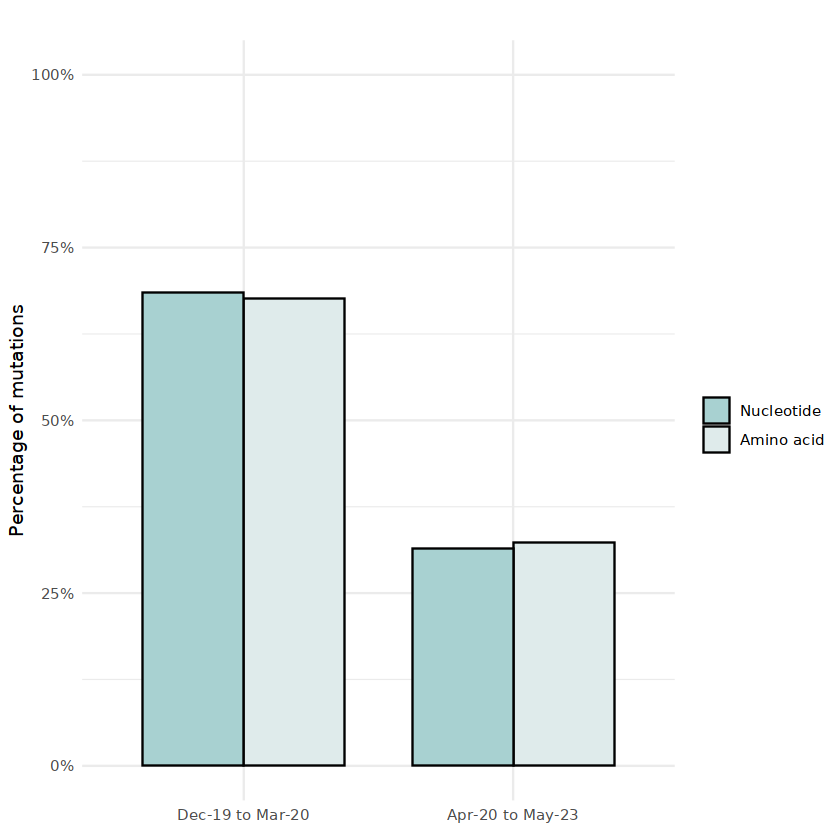

In [179]:
p.supp5.A <- df.supp5A |>
    mutate(timeline_label = factor(timeline_label, 
                                   levels = c("Dec-19 to Mar-20", 
                                              "Apr-20 to May-23")), 
           mutationLabel = factor(mutationLabel, 
                                  levels = c("NT >= 0.01%", 
                                             "AA >= 0.01%"))) |>
    ggplot(aes(x = timeline_label, y = proportionMutations, fill = mutationLabel)) +
    geom_bar(stat = "identity", position = "dodge", color = "black", width = 0.75) +
    labs(x = element_blank(), y = "Percentage of mutations", title = "") +
    scale_fill_manual(values = c("NT >= 0.01%" = "#A8D1D1", 
                                 "AA >= 0.01%" = "#DFEBEB"), 
                      labels = labellerSupp5A) +
    scale_y_continuous(labels = scales::percent, limits = c(0, 1)) +
    theme_minimal() +
    theme(legend.title = element_blank())

p.supp5.A

# expression("NT">="0.01%")

In [180]:
df.supp5B <- df.supp4 |>
    select("collection_date", "total_cases") |>
    rename("cumulative_cases" = "total_cases") |>
    filter(collection_date %in% c(as.Date("2020-03-31"), as.Date("2023-05-25"))) |>
    mutate(total_infections = case_when(collection_date == as.Date("2020-03-31") ~ cumulative_cases, 
                                        collection_date == as.Date("2023-05-25") ~ cumulative_cases - (pull(filter(df.supp4, collection_date == as.Date("2020-03-31")), total_cases))), 
           timeline_label = case_when(collection_date == as.Date("2020-03-31") ~ "Dec-19 to Mar-20", 
                                      collection_date == as.Date("2023-05-25") ~ "Apr-20 to May-23")) |>
    select(timeline_label, total_infections)
df.supp5B

timeline_label   total_infections
1 Dec-19 to Mar-20    823610       
2 Apr-20 to May-23 766423894

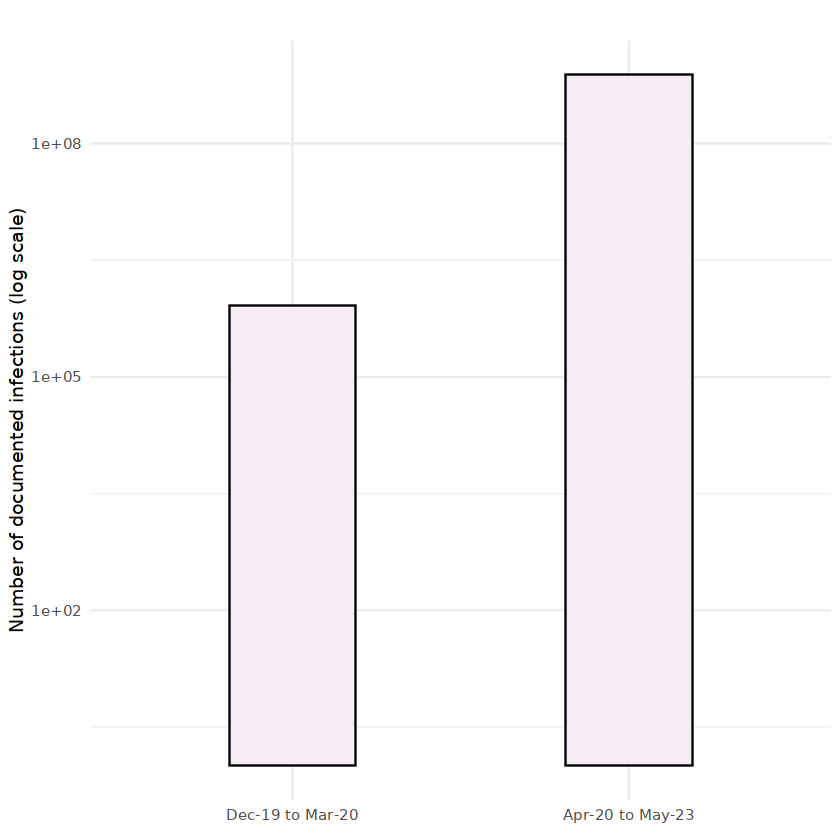

In [181]:
p.supp5.B <- df.supp5B |>
    mutate(timeline_label = factor(timeline_label, 
                                   levels = c("Dec-19 to Mar-20", 
                                              "Apr-20 to May-23"))) |>
    ggplot(aes(x = timeline_label, y = total_infections)) +
    geom_bar(stat = "identity", color = "black", fill = "#F6ECF5", width = 0.75 / 2) +
    labs(x = element_blank(), y = "Number of documented infections (log scale)", title = "") +
    scale_y_log10() +
    theme_minimal() +
    theme(legend.title = element_blank())
p.supp5.B

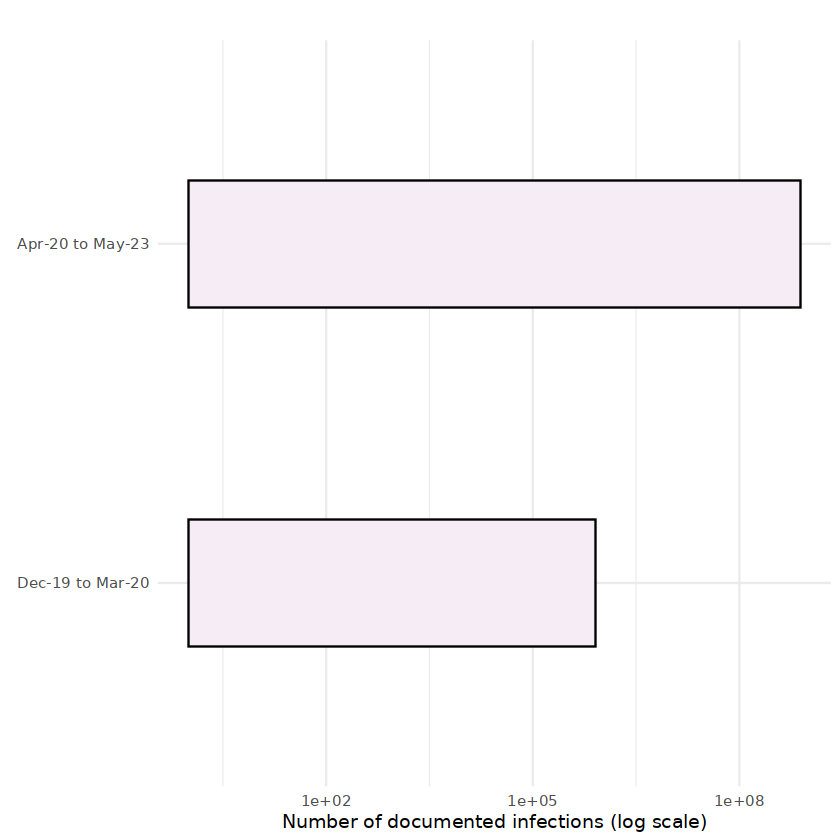

In [182]:
p.supp5.B + coord_flip()

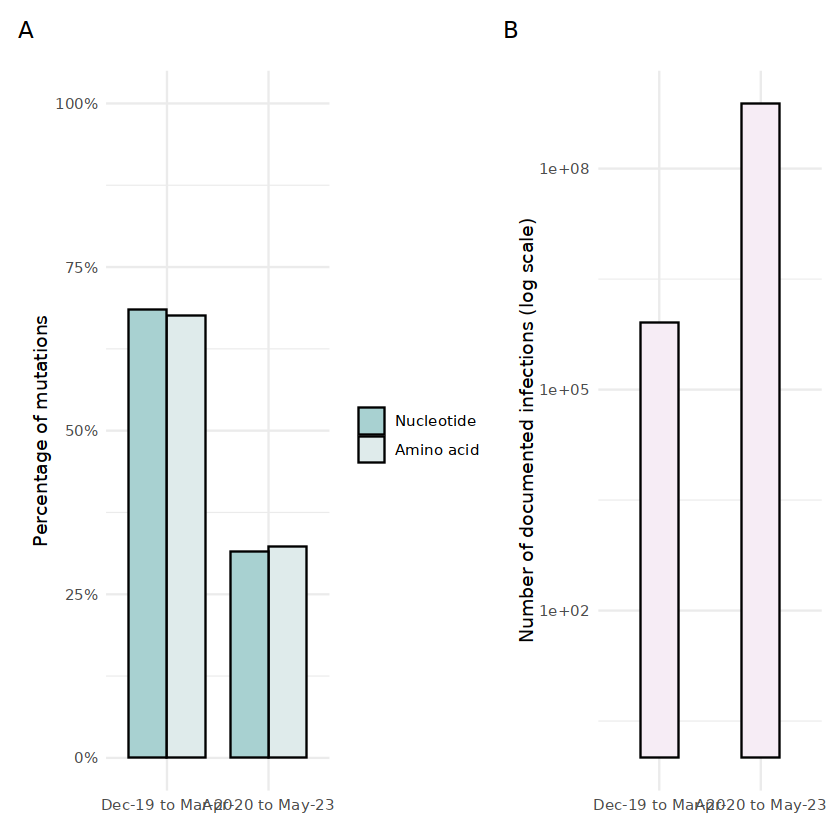

In [183]:
p.supp5 <- (p.supp5.A | p.supp5.B)+
    plot_annotation(tag_levels = 'A')

p.supp5

ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig5.pdf", 
       plot = p.supp5, 
       width = 8.5, 
       height = 4)

ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig5.jpeg", 
       plot = p.supp5, 
       dpi = 300,
       width = 8.5, 
       height = 4)

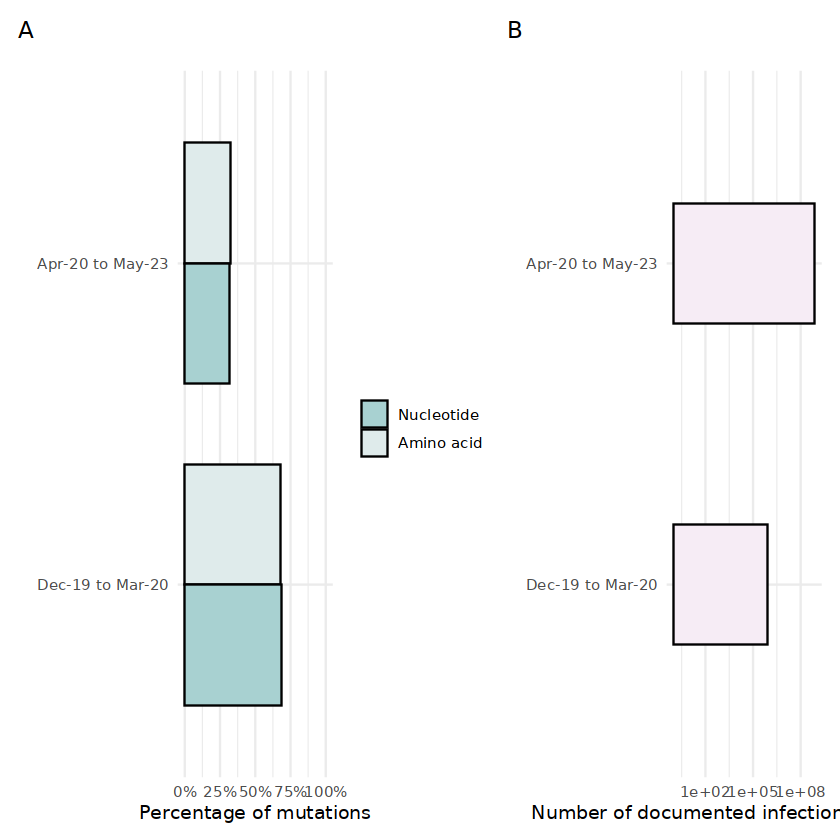

In [184]:
p.supp5.rev <- ((p.supp5.A + coord_flip()) | (p.supp5.B + coord_flip())) +
    plot_annotation(tag_levels = 'A')

p.supp5.rev

# ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig5.coord_flip.pdf", 
#        plot = p.supp5.rev, 
#        width = 10, 
#        height = 3)

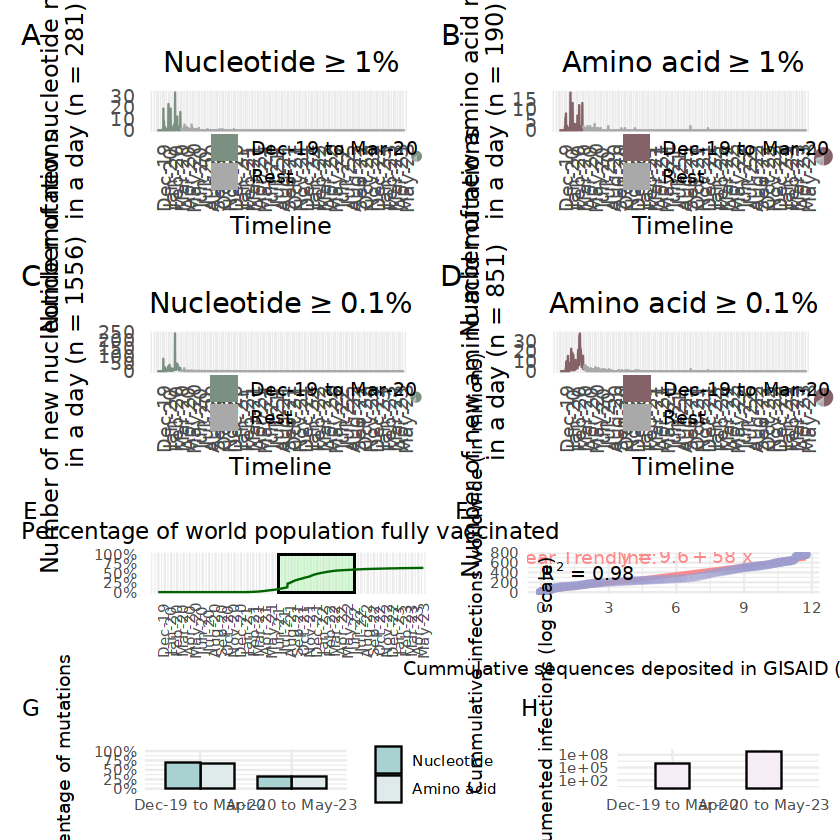

In [185]:
p.supp.panel <- (p1.A | p1.B) / (p1.C | p1.D) / (p2.D | p.supp4) / (p.supp5.A | p.supp5.B) +
    plot_annotation(tag_levels = list(c("A", "", "B", "", "C", "", "D", "", "E", "F", "G", "H"))) 
p.supp.panel

In [186]:
ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig.panel.pdf", 
       plot = p.supp.panel, 
       width = 25, 
       height = 25)

ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig.panel.jpeg", 
       plot = p.supp.panel, 
       dpi = "print",
       width = 25, 
       height = 25)

# sessionInfo

In [187]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS/LAPACK: /ahg/regevdata/projects/ICA_Lung/Nishant/conda/envs/scrna/lib/libopenblasp-r0.3.21.so

locale:
[1] C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] patchwork_1.1.2 lubridate_1.9.2 forcats_1.0.0   stringr_1.5.0  
 [5] dplyr_1.1.0     purrr_1.0.1     readr_2.1.4     tidyr_1.3.0    
 [9] tibble_3.2.0    ggplot2_3.4.2   tidyverse_2.0.0 jsonlite_1.8.4 
[13] formatR_1.14   

loaded via a namespace (and not attached):
 [1] ggrepel_0.9.3     Rcpp_1.0.10       lattice_0.21-8    digest_0.6.31    
 [5] utf8_1.2.3        ggforce_0.4.1     IRdisplay_1.1     R6_2.5.1         
 [9] repr_1.1.6        backports_1.4.1   evaluate_0.23     pillar_1.9.0     
[13] rlang_1.1.1       uuid_1.1-0        car_3.1-2         Matrix_1.5-3     
[17] splines_4.2.2     te